# Get Data 

`geo_data1.txt` has the following columns from `dataset_information.xlxs`: 
* Dataset_id
* Class_id
* Class_name
* Sample_id
* Cancer_type
* Cancer_subtype
* Metastasis_status
* Primary_site
* Metastasis_site
* Sample_label

We are going to use GEOparse to read in all miRNA data (there should only be two columns each, one for the REF, which is the mirna isoform, and then the RMA log normalized value. Some data might have 2 columns but not RMA; those we will discard.)



Ref: https://hcmdb.i-sanger.com/ 


In [1]:
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
gse1 = GEOparse.get_GEO(geo="GSM452579", destdir="./data")
gse2 = GEOparse.get_GEO(geo="GSM34472", destdir="./data")

21-Nov-2019 20:37:59 DEBUG utils - Directory ./data already exists. Skipping.
21-Nov-2019 20:37:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:37:59 INFO GEOparse - Parsing ./data/GSM452579.txt: 
21-Nov-2019 20:37:59 DEBUG utils - Directory ./data already exists. Skipping.
21-Nov-2019 20:37:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:37:59 INFO GEOparse - Parsing ./data/GSM34472.txt: 


In [3]:
geo_data = pd.read_csv("geo_data1.txt",sep="\t")

In [4]:
geo_data.shape

(12329, 10)

In [5]:
geo_data = geo_data.drop_duplicates('Sample_id', keep='last')

In [6]:
geo_data.shape

(6161, 10)

In [7]:
geo_data.head()

,Dataset_id,Class_id,Class_name,Sample_id,Cancer_type,Cancer_subtype,Metastasis_status,Primary_site,Metastasis_site,Sample_label
7,GSE10893,1,metastasis tumor,GSM275775,breast cancer,NaN,YES,breast,skin,Metastasis Tumor
188,GSE10893,1,primary normal,GSM372539,breast cancer,NaN,NO,breast,NaN,Primary Normal
189,GSE10893,1,primary normal,GSM372540,breast cancer,NaN,NO,breast,NaN,Primary Normal
190,GSE10893,1,primary normal,GSM372541,breast cancer,NaN,NO,breast,NaN,Primary Normal
191,GSE10893,1,primary normal,GSM372562,breast cancer,NaN,NO,breast,NaN,Primary Normal


## Examining the data (you don't need to run this)
Check if `ID_REF` values are the same between different GSM sample_ids. 

Experiment with combining ID_REF values with pandas. What is the best type of data to target? (mRNA, lncRNA, miRNA?)


In [175]:
# import csv
# with open("geo_data1.txt") as f:
#     reader = csv.reader(f, delimiter="\t")
#     for i in reader:
#         print i 
#         break
#     d = list(reader)

In [176]:
# ## Use this section to play with the GEOparser and interact with GEO objects 

# gse1 = GEOparse.get_GEO(geo="GSM452579", destdir="./data")
# gse2 = GEOparse.get_GEO(geo="GSM452578", destdir="./data")
# gse1.metadata # gets info about the sample (but doesn't help with distinguishing mRNA, lncRNA, and miRNA...)
# gse1.table # the actual data 
# gse1.columns # columns. miRNA should have 2, and the label is "RMA" log normalized data
# # Use this to get ID_REF as the row names so we can concat the dataframes together 
# lol1=gse1.table.set_index('ID_REF')
# lol2=gse2.table.set_index('ID_REF')
# data=pandas.concat([lol1, lol2],axis=1)

In [ ]:
## lol 

# gsms=[]
# lens=[]
# len_cols=[]

# # others=[]
# # other_labels=[]
# count=0
# for name, info in df.iterrows():
#     gsm=info['Sample_id']
    
#     if count % 10 == 0:
#         print(count, gsm)
       
#         gse = GEOparse.get_GEO(geo=gsm, destdir="./data/")

#         gsms.append(gsm)
#         lens.append(len(gse.table))
#         len_cols.append(len(gse.columns))
#     count+=1
#     # Make sure it is miRNA data. This means there are only two columns, and the ID_REF 
#     # should be HSA_something...ETC. There will be 54675 miRNA sites.
#     # You can check cols to make sure the sites/values (HSA_/RMA normalized) match up! 
# #     print(len(gse.table))
# #     if len(gse.table) == 54675:
# # #         label = [d[i][0], d[i][1], d[i][2],d[i][3],d[i][4],d[i][5],d[i][6],d[i][7],d[i][8],d[i][9]]
# # #         temp = gse.table.set_index('ID_REF')
# # #         temp.columns=[gsm]
# # #         mirna.append(temp)
# # #         labels.append(label)
# # #         cols.append(gse.columns)
# #         print(len(gse.columns))


# pd_gsms=pd.DataFrame(gsms)
# pd_lens=pd.DataFrame(lens)
# pd_cols=pd.DataFrame(len_cols)

In [65]:
# for idx,i in enumerate(lens):
#     if i==54675:
#         print(gsms[idx], len_cols[idx])
        

('GSM279965', 2)
('GSM279983', 2)
('GSM305387', 2)
('GSM305360', 2)
('GSM305374', 2)
('GSM305384', 2)
('GSM308291', 2)
('GSM308296', 2)
('GSM308353', 2)
('GSM308260', 2)
('GSM308273', 2)
('GSM308285', 2)
('GSM308297', 2)
('GSM308313', 2)
('GSM308325', 2)
('GSM308340', 2)
('GSM308352', 2)
('GSM308364', 2)
('GSM308378', 2)
('GSM308390', 2)
('GSM308403', 2)
('GSM308416', 2)
('GSM308426', 2)
('GSM308436', 2)
('GSM308446', 2)
('GSM308456', 2)
('GSM315863', 4)
('GSM352105', 2)
('GSM352101', 2)
('GSM352128', 2)
('GSM353685', 3)
('GSM353721', 3)
('GSM353731', 3)
('GSM353742', 3)
('GSM353813', 3)
('GSM353671', 3)
('GSM353687', 3)
('GSM353700', 3)
('GSM353710', 3)
('GSM353751', 3)
('GSM353761', 3)
('GSM353780', 3)
('GSM353791', 3)
('GSM353805', 3)
('GSM353817', 3)
('GSM353829', 3)
('GSM353839', 3)
('GSM353849', 3)
('GSM353859', 3)
('GSM452556', 2)
('GSM452583', 2)
('GSM452605', 2)
('GSM452646', 2)
('GSM452636', 2)
('GSM452555', 2)
('GSM452573', 2)
('GSM452589', 2)
('GSM452608', 2)
('GSM452623', 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f817111cb10>]],
      dtype=object)

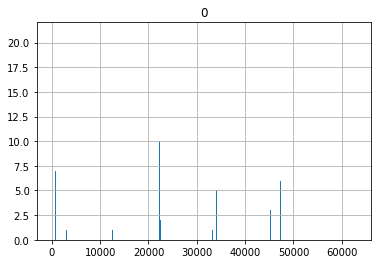

In [23]:
# # testing some stuff here

# gse2 = GEOparse.get_GEO(geo="GSM305387", destdir="./data")
# gse1 = GEOparse.get_GEO(geo="GSM353742", destdir="./data")

# set(gse1.table['ID_REF']) == set(gse2.table['ID_REF'])

# gse2.table[gse2.table['ID_REF']=='1255_g_at']
# gse1.table[gse1.table['ID_REF']=='1255_g_at']

# df = pd.merge(gse2.table[['ID_REF','VALUE']],gse1.table[['ID_REF','VALUE']],on='ID_REF', how='left')

# pd_lens.hist(bins=1000)

## Download all GEO microRNA data and save as data frame

#### Labels
* 0: Dataset_id
* 1: Class_id
* 2: Class_name
* 3: Sample_id
* 4: Cancer_type
* 5: Cancer_subtype
* 6: Metastasis_status
* 7: Primary_site
* 8: Metastasis_site
* 9: Sample_label

In [11]:
# This part actually reads the data in.

mirna = []
labels = []

# get sample probe names from something with 54000 rows 
gse2 = GEOparse.get_GEO(geo="GSM305387", destdir="./data")
df_mirna = pd.DataFrame(gse2.table['ID_REF'])

count=0
for name, info in geo_data.iterrows():
    gsm=info['Sample_id']
    if count % 10 == 0:
        print(count, gsm)
    count+=1
    gse = GEOparse.get_GEO(geo=gsm, destdir="./data/")
    try:
        if set(gse.table['ID_REF']) == set(df_mirna['ID_REF']):
            gse.table.columns = [gsm if x=='VALUE' else x for x in gse.table.columns]
            df_mirna = pd.merge(df_mirna,gse.table[['ID_REF',gsm]],on='ID_REF', how='left')
            label = [info['Dataset_id'], info['Class_id'], info['Class_name'], info['Sample_id'], info['Cancer_type'], info['Cancer_subtype'], info['Metastasis_status'], info['Primary_site'], info['Metastasis_site'], info['Sample_label']]
            labels.append(label)
    except:
        print(gsm + " has error")
#     # This was the old way of reading things in. Changed to get more datapoints 
#     # Make sure it is miRNA data. This means there are only two columns, and the ID_REF 
#     # should be HSA_something...ETC. There will be 54675 miRNA sites.
#     # You can check cols to make sure the sites/values (HSA_/RMA normalized) match up! 
#     if len(gse.columns)==2 and len(gse.table) == 54675:
#         label = [d[i][0], d[i][1], d[i][2],d[i][3],d[i][4],d[i][5],d[i][6],d[i][7],d[i][8],d[i][9]]
#         temp = gse.table.set_index('ID_REF')
#         temp.columns=[gsm]
#         mirna.append(temp)
#         labels.append(label)
#         cols.append(gse.columns)

21-Nov-2019 18:39:30 DEBUG utils - Directory ./data already exists. Skipping.
21-Nov-2019 18:39:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:30 INFO GEOparse - Parsing ./data/GSM305387.txt: 
21-Nov-2019 18:39:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:30 INFO GEOparse - Parsing ./data/GSM275775.txt: 
21-Nov-2019 18:39:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:30 INFO GEOparse - Parsing ./data/GSM372539.txt: 


(0, 'GSM275775')


21-Nov-2019 18:39:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:30 INFO GEOparse - Parsing ./data/GSM372540.txt: 
21-Nov-2019 18:39:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:30 INFO GEOparse - Parsing ./data/GSM372541.txt: 
21-Nov-2019 18:39:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:31 INFO GEOparse - Parsing ./data/GSM372562.txt: 
21-Nov-2019 18:39:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:31 INFO GEOparse - Parsing ./data/GSM372563.txt: 
21-Nov-2019 18:39:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:31 

(10, 'GSM141022')


21-Nov-2019 18:39:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:32 INFO GEOparse - Parsing ./data/GSM141090.txt: 
21-Nov-2019 18:39:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:32 INFO GEOparse - Parsing ./data/GSM141092.txt: 
21-Nov-2019 18:39:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:32 INFO GEOparse - Parsing ./data/GSM141093.txt: 
21-Nov-2019 18:39:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:33 INFO GEOparse - Parsing ./data/GSM141094.txt: 
21-Nov-2019 18:39:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:33 

(20, 'GSM141101')


21-Nov-2019 18:39:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:34 INFO GEOparse - Parsing ./data/GSM141102.txt: 
21-Nov-2019 18:39:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:34 INFO GEOparse - Parsing ./data/GSM141103.txt: 
21-Nov-2019 18:39:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:34 INFO GEOparse - Parsing ./data/GSM141105.txt: 
21-Nov-2019 18:39:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:34 INFO GEOparse - Parsing ./data/GSM141106.txt: 
21-Nov-2019 18:39:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:35 I

(30, 'GSM141115')


21-Nov-2019 18:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:36 INFO GEOparse - Parsing ./data/GSM141118.txt: 
21-Nov-2019 18:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:36 INFO GEOparse - Parsing ./data/GSM275782.txt: 
21-Nov-2019 18:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:36 INFO GEOparse - Parsing ./data/GSM275783.txt: 
21-Nov-2019 18:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:36 INFO GEOparse - Parsing ./data/GSM275784.txt: 
21-Nov-2019 18:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:36 

(40, 'GSM275818')


21-Nov-2019 18:39:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:37 INFO GEOparse - Parsing ./data/GSM275827.txt: 
21-Nov-2019 18:39:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:37 INFO GEOparse - Parsing ./data/GSM275831.txt: 
21-Nov-2019 18:39:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:37 INFO GEOparse - Parsing ./data/GSM275836.txt: 
21-Nov-2019 18:39:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:38 INFO GEOparse - Parsing ./data/GSM275838.txt: 
21-Nov-2019 18:39:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:38 

(50, 'GSM275856')


21-Nov-2019 18:39:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:39 INFO GEOparse - Parsing ./data/GSM275861.txt: 
21-Nov-2019 18:39:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:39 INFO GEOparse - Parsing ./data/GSM275862.txt: 
21-Nov-2019 18:39:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:39 INFO GEOparse - Parsing ./data/GSM275864.txt: 
21-Nov-2019 18:39:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:40 INFO GEOparse - Parsing ./data/GSM275871.txt: 
21-Nov-2019 18:39:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:40 

(60, 'GSM275907')


21-Nov-2019 18:39:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:41 INFO GEOparse - Parsing ./data/GSM34446.txt: 
21-Nov-2019 18:39:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:41 INFO GEOparse - Parsing ./data/GSM34460.txt: 
21-Nov-2019 18:39:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:41 INFO GEOparse - Parsing ./data/GSM34495.txt: 
21-Nov-2019 18:39:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:41 INFO GEOparse - Parsing ./data/GSM34537.txt: 
21-Nov-2019 18:39:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:42 INFO

(70, 'GSM372560')


21-Nov-2019 18:39:43 INFO GEOparse - Parsing ./data/GSM372561.txt: 
21-Nov-2019 18:39:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:43 INFO GEOparse - Parsing ./data/GSM53478.txt: 
21-Nov-2019 18:39:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:43 INFO GEOparse - Parsing ./data/GSM53479.txt: 
21-Nov-2019 18:39:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:43 INFO GEOparse - Parsing ./data/GSM53480.txt: 
21-Nov-2019 18:39:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:44 INFO GEOparse - Parsing ./data/GSM53481.txt: 
21-Nov-2019 18:39:44 DEBUG utils - D

(80, 'GSM53486')


21-Nov-2019 18:39:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:45 INFO GEOparse - Parsing ./data/GSM81167.txt: 
21-Nov-2019 18:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:46 INFO GEOparse - Parsing ./data/GSM81168.txt: 
21-Nov-2019 18:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:46 INFO GEOparse - Parsing ./data/GSM81169.txt: 
21-Nov-2019 18:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:46 INFO GEOparse - Parsing ./data/GSM81170.txt: 
21-Nov-2019 18:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:46 INFO

(90, 'GSM81175')


21-Nov-2019 18:39:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:47 INFO GEOparse - Parsing ./data/GSM81176.txt: 
21-Nov-2019 18:39:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:47 INFO GEOparse - Parsing ./data/GSM81177.txt: 
21-Nov-2019 18:39:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:47 INFO GEOparse - Parsing ./data/GSM81178.txt: 
21-Nov-2019 18:39:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:48 INFO GEOparse - Parsing ./data/GSM34442.txt: 
21-Nov-2019 18:39:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:48 INFO

(100, 'GSM53475')


21-Nov-2019 18:39:49 INFO GEOparse - Parsing ./data/GSM81164.txt: 
21-Nov-2019 18:39:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:49 INFO GEOparse - Parsing ./data/GSM81179.txt: 
21-Nov-2019 18:39:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:49 INFO GEOparse - Parsing ./data/GSM81180.txt: 
21-Nov-2019 18:39:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:50 INFO GEOparse - Parsing ./data/GSM81181.txt: 
21-Nov-2019 18:39:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:50 INFO GEOparse - Parsing ./data/GSM81182.txt: 
21-Nov-2019 18:39:50 DEBUG utils - Di

(110, 'GSM81187')


21-Nov-2019 18:39:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:51 INFO GEOparse - Parsing ./data/GSM279964.txt: 
21-Nov-2019 18:39:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:51 INFO GEOparse - Parsing ./data/GSM279974.txt: 
21-Nov-2019 18:39:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:52 INFO GEOparse - Parsing ./data/GSM279975.txt: 
21-Nov-2019 18:39:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:52 INFO GEOparse - Parsing ./data/GSM279977.txt: 
21-Nov-2019 18:39:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:53 

(120, 'GSM279965')


21-Nov-2019 18:39:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:54 INFO GEOparse - Parsing ./data/GSM279966.txt: 
21-Nov-2019 18:39:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:55 INFO GEOparse - Parsing ./data/GSM279968.txt: 
21-Nov-2019 18:39:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:55 INFO GEOparse - Parsing ./data/GSM279969.txt: 
21-Nov-2019 18:39:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:56 INFO GEOparse - Parsing ./data/GSM279971.txt: 
21-Nov-2019 18:39:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:56 

(130, 'GSM279983')


21-Nov-2019 18:39:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:58 INFO GEOparse - Parsing ./data/GSM279984.txt: 
21-Nov-2019 18:39:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:58 INFO GEOparse - Parsing ./data/GSM279985.txt: 
21-Nov-2019 18:39:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:59 INFO GEOparse - Parsing ./data/GSM279986.txt: 
21-Nov-2019 18:39:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:39:59 INFO GEOparse - Parsing ./data/GSM279987.txt: 
21-Nov-2019 18:39:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:39:59 

(140, 'GSM305387')


21-Nov-2019 18:40:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:02 INFO GEOparse - Parsing ./data/GSM305388.txt: 
21-Nov-2019 18:40:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:02 INFO GEOparse - Parsing ./data/GSM305352.txt: 
21-Nov-2019 18:40:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:02 INFO GEOparse - Parsing ./data/GSM305353.txt: 
21-Nov-2019 18:40:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:03 INFO GEOparse - Parsing ./data/GSM305354.txt: 
21-Nov-2019 18:40:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:03 

(150, 'GSM305360')


21-Nov-2019 18:40:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:06 INFO GEOparse - Parsing ./data/GSM305361.txt: 
21-Nov-2019 18:40:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:06 INFO GEOparse - Parsing ./data/GSM305362.txt: 
21-Nov-2019 18:40:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:07 INFO GEOparse - Parsing ./data/GSM305363.txt: 
21-Nov-2019 18:40:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:07 INFO GEOparse - Parsing ./data/GSM305364.txt: 
21-Nov-2019 18:40:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:08 

(160, 'GSM305374')


21-Nov-2019 18:40:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:10 INFO GEOparse - Parsing ./data/GSM305375.txt: 
21-Nov-2019 18:40:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:10 INFO GEOparse - Parsing ./data/GSM305376.txt: 
21-Nov-2019 18:40:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:10 INFO GEOparse - Parsing ./data/GSM305377.txt: 
21-Nov-2019 18:40:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:11 INFO GEOparse - Parsing ./data/GSM305378.txt: 
21-Nov-2019 18:40:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:12 

(170, 'GSM305384')


21-Nov-2019 18:40:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:14 INFO GEOparse - Parsing ./data/GSM305385.txt: 
21-Nov-2019 18:40:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:14 INFO GEOparse - Parsing ./data/GSM308280.txt: 
21-Nov-2019 18:40:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:15 INFO GEOparse - Parsing ./data/GSM308303.txt: 
21-Nov-2019 18:40:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:15 INFO GEOparse - Parsing ./data/GSM308326.txt: 
21-Nov-2019 18:40:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:15 

(180, 'GSM308291')


21-Nov-2019 18:40:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:18 INFO GEOparse - Parsing ./data/GSM308299.txt: 
21-Nov-2019 18:40:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:18 INFO GEOparse - Parsing ./data/GSM308307.txt: 
21-Nov-2019 18:40:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:19 INFO GEOparse - Parsing ./data/GSM308316.txt: 
21-Nov-2019 18:40:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:19 INFO GEOparse - Parsing ./data/GSM308392.txt: 
21-Nov-2019 18:40:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:20 

(190, 'GSM308296')


21-Nov-2019 18:40:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:22 INFO GEOparse - Parsing ./data/GSM308301.txt: 
21-Nov-2019 18:40:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:23 INFO GEOparse - Parsing ./data/GSM308310.txt: 
21-Nov-2019 18:40:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:23 INFO GEOparse - Parsing ./data/GSM308312.txt: 
21-Nov-2019 18:40:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:24 INFO GEOparse - Parsing ./data/GSM308327.txt: 
21-Nov-2019 18:40:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:24 

(200, 'GSM308353')


21-Nov-2019 18:40:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:26 INFO GEOparse - Parsing ./data/GSM308357.txt: 
21-Nov-2019 18:40:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:27 INFO GEOparse - Parsing ./data/GSM308380.txt: 
21-Nov-2019 18:40:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:27 INFO GEOparse - Parsing ./data/GSM308388.txt: 
21-Nov-2019 18:40:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:28 INFO GEOparse - Parsing ./data/GSM308406.txt: 
21-Nov-2019 18:40:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:28 

(210, 'GSM308260')


21-Nov-2019 18:40:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:31 INFO GEOparse - Parsing ./data/GSM308262.txt: 
21-Nov-2019 18:40:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:31 INFO GEOparse - Parsing ./data/GSM308263.txt: 
21-Nov-2019 18:40:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:31 INFO GEOparse - Parsing ./data/GSM308265.txt: 
21-Nov-2019 18:40:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:32 INFO GEOparse - Parsing ./data/GSM308266.txt: 
21-Nov-2019 18:40:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:32 

(220, 'GSM308273')


21-Nov-2019 18:40:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:35 INFO GEOparse - Parsing ./data/GSM308275.txt: 
21-Nov-2019 18:40:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:35 INFO GEOparse - Parsing ./data/GSM308276.txt: 
21-Nov-2019 18:40:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:36 INFO GEOparse - Parsing ./data/GSM308277.txt: 
21-Nov-2019 18:40:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:36 INFO GEOparse - Parsing ./data/GSM308278.txt: 
21-Nov-2019 18:40:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:37 

(230, 'GSM308285')


21-Nov-2019 18:40:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:39 INFO GEOparse - Parsing ./data/GSM308286.txt: 
21-Nov-2019 18:40:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:40 INFO GEOparse - Parsing ./data/GSM308287.txt: 
21-Nov-2019 18:40:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:40 INFO GEOparse - Parsing ./data/GSM308288.txt: 
21-Nov-2019 18:40:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:41 INFO GEOparse - Parsing ./data/GSM308289.txt: 
21-Nov-2019 18:40:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:41 

(240, 'GSM308297')


21-Nov-2019 18:40:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:43 INFO GEOparse - Parsing ./data/GSM308298.txt: 
21-Nov-2019 18:40:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:44 INFO GEOparse - Parsing ./data/GSM308300.txt: 
21-Nov-2019 18:40:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:44 INFO GEOparse - Parsing ./data/GSM308302.txt: 
21-Nov-2019 18:40:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:45 INFO GEOparse - Parsing ./data/GSM308304.txt: 
21-Nov-2019 18:40:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:45 

(250, 'GSM308313')


21-Nov-2019 18:40:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:48 INFO GEOparse - Parsing ./data/GSM308314.txt: 
21-Nov-2019 18:40:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:49 INFO GEOparse - Parsing ./data/GSM308315.txt: 
21-Nov-2019 18:40:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:49 INFO GEOparse - Parsing ./data/GSM308318.txt: 
21-Nov-2019 18:40:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:50 INFO GEOparse - Parsing ./data/GSM308319.txt: 
21-Nov-2019 18:40:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:50 

(260, 'GSM308325')


21-Nov-2019 18:40:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:54 INFO GEOparse - Parsing ./data/GSM308328.txt: 
21-Nov-2019 18:40:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:54 INFO GEOparse - Parsing ./data/GSM308330.txt: 
21-Nov-2019 18:40:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:55 INFO GEOparse - Parsing ./data/GSM308331.txt: 
21-Nov-2019 18:40:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:40:55 INFO GEOparse - Parsing ./data/GSM308332.txt: 
21-Nov-2019 18:40:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:40:56 

(270, 'GSM308340')


21-Nov-2019 18:41:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:00 INFO GEOparse - Parsing ./data/GSM308342.txt: 
21-Nov-2019 18:41:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:01 INFO GEOparse - Parsing ./data/GSM308343.txt: 
21-Nov-2019 18:41:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:02 INFO GEOparse - Parsing ./data/GSM308344.txt: 
21-Nov-2019 18:41:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:02 INFO GEOparse - Parsing ./data/GSM308345.txt: 
21-Nov-2019 18:41:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:03 

(280, 'GSM308352')


21-Nov-2019 18:41:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:06 INFO GEOparse - Parsing ./data/GSM308354.txt: 
21-Nov-2019 18:41:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:06 INFO GEOparse - Parsing ./data/GSM308355.txt: 
21-Nov-2019 18:41:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:07 INFO GEOparse - Parsing ./data/GSM308356.txt: 
21-Nov-2019 18:41:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:08 INFO GEOparse - Parsing ./data/GSM308358.txt: 
21-Nov-2019 18:41:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:08 

(290, 'GSM308364')


21-Nov-2019 18:41:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:11 INFO GEOparse - Parsing ./data/GSM308365.txt: 
21-Nov-2019 18:41:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:12 INFO GEOparse - Parsing ./data/GSM308367.txt: 
21-Nov-2019 18:41:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:12 INFO GEOparse - Parsing ./data/GSM308368.txt: 
21-Nov-2019 18:41:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:13 INFO GEOparse - Parsing ./data/GSM308369.txt: 
21-Nov-2019 18:41:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:13 

(300, 'GSM308378')


21-Nov-2019 18:41:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:16 INFO GEOparse - Parsing ./data/GSM308379.txt: 
21-Nov-2019 18:41:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:17 INFO GEOparse - Parsing ./data/GSM308381.txt: 
21-Nov-2019 18:41:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:17 INFO GEOparse - Parsing ./data/GSM308382.txt: 
21-Nov-2019 18:41:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:18 INFO GEOparse - Parsing ./data/GSM308383.txt: 
21-Nov-2019 18:41:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:18 

(310, 'GSM308390')


21-Nov-2019 18:41:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:21 INFO GEOparse - Parsing ./data/GSM308391.txt: 
21-Nov-2019 18:41:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:22 INFO GEOparse - Parsing ./data/GSM308393.txt: 
21-Nov-2019 18:41:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:22 INFO GEOparse - Parsing ./data/GSM308394.txt: 
21-Nov-2019 18:41:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:23 INFO GEOparse - Parsing ./data/GSM308395.txt: 
21-Nov-2019 18:41:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:23 

(320, 'GSM308403')


21-Nov-2019 18:41:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:26 INFO GEOparse - Parsing ./data/GSM308404.txt: 
21-Nov-2019 18:41:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:27 INFO GEOparse - Parsing ./data/GSM308405.txt: 
21-Nov-2019 18:41:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:28 INFO GEOparse - Parsing ./data/GSM308407.txt: 
21-Nov-2019 18:41:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:28 INFO GEOparse - Parsing ./data/GSM308408.txt: 
21-Nov-2019 18:41:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:29 

(330, 'GSM308416')


21-Nov-2019 18:41:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:32 INFO GEOparse - Parsing ./data/GSM308417.txt: 
21-Nov-2019 18:41:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:33 INFO GEOparse - Parsing ./data/GSM308418.txt: 
21-Nov-2019 18:41:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:33 INFO GEOparse - Parsing ./data/GSM308419.txt: 
21-Nov-2019 18:41:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:34 INFO GEOparse - Parsing ./data/GSM308420.txt: 
21-Nov-2019 18:41:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:34 

(340, 'GSM308426')


21-Nov-2019 18:41:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:38 INFO GEOparse - Parsing ./data/GSM308427.txt: 
21-Nov-2019 18:41:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:39 INFO GEOparse - Parsing ./data/GSM308428.txt: 
21-Nov-2019 18:41:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:39 INFO GEOparse - Parsing ./data/GSM308429.txt: 
21-Nov-2019 18:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:40 INFO GEOparse - Parsing ./data/GSM308430.txt: 
21-Nov-2019 18:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:40 

(350, 'GSM308436')


21-Nov-2019 18:41:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:44 INFO GEOparse - Parsing ./data/GSM308437.txt: 
21-Nov-2019 18:41:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:44 INFO GEOparse - Parsing ./data/GSM308438.txt: 
21-Nov-2019 18:41:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:45 INFO GEOparse - Parsing ./data/GSM308439.txt: 
21-Nov-2019 18:41:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:45 INFO GEOparse - Parsing ./data/GSM308440.txt: 
21-Nov-2019 18:41:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:46 

(360, 'GSM308446')


21-Nov-2019 18:41:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:50 INFO GEOparse - Parsing ./data/GSM308447.txt: 
21-Nov-2019 18:41:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:50 INFO GEOparse - Parsing ./data/GSM308448.txt: 
21-Nov-2019 18:41:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:51 INFO GEOparse - Parsing ./data/GSM308449.txt: 
21-Nov-2019 18:41:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:52 INFO GEOparse - Parsing ./data/GSM308450.txt: 
21-Nov-2019 18:41:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:52 

(370, 'GSM308456')


21-Nov-2019 18:41:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:56 INFO GEOparse - Parsing ./data/GSM308457.txt: 
21-Nov-2019 18:41:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:57 INFO GEOparse - Parsing ./data/GSM308458.txt: 
21-Nov-2019 18:41:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:57 INFO GEOparse - Parsing ./data/GSM308459.txt: 
21-Nov-2019 18:41:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:41:58 INFO GEOparse - Parsing ./data/GSM308460.txt: 
21-Nov-2019 18:41:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:41:59 

(380, 'GSM315863')


21-Nov-2019 18:42:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:02 INFO GEOparse - Parsing ./data/GSM319678.txt: 
21-Nov-2019 18:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:03 INFO GEOparse - Parsing ./data/GSM319687.txt: 
21-Nov-2019 18:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:03 INFO GEOparse - Parsing ./data/GSM319691.txt: 
21-Nov-2019 18:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:03 INFO GEOparse - Parsing ./data/GSM319703.txt: 
21-Nov-2019 18:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:03 

(390, 'GSM352105')


21-Nov-2019 18:42:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:06 INFO GEOparse - Parsing ./data/GSM352109.txt: 
21-Nov-2019 18:42:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:07 INFO GEOparse - Parsing ./data/GSM352117.txt: 
21-Nov-2019 18:42:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:07 INFO GEOparse - Parsing ./data/GSM352119.txt: 
21-Nov-2019 18:42:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:08 INFO GEOparse - Parsing ./data/GSM352123.txt: 
21-Nov-2019 18:42:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:09 

(400, 'GSM352101')


21-Nov-2019 18:42:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:12 INFO GEOparse - Parsing ./data/GSM352107.txt: 
21-Nov-2019 18:42:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:13 INFO GEOparse - Parsing ./data/GSM352110.txt: 
21-Nov-2019 18:42:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:14 INFO GEOparse - Parsing ./data/GSM352111.txt: 
21-Nov-2019 18:42:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:15 INFO GEOparse - Parsing ./data/GSM352113.txt: 
21-Nov-2019 18:42:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:15 

(410, 'GSM352128')


21-Nov-2019 18:42:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:20 INFO GEOparse - Parsing ./data/GSM352129.txt: 
21-Nov-2019 18:42:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:20 INFO GEOparse - Parsing ./data/GSM352130.txt: 
21-Nov-2019 18:42:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:21 INFO GEOparse - Parsing ./data/GSM352114.txt: 
21-Nov-2019 18:42:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:22 INFO GEOparse - Parsing ./data/GSM352127.txt: 
21-Nov-2019 18:42:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:23 

(420, 'GSM352155')


21-Nov-2019 18:42:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:24 INFO GEOparse - Parsing ./data/GSM352163.txt: 
21-Nov-2019 18:42:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:24 INFO GEOparse - Parsing ./data/GSM352167.txt: 
21-Nov-2019 18:42:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:24 INFO GEOparse - Parsing ./data/GSM352137.txt: 
21-Nov-2019 18:42:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:25 INFO GEOparse - Parsing ./data/GSM352140.txt: 
21-Nov-2019 18:42:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:25 

(430, 'GSM352153')


21-Nov-2019 18:42:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:25 INFO GEOparse - Parsing ./data/GSM352139.txt: 
21-Nov-2019 18:42:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:26 INFO GEOparse - Parsing ./data/GSM352146.txt: 
21-Nov-2019 18:42:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:26 INFO GEOparse - Parsing ./data/GSM352157.txt: 
21-Nov-2019 18:42:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:26 INFO GEOparse - Parsing ./data/GSM352162.txt: 
21-Nov-2019 18:42:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:26 

(440, 'GSM352141')


21-Nov-2019 18:42:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:27 INFO GEOparse - Parsing ./data/GSM352145.txt: 
21-Nov-2019 18:42:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:27 INFO GEOparse - Parsing ./data/GSM352147.txt: 
21-Nov-2019 18:42:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:27 INFO GEOparse - Parsing ./data/GSM352156.txt: 
21-Nov-2019 18:42:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:27 INFO GEOparse - Parsing ./data/GSM352158.txt: 
21-Nov-2019 18:42:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:27 

(450, 'GSM352166')


21-Nov-2019 18:42:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:28 INFO GEOparse - Parsing ./data/GSM353664.txt: 
21-Nov-2019 18:42:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:29 INFO GEOparse - Parsing ./data/GSM353665.txt: 
21-Nov-2019 18:42:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:30 INFO GEOparse - Parsing ./data/GSM353675.txt: 
21-Nov-2019 18:42:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:30 INFO GEOparse - Parsing ./data/GSM353676.txt: 
21-Nov-2019 18:42:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:31 

(460, 'GSM353685')


21-Nov-2019 18:42:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:33 INFO GEOparse - Parsing ./data/GSM353688.txt: 
21-Nov-2019 18:42:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:34 INFO GEOparse - Parsing ./data/GSM353689.txt: 
21-Nov-2019 18:42:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:34 INFO GEOparse - Parsing ./data/GSM353690.txt: 
21-Nov-2019 18:42:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:35 INFO GEOparse - Parsing ./data/GSM353715.txt: 
21-Nov-2019 18:42:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:35 

(470, 'GSM353721')


21-Nov-2019 18:42:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:38 INFO GEOparse - Parsing ./data/GSM353722.txt: 
21-Nov-2019 18:42:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:39 INFO GEOparse - Parsing ./data/GSM353723.txt: 
21-Nov-2019 18:42:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:40 INFO GEOparse - Parsing ./data/GSM353724.txt: 
21-Nov-2019 18:42:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:40 INFO GEOparse - Parsing ./data/GSM353725.txt: 
21-Nov-2019 18:42:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:41 

(480, 'GSM353731')


21-Nov-2019 18:42:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:44 INFO GEOparse - Parsing ./data/GSM353732.txt: 
21-Nov-2019 18:42:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:44 INFO GEOparse - Parsing ./data/GSM353733.txt: 
21-Nov-2019 18:42:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:45 INFO GEOparse - Parsing ./data/GSM353734.txt: 
21-Nov-2019 18:42:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:46 INFO GEOparse - Parsing ./data/GSM353735.txt: 
21-Nov-2019 18:42:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:46 

(490, 'GSM353742')


21-Nov-2019 18:42:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:51 INFO GEOparse - Parsing ./data/GSM353743.txt: 
21-Nov-2019 18:42:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:51 INFO GEOparse - Parsing ./data/GSM353744.txt: 
21-Nov-2019 18:42:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:52 INFO GEOparse - Parsing ./data/GSM353745.txt: 
21-Nov-2019 18:42:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:53 INFO GEOparse - Parsing ./data/GSM353748.txt: 
21-Nov-2019 18:42:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:54 

(500, 'GSM353813')


21-Nov-2019 18:42:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:58 INFO GEOparse - Parsing ./data/GSM353824.txt: 
21-Nov-2019 18:42:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:59 INFO GEOparse - Parsing ./data/GSM353826.txt: 
21-Nov-2019 18:42:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:42:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:42:59 INFO GEOparse - Parsing ./data/GSM353860.txt: 
21-Nov-2019 18:43:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:00 INFO GEOparse - Parsing ./data/GSM353861.txt: 
21-Nov-2019 18:43:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:00 

(510, 'GSM353671')


21-Nov-2019 18:43:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:05 INFO GEOparse - Parsing ./data/GSM353672.txt: 
21-Nov-2019 18:43:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:06 INFO GEOparse - Parsing ./data/GSM353673.txt: 
21-Nov-2019 18:43:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:06 INFO GEOparse - Parsing ./data/GSM353674.txt: 
21-Nov-2019 18:43:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:07 INFO GEOparse - Parsing ./data/GSM353678.txt: 
21-Nov-2019 18:43:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:08 

(520, 'GSM353687')


21-Nov-2019 18:43:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:12 INFO GEOparse - Parsing ./data/GSM353691.txt: 
21-Nov-2019 18:43:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:12 INFO GEOparse - Parsing ./data/GSM353692.txt: 
21-Nov-2019 18:43:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:13 INFO GEOparse - Parsing ./data/GSM353693.txt: 
21-Nov-2019 18:43:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:13 INFO GEOparse - Parsing ./data/GSM353694.txt: 
21-Nov-2019 18:43:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:14 

(530, 'GSM353700')


21-Nov-2019 18:43:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:18 INFO GEOparse - Parsing ./data/GSM353701.txt: 
21-Nov-2019 18:43:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:19 INFO GEOparse - Parsing ./data/GSM353702.txt: 
21-Nov-2019 18:43:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:19 INFO GEOparse - Parsing ./data/GSM353703.txt: 
21-Nov-2019 18:43:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:20 INFO GEOparse - Parsing ./data/GSM353704.txt: 
21-Nov-2019 18:43:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:21 

(540, 'GSM353710')


21-Nov-2019 18:43:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:26 INFO GEOparse - Parsing ./data/GSM353711.txt: 
21-Nov-2019 18:43:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:27 INFO GEOparse - Parsing ./data/GSM353712.txt: 
21-Nov-2019 18:43:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:27 INFO GEOparse - Parsing ./data/GSM353713.txt: 
21-Nov-2019 18:43:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:28 INFO GEOparse - Parsing ./data/GSM353714.txt: 
21-Nov-2019 18:43:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:29 

(550, 'GSM353751')


21-Nov-2019 18:43:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:32 INFO GEOparse - Parsing ./data/GSM353752.txt: 
21-Nov-2019 18:43:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:33 INFO GEOparse - Parsing ./data/GSM353753.txt: 
21-Nov-2019 18:43:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:34 INFO GEOparse - Parsing ./data/GSM353754.txt: 
21-Nov-2019 18:43:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:34 INFO GEOparse - Parsing ./data/GSM353755.txt: 
21-Nov-2019 18:43:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:35 

(560, 'GSM353761')


21-Nov-2019 18:43:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:40 INFO GEOparse - Parsing ./data/GSM353762.txt: 
21-Nov-2019 18:43:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:41 INFO GEOparse - Parsing ./data/GSM353772.txt: 
21-Nov-2019 18:43:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:41 INFO GEOparse - Parsing ./data/GSM353773.txt: 
21-Nov-2019 18:43:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:42 INFO GEOparse - Parsing ./data/GSM353774.txt: 
21-Nov-2019 18:43:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:43 

(570, 'GSM353780')


21-Nov-2019 18:43:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:47 INFO GEOparse - Parsing ./data/GSM353781.txt: 
21-Nov-2019 18:43:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:48 INFO GEOparse - Parsing ./data/GSM353782.txt: 
21-Nov-2019 18:43:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:49 INFO GEOparse - Parsing ./data/GSM353783.txt: 
21-Nov-2019 18:43:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:49 INFO GEOparse - Parsing ./data/GSM353784.txt: 
21-Nov-2019 18:43:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:50 

(580, 'GSM353791')


21-Nov-2019 18:43:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:54 INFO GEOparse - Parsing ./data/GSM353792.txt: 
21-Nov-2019 18:43:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:55 INFO GEOparse - Parsing ./data/GSM353793.txt: 
21-Nov-2019 18:43:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:56 INFO GEOparse - Parsing ./data/GSM353794.txt: 
21-Nov-2019 18:43:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:43:56 INFO GEOparse - Parsing ./data/GSM353795.txt: 
21-Nov-2019 18:43:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:43:57 

(590, 'GSM353805')


21-Nov-2019 18:44:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:02 INFO GEOparse - Parsing ./data/GSM353806.txt: 
21-Nov-2019 18:44:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:02 INFO GEOparse - Parsing ./data/GSM353807.txt: 
21-Nov-2019 18:44:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:03 INFO GEOparse - Parsing ./data/GSM353808.txt: 
21-Nov-2019 18:44:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:03 INFO GEOparse - Parsing ./data/GSM353809.txt: 
21-Nov-2019 18:44:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:04 

(600, 'GSM353817')


21-Nov-2019 18:44:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:09 INFO GEOparse - Parsing ./data/GSM353818.txt: 
21-Nov-2019 18:44:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:10 INFO GEOparse - Parsing ./data/GSM353819.txt: 
21-Nov-2019 18:44:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:11 INFO GEOparse - Parsing ./data/GSM353820.txt: 
21-Nov-2019 18:44:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:12 INFO GEOparse - Parsing ./data/GSM353821.txt: 
21-Nov-2019 18:44:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:13 

(610, 'GSM353829')


21-Nov-2019 18:44:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:17 INFO GEOparse - Parsing ./data/GSM353830.txt: 
21-Nov-2019 18:44:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:18 INFO GEOparse - Parsing ./data/GSM353831.txt: 
21-Nov-2019 18:44:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:19 INFO GEOparse - Parsing ./data/GSM353832.txt: 
21-Nov-2019 18:44:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:20 INFO GEOparse - Parsing ./data/GSM353833.txt: 
21-Nov-2019 18:44:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:20 

(620, 'GSM353839')


21-Nov-2019 18:44:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:25 INFO GEOparse - Parsing ./data/GSM353840.txt: 
21-Nov-2019 18:44:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:26 INFO GEOparse - Parsing ./data/GSM353841.txt: 
21-Nov-2019 18:44:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:27 INFO GEOparse - Parsing ./data/GSM353842.txt: 
21-Nov-2019 18:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:28 INFO GEOparse - Parsing ./data/GSM353843.txt: 
21-Nov-2019 18:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:28 

(630, 'GSM353849')


21-Nov-2019 18:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:33 INFO GEOparse - Parsing ./data/GSM353850.txt: 
21-Nov-2019 18:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:34 INFO GEOparse - Parsing ./data/GSM353851.txt: 
21-Nov-2019 18:44:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:35 INFO GEOparse - Parsing ./data/GSM353852.txt: 
21-Nov-2019 18:44:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:36 INFO GEOparse - Parsing ./data/GSM353853.txt: 
21-Nov-2019 18:44:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:36 

(640, 'GSM353859')


21-Nov-2019 18:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:42 INFO GEOparse - Parsing ./data/GSM357563.txt: 
21-Nov-2019 18:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:42 INFO GEOparse - Parsing ./data/GSM357564.txt: 
21-Nov-2019 18:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:42 INFO GEOparse - Parsing ./data/GSM357565.txt: 
21-Nov-2019 18:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:42 INFO GEOparse - Parsing ./data/GSM357566.txt: 
21-Nov-2019 18:44:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:43 

(650, 'GSM357556')


21-Nov-2019 18:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:45 INFO GEOparse - Parsing ./data/GSM357558.txt: 
21-Nov-2019 18:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:45 INFO GEOparse - Parsing ./data/GSM357560.txt: 
21-Nov-2019 18:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:45 INFO GEOparse - Parsing ./data/GSM357562.txt: 
21-Nov-2019 18:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:45 INFO GEOparse - Parsing ./data/GSM357571.txt: 
21-Nov-2019 18:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:45 

(660, 'GSM357583')


21-Nov-2019 18:44:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:47 INFO GEOparse - Parsing ./data/GSM357587.txt: 
21-Nov-2019 18:44:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:47 INFO GEOparse - Parsing ./data/GSM357589.txt: 
21-Nov-2019 18:44:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:47 INFO GEOparse - Parsing ./data/GSM357591.txt: 
21-Nov-2019 18:44:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:48 INFO GEOparse - Parsing ./data/GSM357593.txt: 
21-Nov-2019 18:44:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:48 

(670, 'GSM357598')


21-Nov-2019 18:44:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:49 INFO GEOparse - Parsing ./data/GSM357553.txt: 
21-Nov-2019 18:44:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:49 INFO GEOparse - Parsing ./data/GSM357555.txt: 
21-Nov-2019 18:44:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:50 INFO GEOparse - Parsing ./data/GSM357557.txt: 
21-Nov-2019 18:44:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:50 INFO GEOparse - Parsing ./data/GSM357559.txt: 
21-Nov-2019 18:44:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:50 

(680, 'GSM357576')


21-Nov-2019 18:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:51 INFO GEOparse - Parsing ./data/GSM357578.txt: 
21-Nov-2019 18:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:51 INFO GEOparse - Parsing ./data/GSM357580.txt: 
21-Nov-2019 18:44:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:52 INFO GEOparse - Parsing ./data/GSM357582.txt: 
21-Nov-2019 18:44:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:52 INFO GEOparse - Parsing ./data/GSM357584.txt: 
21-Nov-2019 18:44:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:52 

(690, 'GSM359138')


21-Nov-2019 18:44:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:53 INFO GEOparse - Parsing ./data/GSM359139.txt: 
21-Nov-2019 18:44:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:53 INFO GEOparse - Parsing ./data/GSM359140.txt: 
21-Nov-2019 18:44:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:54 INFO GEOparse - Parsing ./data/GSM359143.txt: 
21-Nov-2019 18:44:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:54 INFO GEOparse - Parsing ./data/GSM359144.txt: 
21-Nov-2019 18:44:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:54 

(700, 'GSM359156')


21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366638.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366640.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366642.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366643.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 

(710, 'GSM366649')


21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366659.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366661.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366663.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366664.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 

(720, 'GSM366661')


21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366671.txt: 
21-Nov-2019 18:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:55 INFO GEOparse - Parsing ./data/GSM366672.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366674.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366675.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 

(730, 'GSM366674')


21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366689.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366690.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366691.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366694.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 

(740, 'GSM366689')


21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366660.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366662.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366666.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366673.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 

(750, 'GSM366660')
(760, 'GSM366693')


21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366699.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366703.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366704.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366706.txt: 
21-Nov-2019 18:44:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:56 INFO GEOparse - Parsing ./data/GSM366725.txt: 
21-Nov-2019 18:44:56 DEBUG utils

(770, 'GSM366737')


21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:57 INFO GEOparse - Parsing ./data/GSM366714.txt: 
21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:57 INFO GEOparse - Parsing ./data/GSM366728.txt: 
21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:57 INFO GEOparse - Parsing ./data/GSM366731.txt: 
21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:57 INFO GEOparse - Parsing ./data/GSM366733.txt: 
21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 

(780, 'GSM366735')


21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:57 INFO GEOparse - Parsing ./data/GSM390210.txt: 
21-Nov-2019 18:44:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:57 INFO GEOparse - Parsing ./data/GSM390211.txt: 
21-Nov-2019 18:44:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:58 INFO GEOparse - Parsing ./data/GSM390212.txt: 
21-Nov-2019 18:44:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:58 INFO GEOparse - Parsing ./data/GSM390213.txt: 
21-Nov-2019 18:44:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:58 

(790, 'GSM390217')


21-Nov-2019 18:44:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:59 INFO GEOparse - Parsing ./data/GSM390218.txt: 
21-Nov-2019 18:44:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:59 INFO GEOparse - Parsing ./data/GSM390219.txt: 
21-Nov-2019 18:44:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:44:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:44:59 INFO GEOparse - Parsing ./data/GSM390220.txt: 
21-Nov-2019 18:45:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:00 INFO GEOparse - Parsing ./data/GSM390221.txt: 
21-Nov-2019 18:45:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:00 

(800, 'GSM390273')


21-Nov-2019 18:45:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:01 INFO GEOparse - Parsing ./data/GSM390275.txt: 
21-Nov-2019 18:45:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:01 INFO GEOparse - Parsing ./data/GSM390276.txt: 
21-Nov-2019 18:45:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:02 INFO GEOparse - Parsing ./data/GSM390277.txt: 
21-Nov-2019 18:45:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:02 INFO GEOparse - Parsing ./data/GSM390278.txt: 
21-Nov-2019 18:45:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:02 

(810, 'GSM390225')


21-Nov-2019 18:45:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:03 INFO GEOparse - Parsing ./data/GSM390227.txt: 
21-Nov-2019 18:45:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:03 INFO GEOparse - Parsing ./data/GSM390228.txt: 
21-Nov-2019 18:45:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:03 INFO GEOparse - Parsing ./data/GSM390229.txt: 
21-Nov-2019 18:45:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:04 INFO GEOparse - Parsing ./data/GSM390230.txt: 
21-Nov-2019 18:45:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:04 

(820, 'GSM390235')


21-Nov-2019 18:45:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:04 INFO GEOparse - Parsing ./data/GSM390236.txt: 
21-Nov-2019 18:45:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:05 INFO GEOparse - Parsing ./data/GSM390237.txt: 
21-Nov-2019 18:45:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:05 INFO GEOparse - Parsing ./data/GSM390238.txt: 
21-Nov-2019 18:45:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:05 INFO GEOparse - Parsing ./data/GSM390239.txt: 
21-Nov-2019 18:45:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:05 

(830, 'GSM390245')


21-Nov-2019 18:45:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:06 INFO GEOparse - Parsing ./data/GSM390247.txt: 
21-Nov-2019 18:45:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:07 INFO GEOparse - Parsing ./data/GSM390248.txt: 
21-Nov-2019 18:45:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:07 INFO GEOparse - Parsing ./data/GSM390249.txt: 
21-Nov-2019 18:45:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:07 INFO GEOparse - Parsing ./data/GSM390250.txt: 
21-Nov-2019 18:45:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:07 

(840, 'GSM390255')


21-Nov-2019 18:45:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:08 INFO GEOparse - Parsing ./data/GSM390256.txt: 
21-Nov-2019 18:45:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:08 INFO GEOparse - Parsing ./data/GSM390257.txt: 
21-Nov-2019 18:45:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:08 INFO GEOparse - Parsing ./data/GSM390258.txt: 
21-Nov-2019 18:45:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:09 INFO GEOparse - Parsing ./data/GSM390259.txt: 
21-Nov-2019 18:45:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:09 I

(850, 'GSM390265')


21-Nov-2019 18:45:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:10 INFO GEOparse - Parsing ./data/GSM390266.txt: 
21-Nov-2019 18:45:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:11 INFO GEOparse - Parsing ./data/GSM390267.txt: 
21-Nov-2019 18:45:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:11 INFO GEOparse - Parsing ./data/GSM390268.txt: 
21-Nov-2019 18:45:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:11 INFO GEOparse - Parsing ./data/GSM390269.txt: 
21-Nov-2019 18:45:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:11 

(860, 'GSM29747')


21-Nov-2019 18:45:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:12 INFO GEOparse - Parsing ./data/GSM29749.txt: 
21-Nov-2019 18:45:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:13 INFO GEOparse - Parsing ./data/GSM29751.txt: 
21-Nov-2019 18:45:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:13 INFO GEOparse - Parsing ./data/GSM452629.txt: 
21-Nov-2019 18:45:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:14 INFO GEOparse - Parsing ./data/GSM452630.txt: 
21-Nov-2019 18:45:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:15 IN

(870, 'GSM452556')


21-Nov-2019 18:45:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:19 INFO GEOparse - Parsing ./data/GSM452558.txt: 
21-Nov-2019 18:45:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:20 INFO GEOparse - Parsing ./data/GSM452559.txt: 
21-Nov-2019 18:45:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:21 INFO GEOparse - Parsing ./data/GSM452562.txt: 
21-Nov-2019 18:45:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:22 INFO GEOparse - Parsing ./data/GSM452563.txt: 
21-Nov-2019 18:45:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:23 

(880, 'GSM452583')


21-Nov-2019 18:45:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:28 INFO GEOparse - Parsing ./data/GSM452584.txt: 
21-Nov-2019 18:45:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:29 INFO GEOparse - Parsing ./data/GSM452586.txt: 
21-Nov-2019 18:45:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:30 INFO GEOparse - Parsing ./data/GSM452588.txt: 
21-Nov-2019 18:45:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:30 INFO GEOparse - Parsing ./data/GSM452590.txt: 
21-Nov-2019 18:45:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:31 

(890, 'GSM452605')


21-Nov-2019 18:45:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:36 INFO GEOparse - Parsing ./data/GSM452606.txt: 
21-Nov-2019 18:45:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:36 INFO GEOparse - Parsing ./data/GSM452607.txt: 
21-Nov-2019 18:45:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:37 INFO GEOparse - Parsing ./data/GSM452610.txt: 
21-Nov-2019 18:45:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:38 INFO GEOparse - Parsing ./data/GSM452615.txt: 
21-Nov-2019 18:45:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:39 

(900, 'GSM452646')


21-Nov-2019 18:45:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:44 INFO GEOparse - Parsing ./data/GSM452647.txt: 
21-Nov-2019 18:45:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:44 INFO GEOparse - Parsing ./data/GSM452648.txt: 
21-Nov-2019 18:45:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:45 INFO GEOparse - Parsing ./data/GSM452650.txt: 
21-Nov-2019 18:45:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:46 INFO GEOparse - Parsing ./data/GSM452655.txt: 
21-Nov-2019 18:45:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:47 

(910, 'GSM452636')


21-Nov-2019 18:45:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:52 INFO GEOparse - Parsing ./data/GSM452637.txt: 
21-Nov-2019 18:45:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:53 INFO GEOparse - Parsing ./data/GSM452639.txt: 
21-Nov-2019 18:45:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:54 INFO GEOparse - Parsing ./data/GSM452640.txt: 
21-Nov-2019 18:45:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:45:55 INFO GEOparse - Parsing ./data/GSM452642.txt: 
21-Nov-2019 18:45:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:45:56 

(920, 'GSM452555')


21-Nov-2019 18:46:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:01 INFO GEOparse - Parsing ./data/GSM452557.txt: 
21-Nov-2019 18:46:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:03 INFO GEOparse - Parsing ./data/GSM452560.txt: 
21-Nov-2019 18:46:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:03 INFO GEOparse - Parsing ./data/GSM452561.txt: 
21-Nov-2019 18:46:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:04 INFO GEOparse - Parsing ./data/GSM452564.txt: 
21-Nov-2019 18:46:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:05 

(930, 'GSM452573')


21-Nov-2019 18:46:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:11 INFO GEOparse - Parsing ./data/GSM452574.txt: 
21-Nov-2019 18:46:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:12 INFO GEOparse - Parsing ./data/GSM452575.txt: 
21-Nov-2019 18:46:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:12 INFO GEOparse - Parsing ./data/GSM452576.txt: 
21-Nov-2019 18:46:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:13 INFO GEOparse - Parsing ./data/GSM452577.txt: 
21-Nov-2019 18:46:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:14 

(940, 'GSM452589')


21-Nov-2019 18:46:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:20 INFO GEOparse - Parsing ./data/GSM452592.txt: 
21-Nov-2019 18:46:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:21 INFO GEOparse - Parsing ./data/GSM452593.txt: 
21-Nov-2019 18:46:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:22 INFO GEOparse - Parsing ./data/GSM452594.txt: 
21-Nov-2019 18:46:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:23 INFO GEOparse - Parsing ./data/GSM452595.txt: 
21-Nov-2019 18:46:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:24 

(950, 'GSM452608')


21-Nov-2019 18:46:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:30 INFO GEOparse - Parsing ./data/GSM452609.txt: 
21-Nov-2019 18:46:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:31 INFO GEOparse - Parsing ./data/GSM452611.txt: 
21-Nov-2019 18:46:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:31 INFO GEOparse - Parsing ./data/GSM452612.txt: 
21-Nov-2019 18:46:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:32 INFO GEOparse - Parsing ./data/GSM452613.txt: 
21-Nov-2019 18:46:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:34 

(960, 'GSM452623')


21-Nov-2019 18:46:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:40 INFO GEOparse - Parsing ./data/GSM452625.txt: 
21-Nov-2019 18:46:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:41 INFO GEOparse - Parsing ./data/GSM452626.txt: 
21-Nov-2019 18:46:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:42 INFO GEOparse - Parsing ./data/GSM452627.txt: 
21-Nov-2019 18:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:43 INFO GEOparse - Parsing ./data/GSM452649.txt: 
21-Nov-2019 18:46:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:44 

(970, 'GSM452657')


21-Nov-2019 18:46:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:50 INFO GEOparse - Parsing ./data/GSM452659.txt: 
21-Nov-2019 18:46:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:51 INFO GEOparse - Parsing ./data/GSM452660.txt: 
21-Nov-2019 18:46:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:52 INFO GEOparse - Parsing ./data/GSM452662.txt: 
21-Nov-2019 18:46:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:46:53 INFO GEOparse - Parsing ./data/GSM459858.txt: 
21-Nov-2019 18:46:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:46:54 

(980, 'GSM459861')


21-Nov-2019 18:47:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:00 INFO GEOparse - Parsing ./data/GSM459865.txt: 
21-Nov-2019 18:47:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:01 INFO GEOparse - Parsing ./data/GSM461783.txt: 
21-Nov-2019 18:47:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:01 INFO GEOparse - Parsing ./data/GSM461791.txt: 
21-Nov-2019 18:47:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:01 INFO GEOparse - Parsing ./data/GSM461733.txt: 
21-Nov-2019 18:47:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:01 

(990, 'GSM461750')


21-Nov-2019 18:47:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:03 INFO GEOparse - Parsing ./data/GSM461752.txt: 
21-Nov-2019 18:47:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:03 INFO GEOparse - Parsing ./data/GSM461753.txt: 
21-Nov-2019 18:47:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:04 INFO GEOparse - Parsing ./data/GSM461754.txt: 
21-Nov-2019 18:47:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:04 INFO GEOparse - Parsing ./data/GSM461755.txt: 
21-Nov-2019 18:47:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:04 

(1000, 'GSM461782')


21-Nov-2019 18:47:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:06 INFO GEOparse - Parsing ./data/GSM461714.txt: 
21-Nov-2019 18:47:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:06 INFO GEOparse - Parsing ./data/GSM461716.txt: 
21-Nov-2019 18:47:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:06 INFO GEOparse - Parsing ./data/GSM461719.txt: 
21-Nov-2019 18:47:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:07 INFO GEOparse - Parsing ./data/GSM461744.txt: 
21-Nov-2019 18:47:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:07 

(1010, 'GSM461760')


21-Nov-2019 18:47:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:09 INFO GEOparse - Parsing ./data/GSM461761.txt: 
21-Nov-2019 18:47:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:09 INFO GEOparse - Parsing ./data/GSM461762.txt: 
21-Nov-2019 18:47:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:10 INFO GEOparse - Parsing ./data/GSM461763.txt: 
21-Nov-2019 18:47:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:10 INFO GEOparse - Parsing ./data/GSM461767.txt: 
21-Nov-2019 18:47:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:10 

(1020, 'GSM461776')


21-Nov-2019 18:47:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:12 INFO GEOparse - Parsing ./data/GSM461777.txt: 
21-Nov-2019 18:47:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:12 INFO GEOparse - Parsing ./data/GSM461778.txt: 
21-Nov-2019 18:47:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:13 INFO GEOparse - Parsing ./data/GSM461779.txt: 
21-Nov-2019 18:47:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:13 INFO GEOparse - Parsing ./data/GSM461780.txt: 
21-Nov-2019 18:47:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:13 

(1030, 'GSM461764')


21-Nov-2019 18:47:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:15 INFO GEOparse - Parsing ./data/GSM461772.txt: 
21-Nov-2019 18:47:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:15 INFO GEOparse - Parsing ./data/GSM461786.txt: 
21-Nov-2019 18:47:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:16 INFO GEOparse - Parsing ./data/GSM461788.txt: 
21-Nov-2019 18:47:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:16 INFO GEOparse - Parsing ./data/GSM461790.txt: 
21-Nov-2019 18:47:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:16 

(1040, 'GSM461797')


21-Nov-2019 18:47:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:18 INFO GEOparse - Parsing ./data/GSM478455.txt: 
21-Nov-2019 18:47:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:18 INFO GEOparse - Parsing ./data/GSM478456.txt: 
21-Nov-2019 18:47:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:18 INFO GEOparse - Parsing ./data/GSM478457.txt: 
21-Nov-2019 18:47:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:18 INFO GEOparse - Parsing ./data/GSM478458.txt: 
21-Nov-2019 18:47:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:18 

(1050, 'GSM478464')


21-Nov-2019 18:47:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:19 INFO GEOparse - Parsing ./data/GSM478466.txt: 
21-Nov-2019 18:47:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:19 INFO GEOparse - Parsing ./data/GSM478467.txt: 
21-Nov-2019 18:47:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:20 INFO GEOparse - Parsing ./data/GSM478468.txt: 
21-Nov-2019 18:47:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:20 INFO GEOparse - Parsing ./data/GSM478469.txt: 
21-Nov-2019 18:47:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:20 

(1060, 'GSM478474')


21-Nov-2019 18:47:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:21 INFO GEOparse - Parsing ./data/GSM478476.txt: 
21-Nov-2019 18:47:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:21 INFO GEOparse - Parsing ./data/GSM478477.txt: 
21-Nov-2019 18:47:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:21 INFO GEOparse - Parsing ./data/GSM478478.txt: 
21-Nov-2019 18:47:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:21 INFO GEOparse - Parsing ./data/GSM478479.txt: 
21-Nov-2019 18:47:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:21 

(1070, 'GSM478484')


21-Nov-2019 18:47:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:22 INFO GEOparse - Parsing ./data/GSM35018.txt: 
21-Nov-2019 18:47:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:22 INFO GEOparse - Parsing ./data/GSM34989.txt: 
21-Nov-2019 18:47:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:23 INFO GEOparse - Parsing ./data/GSM34991.txt: 
21-Nov-2019 18:47:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:23 INFO GEOparse - Parsing ./data/GSM34994.txt: 
21-Nov-2019 18:47:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:23 INFO

(1080, 'GSM35012')


21-Nov-2019 18:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:24 INFO GEOparse - Parsing ./data/GSM35021.txt: 
21-Nov-2019 18:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:24 INFO GEOparse - Parsing ./data/GSM35022.txt: 
21-Nov-2019 18:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:24 INFO GEOparse - Parsing ./data/GSM35023.txt: 
21-Nov-2019 18:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:24 INFO GEOparse - Parsing ./data/GSM34988.txt: 
21-Nov-2019 18:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:24 INFO

(1090, 'GSM34998')


21-Nov-2019 18:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:24 INFO GEOparse - Parsing ./data/GSM35001.txt: 
21-Nov-2019 18:47:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:25 INFO GEOparse - Parsing ./data/GSM35002.txt: 
21-Nov-2019 18:47:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:25 INFO GEOparse - Parsing ./data/GSM35004.txt: 
21-Nov-2019 18:47:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:25 INFO GEOparse - Parsing ./data/GSM35006.txt: 
21-Nov-2019 18:47:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:25 INFO

(1100, 'GSM35013')


21-Nov-2019 18:47:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:25 INFO GEOparse - Parsing ./data/GSM550966.txt: 
21-Nov-2019 18:47:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:26 INFO GEOparse - Parsing ./data/GSM550974.txt: 
21-Nov-2019 18:47:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:26 INFO GEOparse - Parsing ./data/GSM550978.txt: 
21-Nov-2019 18:47:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:26 INFO GEOparse - Parsing ./data/GSM550985.txt: 
21-Nov-2019 18:47:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:26 

(1110, 'GSM550993')


21-Nov-2019 18:47:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:27 INFO GEOparse - Parsing ./data/GSM551007.txt: 
21-Nov-2019 18:47:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:27 INFO GEOparse - Parsing ./data/GSM551010.txt: 
21-Nov-2019 18:47:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:27 INFO GEOparse - Parsing ./data/GSM551011.txt: 
21-Nov-2019 18:47:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:27 INFO GEOparse - Parsing ./data/GSM551013.txt: 
21-Nov-2019 18:47:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:28 

(1120, 'GSM551022')


21-Nov-2019 18:47:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:29 INFO GEOparse - Parsing ./data/GSM550968.txt: 
21-Nov-2019 18:47:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:29 INFO GEOparse - Parsing ./data/GSM550970.txt: 
21-Nov-2019 18:47:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:29 INFO GEOparse - Parsing ./data/GSM550971.txt: 
21-Nov-2019 18:47:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:29 INFO GEOparse - Parsing ./data/GSM550972.txt: 
21-Nov-2019 18:47:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:30 

(1130, 'GSM550979')


21-Nov-2019 18:47:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:31 INFO GEOparse - Parsing ./data/GSM550981.txt: 
21-Nov-2019 18:47:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:31 INFO GEOparse - Parsing ./data/GSM550982.txt: 
21-Nov-2019 18:47:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:31 INFO GEOparse - Parsing ./data/GSM550983.txt: 
21-Nov-2019 18:47:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:31 INFO GEOparse - Parsing ./data/GSM550984.txt: 
21-Nov-2019 18:47:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:32 

(1140, 'GSM550994')


21-Nov-2019 18:47:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:32 INFO GEOparse - Parsing ./data/GSM550995.txt: 
21-Nov-2019 18:47:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:33 INFO GEOparse - Parsing ./data/GSM550996.txt: 
21-Nov-2019 18:47:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:33 INFO GEOparse - Parsing ./data/GSM550997.txt: 
21-Nov-2019 18:47:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:33 INFO GEOparse - Parsing ./data/GSM550999.txt: 
21-Nov-2019 18:47:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:33 

(1150, 'GSM551005')


21-Nov-2019 18:47:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:34 INFO GEOparse - Parsing ./data/GSM551008.txt: 
21-Nov-2019 18:47:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:35 INFO GEOparse - Parsing ./data/GSM551009.txt: 
21-Nov-2019 18:47:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:35 INFO GEOparse - Parsing ./data/GSM551012.txt: 
21-Nov-2019 18:47:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:35 INFO GEOparse - Parsing ./data/GSM551014.txt: 
21-Nov-2019 18:47:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:35 

(1160, 'GSM359478')


21-Nov-2019 18:47:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:38 INFO GEOparse - Parsing ./data/GSM359479.txt: 
21-Nov-2019 18:47:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:39 INFO GEOparse - Parsing ./data/GSM359480.txt: 
21-Nov-2019 18:47:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:40 INFO GEOparse - Parsing ./data/GSM359481.txt: 
21-Nov-2019 18:47:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:40 INFO GEOparse - Parsing ./data/GSM359482.txt: 
21-Nov-2019 18:47:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:41 

(1170, 'GSM359488')


21-Nov-2019 18:47:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:47 INFO GEOparse - Parsing ./data/GSM359489.txt: 
21-Nov-2019 18:47:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:48 INFO GEOparse - Parsing ./data/GSM359490.txt: 
21-Nov-2019 18:47:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:49 INFO GEOparse - Parsing ./data/GSM359491.txt: 
21-Nov-2019 18:47:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:50 INFO GEOparse - Parsing ./data/GSM359492.txt: 
21-Nov-2019 18:47:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:51 

(1180, 'GSM559706')


21-Nov-2019 18:47:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:57 INFO GEOparse - Parsing ./data/GSM559707.txt: 
21-Nov-2019 18:47:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:58 INFO GEOparse - Parsing ./data/GSM559708.txt: 
21-Nov-2019 18:47:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:47:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:47:59 INFO GEOparse - Parsing ./data/GSM559709.txt: 
21-Nov-2019 18:48:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:00 INFO GEOparse - Parsing ./data/GSM559710.txt: 
21-Nov-2019 18:48:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:01 

(1190, 'GSM559716')


21-Nov-2019 18:48:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:06 INFO GEOparse - Parsing ./data/GSM559717.txt: 
21-Nov-2019 18:48:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:07 INFO GEOparse - Parsing ./data/GSM559718.txt: 
21-Nov-2019 18:48:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:08 INFO GEOparse - Parsing ./data/GSM559719.txt: 
21-Nov-2019 18:48:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:09 INFO GEOparse - Parsing ./data/GSM559720.txt: 
21-Nov-2019 18:48:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:10 

(1200, 'GSM559726')


21-Nov-2019 18:48:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:17 INFO GEOparse - Parsing ./data/GSM559727.txt: 
21-Nov-2019 18:48:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:18 INFO GEOparse - Parsing ./data/GSM559728.txt: 
21-Nov-2019 18:48:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:19 INFO GEOparse - Parsing ./data/GSM559577.txt: 
21-Nov-2019 18:48:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:20 INFO GEOparse - Parsing ./data/GSM559578.txt: 
21-Nov-2019 18:48:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:21 

(1210, 'GSM559587')


21-Nov-2019 18:48:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:27 INFO GEOparse - Parsing ./data/GSM559589.txt: 
21-Nov-2019 18:48:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:28 INFO GEOparse - Parsing ./data/GSM559591.txt: 
21-Nov-2019 18:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:29 INFO GEOparse - Parsing ./data/GSM559592.txt: 
21-Nov-2019 18:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:30 INFO GEOparse - Parsing ./data/GSM559595.txt: 
21-Nov-2019 18:48:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:31 

(1220, 'GSM42246')


21-Nov-2019 18:48:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:36 INFO GEOparse - Parsing ./data/GSM42250.txt: 
21-Nov-2019 18:48:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:36 INFO GEOparse - Parsing ./data/GSM42252.txt: 
21-Nov-2019 18:48:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:36 INFO GEOparse - Parsing ./data/GSM42254.txt: 
21-Nov-2019 18:48:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:36 INFO GEOparse - Parsing ./data/GSM42247.txt: 
21-Nov-2019 18:48:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:36 INFO

(1230, 'GSM42256')


21-Nov-2019 18:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:37 INFO GEOparse - Parsing ./data/GSM42258.txt: 
21-Nov-2019 18:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:37 INFO GEOparse - Parsing ./data/GSM42259.txt: 
21-Nov-2019 18:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:38 INFO GEOparse - Parsing ./data/GSM42260.txt: 
21-Nov-2019 18:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:38 INFO GEOparse - Parsing ./data/GSM42261.txt: 
21-Nov-2019 18:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:38 INFO

(1240, 'GSM42266')


21-Nov-2019 18:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:39 INFO GEOparse - Parsing ./data/GSM42268.txt: 
21-Nov-2019 18:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:39 INFO GEOparse - Parsing ./data/GSM42269.txt: 
21-Nov-2019 18:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:39 INFO GEOparse - Parsing ./data/GSM42270.txt: 
21-Nov-2019 18:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:39 INFO GEOparse - Parsing ./data/GSM42271.txt: 
21-Nov-2019 18:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:39 INFO

(1250, 'GSM579356')


21-Nov-2019 18:48:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:44 INFO GEOparse - Parsing ./data/GSM579358.txt: 
21-Nov-2019 18:48:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:45 INFO GEOparse - Parsing ./data/GSM579360.txt: 
21-Nov-2019 18:48:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:46 INFO GEOparse - Parsing ./data/GSM579362.txt: 
21-Nov-2019 18:48:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:47 INFO GEOparse - Parsing ./data/GSM579364.txt: 
21-Nov-2019 18:48:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:48 

(1260, 'GSM579376')


21-Nov-2019 18:48:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:53 INFO GEOparse - Parsing ./data/GSM579378.txt: 
21-Nov-2019 18:48:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:54 INFO GEOparse - Parsing ./data/GSM579380.txt: 
21-Nov-2019 18:48:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:55 INFO GEOparse - Parsing ./data/GSM579349.txt: 
21-Nov-2019 18:48:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:48:56 INFO GEOparse - Parsing ./data/GSM579351.txt: 
21-Nov-2019 18:48:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:48:57 

(1270, 'GSM579363')


21-Nov-2019 18:49:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:03 INFO GEOparse - Parsing ./data/GSM579365.txt: 
21-Nov-2019 18:49:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:04 INFO GEOparse - Parsing ./data/GSM579367.txt: 
21-Nov-2019 18:49:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:06 INFO GEOparse - Parsing ./data/GSM579369.txt: 
21-Nov-2019 18:49:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:06 INFO GEOparse - Parsing ./data/GSM579371.txt: 
21-Nov-2019 18:49:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:07 

(1280, 'GSM653244')


21-Nov-2019 18:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:11 INFO GEOparse - Parsing ./data/GSM653247.txt: 
21-Nov-2019 18:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:11 INFO GEOparse - Parsing ./data/GSM653248.txt: 
21-Nov-2019 18:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:11 INFO GEOparse - Parsing ./data/GSM653249.txt: 
21-Nov-2019 18:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:11 INFO GEOparse - Parsing ./data/GSM653250.txt: 
21-Nov-2019 18:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:11 I

(1290, 'GSM653227')


21-Nov-2019 18:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:11 INFO GEOparse - Parsing ./data/GSM653231.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM653232.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM653234.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM653235.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 

(1300, 'GSM653238')


21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM663732.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM663733.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM663734.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM663722.txt: 
21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 

(1310, 'GSM663722')


21-Nov-2019 18:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:12 INFO GEOparse - Parsing ./data/GSM671439.txt: 
21-Nov-2019 18:49:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:13 INFO GEOparse - Parsing ./data/GSM671440.txt: 
21-Nov-2019 18:49:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:13 INFO GEOparse - Parsing ./data/GSM671441.txt: 
21-Nov-2019 18:49:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:13 INFO GEOparse - Parsing ./data/GSM671442.txt: 
21-Nov-2019 18:49:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:13 

(1320, 'GSM671442')


21-Nov-2019 18:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:14 INFO GEOparse - Parsing ./data/GSM671444.txt: 
21-Nov-2019 18:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:14 INFO GEOparse - Parsing ./data/GSM671445.txt: 
21-Nov-2019 18:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:14 INFO GEOparse - Parsing ./data/GSM671446.txt: 
21-Nov-2019 18:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:14 INFO GEOparse - Parsing ./data/GSM671447.txt: 
21-Nov-2019 18:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:14 

(1330, 'GSM671452')


21-Nov-2019 18:49:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:16 INFO GEOparse - Parsing ./data/GSM671455.txt: 
21-Nov-2019 18:49:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:16 INFO GEOparse - Parsing ./data/GSM671456.txt: 
21-Nov-2019 18:49:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:16 INFO GEOparse - Parsing ./data/GSM671457.txt: 
21-Nov-2019 18:49:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:16 INFO GEOparse - Parsing ./data/GSM671458.txt: 
21-Nov-2019 18:49:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:16 

(1340, 'GSM671422')


21-Nov-2019 18:49:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:17 INFO GEOparse - Parsing ./data/GSM671425.txt: 
21-Nov-2019 18:49:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:18 INFO GEOparse - Parsing ./data/GSM671426.txt: 
21-Nov-2019 18:49:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:18 INFO GEOparse - Parsing ./data/GSM671427.txt: 
21-Nov-2019 18:49:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:18 INFO GEOparse - Parsing ./data/GSM671428.txt: 
21-Nov-2019 18:49:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:18 

(1350, 'GSM671433')


21-Nov-2019 18:49:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:19 INFO GEOparse - Parsing ./data/GSM671435.txt: 
21-Nov-2019 18:49:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:19 INFO GEOparse - Parsing ./data/GSM671436.txt: 
21-Nov-2019 18:49:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:19 INFO GEOparse - Parsing ./data/GSM671437.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684748.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 

(1360, 'GSM684758')
(1370, 'GSM684778')


21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684780.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684782.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684784.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684786.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 

(1380, 'GSM684751')


21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684761.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684763.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684765.txt: 
21-Nov-2019 18:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:20 INFO GEOparse - Parsing ./data/GSM684767.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 

(1390, 'GSM684771')


21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684789.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684791.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684793.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684795.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 

(1400, 'GSM684791')


21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684810.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684812.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684814.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684816.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 

(1410, 'GSM684810')


21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684828.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684830.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684832.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684834.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 

(1420, 'GSM684830')


21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:21 INFO GEOparse - Parsing ./data/GSM684838.txt: 
21-Nov-2019 18:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684840.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684842.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684797.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 

(1430, 'GSM684803')


21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684815.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684817.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684819.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684821.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 

(1440, 'GSM684823')


21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM684843.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM699172.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM699174.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM699176.txt: 
21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 

(1450, 'GSM684843')
(1460, 'GSM699190')


21-Nov-2019 18:49:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:22 INFO GEOparse - Parsing ./data/GSM699192.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699194.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699196.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699198.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 

(1470, 'GSM699210')


21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699183.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699185.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699187.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699189.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 

(1480, 'GSM699191')


21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699205.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699207.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699209.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:23 INFO GEOparse - Parsing ./data/GSM699211.txt: 
21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:23 

(1490, 'GSM699211')


21-Nov-2019 18:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699228.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699230.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699232.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699234.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 

(1500, 'GSM699230')
(1510, 'GSM699250')


21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699213.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699215.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699217.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699219.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 

(1520, 'GSM699231')


21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699249.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM699251.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM739126.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM739127.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 

(1530, 'GSM699251')


21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM739129.txt: 
21-Nov-2019 18:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:24 INFO GEOparse - Parsing ./data/GSM739137.txt: 
21-Nov-2019 18:49:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:25 INFO GEOparse - Parsing ./data/GSM756131.txt: 
21-Nov-2019 18:49:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:25 INFO GEOparse - Parsing ./data/GSM756135.txt: 
21-Nov-2019 18:49:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:25 

(1540, 'GSM756149')


21-Nov-2019 18:49:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:26 INFO GEOparse - Parsing ./data/GSM756133.txt: 
21-Nov-2019 18:49:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:26 INFO GEOparse - Parsing ./data/GSM756138.txt: 
21-Nov-2019 18:49:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:26 INFO GEOparse - Parsing ./data/GSM756143.txt: 
21-Nov-2019 18:49:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:27 INFO GEOparse - Parsing ./data/GSM756154.txt: 
21-Nov-2019 18:49:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:27 

(1550, 'GSM756166')


21-Nov-2019 18:49:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:28 INFO GEOparse - Parsing ./data/GSM756168.txt: 
21-Nov-2019 18:49:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:28 INFO GEOparse - Parsing ./data/GSM756170.txt: 
21-Nov-2019 18:49:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:28 INFO GEOparse - Parsing ./data/GSM756173.txt: 
21-Nov-2019 18:49:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:29 INFO GEOparse - Parsing ./data/GSM756175.txt: 
21-Nov-2019 18:49:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:29 

(1560, 'GSM758809')


21-Nov-2019 18:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:30 INFO GEOparse - Parsing ./data/GSM758813.txt: 
21-Nov-2019 18:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:30 INFO GEOparse - Parsing ./data/GSM758815.txt: 
21-Nov-2019 18:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:30 INFO GEOparse - Parsing ./data/GSM758817.txt: 
21-Nov-2019 18:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:30 INFO GEOparse - Parsing ./data/GSM758800.txt: 
21-Nov-2019 18:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:30 

(1570, 'GSM758810')


21-Nov-2019 18:49:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:31 INFO GEOparse - Parsing ./data/GSM758814.txt: 
21-Nov-2019 18:49:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:31 INFO GEOparse - Parsing ./data/GSM758816.txt: 
21-Nov-2019 18:49:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:31 INFO GEOparse - Parsing ./data/GSM774258.txt: 
21-Nov-2019 18:49:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:31 INFO GEOparse - Parsing ./data/GSM774259.txt: 
21-Nov-2019 18:49:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:32 

(1580, 'GSM774262')


21-Nov-2019 18:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:33 INFO GEOparse - Parsing ./data/GSM785137.txt: 
21-Nov-2019 18:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:33 INFO GEOparse - Parsing ./data/GSM785139.txt: 
21-Nov-2019 18:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:33 INFO GEOparse - Parsing ./data/GSM785140.txt: 
21-Nov-2019 18:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:33 INFO GEOparse - Parsing ./data/GSM785141.txt: 
21-Nov-2019 18:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:33 

(1590, 'GSM785146')


21-Nov-2019 18:49:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:34 INFO GEOparse - Parsing ./data/GSM799519.txt: 
21-Nov-2019 18:49:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:35 INFO GEOparse - Parsing ./data/GSM799520.txt: 
21-Nov-2019 18:49:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:35 INFO GEOparse - Parsing ./data/GSM799521.txt: 
21-Nov-2019 18:49:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:35 INFO GEOparse - Parsing ./data/GSM799522.txt: 
21-Nov-2019 18:49:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:35 

(1600, 'GSM799495')


21-Nov-2019 18:49:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:36 INFO GEOparse - Parsing ./data/GSM799497.txt: 
21-Nov-2019 18:49:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:36 INFO GEOparse - Parsing ./data/GSM799498.txt: 
21-Nov-2019 18:49:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:36 INFO GEOparse - Parsing ./data/GSM799499.txt: 
21-Nov-2019 18:49:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:36 INFO GEOparse - Parsing ./data/GSM799500.txt: 
21-Nov-2019 18:49:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:36 

(1610, 'GSM799505')


21-Nov-2019 18:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:37 INFO GEOparse - Parsing ./data/GSM799507.txt: 
21-Nov-2019 18:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:37 INFO GEOparse - Parsing ./data/GSM799508.txt: 
21-Nov-2019 18:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:37 INFO GEOparse - Parsing ./data/GSM799509.txt: 
21-Nov-2019 18:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:37 INFO GEOparse - Parsing ./data/GSM799510.txt: 
21-Nov-2019 18:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:37 

(1620, 'GSM799515')


21-Nov-2019 18:49:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:38 INFO GEOparse - Parsing ./data/GSM799517.txt: 
21-Nov-2019 18:49:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:38 INFO GEOparse - Parsing ./data/GSM799518.txt: 
21-Nov-2019 18:49:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:38 INFO GEOparse - Parsing ./data/GSM803894.txt: 
21-Nov-2019 18:49:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:38 INFO GEOparse - Parsing ./data/GSM803901.txt: 
21-Nov-2019 18:49:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:39 

(1630, 'GSM803916')


21-Nov-2019 18:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:40 INFO GEOparse - Parsing ./data/GSM803899.txt: 
21-Nov-2019 18:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:40 INFO GEOparse - Parsing ./data/GSM803904.txt: 
21-Nov-2019 18:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:40 INFO GEOparse - Parsing ./data/GSM803907.txt: 
21-Nov-2019 18:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:40 INFO GEOparse - Parsing ./data/GSM803910.txt: 
21-Nov-2019 18:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:40 

(1640, 'GSM803921')


21-Nov-2019 18:49:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:41 INFO GEOparse - Parsing ./data/GSM803923.txt: 
21-Nov-2019 18:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:42 INFO GEOparse - Parsing ./data/GSM803924.txt: 
21-Nov-2019 18:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:42 INFO GEOparse - Parsing ./data/GSM803925.txt: 
21-Nov-2019 18:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:42 INFO GEOparse - Parsing ./data/GSM803926.txt: 
21-Nov-2019 18:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:42 

(1650, 'GSM803931')


21-Nov-2019 18:49:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:43 INFO GEOparse - Parsing ./data/GSM803933.txt: 
21-Nov-2019 18:49:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:43 INFO GEOparse - Parsing ./data/GSM803934.txt: 
21-Nov-2019 18:49:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:43 INFO GEOparse - Parsing ./data/GSM803936.txt: 
21-Nov-2019 18:49:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:43 INFO GEOparse - Parsing ./data/GSM803937.txt: 
21-Nov-2019 18:49:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:44 

(1660, 'GSM803942')


21-Nov-2019 18:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:45 INFO GEOparse - Parsing ./data/GSM803944.txt: 
21-Nov-2019 18:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:45 INFO GEOparse - Parsing ./data/GSM803945.txt: 
21-Nov-2019 18:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:45 INFO GEOparse - Parsing ./data/GSM803946.txt: 
21-Nov-2019 18:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:45 INFO GEOparse - Parsing ./data/GSM803947.txt: 
21-Nov-2019 18:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:45 

(1670, 'GSM803953')


21-Nov-2019 18:49:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:46 INFO GEOparse - Parsing ./data/GSM803955.txt: 
21-Nov-2019 18:49:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:46 INFO GEOparse - Parsing ./data/GSM803956.txt: 
21-Nov-2019 18:49:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:47 INFO GEOparse - Parsing ./data/GSM803957.txt: 
21-Nov-2019 18:49:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:47 INFO GEOparse - Parsing ./data/GSM803958.txt: 
21-Nov-2019 18:49:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:47 

(1680, 'GSM803963')


21-Nov-2019 18:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:48 INFO GEOparse - Parsing ./data/GSM803965.txt: 
21-Nov-2019 18:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:48 INFO GEOparse - Parsing ./data/GSM803966.txt: 
21-Nov-2019 18:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:48 INFO GEOparse - Parsing ./data/GSM803967.txt: 
21-Nov-2019 18:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:48 INFO GEOparse - Parsing ./data/GSM803968.txt: 
21-Nov-2019 18:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:48 

(1690, 'GSM803973')


21-Nov-2019 18:49:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:49 INFO GEOparse - Parsing ./data/GSM803975.txt: 
21-Nov-2019 18:49:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:49 INFO GEOparse - Parsing ./data/GSM803976.txt: 
21-Nov-2019 18:49:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:49 INFO GEOparse - Parsing ./data/GSM803977.txt: 
21-Nov-2019 18:49:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:49 INFO GEOparse - Parsing ./data/GSM803978.txt: 
21-Nov-2019 18:49:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:50 

(1700, 'GSM803984')


21-Nov-2019 18:49:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:50 INFO GEOparse - Parsing ./data/GSM803985.txt: 
21-Nov-2019 18:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:51 INFO GEOparse - Parsing ./data/GSM803986.txt: 
21-Nov-2019 18:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:51 INFO GEOparse - Parsing ./data/GSM803987.txt: 
21-Nov-2019 18:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:51 INFO GEOparse - Parsing ./data/GSM803988.txt: 
21-Nov-2019 18:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:51 

(1710, 'GSM803995')


21-Nov-2019 18:49:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:52 INFO GEOparse - Parsing ./data/GSM803998.txt: 
21-Nov-2019 18:49:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:52 INFO GEOparse - Parsing ./data/GSM803999.txt: 
21-Nov-2019 18:49:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:52 INFO GEOparse - Parsing ./data/GSM804000.txt: 
21-Nov-2019 18:49:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:52 INFO GEOparse - Parsing ./data/GSM804001.txt: 
21-Nov-2019 18:49:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:53 

(1720, 'GSM804006')


21-Nov-2019 18:49:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:53 INFO GEOparse - Parsing ./data/GSM804008.txt: 
21-Nov-2019 18:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:54 INFO GEOparse - Parsing ./data/GSM804009.txt: 
21-Nov-2019 18:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:54 INFO GEOparse - Parsing ./data/GSM804010.txt: 
21-Nov-2019 18:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:54 INFO GEOparse - Parsing ./data/GSM804011.txt: 
21-Nov-2019 18:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:54 

(1730, 'GSM814534')


21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814519.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814520.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814521.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814522.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 

(1740, 'GSM814522')


21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814529.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814530.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM814531.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:55 INFO GEOparse - Parsing ./data/GSM816942.txt: 
21-Nov-2019 18:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:55 

(1750, 'GSM816942')


21-Nov-2019 18:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:56 INFO GEOparse - Parsing ./data/GSM816944.txt: 
21-Nov-2019 18:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:56 INFO GEOparse - Parsing ./data/GSM816945.txt: 
21-Nov-2019 18:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:56 INFO GEOparse - Parsing ./data/GSM816948.txt: 
21-Nov-2019 18:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:56 INFO GEOparse - Parsing ./data/GSM816949.txt: 
21-Nov-2019 18:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:56 

(1760, 'GSM816963')


21-Nov-2019 18:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:57 INFO GEOparse - Parsing ./data/GSM816946.txt: 
21-Nov-2019 18:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:57 INFO GEOparse - Parsing ./data/GSM816947.txt: 
21-Nov-2019 18:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:57 INFO GEOparse - Parsing ./data/GSM816951.txt: 
21-Nov-2019 18:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:57 INFO GEOparse - Parsing ./data/GSM816955.txt: 
21-Nov-2019 18:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:57 

(1770, 'GSM831969')


21-Nov-2019 18:49:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:59 INFO GEOparse - Parsing ./data/GSM831971.txt: 
21-Nov-2019 18:49:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:59 INFO GEOparse - Parsing ./data/GSM831972.txt: 
21-Nov-2019 18:49:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:49:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:49:59 INFO GEOparse - Parsing ./data/GSM831980.txt: 
21-Nov-2019 18:50:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:00 INFO GEOparse - Parsing ./data/GSM831981.txt: 
21-Nov-2019 18:50:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:00 

(1780, 'GSM831948')


21-Nov-2019 18:50:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:02 INFO GEOparse - Parsing ./data/GSM831952.txt: 
21-Nov-2019 18:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:03 INFO GEOparse - Parsing ./data/GSM831961.txt: 
21-Nov-2019 18:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:03 INFO GEOparse - Parsing ./data/GSM831965.txt: 
21-Nov-2019 18:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:03 INFO GEOparse - Parsing ./data/GSM831967.txt: 
21-Nov-2019 18:50:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:04 

(1790, 'GSM831991')


21-Nov-2019 18:50:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:06 INFO GEOparse - Parsing ./data/GSM831994.txt: 
21-Nov-2019 18:50:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:06 INFO GEOparse - Parsing ./data/GSM831995.txt: 
21-Nov-2019 18:50:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:06 INFO GEOparse - Parsing ./data/GSM831998.txt: 
21-Nov-2019 18:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:07 INFO GEOparse - Parsing ./data/GSM832000.txt: 
21-Nov-2019 18:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:07 

(1800, 'GSM831957')


21-Nov-2019 18:50:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:09 INFO GEOparse - Parsing ./data/GSM831974.txt: 
21-Nov-2019 18:50:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:09 INFO GEOparse - Parsing ./data/GSM832004.txt: 
21-Nov-2019 18:50:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:09 INFO GEOparse - Parsing ./data/GSM832005.txt: 
21-Nov-2019 18:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:10 INFO GEOparse - Parsing ./data/GSM832015.txt: 
21-Nov-2019 18:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:10 

(1810, 'GSM831975')


21-Nov-2019 18:50:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:12 INFO GEOparse - Parsing ./data/GSM831976.txt: 
21-Nov-2019 18:50:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:12 INFO GEOparse - Parsing ./data/GSM831978.txt: 
21-Nov-2019 18:50:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:12 INFO GEOparse - Parsing ./data/GSM831979.txt: 
21-Nov-2019 18:50:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:13 INFO GEOparse - Parsing ./data/GSM831989.txt: 
21-Nov-2019 18:50:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:13 I

(1820, 'GSM831953')


21-Nov-2019 18:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:15 INFO GEOparse - Parsing ./data/GSM831954.txt: 
21-Nov-2019 18:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:15 INFO GEOparse - Parsing ./data/GSM831955.txt: 
21-Nov-2019 18:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:16 INFO GEOparse - Parsing ./data/GSM831986.txt: 
21-Nov-2019 18:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:16 INFO GEOparse - Parsing ./data/GSM831987.txt: 
21-Nov-2019 18:50:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:17 

(1830, 'GSM831960')


21-Nov-2019 18:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:19 INFO GEOparse - Parsing ./data/GSM831964.txt: 
21-Nov-2019 18:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:19 INFO GEOparse - Parsing ./data/GSM831966.txt: 
21-Nov-2019 18:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:19 INFO GEOparse - Parsing ./data/GSM831970.txt: 
21-Nov-2019 18:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:20 INFO GEOparse - Parsing ./data/GSM831973.txt: 
21-Nov-2019 18:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:20 

(1840, 'GSM832011')


21-Nov-2019 18:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:23 INFO GEOparse - Parsing ./data/GSM832012.txt: 
21-Nov-2019 18:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:23 INFO GEOparse - Parsing ./data/GSM34443.txt: 
21-Nov-2019 18:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:23 INFO GEOparse - Parsing ./data/GSM34464.txt: 
21-Nov-2019 18:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:23 INFO GEOparse - Parsing ./data/GSM34466.txt: 
21-Nov-2019 18:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:23 INF

(1850, 'GSM52910')


21-Nov-2019 18:50:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:25 INFO GEOparse - Parsing ./data/GSM52919.txt: 
21-Nov-2019 18:50:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:25 INFO GEOparse - Parsing ./data/GSM52921.txt: 
21-Nov-2019 18:50:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:25 INFO GEOparse - Parsing ./data/GSM80213.txt: 
21-Nov-2019 18:50:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:26 INFO GEOparse - Parsing ./data/GSM80223.txt: 
21-Nov-2019 18:50:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:26 INFO

(1860, 'GSM34512')


21-Nov-2019 18:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:27 INFO GEOparse - Parsing ./data/GSM53476.txt: 
21-Nov-2019 18:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:27 INFO GEOparse - Parsing ./data/GSM34427.txt: 
21-Nov-2019 18:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:27 INFO GEOparse - Parsing ./data/GSM34441.txt: 
21-Nov-2019 18:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:27 INFO GEOparse - Parsing ./data/GSM34465.txt: 
21-Nov-2019 18:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:28 INFO

(1870, 'GSM34430')


21-Nov-2019 18:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:29 INFO GEOparse - Parsing ./data/GSM34437.txt: 
21-Nov-2019 18:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:29 INFO GEOparse - Parsing ./data/GSM34439.txt: 
21-Nov-2019 18:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:29 INFO GEOparse - Parsing ./data/GSM34461.txt: 
21-Nov-2019 18:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:29 INFO GEOparse - Parsing ./data/GSM34462.txt: 
21-Nov-2019 18:50:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:30 INFO

(1880, 'GSM34484')


21-Nov-2019 18:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:31 INFO GEOparse - Parsing ./data/GSM34485.txt: 
21-Nov-2019 18:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:31 INFO GEOparse - Parsing ./data/GSM34487.txt: 
21-Nov-2019 18:50:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:32 INFO GEOparse - Parsing ./data/GSM34489.txt: 
21-Nov-2019 18:50:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:32 INFO GEOparse - Parsing ./data/GSM34492.txt: 
21-Nov-2019 18:50:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:32 INFO

(1890, 'GSM34508')


21-Nov-2019 18:50:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:33 INFO GEOparse - Parsing ./data/GSM34510.txt: 
21-Nov-2019 18:50:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:33 INFO GEOparse - Parsing ./data/GSM34515.txt: 
21-Nov-2019 18:50:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:34 INFO GEOparse - Parsing ./data/GSM34516.txt: 
21-Nov-2019 18:50:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:34 INFO GEOparse - Parsing ./data/GSM34517.txt: 
21-Nov-2019 18:50:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:34 INFO

(1900, 'GSM34526')


21-Nov-2019 18:50:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:35 INFO GEOparse - Parsing ./data/GSM34527.txt: 
21-Nov-2019 18:50:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:36 INFO GEOparse - Parsing ./data/GSM34528.txt: 
21-Nov-2019 18:50:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:36 INFO GEOparse - Parsing ./data/GSM34529.txt: 
21-Nov-2019 18:50:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:36 INFO GEOparse - Parsing ./data/GSM34530.txt: 
21-Nov-2019 18:50:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:36 INFO

(1910, 'GSM52883')


21-Nov-2019 18:50:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:37 INFO GEOparse - Parsing ./data/GSM52884.txt: 
21-Nov-2019 18:50:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:38 INFO GEOparse - Parsing ./data/GSM53477.txt: 
21-Nov-2019 18:50:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:38 INFO GEOparse - Parsing ./data/GSM80231.txt: 
21-Nov-2019 18:50:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:38 INFO GEOparse - Parsing ./data/GSM80233.txt: 
21-Nov-2019 18:50:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:38 INFO

(1920, 'GSM34498')


21-Nov-2019 18:50:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:39 INFO GEOparse - Parsing ./data/GSM34511.txt: 
21-Nov-2019 18:50:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:40 INFO GEOparse - Parsing ./data/GSM34564.txt: 
21-Nov-2019 18:50:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:40 INFO GEOparse - Parsing ./data/GSM52913.txt: 
21-Nov-2019 18:50:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:40 INFO GEOparse - Parsing ./data/GSM80241.txt: 
21-Nov-2019 18:50:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:40 INFO

(1930, 'GSM34482')


21-Nov-2019 18:50:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:42 INFO GEOparse - Parsing ./data/GSM34547.txt: 
21-Nov-2019 18:50:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:42 INFO GEOparse - Parsing ./data/GSM34431.txt: 
21-Nov-2019 18:50:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:43 INFO GEOparse - Parsing ./data/GSM34433.txt: 
21-Nov-2019 18:50:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:43 INFO GEOparse - Parsing ./data/GSM34434.txt: 
21-Nov-2019 18:50:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:43 INFO

(1940, 'GSM34449')


21-Nov-2019 18:50:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:44 INFO GEOparse - Parsing ./data/GSM34450.txt: 
21-Nov-2019 18:50:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:44 INFO GEOparse - Parsing ./data/GSM34451.txt: 
21-Nov-2019 18:50:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:45 INFO GEOparse - Parsing ./data/GSM34452.txt: 
21-Nov-2019 18:50:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:45 INFO GEOparse - Parsing ./data/GSM34454.txt: 
21-Nov-2019 18:50:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:45 INFO

(1950, 'GSM34474')


21-Nov-2019 18:50:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:47 INFO GEOparse - Parsing ./data/GSM34475.txt: 
21-Nov-2019 18:50:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:47 INFO GEOparse - Parsing ./data/GSM34479.txt: 
21-Nov-2019 18:50:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:47 INFO GEOparse - Parsing ./data/GSM34480.txt: 
21-Nov-2019 18:50:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:47 INFO GEOparse - Parsing ./data/GSM34481.txt: 
21-Nov-2019 18:50:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:48 INFO 

(1960, 'GSM34534')


21-Nov-2019 18:50:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:49 INFO GEOparse - Parsing ./data/GSM34536.txt: 
21-Nov-2019 18:50:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:50 INFO GEOparse - Parsing ./data/GSM34538.txt: 
21-Nov-2019 18:50:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:50 INFO GEOparse - Parsing ./data/GSM34539.txt: 
21-Nov-2019 18:50:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:50 INFO GEOparse - Parsing ./data/GSM34540.txt: 
21-Nov-2019 18:50:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:50 INFO

(1970, 'GSM34546')


21-Nov-2019 18:50:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:51 INFO GEOparse - Parsing ./data/GSM34548.txt: 
21-Nov-2019 18:50:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:52 INFO GEOparse - Parsing ./data/GSM34549.txt: 
21-Nov-2019 18:50:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:52 INFO GEOparse - Parsing ./data/GSM34553.txt: 
21-Nov-2019 18:50:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:52 INFO GEOparse - Parsing ./data/GSM34554.txt: 
21-Nov-2019 18:50:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:52 INFO

(1980, 'GSM34563')


21-Nov-2019 18:50:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:54 INFO GEOparse - Parsing ./data/GSM34566.txt: 
21-Nov-2019 18:50:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:54 INFO GEOparse - Parsing ./data/GSM34567.txt: 
21-Nov-2019 18:50:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:54 INFO GEOparse - Parsing ./data/GSM50135.txt: 
21-Nov-2019 18:50:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:54 INFO GEOparse - Parsing ./data/GSM50149.txt: 
21-Nov-2019 18:50:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:54 INFO

(1990, 'GSM52889')


21-Nov-2019 18:50:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:56 INFO GEOparse - Parsing ./data/GSM52891.txt: 
21-Nov-2019 18:50:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:56 INFO GEOparse - Parsing ./data/GSM52892.txt: 
21-Nov-2019 18:50:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:56 INFO GEOparse - Parsing ./data/GSM52893.txt: 
21-Nov-2019 18:50:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:56 INFO GEOparse - Parsing ./data/GSM52894.txt: 
21-Nov-2019 18:50:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:57 INFO

(2000, 'GSM80217')


21-Nov-2019 18:50:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:58 INFO GEOparse - Parsing ./data/GSM80219.txt: 
21-Nov-2019 18:50:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:58 INFO GEOparse - Parsing ./data/GSM80220.txt: 
21-Nov-2019 18:50:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:58 INFO GEOparse - Parsing ./data/GSM80221.txt: 
21-Nov-2019 18:50:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:50:58 INFO GEOparse - Parsing ./data/GSM80222.txt: 
21-Nov-2019 18:50:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:50:59 INFO

(2010, 'GSM80232')


21-Nov-2019 18:51:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:00 INFO GEOparse - Parsing ./data/GSM80237.txt: 
21-Nov-2019 18:51:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:00 INFO GEOparse - Parsing ./data/GSM875942.txt: 
21-Nov-2019 18:51:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:00 INFO GEOparse - Parsing ./data/GSM875944.txt: 
21-Nov-2019 18:51:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:00 INFO GEOparse - Parsing ./data/GSM875946.txt: 
21-Nov-2019 18:51:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:00 I

(2020, 'GSM875956')


21-Nov-2019 18:51:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:01 INFO GEOparse - Parsing ./data/GSM875959.txt: 
21-Nov-2019 18:51:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:01 INFO GEOparse - Parsing ./data/GSM875961.txt: 
21-Nov-2019 18:51:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:02 INFO GEOparse - Parsing ./data/GSM875962.txt: 
21-Nov-2019 18:51:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:02 INFO GEOparse - Parsing ./data/GSM875967.txt: 
21-Nov-2019 18:51:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:02 

(2030, 'GSM875990')


21-Nov-2019 18:51:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:03 INFO GEOparse - Parsing ./data/GSM875994.txt: 
21-Nov-2019 18:51:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:03 INFO GEOparse - Parsing ./data/GSM875997.txt: 
21-Nov-2019 18:51:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:03 INFO GEOparse - Parsing ./data/GSM876000.txt: 
21-Nov-2019 18:51:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:04 INFO GEOparse - Parsing ./data/GSM876001.txt: 
21-Nov-2019 18:51:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:04 

(2040, 'GSM875954')


21-Nov-2019 18:51:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:05 INFO GEOparse - Parsing ./data/GSM875964.txt: 
21-Nov-2019 18:51:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:05 INFO GEOparse - Parsing ./data/GSM875966.txt: 
21-Nov-2019 18:51:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:05 INFO GEOparse - Parsing ./data/GSM875977.txt: 
21-Nov-2019 18:51:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:05 INFO GEOparse - Parsing ./data/GSM875982.txt: 
21-Nov-2019 18:51:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:05 

(2050, 'GSM876012')


21-Nov-2019 18:51:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:06 INFO GEOparse - Parsing ./data/GSM875934.txt: 
21-Nov-2019 18:51:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:06 INFO GEOparse - Parsing ./data/GSM875935.txt: 
21-Nov-2019 18:51:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:06 INFO GEOparse - Parsing ./data/GSM875936.txt: 
21-Nov-2019 18:51:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:06 INFO GEOparse - Parsing ./data/GSM875941.txt: 
21-Nov-2019 18:51:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:06 

(2060, 'GSM875965')


21-Nov-2019 18:51:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:07 INFO GEOparse - Parsing ./data/GSM875969.txt: 
21-Nov-2019 18:51:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:07 INFO GEOparse - Parsing ./data/GSM875971.txt: 
21-Nov-2019 18:51:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:08 INFO GEOparse - Parsing ./data/GSM875972.txt: 
21-Nov-2019 18:51:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:08 INFO GEOparse - Parsing ./data/GSM875978.txt: 
21-Nov-2019 18:51:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:08 

(2070, 'GSM875950')


21-Nov-2019 18:51:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:09 INFO GEOparse - Parsing ./data/GSM875981.txt: 
21-Nov-2019 18:51:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:09 INFO GEOparse - Parsing ./data/GSM875985.txt: 
21-Nov-2019 18:51:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:09 INFO GEOparse - Parsing ./data/GSM875986.txt: 
21-Nov-2019 18:51:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:09 INFO GEOparse - Parsing ./data/GSM875989.txt: 
21-Nov-2019 18:51:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:09 

(2080, 'GSM875938')


21-Nov-2019 18:51:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:10 INFO GEOparse - Parsing ./data/GSM875943.txt: 
21-Nov-2019 18:51:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:10 INFO GEOparse - Parsing ./data/GSM875958.txt: 
21-Nov-2019 18:51:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:10 INFO GEOparse - Parsing ./data/GSM875973.txt: 
21-Nov-2019 18:51:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:10 INFO GEOparse - Parsing ./data/GSM875974.txt: 
21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 

(2090, 'GSM876004')


21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:11 INFO GEOparse - Parsing ./data/GSM918047.txt: 
21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:11 INFO GEOparse - Parsing ./data/GSM918057.txt: 
21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:11 INFO GEOparse - Parsing ./data/GSM918058.txt: 
21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:11 INFO GEOparse - Parsing ./data/GSM918059.txt: 
21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 

(2100, 'GSM918024')


21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:11 INFO GEOparse - Parsing ./data/GSM918048.txt: 
21-Nov-2019 18:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918056.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918062.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918066.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 

(2110, 'GSM918062')


21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918064.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918011.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918012.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918013.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 

(2120, 'GSM918012')


21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918017.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918019.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918020.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:12 INFO GEOparse - Parsing ./data/GSM918021.txt: 
21-Nov-2019 18:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:12 

(2130, 'GSM918035')


21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918049.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918050.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918051.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918052.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 

(2140, 'GSM918052')


21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918065.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918067.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918068.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM918070.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 

(2150, 'GSM933103')


21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM933113.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM933116.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM933117.txt: 
21-Nov-2019 18:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:13 INFO GEOparse - Parsing ./data/GSM933118.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 I

(2160, 'GSM933120')


21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933134.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933135.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933137.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933138.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 

(2170, 'GSM933141')


21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933151.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933152.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933156.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933160.txt: 
21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 

(2180, 'GSM933161')


21-Nov-2019 18:51:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:14 INFO GEOparse - Parsing ./data/GSM933178.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933179.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933180.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933181.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 

(2190, 'GSM933185')


21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933114.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933115.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933121.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933123.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 

(2200, 'GSM933123')


21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933132.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933133.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933136.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:15 INFO GEOparse - Parsing ./data/GSM933139.txt: 
21-Nov-2019 18:51:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:15 

(2210, 'GSM933142')


21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933155.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933157.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933158.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933159.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 

(2220, 'GSM933162')


21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933174.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933175.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933176.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM933177.txt: 
21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 

(2230, 'GSM933177')


21-Nov-2019 18:51:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:16 INFO GEOparse - Parsing ./data/GSM89263.txt: 
21-Nov-2019 18:51:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:17 INFO GEOparse - Parsing ./data/GSM89264.txt: 
21-Nov-2019 18:51:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:17 INFO GEOparse - Parsing ./data/GSM89265.txt: 


(2240, 'GSM89265')


21-Nov-2019 18:51:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:17 INFO GEOparse - Parsing ./data/GSM89266.txt: 
21-Nov-2019 18:51:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:17 INFO GEOparse - Parsing ./data/GSM89267.txt: 
21-Nov-2019 18:51:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:17 INFO GEOparse - Parsing ./data/GSM89268.txt: 
21-Nov-2019 18:51:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:18 INFO GEOparse - Parsing ./data/GSM89269.txt: 
21-Nov-2019 18:51:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:18 INFO

(2250, 'GSM89275')


21-Nov-2019 18:51:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:19 INFO GEOparse - Parsing ./data/GSM89277.txt: 
21-Nov-2019 18:51:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:19 INFO GEOparse - Parsing ./data/GSM89278.txt: 
21-Nov-2019 18:51:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:19 INFO GEOparse - Parsing ./data/GSM89279.txt: 
21-Nov-2019 18:51:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:19 INFO GEOparse - Parsing ./data/GSM89280.txt: 
21-Nov-2019 18:51:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:19 INFO

(2260, 'GSM89425')


21-Nov-2019 18:51:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:20 INFO GEOparse - Parsing ./data/GSM89427.txt: 
21-Nov-2019 18:51:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:20 INFO GEOparse - Parsing ./data/GSM89428.txt: 
21-Nov-2019 18:51:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:21 INFO GEOparse - Parsing ./data/GSM89429.txt: 
21-Nov-2019 18:51:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:21 INFO GEOparse - Parsing ./data/GSM89430.txt: 
21-Nov-2019 18:51:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:21 INFO

(2270, 'GSM983683')


21-Nov-2019 18:51:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:22 INFO GEOparse - Parsing ./data/GSM983685.txt: 
21-Nov-2019 18:51:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:22 INFO GEOparse - Parsing ./data/GSM983687.txt: 
21-Nov-2019 18:51:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:22 INFO GEOparse - Parsing ./data/GSM983689.txt: 
21-Nov-2019 18:51:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:22 INFO GEOparse - Parsing ./data/GSM983691.txt: 
21-Nov-2019 18:51:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:23 

(2280, 'GSM983701')


21-Nov-2019 18:51:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:24 INFO GEOparse - Parsing ./data/GSM983703.txt: 
21-Nov-2019 18:51:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:24 INFO GEOparse - Parsing ./data/GSM983677.txt: 
21-Nov-2019 18:51:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:24 INFO GEOparse - Parsing ./data/GSM983681.txt: 
21-Nov-2019 18:51:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:24 INFO GEOparse - Parsing ./data/GSM983686.txt: 
21-Nov-2019 18:51:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:25 

(2290, 'GSM983698')


21-Nov-2019 18:51:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:26 INFO GEOparse - Parsing ./data/GSM983699.txt: 
21-Nov-2019 18:51:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:26 INFO GEOparse - Parsing ./data/GSM983700.txt: 
21-Nov-2019 18:51:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:26 INFO GEOparse - Parsing ./data/GSM983704.txt: 
21-Nov-2019 18:51:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:26 INFO GEOparse - Parsing ./data/GSM983705.txt: 
21-Nov-2019 18:51:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:26 

(2300, 'GSM992272')


21-Nov-2019 18:51:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:29 INFO GEOparse - Parsing ./data/GSM992274.txt: 
21-Nov-2019 18:51:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:30 INFO GEOparse - Parsing ./data/GSM992276.txt: 
21-Nov-2019 18:51:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:31 INFO GEOparse - Parsing ./data/GSM992278.txt: 
21-Nov-2019 18:51:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:32 INFO GEOparse - Parsing ./data/GSM992281.txt: 
21-Nov-2019 18:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:34 

(2310, 'GSM992279')


21-Nov-2019 18:51:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:40 INFO GEOparse - Parsing ./data/GSM992280.txt: 
21-Nov-2019 18:51:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:41 INFO GEOparse - Parsing ./data/GSM992282.txt: 
21-Nov-2019 18:51:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:42 INFO GEOparse - Parsing ./data/GSM992284.txt: 
21-Nov-2019 18:51:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:43 INFO GEOparse - Parsing ./data/GSM992286.txt: 
21-Nov-2019 18:51:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:44 

(2320, 'GSM992311')


21-Nov-2019 18:51:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:51 INFO GEOparse - Parsing ./data/GSM992318.txt: 
21-Nov-2019 18:51:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:52 INFO GEOparse - Parsing ./data/GSM992308.txt: 
21-Nov-2019 18:51:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:53 INFO GEOparse - Parsing ./data/GSM992312.txt: 
21-Nov-2019 18:51:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:51:54 INFO GEOparse - Parsing ./data/GSM992314.txt: 
21-Nov-2019 18:51:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:51:56 

(2330, 'GSM992325')


21-Nov-2019 18:52:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:02 INFO GEOparse - Parsing ./data/GSM992326.txt: 
21-Nov-2019 18:52:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:03 INFO GEOparse - Parsing ./data/GSM992327.txt: 
21-Nov-2019 18:52:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:04 INFO GEOparse - Parsing ./data/GSM992328.txt: 
21-Nov-2019 18:52:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:05 INFO GEOparse - Parsing ./data/GSM992329.txt: 
21-Nov-2019 18:52:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:06 

(2340, 'GSM992315')


21-Nov-2019 18:52:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:14 INFO GEOparse - Parsing ./data/GSM992317.txt: 
21-Nov-2019 18:52:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:15 INFO GEOparse - Parsing ./data/GSM992320.txt: 
21-Nov-2019 18:52:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:16 INFO GEOparse - Parsing ./data/GSM992322.txt: 
21-Nov-2019 18:52:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:17 INFO GEOparse - Parsing ./data/GSM992292.txt: 
21-Nov-2019 18:52:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:18 

(2350, 'GSM992298')


21-Nov-2019 18:52:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:24 INFO GEOparse - Parsing ./data/GSM992299.txt: 
21-Nov-2019 18:52:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:25 INFO GEOparse - Parsing ./data/GSM992300.txt: 
21-Nov-2019 18:52:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:26 INFO GEOparse - Parsing ./data/GSM992301.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004655.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27

(2360, 'GSM1004677')


21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004698.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004659.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004660.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004661.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2370, 'GSM1004663')


21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004672.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004673.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004674.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004681.txt: 
21-Nov-2019 18:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:27 INFO GEOparse - Parsing ./data/GSM1004682.txt: 
21-Nov-2019 18:52:27 DEBUG 

(2380, 'GSM1004673')
(2390, 'GSM1004689')


21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004690.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004691.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004692.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004693.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2400, 'GSM1004703')


21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004728.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004699.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004700.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:28 INFO GEOparse - Parsing ./data/GSM1004705.txt: 
21-Nov-2019 18:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2410, 'GSM1004707')


21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004715.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004716.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004717.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004718.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2420, 'GSM1004717')


21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004725.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004726.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004729.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1004730.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2430, 'GSM1026849')


21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1097020.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1097024.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1097026.txt: 
21-Nov-2019 18:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:29 INFO GEOparse - Parsing ./data/GSM1097028.txt: 


(2440, 'GSM1097024')


21-Nov-2019 18:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:30 INFO GEOparse - Parsing ./data/GSM1097032.txt: 
21-Nov-2019 18:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:30 INFO GEOparse - Parsing ./data/GSM1097034.txt: 
21-Nov-2019 18:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:30 INFO GEOparse - Parsing ./data/GSM1097041.txt: 
21-Nov-2019 18:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:30 INFO GEOparse - Parsing ./data/GSM1097043.txt: 
21-Nov-2019 18:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2450, 'GSM1097054')


21-Nov-2019 18:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:31 INFO GEOparse - Parsing ./data/GSM1097062.txt: 
21-Nov-2019 18:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:31 INFO GEOparse - Parsing ./data/GSM1097019.txt: 
21-Nov-2019 18:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:31 INFO GEOparse - Parsing ./data/GSM1097023.txt: 
21-Nov-2019 18:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:31 INFO GEOparse - Parsing ./data/GSM1097025.txt: 
21-Nov-2019 18:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:

(2460, 'GSM1097046')


21-Nov-2019 18:52:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:32 INFO GEOparse - Parsing ./data/GSM1097059.txt: 
21-Nov-2019 18:52:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:32 INFO GEOparse - Parsing ./data/GSM1097061.txt: 
21-Nov-2019 18:52:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:32 INFO GEOparse - Parsing ./data/GSM1097016.txt: 
21-Nov-2019 18:52:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:32 INFO GEOparse - Parsing ./data/GSM1097018.txt: 
21-Nov-2019 18:52:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2470, 'GSM1097031')


21-Nov-2019 18:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:33 INFO GEOparse - Parsing ./data/GSM1097045.txt: 
21-Nov-2019 18:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:33 INFO GEOparse - Parsing ./data/GSM1097056.txt: 
21-Nov-2019 18:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:33 INFO GEOparse - Parsing ./data/GSM1097058.txt: 
21-Nov-2019 18:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:33 INFO GEOparse - Parsing ./data/GSM1097064.txt: 
21-Nov-2019 18:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2480, 'GSM1097029')


21-Nov-2019 18:52:33 INFO GEOparse - Parsing ./data/GSM1097037.txt: 
21-Nov-2019 18:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:34 INFO GEOparse - Parsing ./data/GSM1097039.txt: 
21-Nov-2019 18:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:34 INFO GEOparse - Parsing ./data/GSM1097044.txt: 
21-Nov-2019 18:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:34 INFO GEOparse - Parsing ./data/GSM1097055.txt: 
21-Nov-2019 18:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:34 INFO GEOparse - Parsing ./data/GSM1097057.txt: 
21-Nov-2019 18:52:34 DEBUG 

(2490, 'GSM1124904')


21-Nov-2019 18:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:35 INFO GEOparse - Parsing ./data/GSM1124927.txt: 
21-Nov-2019 18:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:35 INFO GEOparse - Parsing ./data/GSM1124953.txt: 
21-Nov-2019 18:52:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:36 INFO GEOparse - Parsing ./data/GSM1124869.txt: 
21-Nov-2019 18:52:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:36 INFO GEOparse - Parsing ./data/GSM1124870.txt: 
21-Nov-2019 18:52:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2500, 'GSM1124910')


21-Nov-2019 18:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:38 INFO GEOparse - Parsing ./data/GSM1124932.txt: 
21-Nov-2019 18:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:38 INFO GEOparse - Parsing ./data/GSM1124933.txt: 
21-Nov-2019 18:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:38 INFO GEOparse - Parsing ./data/GSM1124867.txt: 
21-Nov-2019 18:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:39 INFO GEOparse - Parsing ./data/GSM1124868.txt: 
21-Nov-2019 18:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2510, 'GSM1124908')


21-Nov-2019 18:52:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:40 INFO GEOparse - Parsing ./data/GSM1124921.txt: 
21-Nov-2019 18:52:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:40 INFO GEOparse - Parsing ./data/GSM1124939.txt: 
21-Nov-2019 18:52:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:41 INFO GEOparse - Parsing ./data/GSM1124944.txt: 
21-Nov-2019 18:52:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:41 INFO GEOparse - Parsing ./data/GSM1124945.txt: 
21-Nov-2019 18:52:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2520, 'GSM1124900')


21-Nov-2019 18:52:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:43 INFO GEOparse - Parsing ./data/GSM1124914.txt: 
21-Nov-2019 18:52:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:43 INFO GEOparse - Parsing ./data/GSM1124871.txt: 
21-Nov-2019 18:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:44 INFO GEOparse - Parsing ./data/GSM1124874.txt: 
21-Nov-2019 18:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:44 INFO GEOparse - Parsing ./data/GSM1124875.txt: 
21-Nov-2019 18:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2530, 'GSM1124894')


21-Nov-2019 18:52:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:46 INFO GEOparse - Parsing ./data/GSM1124896.txt: 
21-Nov-2019 18:52:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:46 INFO GEOparse - Parsing ./data/GSM1124899.txt: 
21-Nov-2019 18:52:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:47 INFO GEOparse - Parsing ./data/GSM1124901.txt: 
21-Nov-2019 18:52:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:47 INFO GEOparse - Parsing ./data/GSM1124906.txt: 
21-Nov-2019 18:52:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2540, 'GSM1124918')


21-Nov-2019 18:52:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:49 INFO GEOparse - Parsing ./data/GSM1124920.txt: 
21-Nov-2019 18:52:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:49 INFO GEOparse - Parsing ./data/GSM1124922.txt: 
21-Nov-2019 18:52:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:49 INFO GEOparse - Parsing ./data/GSM1124924.txt: 
21-Nov-2019 18:52:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:49 INFO GEOparse - Parsing ./data/GSM1124926.txt: 
21-Nov-2019 18:52:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2550, 'GSM1124938')


21-Nov-2019 18:52:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:51 INFO GEOparse - Parsing ./data/GSM1124941.txt: 
21-Nov-2019 18:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:52 INFO GEOparse - Parsing ./data/GSM1124942.txt: 
21-Nov-2019 18:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:52 INFO GEOparse - Parsing ./data/GSM1124943.txt: 
21-Nov-2019 18:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:52 INFO GEOparse - Parsing ./data/GSM1124948.txt: 
21-Nov-2019 18:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2560, 'GSM1124956')


21-Nov-2019 18:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:54 INFO GEOparse - Parsing ./data/GSM1124872.txt: 
21-Nov-2019 18:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:54 INFO GEOparse - Parsing ./data/GSM1124873.txt: 
21-Nov-2019 18:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:54 INFO GEOparse - Parsing ./data/GSM1124876.txt: 
21-Nov-2019 18:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:55 INFO GEOparse - Parsing ./data/GSM1124877.txt: 
21-Nov-2019 18:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2570, 'GSM1124909')


21-Nov-2019 18:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:57 INFO GEOparse - Parsing ./data/GSM1124916.txt: 
21-Nov-2019 18:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:57 INFO GEOparse - Parsing ./data/GSM1124923.txt: 
21-Nov-2019 18:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:57 INFO GEOparse - Parsing ./data/GSM1124925.txt: 
21-Nov-2019 18:52:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:58 INFO GEOparse - Parsing ./data/GSM1124929.txt: 
21-Nov-2019 18:52:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52

(2580, 'GSM1132447')


21-Nov-2019 18:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:52:59 INFO GEOparse - Parsing ./data/GSM1132449.txt: 
21-Nov-2019 18:53:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:00 INFO GEOparse - Parsing ./data/GSM1132450.txt: 
21-Nov-2019 18:53:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:00 INFO GEOparse - Parsing ./data/GSM1132461.txt: 
21-Nov-2019 18:53:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:00 INFO GEOparse - Parsing ./data/GSM1132464.txt: 
21-Nov-2019 18:53:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2590, 'GSM1132495')


21-Nov-2019 18:53:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:03 INFO GEOparse - Parsing ./data/GSM1132496.txt: 
21-Nov-2019 18:53:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:03 INFO GEOparse - Parsing ./data/GSM1132497.txt: 
21-Nov-2019 18:53:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:03 INFO GEOparse - Parsing ./data/GSM1132501.txt: 
21-Nov-2019 18:53:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:03 INFO GEOparse - Parsing ./data/GSM1132502.txt: 
21-Nov-2019 18:53:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2600, 'GSM1132521')


21-Nov-2019 18:53:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:06 INFO GEOparse - Parsing ./data/GSM1132430.txt: 
21-Nov-2019 18:53:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:06 INFO GEOparse - Parsing ./data/GSM1132431.txt: 
21-Nov-2019 18:53:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:06 INFO GEOparse - Parsing ./data/GSM1132432.txt: 
21-Nov-2019 18:53:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:06 INFO GEOparse - Parsing ./data/GSM1132433.txt: 
21-Nov-2019 18:53:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2610, 'GSM1132440')


21-Nov-2019 18:53:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:09 INFO GEOparse - Parsing ./data/GSM1132441.txt: 
21-Nov-2019 18:53:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:09 INFO GEOparse - Parsing ./data/GSM1132442.txt: 
21-Nov-2019 18:53:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:09 INFO GEOparse - Parsing ./data/GSM1132443.txt: 
21-Nov-2019 18:53:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:10 INFO GEOparse - Parsing ./data/GSM1132444.txt: 
21-Nov-2019 18:53:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2620, 'GSM1132453')


21-Nov-2019 18:53:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:12 INFO GEOparse - Parsing ./data/GSM1132454.txt: 
21-Nov-2019 18:53:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:12 INFO GEOparse - Parsing ./data/GSM1132455.txt: 
21-Nov-2019 18:53:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:12 INFO GEOparse - Parsing ./data/GSM1132456.txt: 
21-Nov-2019 18:53:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:13 INFO GEOparse - Parsing ./data/GSM1132457.txt: 
21-Nov-2019 18:53:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2630, 'GSM1132465')


21-Nov-2019 18:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:15 INFO GEOparse - Parsing ./data/GSM1132466.txt: 
21-Nov-2019 18:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:15 INFO GEOparse - Parsing ./data/GSM1132467.txt: 
21-Nov-2019 18:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:16 INFO GEOparse - Parsing ./data/GSM1132468.txt: 
21-Nov-2019 18:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:16 INFO GEOparse - Parsing ./data/GSM1132469.txt: 
21-Nov-2019 18:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2640, 'GSM1132476')


21-Nov-2019 18:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:18 INFO GEOparse - Parsing ./data/GSM1132477.txt: 
21-Nov-2019 18:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:18 INFO GEOparse - Parsing ./data/GSM1132478.txt: 
21-Nov-2019 18:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:18 INFO GEOparse - Parsing ./data/GSM1132479.txt: 
21-Nov-2019 18:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:19 INFO GEOparse - Parsing ./data/GSM1132480.txt: 
21-Nov-2019 18:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2650, 'GSM1132487')


21-Nov-2019 18:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:21 INFO GEOparse - Parsing ./data/GSM1132488.txt: 
21-Nov-2019 18:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:21 INFO GEOparse - Parsing ./data/GSM1132492.txt: 
21-Nov-2019 18:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:21 INFO GEOparse - Parsing ./data/GSM1132493.txt: 
21-Nov-2019 18:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:21 INFO GEOparse - Parsing ./data/GSM1132494.txt: 
21-Nov-2019 18:53:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2660, 'GSM1132507')


21-Nov-2019 18:53:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:23 INFO GEOparse - Parsing ./data/GSM1132508.txt: 
21-Nov-2019 18:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:24 INFO GEOparse - Parsing ./data/GSM1132509.txt: 
21-Nov-2019 18:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:24 INFO GEOparse - Parsing ./data/GSM1132510.txt: 
21-Nov-2019 18:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:24 INFO GEOparse - Parsing ./data/GSM1132511.txt: 
21-Nov-2019 18:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2670, 'GSM1132520')


21-Nov-2019 18:53:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:26 INFO GEOparse - Parsing ./data/GSM1132522.txt: 
21-Nov-2019 18:53:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:26 INFO GEOparse - Parsing ./data/GSM1141273.txt: 
21-Nov-2019 18:53:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:26 INFO GEOparse - Parsing ./data/GSM1141276.txt: 
21-Nov-2019 18:53:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:27 INFO GEOparse - Parsing ./data/GSM1141281.txt: 
21-Nov-2019 18:53:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2680, 'GSM1141313')


21-Nov-2019 18:53:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:28 INFO GEOparse - Parsing ./data/GSM1141320.txt: 
21-Nov-2019 18:53:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:28 INFO GEOparse - Parsing ./data/GSM1141269.txt: 
21-Nov-2019 18:53:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:28 INFO GEOparse - Parsing ./data/GSM1141270.txt: 
21-Nov-2019 18:53:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:28 INFO GEOparse - Parsing ./data/GSM1141271.txt: 
21-Nov-2019 18:53:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2690, 'GSM1141278')


21-Nov-2019 18:53:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:29 INFO GEOparse - Parsing ./data/GSM1141280.txt: 
21-Nov-2019 18:53:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:29 INFO GEOparse - Parsing ./data/GSM1141282.txt: 
21-Nov-2019 18:53:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:30 INFO GEOparse - Parsing ./data/GSM1141284.txt: 
21-Nov-2019 18:53:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:30 INFO GEOparse - Parsing ./data/GSM1141285.txt: 
21-Nov-2019 18:53:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2700, 'GSM1141290')


21-Nov-2019 18:53:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:31 INFO GEOparse - Parsing ./data/GSM1141292.txt: 
21-Nov-2019 18:53:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:31 INFO GEOparse - Parsing ./data/GSM1141293.txt: 
21-Nov-2019 18:53:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:31 INFO GEOparse - Parsing ./data/GSM1141294.txt: 
21-Nov-2019 18:53:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:31 INFO GEOparse - Parsing ./data/GSM1141295.txt: 
21-Nov-2019 18:53:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2710, 'GSM1141301')


21-Nov-2019 18:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:32 INFO GEOparse - Parsing ./data/GSM1141304.txt: 
21-Nov-2019 18:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:32 INFO GEOparse - Parsing ./data/GSM1141306.txt: 
21-Nov-2019 18:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:32 INFO GEOparse - Parsing ./data/GSM1141307.txt: 
21-Nov-2019 18:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:32 INFO GEOparse - Parsing ./data/GSM1141308.txt: 
21-Nov-2019 18:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2720, 'GSM1141316')


21-Nov-2019 18:53:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:33 INFO GEOparse - Parsing ./data/GSM1141318.txt: 
21-Nov-2019 18:53:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:33 INFO GEOparse - Parsing ./data/GSM1141319.txt: 
21-Nov-2019 18:53:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:33 INFO GEOparse - Parsing ./data/GSM1147749.txt: 
21-Nov-2019 18:53:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:34 INFO GEOparse - Parsing ./data/GSM1147750.txt: 
21-Nov-2019 18:53:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2730, 'GSM1147755')


21-Nov-2019 18:53:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:36 INFO GEOparse - Parsing ./data/GSM1147756.txt: 
21-Nov-2019 18:53:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:36 INFO GEOparse - Parsing ./data/GSM1147757.txt: 
21-Nov-2019 18:53:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:36 INFO GEOparse - Parsing ./data/GSM1197998.txt: 
21-Nov-2019 18:53:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:37 INFO GEOparse - Parsing ./data/GSM1197999.txt: 
21-Nov-2019 18:53:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2740, 'GSM1198017')


21-Nov-2019 18:53:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:38 INFO GEOparse - Parsing ./data/GSM1198022.txt: 
21-Nov-2019 18:53:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:38 INFO GEOparse - Parsing ./data/GSM1198023.txt: 
21-Nov-2019 18:53:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:38 INFO GEOparse - Parsing ./data/GSM1198025.txt: 
21-Nov-2019 18:53:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:39 INFO GEOparse - Parsing ./data/GSM1198031.txt: 
21-Nov-2019 18:53:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2750, 'GSM1198049')


21-Nov-2019 18:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:40 INFO GEOparse - Parsing ./data/GSM1197997.txt: 
21-Nov-2019 18:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:40 INFO GEOparse - Parsing ./data/GSM1198002.txt: 
21-Nov-2019 18:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:40 INFO GEOparse - Parsing ./data/GSM1198003.txt: 
21-Nov-2019 18:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:40 INFO GEOparse - Parsing ./data/GSM1198005.txt: 
21-Nov-2019 18:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2760, 'GSM1198024')


21-Nov-2019 18:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:41 INFO GEOparse - Parsing ./data/GSM1198032.txt: 
21-Nov-2019 18:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:41 INFO GEOparse - Parsing ./data/GSM1198034.txt: 
21-Nov-2019 18:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:41 INFO GEOparse - Parsing ./data/GSM1198038.txt: 
21-Nov-2019 18:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:41 INFO GEOparse - Parsing ./data/GSM1198040.txt: 
21-Nov-2019 18:53:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2770, 'GSM1197996')


21-Nov-2019 18:53:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:42 INFO GEOparse - Parsing ./data/GSM1198006.txt: 
21-Nov-2019 18:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:43 INFO GEOparse - Parsing ./data/GSM1198007.txt: 
21-Nov-2019 18:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:43 INFO GEOparse - Parsing ./data/GSM1198010.txt: 
21-Nov-2019 18:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:43 INFO GEOparse - Parsing ./data/GSM1198012.txt: 
21-Nov-2019 18:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2780, 'GSM1198028')


21-Nov-2019 18:53:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:44 INFO GEOparse - Parsing ./data/GSM1198030.txt: 
21-Nov-2019 18:53:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:44 INFO GEOparse - Parsing ./data/GSM1198035.txt: 
21-Nov-2019 18:53:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:45 INFO GEOparse - Parsing ./data/GSM1198037.txt: 
21-Nov-2019 18:53:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:45 INFO GEOparse - Parsing ./data/GSM1198041.txt: 
21-Nov-2019 18:53:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2790, 'GSM1220097')


21-Nov-2019 18:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:46 INFO GEOparse - Parsing ./data/GSM1220098.txt: 
21-Nov-2019 18:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:46 INFO GEOparse - Parsing ./data/GSM1220099.txt: 
21-Nov-2019 18:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:46 INFO GEOparse - Parsing ./data/GSM1220035.txt: 
21-Nov-2019 18:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:46 INFO GEOparse - Parsing ./data/GSM1220036.txt: 
21-Nov-2019 18:53:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2800, 'GSM1220042')


21-Nov-2019 18:53:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:48 INFO GEOparse - Parsing ./data/GSM1220043.txt: 
21-Nov-2019 18:53:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:48 INFO GEOparse - Parsing ./data/GSM1220044.txt: 
21-Nov-2019 18:53:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:49 INFO GEOparse - Parsing ./data/GSM1220045.txt: 
21-Nov-2019 18:53:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:49 INFO GEOparse - Parsing ./data/GSM1220046.txt: 
21-Nov-2019 18:53:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2810, 'GSM1220052')


21-Nov-2019 18:53:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:51 INFO GEOparse - Parsing ./data/GSM1220053.txt: 
21-Nov-2019 18:53:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:52 INFO GEOparse - Parsing ./data/GSM1220054.txt: 
21-Nov-2019 18:53:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:52 INFO GEOparse - Parsing ./data/GSM1220055.txt: 
21-Nov-2019 18:53:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:52 INFO GEOparse - Parsing ./data/GSM1220056.txt: 
21-Nov-2019 18:53:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2820, 'GSM1220062')


21-Nov-2019 18:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:56 INFO GEOparse - Parsing ./data/GSM1220063.txt: 
21-Nov-2019 18:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:56 INFO GEOparse - Parsing ./data/GSM1220074.txt: 
21-Nov-2019 18:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:57 INFO GEOparse - Parsing ./data/GSM1220075.txt: 
21-Nov-2019 18:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:53:57 INFO GEOparse - Parsing ./data/GSM1220076.txt: 
21-Nov-2019 18:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:53

(2830, 'GSM1220071')


21-Nov-2019 18:54:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:00 INFO GEOparse - Parsing ./data/GSM1220077.txt: 
21-Nov-2019 18:54:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:00 INFO GEOparse - Parsing ./data/GSM1220078.txt: 
21-Nov-2019 18:54:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:00 INFO GEOparse - Parsing ./data/GSM1220080.txt: 
21-Nov-2019 18:54:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:01 INFO GEOparse - Parsing ./data/GSM1220081.txt: 
21-Nov-2019 18:54:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2840, 'GSM1220101')


21-Nov-2019 18:54:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:02 INFO GEOparse - Parsing ./data/GSM1220102.txt: 
21-Nov-2019 18:54:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:02 INFO GEOparse - Parsing ./data/GSM1220069.txt: 
21-Nov-2019 18:54:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:03 INFO GEOparse - Parsing ./data/GSM1220070.txt: 
21-Nov-2019 18:54:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:03 INFO GEOparse - Parsing ./data/GSM1220072.txt: 
21-Nov-2019 18:54:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2850, 'GSM1220093')


21-Nov-2019 18:54:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:05 INFO GEOparse - Parsing ./data/GSM1220094.txt: 
21-Nov-2019 18:54:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:05 INFO GEOparse - Parsing ./data/GSM1220095.txt: 
21-Nov-2019 18:54:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:05 INFO GEOparse - Parsing ./data/GSM1220096.txt: 
21-Nov-2019 18:54:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:06 INFO GEOparse - Parsing ./data/GSM1220084.txt: 
21-Nov-2019 18:54:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2860, 'GSM120656')


21-Nov-2019 18:54:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:07 INFO GEOparse - Parsing ./data/GSM120663.txt: 
21-Nov-2019 18:54:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:08 INFO GEOparse - Parsing ./data/GSM120668.txt: 
21-Nov-2019 18:54:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:08 INFO GEOparse - Parsing ./data/GSM120671.txt: 
21-Nov-2019 18:54:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:08 INFO GEOparse - Parsing ./data/GSM120679.txt: 
21-Nov-2019 18:54:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:08 

(2870, 'GSM120651')


21-Nov-2019 18:54:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:09 INFO GEOparse - Parsing ./data/GSM120657.txt: 
21-Nov-2019 18:54:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:09 INFO GEOparse - Parsing ./data/GSM120658.txt: 
21-Nov-2019 18:54:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:09 INFO GEOparse - Parsing ./data/GSM120659.txt: 
21-Nov-2019 18:54:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:09 INFO GEOparse - Parsing ./data/GSM120660.txt: 
21-Nov-2019 18:54:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:10 

(2880, 'GSM120666')


21-Nov-2019 18:54:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:10 INFO GEOparse - Parsing ./data/GSM120669.txt: 
21-Nov-2019 18:54:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:11 INFO GEOparse - Parsing ./data/GSM120670.txt: 
21-Nov-2019 18:54:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:11 INFO GEOparse - Parsing ./data/GSM120672.txt: 
21-Nov-2019 18:54:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:11 INFO GEOparse - Parsing ./data/GSM120673.txt: 
21-Nov-2019 18:54:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:11 

(2890, 'GSM120678')


21-Nov-2019 18:54:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:12 INFO GEOparse - Parsing ./data/GSM120681.txt: 
21-Nov-2019 18:54:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:12 INFO GEOparse - Parsing ./data/GSM120682.txt: 
21-Nov-2019 18:54:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:12 INFO GEOparse - Parsing ./data/GSM120683.txt: 
21-Nov-2019 18:54:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:12 INFO GEOparse - Parsing ./data/GSM120684.txt: 
21-Nov-2019 18:54:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:12 

(2900, 'GSM120690')


21-Nov-2019 18:54:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:13 INFO GEOparse - Parsing ./data/GSM120692.txt: 
21-Nov-2019 18:54:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:13 INFO GEOparse - Parsing ./data/GSM120693.txt: 
21-Nov-2019 18:54:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:13 INFO GEOparse - Parsing ./data/GSM120694.txt: 
21-Nov-2019 18:54:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:13 INFO GEOparse - Parsing ./data/GSM120695.txt: 
21-Nov-2019 18:54:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:14 

(2910, 'GSM120700')


21-Nov-2019 18:54:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:14 INFO GEOparse - Parsing ./data/GSM120703.txt: 
21-Nov-2019 18:54:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:14 INFO GEOparse - Parsing ./data/GSM120704.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM120705.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM120706.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 

(2920, 'GSM1307500')


21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM1307498.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM1307501.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM1307508.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM1307513.txt: 
21-Nov-2019 18:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2930, 'GSM1307501')


21-Nov-2019 18:54:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:15 INFO GEOparse - Parsing ./data/GSM1307493.txt: 
21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:16 INFO GEOparse - Parsing ./data/GSM1307496.txt: 
21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:16 INFO GEOparse - Parsing ./data/GSM1307502.txt: 
21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:16 INFO GEOparse - Parsing ./data/GSM1307505.txt: 
21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:

(2940, 'GSM1307505')


21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:16 INFO GEOparse - Parsing ./data/GSM1307510.txt: 
21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:16 INFO GEOparse - Parsing ./data/GSM1307516.txt: 
21-Nov-2019 18:54:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:16 INFO GEOparse - Parsing ./data/GSM1312932.txt: 


(2950, 'GSM1312932')


21-Nov-2019 18:54:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:17 INFO GEOparse - Parsing ./data/GSM1312938.txt: 
21-Nov-2019 18:54:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:19 INFO GEOparse - Parsing ./data/GSM1312944.txt: 
21-Nov-2019 18:54:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:20 INFO GEOparse - Parsing ./data/GSM1312946.txt: 
21-Nov-2019 18:54:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:21 INFO GEOparse - Parsing ./data/GSM1312948.txt: 
21-Nov-2019 18:54:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2960, 'GSM1312952')


21-Nov-2019 18:54:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:29 INFO GEOparse - Parsing ./data/GSM1312934.txt: 
21-Nov-2019 18:54:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:31 INFO GEOparse - Parsing ./data/GSM1312936.txt: 
21-Nov-2019 18:54:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:32 INFO GEOparse - Parsing ./data/GSM1312950.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316771.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2970, 'GSM1316777')


21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316786.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316787.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316763.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316764.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(2980, 'GSM1316787')


21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316769.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1316770.txt: 
21-Nov-2019 18:54:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:33 INFO GEOparse - Parsing ./data/GSM1331401.txt: 
21-Nov-2019 18:54:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:34 INFO GEOparse - Parsing ./data/GSM1331402.txt: 


(2990, 'GSM1331402')


21-Nov-2019 18:54:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:34 INFO GEOparse - Parsing ./data/GSM1331403.txt: 
21-Nov-2019 18:54:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:34 INFO GEOparse - Parsing ./data/GSM1331404.txt: 
21-Nov-2019 18:54:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:34 INFO GEOparse - Parsing ./data/GSM1331405.txt: 
21-Nov-2019 18:54:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:35 INFO GEOparse - Parsing ./data/GSM1331406.txt: 
21-Nov-2019 18:54:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3000, 'GSM1359621')


21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359641.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359643.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359645.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359647.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3010, 'GSM1359641')


21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359662.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359664.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359666.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359668.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3020, 'GSM1359662')


21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359676.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359677.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359678.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359680.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3030, 'GSM1359678')


21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359689.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359691.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359692.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:36 INFO GEOparse - Parsing ./data/GSM1359694.txt: 
21-Nov-2019 18:54:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3040, 'GSM1359695')


21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359705.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359706.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359708.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359709.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3050, 'GSM1359711')


21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359620.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359622.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359624.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359626.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3060, 'GSM1359624')


21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359638.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359640.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359642.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:37 INFO GEOparse - Parsing ./data/GSM1359644.txt: 
21-Nov-2019 18:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3070, 'GSM1359644')


21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359659.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359661.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359663.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359665.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3080, 'GSM1359663')
(3090, 'GSM1359688')


21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359690.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359693.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359697.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1359698.txt: 
21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3100, 'GSM1359716')


21-Nov-2019 18:54:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:38 INFO GEOparse - Parsing ./data/GSM1362582.txt: 
21-Nov-2019 18:54:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:39 INFO GEOparse - Parsing ./data/GSM1362588.txt: 
21-Nov-2019 18:54:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:39 INFO GEOparse - Parsing ./data/GSM1362605.txt: 
21-Nov-2019 18:54:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:39 INFO GEOparse - Parsing ./data/GSM1362631.txt: 
21-Nov-2019 18:54:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3110, 'GSM1362559')


21-Nov-2019 18:54:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:41 INFO GEOparse - Parsing ./data/GSM1362564.txt: 
21-Nov-2019 18:54:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:41 INFO GEOparse - Parsing ./data/GSM1362576.txt: 
21-Nov-2019 18:54:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:42 INFO GEOparse - Parsing ./data/GSM1362578.txt: 
21-Nov-2019 18:54:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:42 INFO GEOparse - Parsing ./data/GSM1362593.txt: 
21-Nov-2019 18:54:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3120, 'GSM1362612')


21-Nov-2019 18:54:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:44 INFO GEOparse - Parsing ./data/GSM1362621.txt: 
21-Nov-2019 18:54:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:44 INFO GEOparse - Parsing ./data/GSM1362626.txt: 
21-Nov-2019 18:54:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:45 INFO GEOparse - Parsing ./data/GSM1362629.txt: 
21-Nov-2019 18:54:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:45 INFO GEOparse - Parsing ./data/GSM1362632.txt: 
21-Nov-2019 18:54:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3130, 'GSM1362535')


21-Nov-2019 18:54:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:47 INFO GEOparse - Parsing ./data/GSM1362536.txt: 
21-Nov-2019 18:54:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:48 INFO GEOparse - Parsing ./data/GSM1362537.txt: 
21-Nov-2019 18:54:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:48 INFO GEOparse - Parsing ./data/GSM1362539.txt: 
21-Nov-2019 18:54:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:48 INFO GEOparse - Parsing ./data/GSM1362544.txt: 
21-Nov-2019 18:54:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3140, 'GSM1362561')


21-Nov-2019 18:54:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:50 INFO GEOparse - Parsing ./data/GSM1362562.txt: 
21-Nov-2019 18:54:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:51 INFO GEOparse - Parsing ./data/GSM1362571.txt: 
21-Nov-2019 18:54:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:51 INFO GEOparse - Parsing ./data/GSM1362572.txt: 
21-Nov-2019 18:54:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:51 INFO GEOparse - Parsing ./data/GSM1362584.txt: 
21-Nov-2019 18:54:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3150, 'GSM1362630')


21-Nov-2019 18:54:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:53 INFO GEOparse - Parsing ./data/GSM1362635.txt: 
21-Nov-2019 18:54:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:53 INFO GEOparse - Parsing ./data/GSM1362516.txt: 
21-Nov-2019 18:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:54 INFO GEOparse - Parsing ./data/GSM1362517.txt: 
21-Nov-2019 18:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:54 INFO GEOparse - Parsing ./data/GSM1362522.txt: 
21-Nov-2019 18:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3160, 'GSM1362531')


21-Nov-2019 18:54:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:56 INFO GEOparse - Parsing ./data/GSM1362538.txt: 
21-Nov-2019 18:54:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:57 INFO GEOparse - Parsing ./data/GSM1362540.txt: 
21-Nov-2019 18:54:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:57 INFO GEOparse - Parsing ./data/GSM1362541.txt: 
21-Nov-2019 18:54:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:54:57 INFO GEOparse - Parsing ./data/GSM1362543.txt: 
21-Nov-2019 18:54:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:54

(3170, 'GSM1362557')


21-Nov-2019 18:55:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:00 INFO GEOparse - Parsing ./data/GSM1362560.txt: 
21-Nov-2019 18:55:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:00 INFO GEOparse - Parsing ./data/GSM1362567.txt: 
21-Nov-2019 18:55:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:00 INFO GEOparse - Parsing ./data/GSM1362568.txt: 
21-Nov-2019 18:55:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:01 INFO GEOparse - Parsing ./data/GSM1362574.txt: 
21-Nov-2019 18:55:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3180, 'GSM1362587')


21-Nov-2019 18:55:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:03 INFO GEOparse - Parsing ./data/GSM1362592.txt: 
21-Nov-2019 18:55:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:03 INFO GEOparse - Parsing ./data/GSM1362595.txt: 
21-Nov-2019 18:55:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:04 INFO GEOparse - Parsing ./data/GSM1362600.txt: 
21-Nov-2019 18:55:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:04 INFO GEOparse - Parsing ./data/GSM1362601.txt: 
21-Nov-2019 18:55:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3190, 'GSM1362619')


21-Nov-2019 18:55:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:06 INFO GEOparse - Parsing ./data/GSM1362620.txt: 
21-Nov-2019 18:55:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:06 INFO GEOparse - Parsing ./data/GSM1362622.txt: 
21-Nov-2019 18:55:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:07 INFO GEOparse - Parsing ./data/GSM1362623.txt: 
21-Nov-2019 18:55:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:07 INFO GEOparse - Parsing ./data/GSM1362625.txt: 
21-Nov-2019 18:55:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3200, 'GSM1362563')


21-Nov-2019 18:55:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:09 INFO GEOparse - Parsing ./data/GSM1362565.txt: 
21-Nov-2019 18:55:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:10 INFO GEOparse - Parsing ./data/GSM1362566.txt: 
21-Nov-2019 18:55:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:10 INFO GEOparse - Parsing ./data/GSM1362569.txt: 
21-Nov-2019 18:55:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:10 INFO GEOparse - Parsing ./data/GSM1362570.txt: 
21-Nov-2019 18:55:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3210, 'GSM1362591')


21-Nov-2019 18:55:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:12 INFO GEOparse - Parsing ./data/GSM1362606.txt: 
21-Nov-2019 18:55:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:12 INFO GEOparse - Parsing ./data/GSM1362611.txt: 
21-Nov-2019 18:55:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:13 INFO GEOparse - Parsing ./data/GSM1362614.txt: 
21-Nov-2019 18:55:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:13 INFO GEOparse - Parsing ./data/GSM1362618.txt: 
21-Nov-2019 18:55:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3220, 'GSM1388285')


21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388292.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388312.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388315.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388318.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3230, 'GSM1388312')
(3240, 'GSM1388293')


21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388293.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388296.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388301.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388303.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388306.txt: 
21-Nov-2019 18:55:15 DEBUG 

(3250, 'GSM1388290')


21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388311.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388276.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388277.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:15 INFO GEOparse - Parsing ./data/GSM1388282.txt: 
21-Nov-2019 18:55:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3260, 'GSM1388291')
GSM1388426 has error
GSM1388427 has error
GSM1388428 has error
GSM1388420 has error


21-Nov-2019 18:55:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:16 INFO GEOparse - Parsing ./data/GSM1388421.txt: 
21-Nov-2019 18:55:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:16 INFO GEOparse - Parsing ./data/GSM1388422.txt: 
21-Nov-2019 18:55:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:16 INFO GEOparse - Parsing ./data/GSM1388423.txt: 
21-Nov-2019 18:55:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:16 INFO GEOparse - Parsing ./data/GSM1388424.txt: 
21-Nov-2019 18:55:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:

GSM1388421 has error
(3270, 'GSM1388422')
GSM1388422 has error
GSM1388423 has error
GSM1388424 has error
GSM1388425 has error
GSM1417180 has error
GSM1417181 has error
GSM1417182 has error
GSM1417183 has error
GSM1417184 has error
GSM1417177 has error
(3280, 'GSM1417178')
GSM1417178 has error
GSM1417179 has error

21-Nov-2019 18:55:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:16 INFO GEOparse - Parsing ./data/GSM1445980.txt: 


21-Nov-2019 18:55:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:17 INFO GEOparse - Parsing ./data/GSM1445981.txt: 
21-Nov-2019 18:55:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:19 INFO GEOparse - Parsing ./data/GSM1445982.txt: 
21-Nov-2019 18:55:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:20 INFO GEOparse - Parsing ./data/GSM1445983.txt: 
21-Nov-2019 18:55:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:22 INFO GEOparse - Parsing ./data/GSM1445984.txt: 
21-Nov-2019 18:55:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3290, 'GSM1445988')


21-Nov-2019 18:55:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:29 INFO GEOparse - Parsing ./data/GSM1445989.txt: 
21-Nov-2019 18:55:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:31 INFO GEOparse - Parsing ./data/GSM1445990.txt: 
21-Nov-2019 18:55:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:32 INFO GEOparse - Parsing ./data/GSM1445991.txt: 
21-Nov-2019 18:55:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:34 INFO GEOparse - Parsing ./data/GSM1445966.txt: 
21-Nov-2019 18:55:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3300, 'GSM1445995')


21-Nov-2019 18:55:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:44 INFO GEOparse - Parsing ./data/GSM1445996.txt: 
21-Nov-2019 18:55:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:46 INFO GEOparse - Parsing ./data/GSM1445997.txt: 
21-Nov-2019 18:55:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:47 INFO GEOparse - Parsing ./data/GSM1445998.txt: 
21-Nov-2019 18:55:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:49 INFO GEOparse - Parsing ./data/GSM1445999.txt: 
21-Nov-2019 18:55:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55

(3310, 'GSM1445963')


21-Nov-2019 18:55:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:55:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:55:59 INFO GEOparse - Parsing ./data/GSM1445964.txt: 
21-Nov-2019 18:56:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:01 INFO GEOparse - Parsing ./data/GSM1445965.txt: 
21-Nov-2019 18:56:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:02 INFO GEOparse - Parsing ./data/GSM1445967.txt: 
21-Nov-2019 18:56:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:04 INFO GEOparse - Parsing ./data/GSM1445969.txt: 
21-Nov-2019 18:56:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3320, 'GSM1445977')


21-Nov-2019 18:56:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:14 INFO GEOparse - Parsing ./data/GSM1445978.txt: 
21-Nov-2019 18:56:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:16 INFO GEOparse - Parsing ./data/GSM1445979.txt: 
21-Nov-2019 18:56:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:17 INFO GEOparse - Parsing ./data/GSM1480415.txt: 
21-Nov-2019 18:56:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:17 INFO GEOparse - Parsing ./data/GSM1480419.txt: 
21-Nov-2019 18:56:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3330, 'GSM1480441')


21-Nov-2019 18:56:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:19 INFO GEOparse - Parsing ./data/GSM1480451.txt: 
21-Nov-2019 18:56:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:19 INFO GEOparse - Parsing ./data/GSM1480452.txt: 
21-Nov-2019 18:56:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:19 INFO GEOparse - Parsing ./data/GSM1480454.txt: 
21-Nov-2019 18:56:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:20 INFO GEOparse - Parsing ./data/GSM1480455.txt: 
21-Nov-2019 18:56:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3340, 'GSM1480430')


21-Nov-2019 18:56:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:21 INFO GEOparse - Parsing ./data/GSM1480434.txt: 
21-Nov-2019 18:56:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:21 INFO GEOparse - Parsing ./data/GSM1480437.txt: 
21-Nov-2019 18:56:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:21 INFO GEOparse - Parsing ./data/GSM1480442.txt: 
21-Nov-2019 18:56:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:22 INFO GEOparse - Parsing ./data/GSM1480444.txt: 
21-Nov-2019 18:56:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3350, 'GSM1480423')


21-Nov-2019 18:56:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:23 INFO GEOparse - Parsing ./data/GSM1480425.txt: 
21-Nov-2019 18:56:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:23 INFO GEOparse - Parsing ./data/GSM1480426.txt: 
21-Nov-2019 18:56:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:24 INFO GEOparse - Parsing ./data/GSM1480427.txt: 
21-Nov-2019 18:56:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:24 INFO GEOparse - Parsing ./data/GSM1480431.txt: 
21-Nov-2019 18:56:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3360, 'GSM1480443')


21-Nov-2019 18:56:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:26 INFO GEOparse - Parsing ./data/GSM1480446.txt: 
21-Nov-2019 18:56:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:26 INFO GEOparse - Parsing ./data/GSM1480449.txt: 
21-Nov-2019 18:56:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:26 INFO GEOparse - Parsing ./data/GSM1480453.txt: 
21-Nov-2019 18:56:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:26 INFO GEOparse - Parsing ./data/GSM1481843.txt: 
21-Nov-2019 18:56:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3370, 'GSM1481876')


21-Nov-2019 18:56:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:34 INFO GEOparse - Parsing ./data/GSM1481880.txt: 
21-Nov-2019 18:56:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:35 INFO GEOparse - Parsing ./data/GSM1481893.txt: 
21-Nov-2019 18:56:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:36 INFO GEOparse - Parsing ./data/GSM1481894.txt: 
21-Nov-2019 18:56:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:38 INFO GEOparse - Parsing ./data/GSM1481896.txt: 
21-Nov-2019 18:56:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3380, 'GSM1481922')


21-Nov-2019 18:56:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:47 INFO GEOparse - Parsing ./data/GSM1481860.txt: 
21-Nov-2019 18:56:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:48 INFO GEOparse - Parsing ./data/GSM1481870.txt: 
21-Nov-2019 18:56:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:49 INFO GEOparse - Parsing ./data/GSM1481874.txt: 
21-Nov-2019 18:56:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:50 INFO GEOparse - Parsing ./data/GSM1481897.txt: 
21-Nov-2019 18:56:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56

(3390, 'GSM1481859')


21-Nov-2019 18:56:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:56:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:56:58 INFO GEOparse - Parsing ./data/GSM1481864.txt: 
21-Nov-2019 18:57:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:00 INFO GEOparse - Parsing ./data/GSM1481866.txt: 
21-Nov-2019 18:57:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:01 INFO GEOparse - Parsing ./data/GSM1481869.txt: 
21-Nov-2019 18:57:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:02 INFO GEOparse - Parsing ./data/GSM1481871.txt: 
21-Nov-2019 18:57:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57

(3400, 'GSM1481885')


21-Nov-2019 18:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:10 INFO GEOparse - Parsing ./data/GSM1481886.txt: 
21-Nov-2019 18:57:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:12 INFO GEOparse - Parsing ./data/GSM1481887.txt: 
21-Nov-2019 18:57:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:13 INFO GEOparse - Parsing ./data/GSM1481892.txt: 
21-Nov-2019 18:57:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:14 INFO GEOparse - Parsing ./data/GSM1481908.txt: 
21-Nov-2019 18:57:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57

(3410, 'GSM1481844')


21-Nov-2019 18:57:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:23 INFO GEOparse - Parsing ./data/GSM1481846.txt: 
21-Nov-2019 18:57:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:23 INFO GEOparse - Parsing ./data/GSM1481849.txt: 
21-Nov-2019 18:57:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:25 INFO GEOparse - Parsing ./data/GSM1481854.txt: 
21-Nov-2019 18:57:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:26 INFO GEOparse - Parsing ./data/GSM1481861.txt: 
21-Nov-2019 18:57:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57

(3420, 'GSM1481889')


21-Nov-2019 18:57:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:34 INFO GEOparse - Parsing ./data/GSM1481890.txt: 
21-Nov-2019 18:57:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:35 INFO GEOparse - Parsing ./data/GSM1481903.txt: 
21-Nov-2019 18:57:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:37 INFO GEOparse - Parsing ./data/GSM1481905.txt: 
21-Nov-2019 18:57:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:38 INFO GEOparse - Parsing ./data/GSM1481914.txt: 
21-Nov-2019 18:57:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57

(3430, 'GSM1481852')


21-Nov-2019 18:57:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:47 INFO GEOparse - Parsing ./data/GSM1481862.txt: 
21-Nov-2019 18:57:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:48 INFO GEOparse - Parsing ./data/GSM1481867.txt: 
21-Nov-2019 18:57:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:50 INFO GEOparse - Parsing ./data/GSM1481877.txt: 
21-Nov-2019 18:57:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:57:51 INFO GEOparse - Parsing ./data/GSM1481891.txt: 
21-Nov-2019 18:57:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:57

(3440, 'GSM1481919')


21-Nov-2019 18:58:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:00 INFO GEOparse - Parsing ./data/GSM1481920.txt: 
21-Nov-2019 18:58:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:01 INFO GEOparse - Parsing ./data/GSM1481841.txt: 
21-Nov-2019 18:58:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:03 INFO GEOparse - Parsing ./data/GSM1481853.txt: 
21-Nov-2019 18:58:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:04 INFO GEOparse - Parsing ./data/GSM1481858.txt: 
21-Nov-2019 18:58:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3450, 'GSM1481906')


21-Nov-2019 18:58:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:12 INFO GEOparse - Parsing ./data/GSM1481910.txt: 
21-Nov-2019 18:58:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:14 INFO GEOparse - Parsing ./data/GSM1481912.txt: 
21-Nov-2019 18:58:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:15 INFO GEOparse - Parsing ./data/GSM1481917.txt: 
21-Nov-2019 18:58:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:16 INFO GEOparse - Parsing ./data/GSM1481923.txt: 
21-Nov-2019 18:58:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3460, 'GSM1511738')


21-Nov-2019 18:58:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:20 INFO GEOparse - Parsing ./data/GSM1511739.txt: 
21-Nov-2019 18:58:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:21 INFO GEOparse - Parsing ./data/GSM1511744.txt: 
21-Nov-2019 18:58:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:21 INFO GEOparse - Parsing ./data/GSM1511749.txt: 
21-Nov-2019 18:58:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:21 INFO GEOparse - Parsing ./data/GSM1511754.txt: 
21-Nov-2019 18:58:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3470, 'GSM1511783')


21-Nov-2019 18:58:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:23 INFO GEOparse - Parsing ./data/GSM1511793.txt: 
21-Nov-2019 18:58:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:23 INFO GEOparse - Parsing ./data/GSM1511795.txt: 
21-Nov-2019 18:58:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:23 INFO GEOparse - Parsing ./data/GSM1511798.txt: 
21-Nov-2019 18:58:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:24 INFO GEOparse - Parsing ./data/GSM1511801.txt: 
21-Nov-2019 18:58:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3480, 'GSM1511772')


21-Nov-2019 18:58:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:25 INFO GEOparse - Parsing ./data/GSM1511792.txt: 
21-Nov-2019 18:58:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:26 INFO GEOparse - Parsing ./data/GSM1511796.txt: 
21-Nov-2019 18:58:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:26 INFO GEOparse - Parsing ./data/GSM1511799.txt: 
21-Nov-2019 18:58:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:26 INFO GEOparse - Parsing ./data/GSM1511743.txt: 
21-Nov-2019 18:58:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3490, 'GSM1511770')


21-Nov-2019 18:58:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:28 INFO GEOparse - Parsing ./data/GSM1511775.txt: 
21-Nov-2019 18:58:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:28 INFO GEOparse - Parsing ./data/GSM1511782.txt: 
21-Nov-2019 18:58:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:29 INFO GEOparse - Parsing ./data/GSM1511790.txt: 
21-Nov-2019 18:58:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:29 INFO GEOparse - Parsing ./data/GSM1511794.txt: 
21-Nov-2019 18:58:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3500, 'GSM1511774')


21-Nov-2019 18:58:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:31 INFO GEOparse - Parsing ./data/GSM1511780.txt: 
21-Nov-2019 18:58:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:31 INFO GEOparse - Parsing ./data/GSM1511785.txt: 
21-Nov-2019 18:58:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:31 INFO GEOparse - Parsing ./data/GSM1511788.txt: 
21-Nov-2019 18:58:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:32 INFO GEOparse - Parsing ./data/GSM1511746.txt: 
21-Nov-2019 18:58:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3510, 'GSM1511769')


21-Nov-2019 18:58:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:34 INFO GEOparse - Parsing ./data/GSM1511777.txt: 
21-Nov-2019 18:58:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:34 INFO GEOparse - Parsing ./data/GSM1511778.txt: 
21-Nov-2019 18:58:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:35 INFO GEOparse - Parsing ./data/GSM1511779.txt: 
21-Nov-2019 18:58:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:35 INFO GEOparse - Parsing ./data/GSM1511781.txt: 
21-Nov-2019 18:58:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3520, 'GSM1511800')


21-Nov-2019 18:58:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:36 INFO GEOparse - Parsing ./data/GSM1525236.txt: 
21-Nov-2019 18:58:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:37 INFO GEOparse - Parsing ./data/GSM1525237.txt: 
21-Nov-2019 18:58:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:37 INFO GEOparse - Parsing ./data/GSM1525238.txt: 
21-Nov-2019 18:58:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:37 INFO GEOparse - Parsing ./data/GSM1525239.txt: 
21-Nov-2019 18:58:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3530, 'GSM1525245')


21-Nov-2019 18:58:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:38 INFO GEOparse - Parsing ./data/GSM1525247.txt: 
21-Nov-2019 18:58:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:38 INFO GEOparse - Parsing ./data/GSM1525248.txt: 
21-Nov-2019 18:58:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:39 INFO GEOparse - Parsing ./data/GSM1525249.txt: 
21-Nov-2019 18:58:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:39 INFO GEOparse - Parsing ./data/GSM1525250.txt: 
21-Nov-2019 18:58:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3540, 'GSM1525198')


21-Nov-2019 18:58:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:40 INFO GEOparse - Parsing ./data/GSM1525202.txt: 
21-Nov-2019 18:58:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:40 INFO GEOparse - Parsing ./data/GSM1525204.txt: 
21-Nov-2019 18:58:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:40 INFO GEOparse - Parsing ./data/GSM1525205.txt: 
21-Nov-2019 18:58:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:41 INFO GEOparse - Parsing ./data/GSM1525206.txt: 
21-Nov-2019 18:58:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3550, 'GSM1525213')


21-Nov-2019 18:58:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:42 INFO GEOparse - Parsing ./data/GSM1525218.txt: 
21-Nov-2019 18:58:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:42 INFO GEOparse - Parsing ./data/GSM1525220.txt: 
21-Nov-2019 18:58:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:42 INFO GEOparse - Parsing ./data/GSM1525221.txt: 
21-Nov-2019 18:58:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:42 INFO GEOparse - Parsing ./data/GSM1525223.txt: 
21-Nov-2019 18:58:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3560, 'GSM1525231')


21-Nov-2019 18:58:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:43 INFO GEOparse - Parsing ./data/GSM1525233.txt: 
21-Nov-2019 18:58:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:43 INFO GEOparse - Parsing ./data/GSM1525235.txt: 
21-Nov-2019 18:58:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:43 INFO GEOparse - Parsing ./data/GSM1525199.txt: 
21-Nov-2019 18:58:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:44 INFO GEOparse - Parsing ./data/GSM1525200.txt: 
21-Nov-2019 18:58:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3570, 'GSM1525215')


21-Nov-2019 18:58:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:45 INFO GEOparse - Parsing ./data/GSM1525219.txt: 
21-Nov-2019 18:58:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:45 INFO GEOparse - Parsing ./data/GSM1525222.txt: 
21-Nov-2019 18:58:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:45 INFO GEOparse - Parsing ./data/GSM1525226.txt: 
21-Nov-2019 18:58:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:45 INFO GEOparse - Parsing ./data/GSM1525227.txt: 
21-Nov-2019 18:58:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3580, 'GSM1534298')


21-Nov-2019 18:58:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:49 INFO GEOparse - Parsing ./data/GSM1534299.txt: 
21-Nov-2019 18:58:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:51 INFO GEOparse - Parsing ./data/GSM1534300.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541627.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541628.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

GSM1541627 has error
GSM1541628 has error
GSM1541630 has error
GSM1541633 has error
GSM1541639 has error
GSM1541642 has error
GSM1541644 has error
(3590, 'GSM1541645')
GSM1541645 has error
GSM1541649 has error
GSM1541650 has error
GSM1541651 has error
GSM1541652 has error
GSM1541653 has error
GSM1541654 has error
GSM1541655 has error


21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541656.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541658.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541659.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541662.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541665.txt: 
21-Nov-2019 18:58:52 DEBUG 

GSM1541656 has error
GSM1541658 has error
(3600, 'GSM1541659')
GSM1541659 has error
GSM1541662 has error
GSM1541665 has error
GSM1541667 has error
GSM1541671 has error
GSM1541672 has error
GSM1541674 has error
GSM1541629 has error
GSM1541631 has error
GSM1541632 has error
(3610, 'GSM1541634')


21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541635.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541636.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541637.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541638.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

GSM1541634 has error
GSM1541635 has error
GSM1541636 has error
GSM1541637 has error
GSM1541638 has error
GSM1541640 has error
GSM1541641 has error
GSM1541643 has error
GSM1541646 has error
GSM1541647 has error
(3620, 'GSM1541648')
GSM1541648 has error
GSM1541657 has error
GSM1541660 has error
GSM1541661 has error
GSM1541663 has error
GSM1541664 has error


21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541666.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541668.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541669.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:52 INFO GEOparse - Parsing ./data/GSM1541670.txt: 
21-Nov-2019 18:58:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

GSM1541666 has error
GSM1541668 has error
GSM1541669 has error
GSM1541670 has error
(3630, 'GSM1541673')
GSM1541673 has error
GSM1541675 has error
GSM1541792 has error


21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM1541796.txt: 
21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM1541797.txt: 
21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM2131242.txt: 
21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM2131243.txt: 
21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

GSM1541793 has error
GSM1541796 has error
GSM1541797 has error
GSM2131242 has error
GSM2131243 has error
GSM2131248 has error
GSM2131249 has error
(3640, 'GSM2131250')
GSM2131250 has error
GSM2131251 has error
GSM2131256 has error
GSM2131257 has error
GSM2131252 has error
GSM2131253 has error
GSM2131254 has error


21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM1554990.txt: 
21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM1554992.txt: 


GSM2131255 has error


21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM1554993.txt: 
21-Nov-2019 18:58:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:53 INFO GEOparse - Parsing ./data/GSM1554995.txt: 


(3650, 'GSM1554993')


21-Nov-2019 18:58:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:54 INFO GEOparse - Parsing ./data/GSM1554996.txt: 
21-Nov-2019 18:58:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:54 INFO GEOparse - Parsing ./data/GSM1554998.txt: 
21-Nov-2019 18:58:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:54 INFO GEOparse - Parsing ./data/GSM1554999.txt: 
21-Nov-2019 18:58:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:54 INFO GEOparse - Parsing ./data/GSM1555000.txt: 
21-Nov-2019 18:58:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3660, 'GSM1555010')


21-Nov-2019 18:58:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:55 INFO GEOparse - Parsing ./data/GSM1554989.txt: 
21-Nov-2019 18:58:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:55 INFO GEOparse - Parsing ./data/GSM1554991.txt: 
21-Nov-2019 18:58:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:55 INFO GEOparse - Parsing ./data/GSM1554994.txt: 
21-Nov-2019 18:58:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:56 INFO GEOparse - Parsing ./data/GSM1554997.txt: 
21-Nov-2019 18:58:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58

(3670, 'GSM1567092')


21-Nov-2019 18:58:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:58 INFO GEOparse - Parsing ./data/GSM1567097.txt: 
21-Nov-2019 18:58:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:58:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:58:59 INFO GEOparse - Parsing ./data/GSM1567102.txt: 
21-Nov-2019 18:59:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:00 INFO GEOparse - Parsing ./data/GSM1567112.txt: 
21-Nov-2019 18:59:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:01 INFO GEOparse - Parsing ./data/GSM1567114.txt: 
21-Nov-2019 18:59:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59

(3680, 'GSM1567137')


21-Nov-2019 18:59:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:10 INFO GEOparse - Parsing ./data/GSM1567141.txt: 
21-Nov-2019 18:59:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:11 INFO GEOparse - Parsing ./data/GSM1567155.txt: 
21-Nov-2019 18:59:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:12 INFO GEOparse - Parsing ./data/GSM1567157.txt: 
21-Nov-2019 18:59:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:13 INFO GEOparse - Parsing ./data/GSM1567161.txt: 
21-Nov-2019 18:59:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59

(3690, 'GSM1567204')


21-Nov-2019 18:59:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:23 INFO GEOparse - Parsing ./data/GSM1567207.txt: 
21-Nov-2019 18:59:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:24 INFO GEOparse - Parsing ./data/GSM1567209.txt: 
21-Nov-2019 18:59:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:26 INFO GEOparse - Parsing ./data/GSM1567210.txt: 
21-Nov-2019 18:59:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:27 INFO GEOparse - Parsing ./data/GSM1567213.txt: 
21-Nov-2019 18:59:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59

(3700, 'GSM1567098')


21-Nov-2019 18:59:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:36 INFO GEOparse - Parsing ./data/GSM1567099.txt: 
21-Nov-2019 18:59:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:37 INFO GEOparse - Parsing ./data/GSM1567100.txt: 
21-Nov-2019 18:59:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:39 INFO GEOparse - Parsing ./data/GSM1567101.txt: 
21-Nov-2019 18:59:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:40 INFO GEOparse - Parsing ./data/GSM1567103.txt: 
21-Nov-2019 18:59:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59

(3710, 'GSM1567109')


21-Nov-2019 18:59:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:50 INFO GEOparse - Parsing ./data/GSM1567110.txt: 
21-Nov-2019 18:59:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:52 INFO GEOparse - Parsing ./data/GSM1567111.txt: 
21-Nov-2019 18:59:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:53 INFO GEOparse - Parsing ./data/GSM1567113.txt: 
21-Nov-2019 18:59:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:59:55 INFO GEOparse - Parsing ./data/GSM1567115.txt: 
21-Nov-2019 18:59:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 18:59

(3720, 'GSM1567124')


21-Nov-2019 19:00:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:05 INFO GEOparse - Parsing ./data/GSM1567126.txt: 
21-Nov-2019 19:00:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:06 INFO GEOparse - Parsing ./data/GSM1567127.txt: 
21-Nov-2019 19:00:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:08 INFO GEOparse - Parsing ./data/GSM1567128.txt: 
21-Nov-2019 19:00:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:09 INFO GEOparse - Parsing ./data/GSM1567129.txt: 
21-Nov-2019 19:00:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00

(3730, 'GSM1567135')


21-Nov-2019 19:00:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:19 INFO GEOparse - Parsing ./data/GSM1567138.txt: 
21-Nov-2019 19:00:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:20 INFO GEOparse - Parsing ./data/GSM1567139.txt: 
21-Nov-2019 19:00:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:21 INFO GEOparse - Parsing ./data/GSM1567140.txt: 
21-Nov-2019 19:00:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:23 INFO GEOparse - Parsing ./data/GSM1567142.txt: 
21-Nov-2019 19:00:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00

(3740, 'GSM1567148')


21-Nov-2019 19:00:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:32 INFO GEOparse - Parsing ./data/GSM1567149.txt: 
21-Nov-2019 19:00:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:34 INFO GEOparse - Parsing ./data/GSM1567150.txt: 
21-Nov-2019 19:00:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:36 INFO GEOparse - Parsing ./data/GSM1567151.txt: 
21-Nov-2019 19:00:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:37 INFO GEOparse - Parsing ./data/GSM1567152.txt: 
21-Nov-2019 19:00:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00

(3750, 'GSM1567160')


21-Nov-2019 19:00:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:46 INFO GEOparse - Parsing ./data/GSM1567162.txt: 
21-Nov-2019 19:00:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:48 INFO GEOparse - Parsing ./data/GSM1567163.txt: 
21-Nov-2019 19:00:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:49 INFO GEOparse - Parsing ./data/GSM1567164.txt: 
21-Nov-2019 19:00:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:50 INFO GEOparse - Parsing ./data/GSM1567165.txt: 
21-Nov-2019 19:00:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00

(3760, 'GSM1567171')


21-Nov-2019 19:00:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:00:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:00:59 INFO GEOparse - Parsing ./data/GSM1567172.txt: 
21-Nov-2019 19:01:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:01 INFO GEOparse - Parsing ./data/GSM1567174.txt: 
21-Nov-2019 19:01:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:02 INFO GEOparse - Parsing ./data/GSM1567175.txt: 
21-Nov-2019 19:01:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:04 INFO GEOparse - Parsing ./data/GSM1567176.txt: 
21-Nov-2019 19:01:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3770, 'GSM1567183')


21-Nov-2019 19:01:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:13 INFO GEOparse - Parsing ./data/GSM1567184.txt: 
21-Nov-2019 19:01:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:15 INFO GEOparse - Parsing ./data/GSM1567185.txt: 
21-Nov-2019 19:01:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:16 INFO GEOparse - Parsing ./data/GSM1567186.txt: 
21-Nov-2019 19:01:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:17 INFO GEOparse - Parsing ./data/GSM1567187.txt: 
21-Nov-2019 19:01:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3780, 'GSM1567195')


21-Nov-2019 19:01:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:26 INFO GEOparse - Parsing ./data/GSM1567196.txt: 
21-Nov-2019 19:01:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:28 INFO GEOparse - Parsing ./data/GSM1567197.txt: 
21-Nov-2019 19:01:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:29 INFO GEOparse - Parsing ./data/GSM1567199.txt: 
21-Nov-2019 19:01:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:30 INFO GEOparse - Parsing ./data/GSM1567200.txt: 
21-Nov-2019 19:01:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3790, 'GSM1567208')


21-Nov-2019 19:01:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:39 INFO GEOparse - Parsing ./data/GSM1567211.txt: 
21-Nov-2019 19:01:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:41 INFO GEOparse - Parsing ./data/GSM1567212.txt: 
21-Nov-2019 19:01:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:42 INFO GEOparse - Parsing ./data/GSM1567214.txt: 
21-Nov-2019 19:01:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:44 INFO GEOparse - Parsing ./data/GSM1567215.txt: 
21-Nov-2019 19:01:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3800, 'GSM1608601')


21-Nov-2019 19:01:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:47 INFO GEOparse - Parsing ./data/GSM1608602.txt: 
21-Nov-2019 19:01:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:48 INFO GEOparse - Parsing ./data/GSM1608604.txt: 
21-Nov-2019 19:01:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:48 INFO GEOparse - Parsing ./data/GSM1608606.txt: 
21-Nov-2019 19:01:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:48 INFO GEOparse - Parsing ./data/GSM1608607.txt: 
21-Nov-2019 19:01:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3810, 'GSM1608617')


21-Nov-2019 19:01:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:50 INFO GEOparse - Parsing ./data/GSM1608619.txt: 
21-Nov-2019 19:01:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:50 INFO GEOparse - Parsing ./data/GSM1608620.txt: 
21-Nov-2019 19:01:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:51 INFO GEOparse - Parsing ./data/GSM1608623.txt: 
21-Nov-2019 19:01:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:51 INFO GEOparse - Parsing ./data/GSM1608624.txt: 
21-Nov-2019 19:01:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3820, 'GSM1608638')


21-Nov-2019 19:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:53 INFO GEOparse - Parsing ./data/GSM1608641.txt: 
21-Nov-2019 19:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:53 INFO GEOparse - Parsing ./data/GSM1608642.txt: 
21-Nov-2019 19:01:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:54 INFO GEOparse - Parsing ./data/GSM1608645.txt: 
21-Nov-2019 19:01:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:54 INFO GEOparse - Parsing ./data/GSM1608647.txt: 
21-Nov-2019 19:01:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3830, 'GSM1608656')


21-Nov-2019 19:01:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:56 INFO GEOparse - Parsing ./data/GSM1608658.txt: 
21-Nov-2019 19:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:57 INFO GEOparse - Parsing ./data/GSM1608660.txt: 
21-Nov-2019 19:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:57 INFO GEOparse - Parsing ./data/GSM1608662.txt: 
21-Nov-2019 19:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:57 INFO GEOparse - Parsing ./data/GSM1608663.txt: 
21-Nov-2019 19:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01

(3840, 'GSM1608671')


21-Nov-2019 19:01:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:59 INFO GEOparse - Parsing ./data/GSM1608677.txt: 
21-Nov-2019 19:01:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:59 INFO GEOparse - Parsing ./data/GSM1608681.txt: 
21-Nov-2019 19:01:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:01:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:01:59 INFO GEOparse - Parsing ./data/GSM1608684.txt: 
21-Nov-2019 19:02:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:00 INFO GEOparse - Parsing ./data/GSM1608685.txt: 
21-Nov-2019 19:02:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3850, 'GSM1608696')


21-Nov-2019 19:02:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:02 INFO GEOparse - Parsing ./data/GSM1608698.txt: 
21-Nov-2019 19:02:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:02 INFO GEOparse - Parsing ./data/GSM1608700.txt: 
21-Nov-2019 19:02:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:02 INFO GEOparse - Parsing ./data/GSM1608702.txt: 
21-Nov-2019 19:02:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:02 INFO GEOparse - Parsing ./data/GSM1608703.txt: 
21-Nov-2019 19:02:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3860, 'GSM1608712')


21-Nov-2019 19:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:05 INFO GEOparse - Parsing ./data/GSM1608713.txt: 
21-Nov-2019 19:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:05 INFO GEOparse - Parsing ./data/GSM1608714.txt: 
21-Nov-2019 19:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:05 INFO GEOparse - Parsing ./data/GSM1608715.txt: 
21-Nov-2019 19:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:05 INFO GEOparse - Parsing ./data/GSM1608717.txt: 
21-Nov-2019 19:02:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3870, 'GSM1608724')


21-Nov-2019 19:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:08 INFO GEOparse - Parsing ./data/GSM1608726.txt: 
21-Nov-2019 19:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:08 INFO GEOparse - Parsing ./data/GSM1608727.txt: 
21-Nov-2019 19:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:08 INFO GEOparse - Parsing ./data/GSM1608728.txt: 
21-Nov-2019 19:02:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:09 INFO GEOparse - Parsing ./data/GSM1608731.txt: 
21-Nov-2019 19:02:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3880, 'GSM1608742')


21-Nov-2019 19:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:11 INFO GEOparse - Parsing ./data/GSM1608745.txt: 
21-Nov-2019 19:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:11 INFO GEOparse - Parsing ./data/GSM1608746.txt: 
21-Nov-2019 19:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:11 INFO GEOparse - Parsing ./data/GSM1608747.txt: 
21-Nov-2019 19:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:12 INFO GEOparse - Parsing ./data/GSM1608750.txt: 
21-Nov-2019 19:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3890, 'GSM1608757')


21-Nov-2019 19:02:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:14 INFO GEOparse - Parsing ./data/GSM1608759.txt: 
21-Nov-2019 19:02:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:15 INFO GEOparse - Parsing ./data/GSM1608761.txt: 
21-Nov-2019 19:02:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:15 INFO GEOparse - Parsing ./data/GSM1608763.txt: 
21-Nov-2019 19:02:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:16 INFO GEOparse - Parsing ./data/GSM1608764.txt: 
21-Nov-2019 19:02:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3900, 'GSM1608771')


21-Nov-2019 19:02:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:18 INFO GEOparse - Parsing ./data/GSM1608772.txt: 
21-Nov-2019 19:02:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:18 INFO GEOparse - Parsing ./data/GSM1608774.txt: 
21-Nov-2019 19:02:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:18 INFO GEOparse - Parsing ./data/GSM1608775.txt: 
21-Nov-2019 19:02:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:18 INFO GEOparse - Parsing ./data/GSM1608777.txt: 
21-Nov-2019 19:02:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3910, 'GSM1608785')


21-Nov-2019 19:02:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:21 INFO GEOparse - Parsing ./data/GSM1608786.txt: 
21-Nov-2019 19:02:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:21 INFO GEOparse - Parsing ./data/GSM1608789.txt: 
21-Nov-2019 19:02:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:21 INFO GEOparse - Parsing ./data/GSM1608790.txt: 
21-Nov-2019 19:02:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:21 INFO GEOparse - Parsing ./data/GSM1608791.txt: 
21-Nov-2019 19:02:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3920, 'GSM1608801')


21-Nov-2019 19:02:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:24 INFO GEOparse - Parsing ./data/GSM1608802.txt: 
21-Nov-2019 19:02:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:24 INFO GEOparse - Parsing ./data/GSM1608803.txt: 
21-Nov-2019 19:02:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:24 INFO GEOparse - Parsing ./data/GSM1608805.txt: 
21-Nov-2019 19:02:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:25 INFO GEOparse - Parsing ./data/GSM1608806.txt: 
21-Nov-2019 19:02:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3930, 'GSM1608654')


21-Nov-2019 19:02:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:27 INFO GEOparse - Parsing ./data/GSM1608659.txt: 
21-Nov-2019 19:02:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:27 INFO GEOparse - Parsing ./data/GSM1608673.txt: 
21-Nov-2019 19:02:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:28 INFO GEOparse - Parsing ./data/GSM1608674.txt: 
21-Nov-2019 19:02:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:28 INFO GEOparse - Parsing ./data/GSM1608678.txt: 
21-Nov-2019 19:02:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3940, 'GSM1608738')


21-Nov-2019 19:02:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:30 INFO GEOparse - Parsing ./data/GSM1608741.txt: 
21-Nov-2019 19:02:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:30 INFO GEOparse - Parsing ./data/GSM1608748.txt: 
21-Nov-2019 19:02:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:30 INFO GEOparse - Parsing ./data/GSM1608752.txt: 
21-Nov-2019 19:02:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:31 INFO GEOparse - Parsing ./data/GSM1608766.txt: 
21-Nov-2019 19:02:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3950, 'GSM1608615')


21-Nov-2019 19:02:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:33 INFO GEOparse - Parsing ./data/GSM1608627.txt: 
21-Nov-2019 19:02:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:33 INFO GEOparse - Parsing ./data/GSM1608631.txt: 
21-Nov-2019 19:02:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:33 INFO GEOparse - Parsing ./data/GSM1608632.txt: 
21-Nov-2019 19:02:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:34 INFO GEOparse - Parsing ./data/GSM1608633.txt: 
21-Nov-2019 19:02:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3960, 'GSM1608661')


21-Nov-2019 19:02:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:36 INFO GEOparse - Parsing ./data/GSM1608667.txt: 
21-Nov-2019 19:02:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:36 INFO GEOparse - Parsing ./data/GSM1608669.txt: 
21-Nov-2019 19:02:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:36 INFO GEOparse - Parsing ./data/GSM1608676.txt: 
21-Nov-2019 19:02:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:36 INFO GEOparse - Parsing ./data/GSM1608686.txt: 
21-Nov-2019 19:02:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3970, 'GSM1608725')


21-Nov-2019 19:02:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:38 INFO GEOparse - Parsing ./data/GSM1608733.txt: 
21-Nov-2019 19:02:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:39 INFO GEOparse - Parsing ./data/GSM1608736.txt: 
21-Nov-2019 19:02:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:39 INFO GEOparse - Parsing ./data/GSM1608743.txt: 
21-Nov-2019 19:02:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:39 INFO GEOparse - Parsing ./data/GSM1608744.txt: 
21-Nov-2019 19:02:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3980, 'GSM1608597')


21-Nov-2019 19:02:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:42 INFO GEOparse - Parsing ./data/GSM1608640.txt: 
21-Nov-2019 19:02:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:42 INFO GEOparse - Parsing ./data/GSM1608670.txt: 
21-Nov-2019 19:02:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:43 INFO GEOparse - Parsing ./data/GSM1608682.txt: 
21-Nov-2019 19:02:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:43 INFO GEOparse - Parsing ./data/GSM1608699.txt: 
21-Nov-2019 19:02:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02

(3990, 'GSM152860')


21-Nov-2019 19:02:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:45 INFO GEOparse - Parsing ./data/GSM152856.txt: 
21-Nov-2019 19:02:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:45 INFO GEOparse - Parsing ./data/GSM152858.txt: 
21-Nov-2019 19:02:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:45 INFO GEOparse - Parsing ./data/GSM152871.txt: 
21-Nov-2019 19:02:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:45 INFO GEOparse - Parsing ./data/GSM152872.txt: 
21-Nov-2019 19:02:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:45 

(4000, 'GSM152865')


21-Nov-2019 19:02:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:46 INFO GEOparse - Parsing ./data/GSM152869.txt: 
21-Nov-2019 19:02:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:46 INFO GEOparse - Parsing ./data/GSM152870.txt: 
21-Nov-2019 19:02:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:46 INFO GEOparse - Parsing ./data/GSM152873.txt: 
21-Nov-2019 19:02:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:46 INFO GEOparse - Parsing ./data/GSM152874.txt: 
21-Nov-2019 19:02:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:46 

(4010, 'GSM152878')


21-Nov-2019 19:02:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:47 INFO GEOparse - Parsing ./data/GSM152886.txt: 
21-Nov-2019 19:02:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:47 INFO GEOparse - Parsing ./data/GSM152881.txt: 
21-Nov-2019 19:02:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:47 INFO GEOparse - Parsing ./data/GSM152883.txt: 
21-Nov-2019 19:02:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:47 INFO GEOparse - Parsing ./data/GSM152896.txt: 
21-Nov-2019 19:02:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:48 

(4020, 'GSM152888')


21-Nov-2019 19:02:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:48 INFO GEOparse - Parsing ./data/GSM152890.txt: 
21-Nov-2019 19:02:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:48 INFO GEOparse - Parsing ./data/GSM152892.txt: 
21-Nov-2019 19:02:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:48 INFO GEOparse - Parsing ./data/GSM152893.txt: 
21-Nov-2019 19:02:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:49 INFO GEOparse - Parsing ./data/GSM152894.txt: 
21-Nov-2019 19:02:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:49 

(4030, 'GSM152901')


21-Nov-2019 19:02:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:49 INFO GEOparse - Parsing ./data/GSM152904.txt: 
21-Nov-2019 19:02:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:49 INFO GEOparse - Parsing ./data/GSM152910.txt: 
21-Nov-2019 19:02:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:49 INFO GEOparse - Parsing ./data/GSM152911.txt: 
21-Nov-2019 19:02:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:50 INFO GEOparse - Parsing ./data/GSM152906.txt: 
21-Nov-2019 19:02:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:50 

(4040, 'GSM152930')


21-Nov-2019 19:02:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:50 INFO GEOparse - Parsing ./data/GSM152914.txt: 
21-Nov-2019 19:02:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:51 INFO GEOparse - Parsing ./data/GSM152915.txt: 
21-Nov-2019 19:02:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:51 INFO GEOparse - Parsing ./data/GSM152917.txt: 
21-Nov-2019 19:02:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:51 INFO GEOparse - Parsing ./data/GSM152918.txt: 
21-Nov-2019 19:02:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:51 

(4050, 'GSM152924')


21-Nov-2019 19:02:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:51 INFO GEOparse - Parsing ./data/GSM152927.txt: 
21-Nov-2019 19:02:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:51 INFO GEOparse - Parsing ./data/GSM152928.txt: 
21-Nov-2019 19:02:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:51 INFO GEOparse - Parsing ./data/GSM152929.txt: 
21-Nov-2019 19:02:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:52 INFO GEOparse - Parsing ./data/GSM1618416.txt: 
21-Nov-2019 19:02:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:02:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:02:53 

(4060, 'GSM1618424')


21-Nov-2019 19:02:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:00 INFO GEOparse - Parsing ./data/GSM1618426.txt: 
21-Nov-2019 19:03:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:01 INFO GEOparse - Parsing ./data/GSM1618428.txt: 
21-Nov-2019 19:03:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:02 INFO GEOparse - Parsing ./data/GSM1618430.txt: 
21-Nov-2019 19:03:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:04 INFO GEOparse - Parsing ./data/GSM1618432.txt: 
21-Nov-2019 19:03:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4070, 'GSM1618417')


21-Nov-2019 19:03:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:13 INFO GEOparse - Parsing ./data/GSM1618419.txt: 
21-Nov-2019 19:03:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:15 INFO GEOparse - Parsing ./data/GSM1618421.txt: 
21-Nov-2019 19:03:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:16 INFO GEOparse - Parsing ./data/GSM1618423.txt: 
21-Nov-2019 19:03:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:17 INFO GEOparse - Parsing ./data/GSM1618425.txt: 
21-Nov-2019 19:03:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4080, 'GSM1618437')


21-Nov-2019 19:03:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:28 INFO GEOparse - Parsing ./data/GSM1618439.txt: 
21-Nov-2019 19:03:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:29 INFO GEOparse - Parsing ./data/GSM155529.txt: 
21-Nov-2019 19:03:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:30 INFO GEOparse - Parsing ./data/GSM155530.txt: 
21-Nov-2019 19:03:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:30 INFO GEOparse - Parsing ./data/GSM155524.txt: 
21-Nov-2019 19:03:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:30

(4090, 'GSM155531')


21-Nov-2019 19:03:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:31 INFO GEOparse - Parsing ./data/GSM155533.txt: 
21-Nov-2019 19:03:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:31 INFO GEOparse - Parsing ./data/GSM155535.txt: 
21-Nov-2019 19:03:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:31 INFO GEOparse - Parsing ./data/GSM155537.txt: 
21-Nov-2019 19:03:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:31 INFO GEOparse - Parsing ./data/GSM155539.txt: 
21-Nov-2019 19:03:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:31 

(4100, 'GSM155545')


21-Nov-2019 19:03:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:32 INFO GEOparse - Parsing ./data/GSM1673055.txt: 
21-Nov-2019 19:03:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:32 INFO GEOparse - Parsing ./data/GSM1673104.txt: 
21-Nov-2019 19:03:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:32 INFO GEOparse - Parsing ./data/GSM1673113.txt: 
21-Nov-2019 19:03:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:33 INFO GEOparse - Parsing ./data/GSM1673216.txt: 
21-Nov-2019 19:03:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4110, 'GSM1673039')


21-Nov-2019 19:03:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:34 INFO GEOparse - Parsing ./data/GSM1673086.txt: 
21-Nov-2019 19:03:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:34 INFO GEOparse - Parsing ./data/GSM1673090.txt: 
21-Nov-2019 19:03:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:34 INFO GEOparse - Parsing ./data/GSM1673093.txt: 
21-Nov-2019 19:03:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:34 INFO GEOparse - Parsing ./data/GSM1673105.txt: 
21-Nov-2019 19:03:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4120, 'GSM1673238')


21-Nov-2019 19:03:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:36 INFO GEOparse - Parsing ./data/GSM1673245.txt: 
21-Nov-2019 19:03:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:36 INFO GEOparse - Parsing ./data/GSM1673258.txt: 
21-Nov-2019 19:03:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:36 INFO GEOparse - Parsing ./data/GSM1673280.txt: 
21-Nov-2019 19:03:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:36 INFO GEOparse - Parsing ./data/GSM1673293.txt: 
21-Nov-2019 19:03:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4130, 'GSM1672982')


21-Nov-2019 19:03:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:37 INFO GEOparse - Parsing ./data/GSM1672990.txt: 
21-Nov-2019 19:03:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:38 INFO GEOparse - Parsing ./data/GSM1673005.txt: 
21-Nov-2019 19:03:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:38 INFO GEOparse - Parsing ./data/GSM1673019.txt: 
21-Nov-2019 19:03:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:38 INFO GEOparse - Parsing ./data/GSM1673020.txt: 
21-Nov-2019 19:03:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4140, 'GSM1673041')


21-Nov-2019 19:03:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:39 INFO GEOparse - Parsing ./data/GSM1673051.txt: 
21-Nov-2019 19:03:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:40 INFO GEOparse - Parsing ./data/GSM1673061.txt: 
21-Nov-2019 19:03:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:40 INFO GEOparse - Parsing ./data/GSM1673075.txt: 
21-Nov-2019 19:03:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:40 INFO GEOparse - Parsing ./data/GSM1673083.txt: 
21-Nov-2019 19:03:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4150, 'GSM1673092')


21-Nov-2019 19:03:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:41 INFO GEOparse - Parsing ./data/GSM1673096.txt: 
21-Nov-2019 19:03:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:41 INFO GEOparse - Parsing ./data/GSM1673102.txt: 
21-Nov-2019 19:03:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:41 INFO GEOparse - Parsing ./data/GSM1673112.txt: 
21-Nov-2019 19:03:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:42 INFO GEOparse - Parsing ./data/GSM1673124.txt: 
21-Nov-2019 19:03:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4160, 'GSM1673145')


21-Nov-2019 19:03:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:43 INFO GEOparse - Parsing ./data/GSM1673166.txt: 
21-Nov-2019 19:03:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:43 INFO GEOparse - Parsing ./data/GSM1673167.txt: 
21-Nov-2019 19:03:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:43 INFO GEOparse - Parsing ./data/GSM1673168.txt: 
21-Nov-2019 19:03:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:43 INFO GEOparse - Parsing ./data/GSM1673169.txt: 
21-Nov-2019 19:03:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4170, 'GSM1673202')


21-Nov-2019 19:03:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:44 INFO GEOparse - Parsing ./data/GSM1673224.txt: 
21-Nov-2019 19:03:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:45 INFO GEOparse - Parsing ./data/GSM1673225.txt: 
21-Nov-2019 19:03:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:45 INFO GEOparse - Parsing ./data/GSM1673234.txt: 
21-Nov-2019 19:03:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:45 INFO GEOparse - Parsing ./data/GSM1673235.txt: 
21-Nov-2019 19:03:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4180, 'GSM1673255')


21-Nov-2019 19:03:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:46 INFO GEOparse - Parsing ./data/GSM1673267.txt: 
21-Nov-2019 19:03:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:46 INFO GEOparse - Parsing ./data/GSM1673268.txt: 
21-Nov-2019 19:03:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:46 INFO GEOparse - Parsing ./data/GSM1673272.txt: 
21-Nov-2019 19:03:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:46 INFO GEOparse - Parsing ./data/GSM1673273.txt: 
21-Nov-2019 19:03:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4190, 'GSM1673320')


21-Nov-2019 19:03:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:48 INFO GEOparse - Parsing ./data/GSM1673334.txt: 
21-Nov-2019 19:03:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:48 INFO GEOparse - Parsing ./data/GSM1673344.txt: 
21-Nov-2019 19:03:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:48 INFO GEOparse - Parsing ./data/GSM1673347.txt: 
21-Nov-2019 19:03:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:48 INFO GEOparse - Parsing ./data/GSM1673014.txt: 
21-Nov-2019 19:03:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4200, 'GSM1673290')


21-Nov-2019 19:03:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:49 INFO GEOparse - Parsing ./data/GSM1672969.txt: 
21-Nov-2019 19:03:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:50 INFO GEOparse - Parsing ./data/GSM1672978.txt: 
21-Nov-2019 19:03:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:50 INFO GEOparse - Parsing ./data/GSM1672986.txt: 
21-Nov-2019 19:03:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:50 INFO GEOparse - Parsing ./data/GSM1672997.txt: 
21-Nov-2019 19:03:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4210, 'GSM1673032')


21-Nov-2019 19:03:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:51 INFO GEOparse - Parsing ./data/GSM1673066.txt: 
21-Nov-2019 19:03:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:52 INFO GEOparse - Parsing ./data/GSM1673077.txt: 
21-Nov-2019 19:03:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:52 INFO GEOparse - Parsing ./data/GSM1673080.txt: 
21-Nov-2019 19:03:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:52 INFO GEOparse - Parsing ./data/GSM1673082.txt: 
21-Nov-2019 19:03:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4220, 'GSM1673139')


21-Nov-2019 19:03:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:53 INFO GEOparse - Parsing ./data/GSM1673158.txt: 
21-Nov-2019 19:03:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:53 INFO GEOparse - Parsing ./data/GSM1673164.txt: 
21-Nov-2019 19:03:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:54 INFO GEOparse - Parsing ./data/GSM1673175.txt: 
21-Nov-2019 19:03:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:54 INFO GEOparse - Parsing ./data/GSM1673191.txt: 
21-Nov-2019 19:03:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4230, 'GSM1673232')


21-Nov-2019 19:03:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:55 INFO GEOparse - Parsing ./data/GSM1673259.txt: 
21-Nov-2019 19:03:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:55 INFO GEOparse - Parsing ./data/GSM1673264.txt: 
21-Nov-2019 19:03:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:55 INFO GEOparse - Parsing ./data/GSM1673286.txt: 
21-Nov-2019 19:03:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:56 INFO GEOparse - Parsing ./data/GSM1673294.txt: 
21-Nov-2019 19:03:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4240, 'GSM1673323')


21-Nov-2019 19:03:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:57 INFO GEOparse - Parsing ./data/GSM1673338.txt: 
21-Nov-2019 19:03:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:57 INFO GEOparse - Parsing ./data/GSM1673339.txt: 
21-Nov-2019 19:03:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:57 INFO GEOparse - Parsing ./data/GSM1673345.txt: 
21-Nov-2019 19:03:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:57 INFO GEOparse - Parsing ./data/GSM1673349.txt: 
21-Nov-2019 19:03:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4250, 'GSM1672968')


21-Nov-2019 19:03:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:58 INFO GEOparse - Parsing ./data/GSM1672972.txt: 
21-Nov-2019 19:03:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:58 INFO GEOparse - Parsing ./data/GSM1672976.txt: 
21-Nov-2019 19:03:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:59 INFO GEOparse - Parsing ./data/GSM1672977.txt: 
21-Nov-2019 19:03:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:03:59 INFO GEOparse - Parsing ./data/GSM1672979.txt: 
21-Nov-2019 19:03:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:03

(4260, 'GSM1672987')


21-Nov-2019 19:04:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:00 INFO GEOparse - Parsing ./data/GSM1672994.txt: 
21-Nov-2019 19:04:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:00 INFO GEOparse - Parsing ./data/GSM1672995.txt: 
21-Nov-2019 19:04:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:00 INFO GEOparse - Parsing ./data/GSM1672996.txt: 
21-Nov-2019 19:04:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:00 INFO GEOparse - Parsing ./data/GSM1672998.txt: 
21-Nov-2019 19:04:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4270, 'GSM1673006')


21-Nov-2019 19:04:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:02 INFO GEOparse - Parsing ./data/GSM1673008.txt: 
21-Nov-2019 19:04:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:02 INFO GEOparse - Parsing ./data/GSM1673010.txt: 
21-Nov-2019 19:04:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:02 INFO GEOparse - Parsing ./data/GSM1673011.txt: 
21-Nov-2019 19:04:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:02 INFO GEOparse - Parsing ./data/GSM1673012.txt: 
21-Nov-2019 19:04:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4280, 'GSM1673027')


21-Nov-2019 19:04:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:03 INFO GEOparse - Parsing ./data/GSM1673028.txt: 
21-Nov-2019 19:04:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:03 INFO GEOparse - Parsing ./data/GSM1673030.txt: 
21-Nov-2019 19:04:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:03 INFO GEOparse - Parsing ./data/GSM1673031.txt: 
21-Nov-2019 19:04:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:03 INFO GEOparse - Parsing ./data/GSM1673033.txt: 
21-Nov-2019 19:04:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4290, 'GSM1673045')


21-Nov-2019 19:04:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:05 INFO GEOparse - Parsing ./data/GSM1673047.txt: 
21-Nov-2019 19:04:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:05 INFO GEOparse - Parsing ./data/GSM1673048.txt: 
21-Nov-2019 19:04:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:05 INFO GEOparse - Parsing ./data/GSM1673050.txt: 
21-Nov-2019 19:04:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:05 INFO GEOparse - Parsing ./data/GSM1673056.txt: 
21-Nov-2019 19:04:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4300, 'GSM1673065')


21-Nov-2019 19:04:06 INFO GEOparse - Parsing ./data/GSM1673067.txt: 
21-Nov-2019 19:04:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:06 INFO GEOparse - Parsing ./data/GSM1673068.txt: 
21-Nov-2019 19:04:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:06 INFO GEOparse - Parsing ./data/GSM1673070.txt: 
21-Nov-2019 19:04:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:07 INFO GEOparse - Parsing ./data/GSM1673074.txt: 
21-Nov-2019 19:04:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:07 INFO GEOparse - Parsing ./data/GSM1673079.txt: 
21-Nov-2019 19:04:07 DEBUG 

(4310, 'GSM1673099')


21-Nov-2019 19:04:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:08 INFO GEOparse - Parsing ./data/GSM1673103.txt: 
21-Nov-2019 19:04:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:08 INFO GEOparse - Parsing ./data/GSM1673106.txt: 
21-Nov-2019 19:04:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:08 INFO GEOparse - Parsing ./data/GSM1673107.txt: 
21-Nov-2019 19:04:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:08 INFO GEOparse - Parsing ./data/GSM1673109.txt: 
21-Nov-2019 19:04:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4320, 'GSM1673120')


21-Nov-2019 19:04:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:09 INFO GEOparse - Parsing ./data/GSM1673123.txt: 
21-Nov-2019 19:04:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:10 INFO GEOparse - Parsing ./data/GSM1673125.txt: 
21-Nov-2019 19:04:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:10 INFO GEOparse - Parsing ./data/GSM1673127.txt: 
21-Nov-2019 19:04:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:10 INFO GEOparse - Parsing ./data/GSM1673128.txt: 
21-Nov-2019 19:04:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4330, 'GSM1673140')


21-Nov-2019 19:04:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:11 INFO GEOparse - Parsing ./data/GSM1673142.txt: 
21-Nov-2019 19:04:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:11 INFO GEOparse - Parsing ./data/GSM1673144.txt: 
21-Nov-2019 19:04:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:11 INFO GEOparse - Parsing ./data/GSM1673146.txt: 
21-Nov-2019 19:04:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:11 INFO GEOparse - Parsing ./data/GSM1673147.txt: 
21-Nov-2019 19:04:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4340, 'GSM1673153')


21-Nov-2019 19:04:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:13 INFO GEOparse - Parsing ./data/GSM1673156.txt: 
21-Nov-2019 19:04:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:13 INFO GEOparse - Parsing ./data/GSM1673160.txt: 
21-Nov-2019 19:04:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:13 INFO GEOparse - Parsing ./data/GSM1673161.txt: 
21-Nov-2019 19:04:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:13 INFO GEOparse - Parsing ./data/GSM1673162.txt: 
21-Nov-2019 19:04:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4350, 'GSM1673173')


21-Nov-2019 19:04:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:14 INFO GEOparse - Parsing ./data/GSM1673177.txt: 
21-Nov-2019 19:04:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:14 INFO GEOparse - Parsing ./data/GSM1673179.txt: 
21-Nov-2019 19:04:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:15 INFO GEOparse - Parsing ./data/GSM1673182.txt: 
21-Nov-2019 19:04:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:15 INFO GEOparse - Parsing ./data/GSM1673187.txt: 
21-Nov-2019 19:04:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4360, 'GSM1673195')


21-Nov-2019 19:04:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:16 INFO GEOparse - Parsing ./data/GSM1673199.txt: 
21-Nov-2019 19:04:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:16 INFO GEOparse - Parsing ./data/GSM1673201.txt: 
21-Nov-2019 19:04:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:16 INFO GEOparse - Parsing ./data/GSM1673205.txt: 
21-Nov-2019 19:04:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:16 INFO GEOparse - Parsing ./data/GSM1673207.txt: 
21-Nov-2019 19:04:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4370, 'GSM1673219')


21-Nov-2019 19:04:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:17 INFO GEOparse - Parsing ./data/GSM1673223.txt: 
21-Nov-2019 19:04:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:17 INFO GEOparse - Parsing ./data/GSM1673227.txt: 
21-Nov-2019 19:04:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:18 INFO GEOparse - Parsing ./data/GSM1673228.txt: 
21-Nov-2019 19:04:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:18 INFO GEOparse - Parsing ./data/GSM1673229.txt: 
21-Nov-2019 19:04:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4380, 'GSM1673249')


21-Nov-2019 19:04:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:19 INFO GEOparse - Parsing ./data/GSM1673251.txt: 
21-Nov-2019 19:04:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:19 INFO GEOparse - Parsing ./data/GSM1673252.txt: 
21-Nov-2019 19:04:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:19 INFO GEOparse - Parsing ./data/GSM1673260.txt: 
21-Nov-2019 19:04:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:19 INFO GEOparse - Parsing ./data/GSM1673262.txt: 
21-Nov-2019 19:04:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4390, 'GSM1673275')


21-Nov-2019 19:04:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:21 INFO GEOparse - Parsing ./data/GSM1673279.txt: 
21-Nov-2019 19:04:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:21 INFO GEOparse - Parsing ./data/GSM1673284.txt: 
21-Nov-2019 19:04:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:21 INFO GEOparse - Parsing ./data/GSM1673285.txt: 
21-Nov-2019 19:04:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:21 INFO GEOparse - Parsing ./data/GSM1673287.txt: 
21-Nov-2019 19:04:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4400, 'GSM1673300')


21-Nov-2019 19:04:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:22 INFO GEOparse - Parsing ./data/GSM1673303.txt: 
21-Nov-2019 19:04:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:22 INFO GEOparse - Parsing ./data/GSM1673304.txt: 
21-Nov-2019 19:04:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:23 INFO GEOparse - Parsing ./data/GSM1673309.txt: 
21-Nov-2019 19:04:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:23 INFO GEOparse - Parsing ./data/GSM1673311.txt: 
21-Nov-2019 19:04:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4410, 'GSM1673318')


21-Nov-2019 19:04:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:24 INFO GEOparse - Parsing ./data/GSM1673322.txt: 
21-Nov-2019 19:04:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:24 INFO GEOparse - Parsing ./data/GSM1673324.txt: 
21-Nov-2019 19:04:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:24 INFO GEOparse - Parsing ./data/GSM1673325.txt: 
21-Nov-2019 19:04:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:25 INFO GEOparse - Parsing ./data/GSM1673329.txt: 
21-Nov-2019 19:04:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4420, 'GSM1673336')


21-Nov-2019 19:04:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:26 INFO GEOparse - Parsing ./data/GSM1673340.txt: 
21-Nov-2019 19:04:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:26 INFO GEOparse - Parsing ./data/GSM1673341.txt: 
21-Nov-2019 19:04:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:26 INFO GEOparse - Parsing ./data/GSM1673343.txt: 
21-Nov-2019 19:04:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:26 INFO GEOparse - Parsing ./data/GSM1673346.txt: 
21-Nov-2019 19:04:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4430, 'GSM1722991')


21-Nov-2019 19:04:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:28 INFO GEOparse - Parsing ./data/GSM1722999.txt: 
21-Nov-2019 19:04:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:28 INFO GEOparse - Parsing ./data/GSM1722984.txt: 
21-Nov-2019 19:04:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:29 INFO GEOparse - Parsing ./data/GSM1722985.txt: 
21-Nov-2019 19:04:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:29 INFO GEOparse - Parsing ./data/GSM1722986.txt: 
21-Nov-2019 19:04:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4440, 'GSM1722994')


21-Nov-2019 19:04:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:31 INFO GEOparse - Parsing ./data/GSM1808457.txt: 
21-Nov-2019 19:04:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:31 INFO GEOparse - Parsing ./data/GSM1808461.txt: 
21-Nov-2019 19:04:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:31 INFO GEOparse - Parsing ./data/GSM1808469.txt: 
21-Nov-2019 19:04:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:31 INFO GEOparse - Parsing ./data/GSM1808473.txt: 
21-Nov-2019 19:04:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4450, 'GSM1808496')


21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808487.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808498.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808458.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808462.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4460, 'GSM1808462')


21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808486.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808488.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808492.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM1808497.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4470, 'GSM2226578')


21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM2226584.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM2226585.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM2226586.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:32 INFO GEOparse - Parsing ./data/GSM2226587.txt: 
21-Nov-2019 19:04:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4480, 'GSM2226588')


21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM2226594.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM2226595.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM2226596.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM2226597.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:

(4490, 'GSM2226598')


21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808456.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808460.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808468.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808472.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4500, 'GSM1808468')


21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808484.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808490.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808467.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:33 INFO GEOparse - Parsing ./data/GSM1808500.txt: 
21-Nov-2019 19:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4510, 'GSM1808493')


21-Nov-2019 19:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:34 INFO GEOparse - Parsing ./data/GSM2226565.txt: 
21-Nov-2019 19:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:34 INFO GEOparse - Parsing ./data/GSM2226566.txt: 
21-Nov-2019 19:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:34 INFO GEOparse - Parsing ./data/GSM2226567.txt: 
21-Nov-2019 19:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:34 INFO GEOparse - Parsing ./data/GSM2226568.txt: 
21-Nov-2019 19:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4520, 'GSM2226570')


21-Nov-2019 19:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:34 INFO GEOparse - Parsing ./data/GSM1810459.txt: 
21-Nov-2019 19:04:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:35 INFO GEOparse - Parsing ./data/GSM1810460.txt: 


(4530, 'GSM1810460')


21-Nov-2019 19:04:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:35 INFO GEOparse - Parsing ./data/GSM1810461.txt: 
21-Nov-2019 19:04:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:35 INFO GEOparse - Parsing ./data/GSM1810462.txt: 
21-Nov-2019 19:04:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:36 INFO GEOparse - Parsing ./data/GSM1810463.txt: 
21-Nov-2019 19:04:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:36 INFO GEOparse - Parsing ./data/GSM1810464.txt: 
21-Nov-2019 19:04:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4540, 'GSM1810454')


21-Nov-2019 19:04:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:38 INFO GEOparse - Parsing ./data/GSM1810455.txt: 
21-Nov-2019 19:04:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:38 INFO GEOparse - Parsing ./data/GSM1810456.txt: 
21-Nov-2019 19:04:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:39 INFO GEOparse - Parsing ./data/GSM1810457.txt: 
21-Nov-2019 19:04:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:39 INFO GEOparse - Parsing ./data/GSM1830790.txt: 
21-Nov-2019 19:04:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4550, 'GSM1830820')


21-Nov-2019 19:04:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:50 INFO GEOparse - Parsing ./data/GSM1830825.txt: 
21-Nov-2019 19:04:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:51 INFO GEOparse - Parsing ./data/GSM1830828.txt: 
21-Nov-2019 19:04:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:53 INFO GEOparse - Parsing ./data/GSM1830843.txt: 
21-Nov-2019 19:04:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:04:54 INFO GEOparse - Parsing ./data/GSM1830844.txt: 
21-Nov-2019 19:04:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:04

(4560, 'GSM1830897')


21-Nov-2019 19:05:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:04 INFO GEOparse - Parsing ./data/GSM1830911.txt: 
21-Nov-2019 19:05:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:06 INFO GEOparse - Parsing ./data/GSM1830914.txt: 
21-Nov-2019 19:05:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:07 INFO GEOparse - Parsing ./data/GSM1830919.txt: 
21-Nov-2019 19:05:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:08 INFO GEOparse - Parsing ./data/GSM1830926.txt: 
21-Nov-2019 19:05:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05

(4570, 'GSM1830791')


21-Nov-2019 19:05:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:18 INFO GEOparse - Parsing ./data/GSM1830792.txt: 
21-Nov-2019 19:05:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:20 INFO GEOparse - Parsing ./data/GSM1830793.txt: 
21-Nov-2019 19:05:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:22 INFO GEOparse - Parsing ./data/GSM1830794.txt: 
21-Nov-2019 19:05:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:23 INFO GEOparse - Parsing ./data/GSM1830796.txt: 
21-Nov-2019 19:05:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05

(4580, 'GSM1830803')


21-Nov-2019 19:05:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:33 INFO GEOparse - Parsing ./data/GSM1830804.txt: 
21-Nov-2019 19:05:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:34 INFO GEOparse - Parsing ./data/GSM1830805.txt: 
21-Nov-2019 19:05:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:36 INFO GEOparse - Parsing ./data/GSM1830806.txt: 
21-Nov-2019 19:05:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:37 INFO GEOparse - Parsing ./data/GSM1830807.txt: 
21-Nov-2019 19:05:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05

(4590, 'GSM1830813')


21-Nov-2019 19:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:47 INFO GEOparse - Parsing ./data/GSM1830815.txt: 
21-Nov-2019 19:05:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:49 INFO GEOparse - Parsing ./data/GSM1830817.txt: 
21-Nov-2019 19:05:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:51 INFO GEOparse - Parsing ./data/GSM1830818.txt: 
21-Nov-2019 19:05:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:05:52 INFO GEOparse - Parsing ./data/GSM1830821.txt: 
21-Nov-2019 19:05:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:05

(4600, 'GSM1830829')


21-Nov-2019 19:06:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:05 INFO GEOparse - Parsing ./data/GSM1830830.txt: 
21-Nov-2019 19:06:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:06 INFO GEOparse - Parsing ./data/GSM1830831.txt: 
21-Nov-2019 19:06:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:08 INFO GEOparse - Parsing ./data/GSM1830832.txt: 
21-Nov-2019 19:06:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:09 INFO GEOparse - Parsing ./data/GSM1830833.txt: 
21-Nov-2019 19:06:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06

(4610, 'GSM1830839')


21-Nov-2019 19:06:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:19 INFO GEOparse - Parsing ./data/GSM1830840.txt: 
21-Nov-2019 19:06:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:21 INFO GEOparse - Parsing ./data/GSM1830841.txt: 
21-Nov-2019 19:06:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:23 INFO GEOparse - Parsing ./data/GSM1830842.txt: 
21-Nov-2019 19:06:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:24 INFO GEOparse - Parsing ./data/GSM1830845.txt: 
21-Nov-2019 19:06:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06

(4620, 'GSM1830851')


21-Nov-2019 19:06:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:36 INFO GEOparse - Parsing ./data/GSM1830853.txt: 
21-Nov-2019 19:06:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:37 INFO GEOparse - Parsing ./data/GSM1830854.txt: 
21-Nov-2019 19:06:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:39 INFO GEOparse - Parsing ./data/GSM1830855.txt: 
21-Nov-2019 19:06:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:41 INFO GEOparse - Parsing ./data/GSM1830856.txt: 
21-Nov-2019 19:06:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06

(4630, 'GSM1830862')


21-Nov-2019 19:06:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:52 INFO GEOparse - Parsing ./data/GSM1830863.txt: 
21-Nov-2019 19:06:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:54 INFO GEOparse - Parsing ./data/GSM1830864.txt: 
21-Nov-2019 19:06:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:55 INFO GEOparse - Parsing ./data/GSM1830865.txt: 
21-Nov-2019 19:06:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:06:57 INFO GEOparse - Parsing ./data/GSM1830866.txt: 
21-Nov-2019 19:06:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:06

(4640, 'GSM1830875')


21-Nov-2019 19:07:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:08 INFO GEOparse - Parsing ./data/GSM1830876.txt: 
21-Nov-2019 19:07:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:10 INFO GEOparse - Parsing ./data/GSM1830877.txt: 
21-Nov-2019 19:07:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:12 INFO GEOparse - Parsing ./data/GSM1830878.txt: 
21-Nov-2019 19:07:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:13 INFO GEOparse - Parsing ./data/GSM1830879.txt: 
21-Nov-2019 19:07:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07

(4650, 'GSM1830885')


21-Nov-2019 19:07:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:23 INFO GEOparse - Parsing ./data/GSM1830886.txt: 
21-Nov-2019 19:07:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:25 INFO GEOparse - Parsing ./data/GSM1830887.txt: 
21-Nov-2019 19:07:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:26 INFO GEOparse - Parsing ./data/GSM1830888.txt: 
21-Nov-2019 19:07:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:28 INFO GEOparse - Parsing ./data/GSM1830889.txt: 
21-Nov-2019 19:07:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07

(4660, 'GSM1830896')


21-Nov-2019 19:07:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:38 INFO GEOparse - Parsing ./data/GSM1830898.txt: 
21-Nov-2019 19:07:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:39 INFO GEOparse - Parsing ./data/GSM1830899.txt: 
21-Nov-2019 19:07:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:41 INFO GEOparse - Parsing ./data/GSM1830900.txt: 
21-Nov-2019 19:07:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:43 INFO GEOparse - Parsing ./data/GSM1830901.txt: 
21-Nov-2019 19:07:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07

(4670, 'GSM1830907')


21-Nov-2019 19:07:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:54 INFO GEOparse - Parsing ./data/GSM1830908.txt: 
21-Nov-2019 19:07:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:55 INFO GEOparse - Parsing ./data/GSM1830909.txt: 
21-Nov-2019 19:07:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:57 INFO GEOparse - Parsing ./data/GSM1830910.txt: 
21-Nov-2019 19:07:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:07:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:07:58 INFO GEOparse - Parsing ./data/GSM1830912.txt: 
21-Nov-2019 19:08:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4680, 'GSM1830920')


21-Nov-2019 19:08:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:10 INFO GEOparse - Parsing ./data/GSM1830921.txt: 
21-Nov-2019 19:08:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:11 INFO GEOparse - Parsing ./data/GSM1830922.txt: 
21-Nov-2019 19:08:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:13 INFO GEOparse - Parsing ./data/GSM1830923.txt: 
21-Nov-2019 19:08:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:14 INFO GEOparse - Parsing ./data/GSM1830924.txt: 
21-Nov-2019 19:08:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4690, 'GSM1830932')


21-Nov-2019 19:08:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:24 INFO GEOparse - Parsing ./data/GSM1830935.txt: 
21-Nov-2019 19:08:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:26 INFO GEOparse - Parsing ./data/GSM1830936.txt: 
21-Nov-2019 19:08:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:27 INFO GEOparse - Parsing ./data/GSM1830937.txt: 
21-Nov-2019 19:08:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:29 INFO GEOparse - Parsing ./data/GSM1830939.txt: 
21-Nov-2019 19:08:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4700, 'GSM1857450')


21-Nov-2019 19:08:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:33 INFO GEOparse - Parsing ./data/GSM1857463.txt: 
21-Nov-2019 19:08:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:34 INFO GEOparse - Parsing ./data/GSM1857464.txt: 
21-Nov-2019 19:08:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:34 INFO GEOparse - Parsing ./data/GSM1857440.txt: 
21-Nov-2019 19:08:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:34 INFO GEOparse - Parsing ./data/GSM1857441.txt: 
21-Nov-2019 19:08:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4710, 'GSM1857451')


21-Nov-2019 19:08:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:36 INFO GEOparse - Parsing ./data/GSM1857452.txt: 
21-Nov-2019 19:08:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:36 INFO GEOparse - Parsing ./data/GSM1857453.txt: 
21-Nov-2019 19:08:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:36 INFO GEOparse - Parsing ./data/GSM1857454.txt: 
21-Nov-2019 19:08:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:36 INFO GEOparse - Parsing ./data/GSM1857455.txt: 
21-Nov-2019 19:08:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4720, 'GSM1857461')


21-Nov-2019 19:08:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:38 INFO GEOparse - Parsing ./data/GSM1857465.txt: 
21-Nov-2019 19:08:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:38 INFO GEOparse - Parsing ./data/GSM1857466.txt: 
21-Nov-2019 19:08:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:38 INFO GEOparse - Parsing ./data/GSM1857467.txt: 
21-Nov-2019 19:08:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:39 INFO GEOparse - Parsing ./data/GSM1857468.txt: 
21-Nov-2019 19:08:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4730, 'GSM1857474')


21-Nov-2019 19:08:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:40 INFO GEOparse - Parsing ./data/GSM1859833.txt: 
21-Nov-2019 19:08:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:40 INFO GEOparse - Parsing ./data/GSM1859835.txt: 
21-Nov-2019 19:08:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:41 INFO GEOparse - Parsing ./data/GSM1859821.txt: 
21-Nov-2019 19:08:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:41 INFO GEOparse - Parsing ./data/GSM1859823.txt: 
21-Nov-2019 19:08:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4740, 'GSM1888180')


21-Nov-2019 19:08:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:42 INFO GEOparse - Parsing ./data/GSM1888185.txt: 
21-Nov-2019 19:08:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:42 INFO GEOparse - Parsing ./data/GSM1891290.txt: 
21-Nov-2019 19:08:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:42 INFO GEOparse - Parsing ./data/GSM1891232.txt: 
21-Nov-2019 19:08:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:42 INFO GEOparse - Parsing ./data/GSM1891238.txt: 
21-Nov-2019 19:08:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4750, 'GSM1891238')


21-Nov-2019 19:08:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:43 INFO GEOparse - Parsing ./data/GSM1891244.txt: 
21-Nov-2019 19:08:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:43 INFO GEOparse - Parsing ./data/GSM1891252.txt: 
21-Nov-2019 19:08:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:43 INFO GEOparse - Parsing ./data/GSM1891256.txt: 
21-Nov-2019 19:08:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:43 INFO GEOparse - Parsing ./data/GSM1891258.txt: 
21-Nov-2019 19:08:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4760, 'GSM1891289')


21-Nov-2019 19:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:44 INFO GEOparse - Parsing ./data/GSM1891312.txt: 
21-Nov-2019 19:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:44 INFO GEOparse - Parsing ./data/GSM1891314.txt: 
21-Nov-2019 19:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:44 INFO GEOparse - Parsing ./data/GSM1891316.txt: 
21-Nov-2019 19:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:44 INFO GEOparse - Parsing ./data/GSM1891321.txt: 
21-Nov-2019 19:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4770, 'GSM1891326')


21-Nov-2019 19:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:44 INFO GEOparse - Parsing ./data/GSM1891297.txt: 
21-Nov-2019 19:08:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:45 INFO GEOparse - Parsing ./data/GSM1891298.txt: 
21-Nov-2019 19:08:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:45 INFO GEOparse - Parsing ./data/GSM1891299.txt: 
21-Nov-2019 19:08:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:45 INFO GEOparse - Parsing ./data/GSM1891237.txt: 
21-Nov-2019 19:08:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4780, 'GSM1891273')


21-Nov-2019 19:08:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:46 INFO GEOparse - Parsing ./data/GSM1891295.txt: 
21-Nov-2019 19:08:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:46 INFO GEOparse - Parsing ./data/GSM1891296.txt: 
21-Nov-2019 19:08:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:46 INFO GEOparse - Parsing ./data/GSM1891230.txt: 
21-Nov-2019 19:08:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:46 INFO GEOparse - Parsing ./data/GSM1891231.txt: 
21-Nov-2019 19:08:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4790, 'GSM1891236')


21-Nov-2019 19:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:47 INFO GEOparse - Parsing ./data/GSM1891245.txt: 
21-Nov-2019 19:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:47 INFO GEOparse - Parsing ./data/GSM1891246.txt: 
21-Nov-2019 19:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:47 INFO GEOparse - Parsing ./data/GSM1891247.txt: 
21-Nov-2019 19:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:47 INFO GEOparse - Parsing ./data/GSM1891248.txt: 
21-Nov-2019 19:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4800, 'GSM1891251')


21-Nov-2019 19:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:47 INFO GEOparse - Parsing ./data/GSM1891257.txt: 
21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:48 INFO GEOparse - Parsing ./data/GSM1891259.txt: 
21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:48 INFO GEOparse - Parsing ./data/GSM1891260.txt: 
21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:48 INFO GEOparse - Parsing ./data/GSM1891261.txt: 
21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4810, 'GSM1891265')


21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:48 INFO GEOparse - Parsing ./data/GSM1891270.txt: 
21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:48 INFO GEOparse - Parsing ./data/GSM1891271.txt: 
21-Nov-2019 19:08:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:48 INFO GEOparse - Parsing ./data/GSM1891272.txt: 
21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:49 INFO GEOparse - Parsing ./data/GSM1891274.txt: 
21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4820, 'GSM1891278')


21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:49 INFO GEOparse - Parsing ./data/GSM1891282.txt: 
21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:49 INFO GEOparse - Parsing ./data/GSM1891284.txt: 
21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:49 INFO GEOparse - Parsing ./data/GSM1891285.txt: 
21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:49 INFO GEOparse - Parsing ./data/GSM1891286.txt: 
21-Nov-2019 19:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4830, 'GSM1891301')


21-Nov-2019 19:08:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:50 INFO GEOparse - Parsing ./data/GSM1891303.txt: 
21-Nov-2019 19:08:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:50 INFO GEOparse - Parsing ./data/GSM1891304.txt: 
21-Nov-2019 19:08:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:50 INFO GEOparse - Parsing ./data/GSM1891305.txt: 
21-Nov-2019 19:08:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:50 INFO GEOparse - Parsing ./data/GSM1891306.txt: 
21-Nov-2019 19:08:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4840, 'GSM1891318')


21-Nov-2019 19:08:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:51 INFO GEOparse - Parsing ./data/GSM1892313.txt: 
21-Nov-2019 19:08:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:51 INFO GEOparse - Parsing ./data/GSM1892317.txt: 
21-Nov-2019 19:08:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:51 INFO GEOparse - Parsing ./data/GSM1892318.txt: 
21-Nov-2019 19:08:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:52 INFO GEOparse - Parsing ./data/GSM1892321.txt: 
21-Nov-2019 19:08:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4850, 'GSM1892344')


21-Nov-2019 19:08:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:53 INFO GEOparse - Parsing ./data/GSM1892309.txt: 
21-Nov-2019 19:08:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:53 INFO GEOparse - Parsing ./data/GSM1892310.txt: 
21-Nov-2019 19:08:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:53 INFO GEOparse - Parsing ./data/GSM1892311.txt: 
21-Nov-2019 19:08:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:53 INFO GEOparse - Parsing ./data/GSM1892312.txt: 
21-Nov-2019 19:08:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4860, 'GSM1892320')


21-Nov-2019 19:08:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:55 INFO GEOparse - Parsing ./data/GSM1892322.txt: 
21-Nov-2019 19:08:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:55 INFO GEOparse - Parsing ./data/GSM1892324.txt: 
21-Nov-2019 19:08:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:55 INFO GEOparse - Parsing ./data/GSM1892325.txt: 
21-Nov-2019 19:08:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:56 INFO GEOparse - Parsing ./data/GSM1892328.txt: 
21-Nov-2019 19:08:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4870, 'GSM1892335')


21-Nov-2019 19:08:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:58 INFO GEOparse - Parsing ./data/GSM1892336.txt: 
21-Nov-2019 19:08:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:58 INFO GEOparse - Parsing ./data/GSM1892337.txt: 
21-Nov-2019 19:08:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:59 INFO GEOparse - Parsing ./data/GSM1892338.txt: 
21-Nov-2019 19:08:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:08:59 INFO GEOparse - Parsing ./data/GSM1892339.txt: 
21-Nov-2019 19:08:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:08

(4880, 'GSM1900008')


21-Nov-2019 19:09:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:02 INFO GEOparse - Parsing ./data/GSM1900010.txt: 
21-Nov-2019 19:09:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:02 INFO GEOparse - Parsing ./data/GSM1900012.txt: 
21-Nov-2019 19:09:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:02 INFO GEOparse - Parsing ./data/GSM1900013.txt: 
21-Nov-2019 19:09:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:03 INFO GEOparse - Parsing ./data/GSM1900020.txt: 
21-Nov-2019 19:09:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(4890, 'GSM1900017')


21-Nov-2019 19:09:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:05 INFO GEOparse - Parsing ./data/GSM1900018.txt: 
21-Nov-2019 19:09:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:05 INFO GEOparse - Parsing ./data/GSM1900019.txt: 
21-Nov-2019 19:09:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:06 INFO GEOparse - Parsing ./data/GSM178844.txt: 
21-Nov-2019 19:09:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:06 INFO GEOparse - Parsing ./data/GSM178845.txt: 
21-Nov-2019 19:09:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:0

(4900, 'GSM178851')


21-Nov-2019 19:09:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:07 INFO GEOparse - Parsing ./data/GSM178852.txt: 
21-Nov-2019 19:09:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:08 INFO GEOparse - Parsing ./data/GSM178853.txt: 
21-Nov-2019 19:09:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:08 INFO GEOparse - Parsing ./data/GSM178854.txt: 
21-Nov-2019 19:09:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:08 INFO GEOparse - Parsing ./data/GSM178855.txt: 
21-Nov-2019 19:09:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:09 

(4910, 'GSM178866')


21-Nov-2019 19:09:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:10 INFO GEOparse - Parsing ./data/GSM178867.txt: 
21-Nov-2019 19:09:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:10 INFO GEOparse - Parsing ./data/GSM178868.txt: 
21-Nov-2019 19:09:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:11 INFO GEOparse - Parsing ./data/GSM178869.txt: 
21-Nov-2019 19:09:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:11 INFO GEOparse - Parsing ./data/GSM178870.txt: 
21-Nov-2019 19:09:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:11 

(4920, 'GSM178832')


21-Nov-2019 19:09:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:13 INFO GEOparse - Parsing ./data/GSM178833.txt: 
21-Nov-2019 19:09:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:13 INFO GEOparse - Parsing ./data/GSM178834.txt: 
21-Nov-2019 19:09:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:13 INFO GEOparse - Parsing ./data/GSM178835.txt: 
21-Nov-2019 19:09:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:13 INFO GEOparse - Parsing ./data/GSM178836.txt: 
21-Nov-2019 19:09:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:14 

(4930, 'GSM178842')


21-Nov-2019 19:09:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:15 INFO GEOparse - Parsing ./data/GSM178843.txt: 
21-Nov-2019 19:09:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:16 INFO GEOparse - Parsing ./data/GSM178857.txt: 
21-Nov-2019 19:09:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:16 INFO GEOparse - Parsing ./data/GSM178858.txt: 
21-Nov-2019 19:09:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:16 INFO GEOparse - Parsing ./data/GSM178860.txt: 
21-Nov-2019 19:09:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:16 

(4940, 'GSM1930134')


21-Nov-2019 19:09:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:18 INFO GEOparse - Parsing ./data/GSM1616625.txt: 
21-Nov-2019 19:09:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:18 INFO GEOparse - Parsing ./data/GSM1616627.txt: 
21-Nov-2019 19:09:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:18 INFO GEOparse - Parsing ./data/GSM1616640.txt: 
21-Nov-2019 19:09:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:19 INFO GEOparse - Parsing ./data/GSM1616643.txt: 
21-Nov-2019 19:09:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(4950, 'GSM1616654')


21-Nov-2019 19:09:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:20 INFO GEOparse - Parsing ./data/GSM1616655.txt: 
21-Nov-2019 19:09:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:21 INFO GEOparse - Parsing ./data/GSM1616665.txt: 
21-Nov-2019 19:09:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:21 INFO GEOparse - Parsing ./data/GSM1616678.txt: 
21-Nov-2019 19:09:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:21 INFO GEOparse - Parsing ./data/GSM1616679.txt: 
21-Nov-2019 19:09:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(4960, 'GSM1930119')


21-Nov-2019 19:09:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:23 INFO GEOparse - Parsing ./data/GSM1616656.txt: 
21-Nov-2019 19:09:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:23 INFO GEOparse - Parsing ./data/GSM1930129.txt: 
21-Nov-2019 19:09:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:24 INFO GEOparse - Parsing ./data/GSM1616614.txt: 
21-Nov-2019 19:09:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:24 INFO GEOparse - Parsing ./data/GSM1616618.txt: 
21-Nov-2019 19:09:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(4970, 'GSM1616638')


21-Nov-2019 19:09:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:25 INFO GEOparse - Parsing ./data/GSM1616641.txt: 
21-Nov-2019 19:09:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:26 INFO GEOparse - Parsing ./data/GSM1616663.txt: 
21-Nov-2019 19:09:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:26 INFO GEOparse - Parsing ./data/GSM1616667.txt: 
21-Nov-2019 19:09:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:26 INFO GEOparse - Parsing ./data/GSM1616671.txt: 
21-Nov-2019 19:09:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(4980, 'GSM1930141')


21-Nov-2019 19:09:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:28 INFO GEOparse - Parsing ./data/GSM1930142.txt: 
21-Nov-2019 19:09:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:28 INFO GEOparse - Parsing ./data/GSM1930150.txt: 
21-Nov-2019 19:09:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:28 INFO GEOparse - Parsing ./data/GSM1930155.txt: 
21-Nov-2019 19:09:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:28 INFO GEOparse - Parsing ./data/GSM1616617.txt: 
21-Nov-2019 19:09:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(4990, 'GSM1616673')


21-Nov-2019 19:09:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:30 INFO GEOparse - Parsing ./data/GSM1930066.txt: 
21-Nov-2019 19:09:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:30 INFO GEOparse - Parsing ./data/GSM1930069.txt: 
21-Nov-2019 19:09:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:30 INFO GEOparse - Parsing ./data/GSM1930075.txt: 
21-Nov-2019 19:09:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:31 INFO GEOparse - Parsing ./data/GSM1930076.txt: 
21-Nov-2019 19:09:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5000, 'GSM1930122')


21-Nov-2019 19:09:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:32 INFO GEOparse - Parsing ./data/GSM1930135.txt: 
21-Nov-2019 19:09:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:33 INFO GEOparse - Parsing ./data/GSM1930137.txt: 
21-Nov-2019 19:09:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:33 INFO GEOparse - Parsing ./data/GSM1930143.txt: 
21-Nov-2019 19:09:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:33 INFO GEOparse - Parsing ./data/GSM1930153.txt: 
21-Nov-2019 19:09:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5010, 'GSM1616622')


21-Nov-2019 19:09:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:35 INFO GEOparse - Parsing ./data/GSM1616624.txt: 
21-Nov-2019 19:09:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:35 INFO GEOparse - Parsing ./data/GSM1616626.txt: 
21-Nov-2019 19:09:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:35 INFO GEOparse - Parsing ./data/GSM1616633.txt: 
21-Nov-2019 19:09:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:35 INFO GEOparse - Parsing ./data/GSM1616634.txt: 
21-Nov-2019 19:09:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5020, 'GSM1616645')


21-Nov-2019 19:09:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:37 INFO GEOparse - Parsing ./data/GSM1616649.txt: 
21-Nov-2019 19:09:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:37 INFO GEOparse - Parsing ./data/GSM1616653.txt: 
21-Nov-2019 19:09:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:37 INFO GEOparse - Parsing ./data/GSM1616659.txt: 
21-Nov-2019 19:09:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:38 INFO GEOparse - Parsing ./data/GSM1616661.txt: 
21-Nov-2019 19:09:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5030, 'GSM1616676')


21-Nov-2019 19:09:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:39 INFO GEOparse - Parsing ./data/GSM1616682.txt: 
21-Nov-2019 19:09:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:40 INFO GEOparse - Parsing ./data/GSM1616684.txt: 
21-Nov-2019 19:09:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:40 INFO GEOparse - Parsing ./data/GSM1918978.txt: 
21-Nov-2019 19:09:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:40 INFO GEOparse - Parsing ./data/GSM1930063.txt: 
21-Nov-2019 19:09:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5040, 'GSM1930083')


21-Nov-2019 19:09:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:42 INFO GEOparse - Parsing ./data/GSM1930086.txt: 
21-Nov-2019 19:09:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:42 INFO GEOparse - Parsing ./data/GSM1930089.txt: 
21-Nov-2019 19:09:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:43 INFO GEOparse - Parsing ./data/GSM1930090.txt: 
21-Nov-2019 19:09:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:43 INFO GEOparse - Parsing ./data/GSM1930091.txt: 
21-Nov-2019 19:09:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5050, 'GSM1930104')


21-Nov-2019 19:09:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:45 INFO GEOparse - Parsing ./data/GSM1930105.txt: 
21-Nov-2019 19:09:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:45 INFO GEOparse - Parsing ./data/GSM1930106.txt: 
21-Nov-2019 19:09:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:46 INFO GEOparse - Parsing ./data/GSM1930109.txt: 
21-Nov-2019 19:09:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:46 INFO GEOparse - Parsing ./data/GSM1930114.txt: 
21-Nov-2019 19:09:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5060, 'GSM1930125')


21-Nov-2019 19:09:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:48 INFO GEOparse - Parsing ./data/GSM1930127.txt: 
21-Nov-2019 19:09:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:48 INFO GEOparse - Parsing ./data/GSM1930128.txt: 
21-Nov-2019 19:09:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:48 INFO GEOparse - Parsing ./data/GSM1930130.txt: 
21-Nov-2019 19:09:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:48 INFO GEOparse - Parsing ./data/GSM1930132.txt: 
21-Nov-2019 19:09:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5070, 'GSM1930152')


21-Nov-2019 19:09:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:50 INFO GEOparse - Parsing ./data/GSM1930156.txt: 
21-Nov-2019 19:09:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:50 INFO GEOparse - Parsing ./data/GSM1930157.txt: 
21-Nov-2019 19:09:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:50 INFO GEOparse - Parsing ./data/GSM1930158.txt: 
21-Nov-2019 19:09:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:51 INFO GEOparse - Parsing ./data/GSM1930159.txt: 
21-Nov-2019 19:09:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5080, 'GSM1930081')


21-Nov-2019 19:09:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:52 INFO GEOparse - Parsing ./data/GSM1930131.txt: 
21-Nov-2019 19:09:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:53 INFO GEOparse - Parsing ./data/GSM1943558.txt: 
21-Nov-2019 19:09:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:53 INFO GEOparse - Parsing ./data/GSM1943563.txt: 
21-Nov-2019 19:09:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:54 INFO GEOparse - Parsing ./data/GSM1943574.txt: 
21-Nov-2019 19:09:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5090, 'GSM1943568')


21-Nov-2019 19:09:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:56 INFO GEOparse - Parsing ./data/GSM1943576.txt: 
21-Nov-2019 19:09:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:56 INFO GEOparse - Parsing ./data/GSM1943555.txt: 
21-Nov-2019 19:09:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:57 INFO GEOparse - Parsing ./data/GSM1943556.txt: 
21-Nov-2019 19:09:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:09:57 INFO GEOparse - Parsing ./data/GSM1943557.txt: 
21-Nov-2019 19:09:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:09

(5100, 'GSM1943571')


21-Nov-2019 19:10:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:00 INFO GEOparse - Parsing ./data/GSM1943572.txt: 
21-Nov-2019 19:10:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:00 INFO GEOparse - Parsing ./data/GSM1943573.txt: 
21-Nov-2019 19:10:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:00 INFO GEOparse - Parsing ./data/GSM1943577.txt: 
21-Nov-2019 19:10:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:01 INFO GEOparse - Parsing ./data/GSM1943578.txt: 
21-Nov-2019 19:10:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10

(5110, 'GSM1943566')


21-Nov-2019 19:10:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:03 INFO GEOparse - Parsing ./data/GSM1943584.txt: 
21-Nov-2019 19:10:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:04 INFO GEOparse - Parsing ./data/GSM1943585.txt: 
21-Nov-2019 19:10:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:04 INFO GEOparse - Parsing ./data/GSM1943586.txt: 
21-Nov-2019 19:10:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:05 INFO GEOparse - Parsing ./data/GSM1943587.txt: 
21-Nov-2019 19:10:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10

(5120, 'GSM183300')


21-Nov-2019 19:10:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:10 INFO GEOparse - Parsing ./data/GSM183301.txt: 
21-Nov-2019 19:10:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:11 INFO GEOparse - Parsing ./data/GSM183302.txt: 
21-Nov-2019 19:10:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:12 INFO GEOparse - Parsing ./data/GSM183218.txt: 
21-Nov-2019 19:10:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:14 INFO GEOparse - Parsing ./data/GSM183219.txt: 
21-Nov-2019 19:10:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:15 

(5130, 'GSM183239')


21-Nov-2019 19:10:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:25 INFO GEOparse - Parsing ./data/GSM183240.txt: 
21-Nov-2019 19:10:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:27 INFO GEOparse - Parsing ./data/GSM183241.txt: 
21-Nov-2019 19:10:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:28 INFO GEOparse - Parsing ./data/GSM183242.txt: 
21-Nov-2019 19:10:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:30 INFO GEOparse - Parsing ./data/GSM183243.txt: 
21-Nov-2019 19:10:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:32 

(5140, 'GSM183249')


21-Nov-2019 19:10:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:42 INFO GEOparse - Parsing ./data/GSM183250.txt: 
21-Nov-2019 19:10:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:43 INFO GEOparse - Parsing ./data/GSM183251.txt: 
21-Nov-2019 19:10:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:44 INFO GEOparse - Parsing ./data/GSM183267.txt: 
21-Nov-2019 19:10:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:46 INFO GEOparse - Parsing ./data/GSM183268.txt: 
21-Nov-2019 19:10:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:48 

(5150, 'GSM183227')


21-Nov-2019 19:10:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:57 INFO GEOparse - Parsing ./data/GSM183228.txt: 
21-Nov-2019 19:10:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:10:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:10:59 INFO GEOparse - Parsing ./data/GSM183229.txt: 
21-Nov-2019 19:11:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:00 INFO GEOparse - Parsing ./data/GSM183230.txt: 
21-Nov-2019 19:11:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:02 INFO GEOparse - Parsing ./data/GSM183231.txt: 
21-Nov-2019 19:11:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:03 

(5160, 'GSM183255')


21-Nov-2019 19:11:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:13 INFO GEOparse - Parsing ./data/GSM183256.txt: 
21-Nov-2019 19:11:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:14 INFO GEOparse - Parsing ./data/GSM183257.txt: 
21-Nov-2019 19:11:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:16 INFO GEOparse - Parsing ./data/GSM183273.txt: 
21-Nov-2019 19:11:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:18 INFO GEOparse - Parsing ./data/GSM183274.txt: 
21-Nov-2019 19:11:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:19 

(5170, 'GSM183280')


21-Nov-2019 19:11:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:28 INFO GEOparse - Parsing ./data/GSM183281.txt: 
21-Nov-2019 19:11:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:29 INFO GEOparse - Parsing ./data/GSM183282.txt: 
21-Nov-2019 19:11:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:31 INFO GEOparse - Parsing ./data/GSM183283.txt: 
21-Nov-2019 19:11:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:32 INFO GEOparse - Parsing ./data/GSM183284.txt: 
21-Nov-2019 19:11:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:34 

(5180, 'GSM183290')


21-Nov-2019 19:11:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:42 INFO GEOparse - Parsing ./data/GSM183291.txt: 
21-Nov-2019 19:11:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:43 INFO GEOparse - Parsing ./data/GSM183292.txt: 
21-Nov-2019 19:11:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:45 INFO GEOparse - Parsing ./data/GSM183293.txt: 
21-Nov-2019 19:11:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:46 INFO GEOparse - Parsing ./data/GSM183294.txt: 
21-Nov-2019 19:11:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:47 

(5190, 'GSM183223')


21-Nov-2019 19:11:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:56 INFO GEOparse - Parsing ./data/GSM183224.txt: 
21-Nov-2019 19:11:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:11:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:11:58 INFO GEOparse - Parsing ./data/GSM183225.txt: 
21-Nov-2019 19:12:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:00 INFO GEOparse - Parsing ./data/GSM183235.txt: 
21-Nov-2019 19:12:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:01 INFO GEOparse - Parsing ./data/GSM183258.txt: 
21-Nov-2019 19:12:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:03 

(5200, 'GSM183264')


21-Nov-2019 19:12:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:14 INFO GEOparse - Parsing ./data/GSM183265.txt: 
21-Nov-2019 19:12:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:16 INFO GEOparse - Parsing ./data/GSM183266.txt: 
21-Nov-2019 19:12:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:17 INFO GEOparse - Parsing ./data/GSM183303.txt: 
21-Nov-2019 19:12:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:19 INFO GEOparse - Parsing ./data/GSM183304.txt: 
21-Nov-2019 19:12:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:20 

(5210, 'GSM1974569')


21-Nov-2019 19:12:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:30 INFO GEOparse - Parsing ./data/GSM1974574.txt: 
21-Nov-2019 19:12:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:32 INFO GEOparse - Parsing ./data/GSM1974578.txt: 
21-Nov-2019 19:12:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:34 INFO GEOparse - Parsing ./data/GSM1974579.txt: 
21-Nov-2019 19:12:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:36 INFO GEOparse - Parsing ./data/GSM1974581.txt: 
21-Nov-2019 19:12:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12

(5220, 'GSM1974589')


21-Nov-2019 19:12:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:47 INFO GEOparse - Parsing ./data/GSM1974590.txt: 
21-Nov-2019 19:12:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:48 INFO GEOparse - Parsing ./data/GSM1974591.txt: 
21-Nov-2019 19:12:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:50 INFO GEOparse - Parsing ./data/GSM1974596.txt: 
21-Nov-2019 19:12:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:12:52 INFO GEOparse - Parsing ./data/GSM1974597.txt: 
21-Nov-2019 19:12:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:12

(5230, 'GSM1974608')


21-Nov-2019 19:13:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:03 INFO GEOparse - Parsing ./data/GSM1974611.txt: 
21-Nov-2019 19:13:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:05 INFO GEOparse - Parsing ./data/GSM1974612.txt: 
21-Nov-2019 19:13:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:07 INFO GEOparse - Parsing ./data/GSM1974613.txt: 
21-Nov-2019 19:13:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:09 INFO GEOparse - Parsing ./data/GSM1974614.txt: 
21-Nov-2019 19:13:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13

(5240, 'GSM1974621')


21-Nov-2019 19:13:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:22 INFO GEOparse - Parsing ./data/GSM1974622.txt: 
21-Nov-2019 19:13:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:23 INFO GEOparse - Parsing ./data/GSM1974623.txt: 
21-Nov-2019 19:13:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:25 INFO GEOparse - Parsing ./data/GSM1974624.txt: 
21-Nov-2019 19:13:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:26 INFO GEOparse - Parsing ./data/GSM1974625.txt: 
21-Nov-2019 19:13:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13

(5250, 'GSM1974631')


21-Nov-2019 19:13:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:38 INFO GEOparse - Parsing ./data/GSM1974635.txt: 
21-Nov-2019 19:13:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:40 INFO GEOparse - Parsing ./data/GSM1974636.txt: 
21-Nov-2019 19:13:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:42 INFO GEOparse - Parsing ./data/GSM1974638.txt: 
21-Nov-2019 19:13:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:43 INFO GEOparse - Parsing ./data/GSM1974639.txt: 
21-Nov-2019 19:13:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13

(5260, 'GSM1974648')


21-Nov-2019 19:13:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:56 INFO GEOparse - Parsing ./data/GSM1974650.txt: 
21-Nov-2019 19:13:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:13:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:13:58 INFO GEOparse - Parsing ./data/GSM1974652.txt: 
21-Nov-2019 19:14:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:00 INFO GEOparse - Parsing ./data/GSM1974653.txt: 
21-Nov-2019 19:14:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:02 INFO GEOparse - Parsing ./data/GSM1974654.txt: 
21-Nov-2019 19:14:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14

(5270, 'GSM1974663')


21-Nov-2019 19:14:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:13 INFO GEOparse - Parsing ./data/GSM1974664.txt: 
21-Nov-2019 19:14:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:15 INFO GEOparse - Parsing ./data/GSM1974665.txt: 
21-Nov-2019 19:14:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:17 INFO GEOparse - Parsing ./data/GSM1974666.txt: 
21-Nov-2019 19:14:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:19 INFO GEOparse - Parsing ./data/GSM1974667.txt: 
21-Nov-2019 19:14:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14

(5280, 'GSM1974674')


21-Nov-2019 19:14:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:31 INFO GEOparse - Parsing ./data/GSM1974681.txt: 
21-Nov-2019 19:14:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:33 INFO GEOparse - Parsing ./data/GSM1974682.txt: 
21-Nov-2019 19:14:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:34 INFO GEOparse - Parsing ./data/GSM1974685.txt: 
21-Nov-2019 19:14:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:36 INFO GEOparse - Parsing ./data/GSM1974687.txt: 
21-Nov-2019 19:14:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14

(5290, 'GSM1974695')


21-Nov-2019 19:14:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:49 INFO GEOparse - Parsing ./data/GSM1974696.txt: 
21-Nov-2019 19:14:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:51 INFO GEOparse - Parsing ./data/GSM1974697.txt: 
21-Nov-2019 19:14:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:53 INFO GEOparse - Parsing ./data/GSM1974698.txt: 
21-Nov-2019 19:14:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:14:55 INFO GEOparse - Parsing ./data/GSM1974699.txt: 
21-Nov-2019 19:14:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:14

(5300, 'GSM1974705')


21-Nov-2019 19:15:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:07 INFO GEOparse - Parsing ./data/GSM1974706.txt: 
21-Nov-2019 19:15:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:09 INFO GEOparse - Parsing ./data/GSM1974707.txt: 
21-Nov-2019 19:15:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:10 INFO GEOparse - Parsing ./data/GSM1974708.txt: 
21-Nov-2019 19:15:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:12 INFO GEOparse - Parsing ./data/GSM1974709.txt: 
21-Nov-2019 19:15:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15

(5310, 'GSM1974717')


21-Nov-2019 19:15:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:24 INFO GEOparse - Parsing ./data/GSM1974718.txt: 
21-Nov-2019 19:15:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:26 INFO GEOparse - Parsing ./data/GSM1974719.txt: 
21-Nov-2019 19:15:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:28 INFO GEOparse - Parsing ./data/GSM1974720.txt: 
21-Nov-2019 19:15:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:30 INFO GEOparse - Parsing ./data/GSM1974721.txt: 
21-Nov-2019 19:15:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15

(5320, 'GSM1974727')


21-Nov-2019 19:15:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:42 INFO GEOparse - Parsing ./data/GSM1974729.txt: 
21-Nov-2019 19:15:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:44 INFO GEOparse - Parsing ./data/GSM1974731.txt: 
21-Nov-2019 19:15:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:45 INFO GEOparse - Parsing ./data/GSM1974732.txt: 
21-Nov-2019 19:15:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:15:47 INFO GEOparse - Parsing ./data/GSM1974735.txt: 
21-Nov-2019 19:15:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:15

(5330, 'GSM1974741')


21-Nov-2019 19:16:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:00 INFO GEOparse - Parsing ./data/GSM1974744.txt: 
21-Nov-2019 19:16:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:02 INFO GEOparse - Parsing ./data/GSM1974745.txt: 
21-Nov-2019 19:16:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:05 INFO GEOparse - Parsing ./data/GSM1974748.txt: 
21-Nov-2019 19:16:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:06 INFO GEOparse - Parsing ./data/GSM1974749.txt: 
21-Nov-2019 19:16:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5340, 'GSM1974756')


21-Nov-2019 19:16:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:19 INFO GEOparse - Parsing ./data/GSM1974758.txt: 
21-Nov-2019 19:16:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:21 INFO GEOparse - Parsing ./data/GSM1974759.txt: 
21-Nov-2019 19:16:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:22 INFO GEOparse - Parsing ./data/GSM1974760.txt: 
21-Nov-2019 19:16:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:25 INFO GEOparse - Parsing ./data/GSM1974761.txt: 
21-Nov-2019 19:16:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5350, 'GSM2036461')


21-Nov-2019 19:16:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:29 INFO GEOparse - Parsing ./data/GSM2036465.txt: 
21-Nov-2019 19:16:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:29 INFO GEOparse - Parsing ./data/GSM2036467.txt: 
21-Nov-2019 19:16:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:30 INFO GEOparse - Parsing ./data/GSM2036468.txt: 
21-Nov-2019 19:16:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:30 INFO GEOparse - Parsing ./data/GSM2036471.txt: 
21-Nov-2019 19:16:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5360, 'GSM2036484')


21-Nov-2019 19:16:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:31 INFO GEOparse - Parsing ./data/GSM2036491.txt: 
21-Nov-2019 19:16:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:31 INFO GEOparse - Parsing ./data/GSM2036494.txt: 
21-Nov-2019 19:16:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:32 INFO GEOparse - Parsing ./data/GSM2036498.txt: 
21-Nov-2019 19:16:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:32 INFO GEOparse - Parsing ./data/GSM2036503.txt: 
21-Nov-2019 19:16:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5370, 'GSM2036446')


21-Nov-2019 19:16:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:33 INFO GEOparse - Parsing ./data/GSM2036449.txt: 
21-Nov-2019 19:16:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:33 INFO GEOparse - Parsing ./data/GSM2036450.txt: 
21-Nov-2019 19:16:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:34 INFO GEOparse - Parsing ./data/GSM2036451.txt: 
21-Nov-2019 19:16:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:34 INFO GEOparse - Parsing ./data/GSM2036452.txt: 
21-Nov-2019 19:16:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5380, 'GSM2036458')


21-Nov-2019 19:16:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:35 INFO GEOparse - Parsing ./data/GSM2036462.txt: 
21-Nov-2019 19:16:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:36 INFO GEOparse - Parsing ./data/GSM2036464.txt: 
21-Nov-2019 19:16:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:36 INFO GEOparse - Parsing ./data/GSM2036466.txt: 
21-Nov-2019 19:16:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:36 INFO GEOparse - Parsing ./data/GSM2036469.txt: 
21-Nov-2019 19:16:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5390, 'GSM2036477')


21-Nov-2019 19:16:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:37 INFO GEOparse - Parsing ./data/GSM2036478.txt: 
21-Nov-2019 19:16:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:38 INFO GEOparse - Parsing ./data/GSM2036479.txt: 
21-Nov-2019 19:16:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:38 INFO GEOparse - Parsing ./data/GSM2036480.txt: 
21-Nov-2019 19:16:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:38 INFO GEOparse - Parsing ./data/GSM2036481.txt: 
21-Nov-2019 19:16:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5400, 'GSM2036492')


21-Nov-2019 19:16:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:39 INFO GEOparse - Parsing ./data/GSM2036495.txt: 
21-Nov-2019 19:16:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:40 INFO GEOparse - Parsing ./data/GSM2036496.txt: 
21-Nov-2019 19:16:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:40 INFO GEOparse - Parsing ./data/GSM2036497.txt: 
21-Nov-2019 19:16:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:40 INFO GEOparse - Parsing ./data/GSM2036499.txt: 
21-Nov-2019 19:16:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5410, 'GSM2036505')


21-Nov-2019 19:16:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:41 INFO GEOparse - Parsing ./data/GSM2036510.txt: 
21-Nov-2019 19:16:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:42 INFO GEOparse - Parsing ./data/GSM2036511.txt: 
21-Nov-2019 19:16:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:42 INFO GEOparse - Parsing ./data/GSM2036512.txt: 
21-Nov-2019 19:16:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:42 INFO GEOparse - Parsing ./data/GSM2036513.txt: 
21-Nov-2019 19:16:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5420, 'GSM2045947')


21-Nov-2019 19:16:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:44 INFO GEOparse - Parsing ./data/GSM2045948.txt: 
21-Nov-2019 19:16:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:44 INFO GEOparse - Parsing ./data/GSM2045949.txt: 
21-Nov-2019 19:16:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:44 INFO GEOparse - Parsing ./data/GSM2045950.txt: 
21-Nov-2019 19:16:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:45 INFO GEOparse - Parsing ./data/GSM2045951.txt: 
21-Nov-2019 19:16:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5430, 'GSM2045933')


21-Nov-2019 19:16:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:47 INFO GEOparse - Parsing ./data/GSM2045935.txt: 
21-Nov-2019 19:16:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:47 INFO GEOparse - Parsing ./data/GSM2045936.txt: 
21-Nov-2019 19:16:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:47 INFO GEOparse - Parsing ./data/GSM2045937.txt: 
21-Nov-2019 19:16:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:48 INFO GEOparse - Parsing ./data/GSM2045938.txt: 
21-Nov-2019 19:16:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5440, 'GSM2045943')


21-Nov-2019 19:16:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:49 INFO GEOparse - Parsing ./data/GSM2111489.txt: 
21-Nov-2019 19:16:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:49 INFO GEOparse - Parsing ./data/GSM2111490.txt: 
21-Nov-2019 19:16:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:50 INFO GEOparse - Parsing ./data/GSM2111491.txt: 
21-Nov-2019 19:16:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:50 INFO GEOparse - Parsing ./data/GSM2111492.txt: 
21-Nov-2019 19:16:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5450, 'GSM2111494')


21-Nov-2019 19:16:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:52 INFO GEOparse - Parsing ./data/GSM2111495.txt: 
21-Nov-2019 19:16:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:53 INFO GEOparse - Parsing ./data/GSM2111496.txt: 
21-Nov-2019 19:16:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:53 INFO GEOparse - Parsing ./data/GSM2111497.txt: 
21-Nov-2019 19:16:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:53 INFO GEOparse - Parsing ./data/GSM2111498.txt: 
21-Nov-2019 19:16:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5460, 'GSM2111504')


21-Nov-2019 19:16:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:56 INFO GEOparse - Parsing ./data/GSM2254879.txt: 
21-Nov-2019 19:16:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:56 INFO GEOparse - Parsing ./data/GSM2254880.txt: 
21-Nov-2019 19:16:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:56 INFO GEOparse - Parsing ./data/GSM2254888.txt: 
21-Nov-2019 19:16:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:56 INFO GEOparse - Parsing ./data/GSM2254889.txt: 
21-Nov-2019 19:16:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5470, 'GSM2254898')


21-Nov-2019 19:16:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:58 INFO GEOparse - Parsing ./data/GSM2254901.txt: 
21-Nov-2019 19:16:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:58 INFO GEOparse - Parsing ./data/GSM2254903.txt: 
21-Nov-2019 19:16:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:58 INFO GEOparse - Parsing ./data/GSM2254877.txt: 
21-Nov-2019 19:16:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:16:59 INFO GEOparse - Parsing ./data/GSM2254878.txt: 
21-Nov-2019 19:16:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:16

(5480, 'GSM2254885')


21-Nov-2019 19:17:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:00 INFO GEOparse - Parsing ./data/GSM2254886.txt: 
21-Nov-2019 19:17:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:00 INFO GEOparse - Parsing ./data/GSM2254887.txt: 
21-Nov-2019 19:17:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:00 INFO GEOparse - Parsing ./data/GSM2254890.txt: 
21-Nov-2019 19:17:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:01 INFO GEOparse - Parsing ./data/GSM2254891.txt: 
21-Nov-2019 19:17:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17

(5490, 'GSM2263279')


21-Nov-2019 19:17:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:06 INFO GEOparse - Parsing ./data/GSM2263272.txt: 
21-Nov-2019 19:17:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:07 INFO GEOparse - Parsing ./data/GSM2263274.txt: 
21-Nov-2019 19:17:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:09 INFO GEOparse - Parsing ./data/GSM2263276.txt: 
21-Nov-2019 19:17:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:10 INFO GEOparse - Parsing ./data/GSM2263280.txt: 
21-Nov-2019 19:17:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17

(5500, 'GSM2263291')


21-Nov-2019 19:17:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:25 INFO GEOparse - Parsing ./data/GSM2263293.txt: 
21-Nov-2019 19:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:26 INFO GEOparse - Parsing ./data/GSM2263296.txt: 
21-Nov-2019 19:17:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:28 INFO GEOparse - Parsing ./data/GSM2263297.txt: 
21-Nov-2019 19:17:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:29 INFO GEOparse - Parsing ./data/GSM2263300.txt: 
21-Nov-2019 19:17:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17

(5510, 'GSM2263282')


21-Nov-2019 19:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:43 INFO GEOparse - Parsing ./data/GSM2263284.txt: 
21-Nov-2019 19:17:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:45 INFO GEOparse - Parsing ./data/GSM2263287.txt: 
21-Nov-2019 19:17:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:47 INFO GEOparse - Parsing ./data/GSM2263288.txt: 
21-Nov-2019 19:17:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:17:50 INFO GEOparse - Parsing ./data/GSM2263292.txt: 
21-Nov-2019 19:17:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:17

(5520, 'GSM2283246')


21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:02 INFO GEOparse - Parsing ./data/GSM2283245.txt: 
21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:02 INFO GEOparse - Parsing ./data/GSM2283247.txt: 
21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:02 INFO GEOparse - Parsing ./data/GSM2283248.txt: 
21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:02 INFO GEOparse - Parsing ./data/GSM2283249.txt: 
21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5530, 'GSM2283253')


21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:02 INFO GEOparse - Parsing ./data/GSM2283236.txt: 
21-Nov-2019 19:18:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283238.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283239.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283241.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5540, 'GSM2283241')


21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283260.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283261.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283262.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2283263.txt: 
21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5550, 'GSM2283265')


21-Nov-2019 19:18:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:03 INFO GEOparse - Parsing ./data/GSM2325454.txt: 
21-Nov-2019 19:18:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:04 INFO GEOparse - Parsing ./data/GSM2325457.txt: 
21-Nov-2019 19:18:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:04 INFO GEOparse - Parsing ./data/GSM2325458.txt: 
21-Nov-2019 19:18:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:04 INFO GEOparse - Parsing ./data/GSM2325461.txt: 
21-Nov-2019 19:18:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5560, 'GSM2325538')


21-Nov-2019 19:18:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:06 INFO GEOparse - Parsing ./data/GSM2325564.txt: 
21-Nov-2019 19:18:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:06 INFO GEOparse - Parsing ./data/GSM2325574.txt: 
21-Nov-2019 19:18:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:06 INFO GEOparse - Parsing ./data/GSM2325586.txt: 
21-Nov-2019 19:18:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:06 INFO GEOparse - Parsing ./data/GSM2325238.txt: 
21-Nov-2019 19:18:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5570, 'GSM2325266')


21-Nov-2019 19:18:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:08 INFO GEOparse - Parsing ./data/GSM2325267.txt: 
21-Nov-2019 19:18:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:08 INFO GEOparse - Parsing ./data/GSM2325335.txt: 
21-Nov-2019 19:18:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:08 INFO GEOparse - Parsing ./data/GSM2325360.txt: 
21-Nov-2019 19:18:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:08 INFO GEOparse - Parsing ./data/GSM2325361.txt: 
21-Nov-2019 19:18:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:

(5580, 'GSM2325440')


21-Nov-2019 19:18:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:10 INFO GEOparse - Parsing ./data/GSM2325442.txt: 
21-Nov-2019 19:18:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:10 INFO GEOparse - Parsing ./data/GSM2325443.txt: 
21-Nov-2019 19:18:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:10 INFO GEOparse - Parsing ./data/GSM2325444.txt: 
21-Nov-2019 19:18:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:10 INFO GEOparse - Parsing ./data/GSM2325445.txt: 
21-Nov-2019 19:18:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5590, 'GSM2325452')


21-Nov-2019 19:18:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:12 INFO GEOparse - Parsing ./data/GSM2325453.txt: 
21-Nov-2019 19:18:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:12 INFO GEOparse - Parsing ./data/GSM2325455.txt: 
21-Nov-2019 19:18:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:13 INFO GEOparse - Parsing ./data/GSM2325456.txt: 
21-Nov-2019 19:18:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:13 INFO GEOparse - Parsing ./data/GSM2325459.txt: 
21-Nov-2019 19:18:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5600, 'GSM2325466')


21-Nov-2019 19:18:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:14 INFO GEOparse - Parsing ./data/GSM2325467.txt: 
21-Nov-2019 19:18:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:15 INFO GEOparse - Parsing ./data/GSM2325468.txt: 
21-Nov-2019 19:18:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:15 INFO GEOparse - Parsing ./data/GSM2325471.txt: 
21-Nov-2019 19:18:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:15 INFO GEOparse - Parsing ./data/GSM2325472.txt: 
21-Nov-2019 19:18:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5610, 'GSM2325478')


21-Nov-2019 19:18:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:17 INFO GEOparse - Parsing ./data/GSM2325480.txt: 
21-Nov-2019 19:18:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:17 INFO GEOparse - Parsing ./data/GSM2325481.txt: 
21-Nov-2019 19:18:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:17 INFO GEOparse - Parsing ./data/GSM2325482.txt: 
21-Nov-2019 19:18:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:18 INFO GEOparse - Parsing ./data/GSM2325483.txt: 
21-Nov-2019 19:18:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5620, 'GSM2325488')


21-Nov-2019 19:18:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:19 INFO GEOparse - Parsing ./data/GSM2325489.txt: 
21-Nov-2019 19:18:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:19 INFO GEOparse - Parsing ./data/GSM2325490.txt: 
21-Nov-2019 19:18:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:19 INFO GEOparse - Parsing ./data/GSM2325491.txt: 
21-Nov-2019 19:18:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:20 INFO GEOparse - Parsing ./data/GSM2325492.txt: 
21-Nov-2019 19:18:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5630, 'GSM2325498')


21-Nov-2019 19:18:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:21 INFO GEOparse - Parsing ./data/GSM2325500.txt: 
21-Nov-2019 19:18:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:21 INFO GEOparse - Parsing ./data/GSM2325501.txt: 
21-Nov-2019 19:18:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:22 INFO GEOparse - Parsing ./data/GSM2325502.txt: 
21-Nov-2019 19:18:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:22 INFO GEOparse - Parsing ./data/GSM2325503.txt: 
21-Nov-2019 19:18:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5640, 'GSM2325508')


21-Nov-2019 19:18:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:23 INFO GEOparse - Parsing ./data/GSM2325510.txt: 
21-Nov-2019 19:18:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:24 INFO GEOparse - Parsing ./data/GSM2325511.txt: 
21-Nov-2019 19:18:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:24 INFO GEOparse - Parsing ./data/GSM2325512.txt: 
21-Nov-2019 19:18:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:24 INFO GEOparse - Parsing ./data/GSM2325513.txt: 
21-Nov-2019 19:18:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5650, 'GSM2325518')


21-Nov-2019 19:18:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:25 INFO GEOparse - Parsing ./data/GSM2325519.txt: 
21-Nov-2019 19:18:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:25 INFO GEOparse - Parsing ./data/GSM2325520.txt: 
21-Nov-2019 19:18:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:26 INFO GEOparse - Parsing ./data/GSM2325521.txt: 
21-Nov-2019 19:18:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:26 INFO GEOparse - Parsing ./data/GSM2325522.txt: 
21-Nov-2019 19:18:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5660, 'GSM2325528')


21-Nov-2019 19:18:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:27 INFO GEOparse - Parsing ./data/GSM2325529.txt: 
21-Nov-2019 19:18:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:28 INFO GEOparse - Parsing ./data/GSM2325530.txt: 
21-Nov-2019 19:18:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:28 INFO GEOparse - Parsing ./data/GSM2325531.txt: 
21-Nov-2019 19:18:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:28 INFO GEOparse - Parsing ./data/GSM2325532.txt: 
21-Nov-2019 19:18:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5670, 'GSM2325539')


21-Nov-2019 19:18:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:30 INFO GEOparse - Parsing ./data/GSM2325540.txt: 
21-Nov-2019 19:18:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:30 INFO GEOparse - Parsing ./data/GSM2325541.txt: 
21-Nov-2019 19:18:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:30 INFO GEOparse - Parsing ./data/GSM2325542.txt: 
21-Nov-2019 19:18:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:30 INFO GEOparse - Parsing ./data/GSM2325543.txt: 
21-Nov-2019 19:18:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5680, 'GSM2325549')


21-Nov-2019 19:18:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:32 INFO GEOparse - Parsing ./data/GSM2325551.txt: 
21-Nov-2019 19:18:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:32 INFO GEOparse - Parsing ./data/GSM2325552.txt: 
21-Nov-2019 19:18:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:32 INFO GEOparse - Parsing ./data/GSM2325553.txt: 
21-Nov-2019 19:18:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:32 INFO GEOparse - Parsing ./data/GSM2325554.txt: 
21-Nov-2019 19:18:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5690, 'GSM2325559')


21-Nov-2019 19:18:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:33 INFO GEOparse - Parsing ./data/GSM2325562.txt: 
21-Nov-2019 19:18:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:33 INFO GEOparse - Parsing ./data/GSM2325565.txt: 
21-Nov-2019 19:18:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:34 INFO GEOparse - Parsing ./data/GSM2325566.txt: 
21-Nov-2019 19:18:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:34 INFO GEOparse - Parsing ./data/GSM2325567.txt: 
21-Nov-2019 19:18:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5700, 'GSM2325571')


21-Nov-2019 19:18:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:35 INFO GEOparse - Parsing ./data/GSM2325573.txt: 
21-Nov-2019 19:18:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:35 INFO GEOparse - Parsing ./data/GSM2325575.txt: 
21-Nov-2019 19:18:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:36 INFO GEOparse - Parsing ./data/GSM2325576.txt: 
21-Nov-2019 19:18:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:36 INFO GEOparse - Parsing ./data/GSM2325577.txt: 
21-Nov-2019 19:18:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5710, 'GSM2325582')


21-Nov-2019 19:18:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:37 INFO GEOparse - Parsing ./data/GSM2325584.txt: 
21-Nov-2019 19:18:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:38 INFO GEOparse - Parsing ./data/GSM2325585.txt: 
21-Nov-2019 19:18:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:38 INFO GEOparse - Parsing ./data/GSM2325587.txt: 
21-Nov-2019 19:18:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:38 INFO GEOparse - Parsing ./data/GSM2325588.txt: 
21-Nov-2019 19:18:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5720, 'GSM2325593')


21-Nov-2019 19:18:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:39 INFO GEOparse - Parsing ./data/GSM2325595.txt: 
21-Nov-2019 19:18:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:39 INFO GEOparse - Parsing ./data/GSM2325596.txt: 
21-Nov-2019 19:18:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:40 INFO GEOparse - Parsing ./data/GSM2325597.txt: 
21-Nov-2019 19:18:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:40 INFO GEOparse - Parsing ./data/GSM2325598.txt: 
21-Nov-2019 19:18:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5730, 'GSM2325241')


21-Nov-2019 19:18:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:41 INFO GEOparse - Parsing ./data/GSM2325243.txt: 
21-Nov-2019 19:18:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:41 INFO GEOparse - Parsing ./data/GSM2325244.txt: 
21-Nov-2019 19:18:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:41 INFO GEOparse - Parsing ./data/GSM2325245.txt: 
21-Nov-2019 19:18:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:42 INFO GEOparse - Parsing ./data/GSM2325246.txt: 
21-Nov-2019 19:18:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5740, 'GSM2325253')


21-Nov-2019 19:18:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:43 INFO GEOparse - Parsing ./data/GSM2325256.txt: 
21-Nov-2019 19:18:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:43 INFO GEOparse - Parsing ./data/GSM2325257.txt: 
21-Nov-2019 19:18:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:43 INFO GEOparse - Parsing ./data/GSM2325259.txt: 
21-Nov-2019 19:18:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:44 INFO GEOparse - Parsing ./data/GSM2325260.txt: 
21-Nov-2019 19:18:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5750, 'GSM2325268')


21-Nov-2019 19:18:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:45 INFO GEOparse - Parsing ./data/GSM2325270.txt: 
21-Nov-2019 19:18:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:45 INFO GEOparse - Parsing ./data/GSM2325271.txt: 
21-Nov-2019 19:18:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:46 INFO GEOparse - Parsing ./data/GSM2325272.txt: 
21-Nov-2019 19:18:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:46 INFO GEOparse - Parsing ./data/GSM2325273.txt: 
21-Nov-2019 19:18:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5760, 'GSM2325278')


21-Nov-2019 19:18:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:47 INFO GEOparse - Parsing ./data/GSM2325280.txt: 
21-Nov-2019 19:18:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:47 INFO GEOparse - Parsing ./data/GSM2325281.txt: 
21-Nov-2019 19:18:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:47 INFO GEOparse - Parsing ./data/GSM2325282.txt: 
21-Nov-2019 19:18:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:47 INFO GEOparse - Parsing ./data/GSM2325283.txt: 
21-Nov-2019 19:18:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5770, 'GSM2325288')


21-Nov-2019 19:18:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:49 INFO GEOparse - Parsing ./data/GSM2325289.txt: 
21-Nov-2019 19:18:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:49 INFO GEOparse - Parsing ./data/GSM2325290.txt: 
21-Nov-2019 19:18:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:49 INFO GEOparse - Parsing ./data/GSM2325291.txt: 
21-Nov-2019 19:18:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:49 INFO GEOparse - Parsing ./data/GSM2325292.txt: 
21-Nov-2019 19:18:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5780, 'GSM2325298')


21-Nov-2019 19:18:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:51 INFO GEOparse - Parsing ./data/GSM2325300.txt: 
21-Nov-2019 19:18:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:51 INFO GEOparse - Parsing ./data/GSM2325301.txt: 
21-Nov-2019 19:18:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:52 INFO GEOparse - Parsing ./data/GSM2325302.txt: 
21-Nov-2019 19:18:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:52 INFO GEOparse - Parsing ./data/GSM2325303.txt: 
21-Nov-2019 19:18:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5790, 'GSM2325308')


21-Nov-2019 19:18:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:53 INFO GEOparse - Parsing ./data/GSM2325309.txt: 
21-Nov-2019 19:18:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:53 INFO GEOparse - Parsing ./data/GSM2325310.txt: 
21-Nov-2019 19:18:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:54 INFO GEOparse - Parsing ./data/GSM2325311.txt: 
21-Nov-2019 19:18:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:54 INFO GEOparse - Parsing ./data/GSM2325312.txt: 
21-Nov-2019 19:18:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5800, 'GSM2325318')


21-Nov-2019 19:18:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:56 INFO GEOparse - Parsing ./data/GSM2325320.txt: 
21-Nov-2019 19:18:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:56 INFO GEOparse - Parsing ./data/GSM2325321.txt: 
21-Nov-2019 19:18:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:56 INFO GEOparse - Parsing ./data/GSM2325322.txt: 
21-Nov-2019 19:18:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:56 INFO GEOparse - Parsing ./data/GSM2325323.txt: 
21-Nov-2019 19:18:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18

(5810, 'GSM2325328')


21-Nov-2019 19:18:58 INFO GEOparse - Parsing ./data/GSM2325329.txt: 
21-Nov-2019 19:18:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:58 INFO GEOparse - Parsing ./data/GSM2325330.txt: 
21-Nov-2019 19:18:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:58 INFO GEOparse - Parsing ./data/GSM2325331.txt: 
21-Nov-2019 19:18:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:58 INFO GEOparse - Parsing ./data/GSM2325332.txt: 
21-Nov-2019 19:18:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:18:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:18:59 INFO GEOparse - Parsing ./data/GSM2325333.txt: 
21-Nov-2019 19:18:59 DEBUG 

(5820, 'GSM2325339')


21-Nov-2019 19:19:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:00 INFO GEOparse - Parsing ./data/GSM2325341.txt: 
21-Nov-2019 19:19:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:01 INFO GEOparse - Parsing ./data/GSM2325342.txt: 
21-Nov-2019 19:19:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:01 INFO GEOparse - Parsing ./data/GSM2325343.txt: 
21-Nov-2019 19:19:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:01 INFO GEOparse - Parsing ./data/GSM2325344.txt: 
21-Nov-2019 19:19:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5830, 'GSM2325349')


21-Nov-2019 19:19:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:03 INFO GEOparse - Parsing ./data/GSM2325350.txt: 
21-Nov-2019 19:19:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:03 INFO GEOparse - Parsing ./data/GSM2325351.txt: 
21-Nov-2019 19:19:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:03 INFO GEOparse - Parsing ./data/GSM2325352.txt: 
21-Nov-2019 19:19:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:03 INFO GEOparse - Parsing ./data/GSM2325353.txt: 
21-Nov-2019 19:19:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5840, 'GSM2325359')


21-Nov-2019 19:19:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:06 INFO GEOparse - Parsing ./data/GSM2325362.txt: 
21-Nov-2019 19:19:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:06 INFO GEOparse - Parsing ./data/GSM2325363.txt: 
21-Nov-2019 19:19:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:06 INFO GEOparse - Parsing ./data/GSM2325364.txt: 
21-Nov-2019 19:19:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:06 INFO GEOparse - Parsing ./data/GSM2325365.txt: 
21-Nov-2019 19:19:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5850, 'GSM2325372')


21-Nov-2019 19:19:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:09 INFO GEOparse - Parsing ./data/GSM2325374.txt: 
21-Nov-2019 19:19:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:09 INFO GEOparse - Parsing ./data/GSM2325375.txt: 
21-Nov-2019 19:19:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:09 INFO GEOparse - Parsing ./data/GSM2325376.txt: 
21-Nov-2019 19:19:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:10 INFO GEOparse - Parsing ./data/GSM2325377.txt: 
21-Nov-2019 19:19:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5860, 'GSM2325382')


21-Nov-2019 19:19:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:11 INFO GEOparse - Parsing ./data/GSM2325384.txt: 
21-Nov-2019 19:19:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:11 INFO GEOparse - Parsing ./data/GSM2325385.txt: 
21-Nov-2019 19:19:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:12 INFO GEOparse - Parsing ./data/GSM2325386.txt: 
21-Nov-2019 19:19:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:12 INFO GEOparse - Parsing ./data/GSM2325387.txt: 
21-Nov-2019 19:19:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5870, 'GSM2325393')


21-Nov-2019 19:19:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:14 INFO GEOparse - Parsing ./data/GSM2325395.txt: 
21-Nov-2019 19:19:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:14 INFO GEOparse - Parsing ./data/GSM2325396.txt: 
21-Nov-2019 19:19:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:14 INFO GEOparse - Parsing ./data/GSM2325397.txt: 
21-Nov-2019 19:19:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:14 INFO GEOparse - Parsing ./data/GSM2325398.txt: 
21-Nov-2019 19:19:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5880, 'GSM2325403')


21-Nov-2019 19:19:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:16 INFO GEOparse - Parsing ./data/GSM2325405.txt: 
21-Nov-2019 19:19:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:16 INFO GEOparse - Parsing ./data/GSM2325406.txt: 
21-Nov-2019 19:19:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:16 INFO GEOparse - Parsing ./data/GSM2325407.txt: 
21-Nov-2019 19:19:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:16 INFO GEOparse - Parsing ./data/GSM2325408.txt: 
21-Nov-2019 19:19:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5890, 'GSM2325413')


21-Nov-2019 19:19:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:18 INFO GEOparse - Parsing ./data/GSM2325414.txt: 
21-Nov-2019 19:19:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:18 INFO GEOparse - Parsing ./data/GSM2325415.txt: 
21-Nov-2019 19:19:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:18 INFO GEOparse - Parsing ./data/GSM2325416.txt: 
21-Nov-2019 19:19:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:18 INFO GEOparse - Parsing ./data/GSM2325417.txt: 
21-Nov-2019 19:19:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5900, 'GSM2325423')


21-Nov-2019 19:19:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:20 INFO GEOparse - Parsing ./data/GSM2325424.txt: 
21-Nov-2019 19:19:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:20 INFO GEOparse - Parsing ./data/GSM2325425.txt: 
21-Nov-2019 19:19:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:20 INFO GEOparse - Parsing ./data/GSM2325426.txt: 
21-Nov-2019 19:19:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:20 INFO GEOparse - Parsing ./data/GSM2325428.txt: 
21-Nov-2019 19:19:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19

(5910, 'GSM2325434')


21-Nov-2019 19:19:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:22 INFO GEOparse - Parsing ./data/GSM2325438.txt: 
21-Nov-2019 19:19:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:22 INFO GEOparse - Parsing ./data/GSM2325439.txt: 
21-Nov-2019 19:19:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:22 INFO GEOparse - Parsing ./data/GSM237915.txt: 
21-Nov-2019 19:19:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:25 INFO GEOparse - Parsing ./data/GSM237919.txt: 
21-Nov-2019 19:19:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:2

(5920, 'GSM237945')


21-Nov-2019 19:19:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:36 INFO GEOparse - Parsing ./data/GSM237952.txt: 
21-Nov-2019 19:19:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:37 INFO GEOparse - Parsing ./data/GSM237955.txt: 
21-Nov-2019 19:19:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:39 INFO GEOparse - Parsing ./data/GSM237961.txt: 
21-Nov-2019 19:19:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:42 INFO GEOparse - Parsing ./data/GSM237971.txt: 
21-Nov-2019 19:19:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:43 

(5930, 'GSM237982')


21-Nov-2019 19:19:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:55 INFO GEOparse - Parsing ./data/GSM237983.txt: 
21-Nov-2019 19:19:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:57 INFO GEOparse - Parsing ./data/GSM237914.txt: 
21-Nov-2019 19:19:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:19:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:19:58 INFO GEOparse - Parsing ./data/GSM237916.txt: 
21-Nov-2019 19:20:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:00 INFO GEOparse - Parsing ./data/GSM237917.txt: 
21-Nov-2019 19:20:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:02 

(5940, 'GSM237925')


21-Nov-2019 19:20:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:15 INFO GEOparse - Parsing ./data/GSM237926.txt: 
21-Nov-2019 19:20:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:17 INFO GEOparse - Parsing ./data/GSM237927.txt: 
21-Nov-2019 19:20:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:18 INFO GEOparse - Parsing ./data/GSM237928.txt: 
21-Nov-2019 19:20:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:20 INFO GEOparse - Parsing ./data/GSM237929.txt: 
21-Nov-2019 19:20:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:22 

(5950, 'GSM237936')


21-Nov-2019 19:20:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:34 INFO GEOparse - Parsing ./data/GSM237937.txt: 
21-Nov-2019 19:20:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:36 INFO GEOparse - Parsing ./data/GSM237938.txt: 
21-Nov-2019 19:20:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:38 INFO GEOparse - Parsing ./data/GSM237939.txt: 
21-Nov-2019 19:20:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:40 INFO GEOparse - Parsing ./data/GSM237940.txt: 
21-Nov-2019 19:20:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:42 

(5960, 'GSM237949')


21-Nov-2019 19:20:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:53 INFO GEOparse - Parsing ./data/GSM237950.txt: 
21-Nov-2019 19:20:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:55 INFO GEOparse - Parsing ./data/GSM237951.txt: 
21-Nov-2019 19:20:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:57 INFO GEOparse - Parsing ./data/GSM237953.txt: 
21-Nov-2019 19:20:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:20:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:20:59 INFO GEOparse - Parsing ./data/GSM237954.txt: 
21-Nov-2019 19:21:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:01 

(5970, 'GSM237962')


21-Nov-2019 19:21:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:15 INFO GEOparse - Parsing ./data/GSM237963.txt: 
21-Nov-2019 19:21:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:17 INFO GEOparse - Parsing ./data/GSM237964.txt: 
21-Nov-2019 19:21:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:19 INFO GEOparse - Parsing ./data/GSM237965.txt: 
21-Nov-2019 19:21:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:21 INFO GEOparse - Parsing ./data/GSM237966.txt: 
21-Nov-2019 19:21:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:23 

(5980, 'GSM237973')


21-Nov-2019 19:21:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:36 INFO GEOparse - Parsing ./data/GSM237974.txt: 
21-Nov-2019 19:21:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:38 INFO GEOparse - Parsing ./data/GSM237977.txt: 
21-Nov-2019 19:21:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:40 INFO GEOparse - Parsing ./data/GSM237978.txt: 
21-Nov-2019 19:21:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:42 INFO GEOparse - Parsing ./data/GSM238007.txt: 
21-Nov-2019 19:21:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:42 

(5990, 'GSM238013')


21-Nov-2019 19:21:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:43 INFO GEOparse - Parsing ./data/GSM238016.txt: 
21-Nov-2019 19:21:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:43 INFO GEOparse - Parsing ./data/GSM238017.txt: 
21-Nov-2019 19:21:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:43 INFO GEOparse - Parsing ./data/GSM237996.txt: 
21-Nov-2019 19:21:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:43 INFO GEOparse - Parsing ./data/GSM237997.txt: 
21-Nov-2019 19:21:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:43 

(6000, 'GSM238001')


21-Nov-2019 19:21:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:44 INFO GEOparse - Parsing ./data/GSM238006.txt: 
21-Nov-2019 19:21:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:44 INFO GEOparse - Parsing ./data/GSM249296.txt: 
21-Nov-2019 19:21:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:44 INFO GEOparse - Parsing ./data/GSM249527.txt: 
21-Nov-2019 19:21:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:44 INFO GEOparse - Parsing ./data/GSM249529.txt: 
21-Nov-2019 19:21:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:44 

(6010, 'GSM249532')


21-Nov-2019 19:21:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:45 INFO GEOparse - Parsing ./data/GSM249537.txt: 
21-Nov-2019 19:21:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:45 INFO GEOparse - Parsing ./data/GSM249538.txt: 
21-Nov-2019 19:21:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:45 INFO GEOparse - Parsing ./data/GSM249540.txt: 
21-Nov-2019 19:21:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:45 INFO GEOparse - Parsing ./data/GSM249541.txt: 
21-Nov-2019 19:21:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:45 

(6020, 'GSM249547')


21-Nov-2019 19:21:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:46 INFO GEOparse - Parsing ./data/GSM249549.txt: 
21-Nov-2019 19:21:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:46 INFO GEOparse - Parsing ./data/GSM249551.txt: 
21-Nov-2019 19:21:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:46 INFO GEOparse - Parsing ./data/GSM249555.txt: 
21-Nov-2019 19:21:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:46 INFO GEOparse - Parsing ./data/GSM249557.txt: 
21-Nov-2019 19:21:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:46 

(6030, 'GSM249564')


21-Nov-2019 19:21:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:47 INFO GEOparse - Parsing ./data/GSM249596.txt: 
21-Nov-2019 19:21:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:47 INFO GEOparse - Parsing ./data/GSM249597.txt: 
21-Nov-2019 19:21:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:47 INFO GEOparse - Parsing ./data/GSM249598.txt: 
21-Nov-2019 19:21:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:47 INFO GEOparse - Parsing ./data/GSM249599.txt: 
21-Nov-2019 19:21:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:47 

(6040, 'GSM249612')


21-Nov-2019 19:21:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:48 INFO GEOparse - Parsing ./data/GSM249624.txt: 
21-Nov-2019 19:21:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:48 INFO GEOparse - Parsing ./data/GSM249627.txt: 
21-Nov-2019 19:21:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:49 INFO GEOparse - Parsing ./data/GSM249634.txt: 
21-Nov-2019 19:21:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:49 INFO GEOparse - Parsing ./data/GSM249635.txt: 
21-Nov-2019 19:21:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:49 

(6050, 'GSM249655')


21-Nov-2019 19:21:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:50 INFO GEOparse - Parsing ./data/GSM250002.txt: 
21-Nov-2019 19:21:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:50 INFO GEOparse - Parsing ./data/GSM249524.txt: 
21-Nov-2019 19:21:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:50 INFO GEOparse - Parsing ./data/GSM249530.txt: 
21-Nov-2019 19:21:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:50 INFO GEOparse - Parsing ./data/GSM249533.txt: 
21-Nov-2019 19:21:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:50 

(6060, 'GSM249544')


21-Nov-2019 19:21:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:51 INFO GEOparse - Parsing ./data/GSM249553.txt: 
21-Nov-2019 19:21:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:51 INFO GEOparse - Parsing ./data/GSM249556.txt: 
21-Nov-2019 19:21:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:51 INFO GEOparse - Parsing ./data/GSM249561.txt: 
21-Nov-2019 19:21:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:51 INFO GEOparse - Parsing ./data/GSM249565.txt: 
21-Nov-2019 19:21:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:51 

(6070, 'GSM249606')


21-Nov-2019 19:21:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:52 INFO GEOparse - Parsing ./data/GSM249608.txt: 
21-Nov-2019 19:21:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:53 INFO GEOparse - Parsing ./data/GSM249609.txt: 
21-Nov-2019 19:21:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:53 INFO GEOparse - Parsing ./data/GSM249610.txt: 
21-Nov-2019 19:21:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:53 INFO GEOparse - Parsing ./data/GSM249611.txt: 
21-Nov-2019 19:21:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:53 

(6080, 'GSM249619')


21-Nov-2019 19:21:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:54 INFO GEOparse - Parsing ./data/GSM249622.txt: 
21-Nov-2019 19:21:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:54 INFO GEOparse - Parsing ./data/GSM249623.txt: 
21-Nov-2019 19:21:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:54 INFO GEOparse - Parsing ./data/GSM249625.txt: 
21-Nov-2019 19:21:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:55 INFO GEOparse - Parsing ./data/GSM249628.txt: 
21-Nov-2019 19:21:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:55 

(6090, 'GSM249633')


21-Nov-2019 19:21:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:56 INFO GEOparse - Parsing ./data/GSM249639.txt: 
21-Nov-2019 19:21:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:56 INFO GEOparse - Parsing ./data/GSM249640.txt: 
21-Nov-2019 19:21:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:56 INFO GEOparse - Parsing ./data/GSM249641.txt: 
21-Nov-2019 19:21:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:56 INFO GEOparse - Parsing ./data/GSM249642.txt: 
21-Nov-2019 19:21:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:57 

(6100, 'GSM249649')


21-Nov-2019 19:21:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:58 INFO GEOparse - Parsing ./data/GSM249651.txt: 
21-Nov-2019 19:21:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:58 INFO GEOparse - Parsing ./data/GSM249652.txt: 
21-Nov-2019 19:21:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:58 INFO GEOparse - Parsing ./data/GSM249653.txt: 
21-Nov-2019 19:21:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:58 INFO GEOparse - Parsing ./data/GSM249654.txt: 
21-Nov-2019 19:21:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:58 

(6110, 'GSM249664')


21-Nov-2019 19:21:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:21:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:21:59 INFO GEOparse - Parsing ./data/GSM249667.txt: 
21-Nov-2019 19:22:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:00 INFO GEOparse - Parsing ./data/GSM249668.txt: 
21-Nov-2019 19:22:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:00 INFO GEOparse - Parsing ./data/GSM249669.txt: 
21-Nov-2019 19:22:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:00 INFO GEOparse - Parsing ./data/GSM249670.txt: 
21-Nov-2019 19:22:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:00 

(6120, 'GSM249685')


21-Nov-2019 19:22:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:01 INFO GEOparse - Parsing ./data/GSM249687.txt: 
21-Nov-2019 19:22:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:01 INFO GEOparse - Parsing ./data/GSM249688.txt: 
21-Nov-2019 19:22:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:01 INFO GEOparse - Parsing ./data/GSM249689.txt: 
21-Nov-2019 19:22:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:01 INFO GEOparse - Parsing ./data/GSM249690.txt: 
21-Nov-2019 19:22:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:02 

(6130, 'GSM249695')


21-Nov-2019 19:22:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:03 INFO GEOparse - Parsing ./data/GSM249698.txt: 
21-Nov-2019 19:22:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:03 INFO GEOparse - Parsing ./data/GSM249699.txt: 
21-Nov-2019 19:22:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:03 INFO GEOparse - Parsing ./data/GSM249700.txt: 
21-Nov-2019 19:22:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:03 INFO GEOparse - Parsing ./data/GSM249701.txt: 
21-Nov-2019 19:22:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:03 

(6140, 'GSM249707')


21-Nov-2019 19:22:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:04 INFO GEOparse - Parsing ./data/GSM249710.txt: 
21-Nov-2019 19:22:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:04 INFO GEOparse - Parsing ./data/GSM249711.txt: 
21-Nov-2019 19:22:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:04 INFO GEOparse - Parsing ./data/GSM249713.txt: 
21-Nov-2019 19:22:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:05 INFO GEOparse - Parsing ./data/GSM249772.txt: 
21-Nov-2019 19:22:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:05 

(6150, 'GSM250007')


21-Nov-2019 19:22:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:06 INFO GEOparse - Parsing ./data/GSM250010.txt: 
21-Nov-2019 19:22:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:06 INFO GEOparse - Parsing ./data/GSM250011.txt: 
21-Nov-2019 19:22:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:06 INFO GEOparse - Parsing ./data/GSM250012.txt: 
21-Nov-2019 19:22:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 19:22:06 INFO GEOparse - Parsing ./data/GSM250013.txt: 
21-Nov-2019 19:22:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 19:22:06 

(6160, 'GSM250018')


In [8]:
# This part actually reads the data in.

mirna = []
labels = []

# get sample probe names from something with 54000 rows 
gse2 = GEOparse.get_GEO(geo="GSM305387", destdir="./data")
df_mirna = pd.DataFrame(gse2.table['ID_REF'])

count=0
for name, info in geo_data.iterrows():
    gsm=info['Sample_id']
    if count % 10 == 0:
        print(count, gsm)
    count+=1
    gse = GEOparse.get_GEO(geo=gsm, destdir="./data/")
    try:
        if set(gse.table['ID_REF']) == set(df_mirna['ID_REF']):
            gse.table.columns = [gsm if x=='VALUE' else x for x in gse.table.columns]
            df_mirna = pd.merge(df_mirna,gse.table[['ID_REF',gsm]],on='ID_REF', how='left')
            label = [info['Dataset_id'], info['Class_id'], info['Class_name'], info['Sample_id'], info['Cancer_type'], info['Cancer_subtype'], info['Metastasis_status'], info['Primary_site'], info['Metastasis_site'], info['Sample_label']]
            labels.append(label)
    except:
        print(gsm + " has error")
#     # This was the old way of reading things in. Changed to get more datapoints 
#     # Make sure it is miRNA data. This means there are only two columns, and the ID_REF 
#     # should be HSA_something...ETC. There will be 54675 miRNA sites.
#     # You can check cols to make sure the sites/values (HSA_/RMA normalized) match up! 
#     if len(gse.columns)==2 and len(gse.table) == 54675:
#         label = [d[i][0], d[i][1], d[i][2],d[i][3],d[i][4],d[i][5],d[i][6],d[i][7],d[i][8],d[i][9]]
#         temp = gse.table.set_index('ID_REF')
#         temp.columns=[gsm]
#         mirna.append(temp)
#         labels.append(label)
#         cols.append(gse.columns)

21-Nov-2019 20:39:02 DEBUG utils - Directory ./data already exists. Skipping.
21-Nov-2019 20:39:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:02 INFO GEOparse - Parsing ./data/GSM305387.txt: 
21-Nov-2019 20:39:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:03 INFO GEOparse - Parsing ./data/GSM275775.txt: 


(0, 'GSM275775')


21-Nov-2019 20:39:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:03 INFO GEOparse - Parsing ./data/GSM372539.txt: 
21-Nov-2019 20:39:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:03 INFO GEOparse - Parsing ./data/GSM372540.txt: 
21-Nov-2019 20:39:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:03 INFO GEOparse - Parsing ./data/GSM372541.txt: 
21-Nov-2019 20:39:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:04 INFO GEOparse - Parsing ./data/GSM372562.txt: 
21-Nov-2019 20:39:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:04 

(10, 'GSM141022')


21-Nov-2019 20:39:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:05 INFO GEOparse - Parsing ./data/GSM141086.txt: 
21-Nov-2019 20:39:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:05 INFO GEOparse - Parsing ./data/GSM141090.txt: 
21-Nov-2019 20:39:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:06 INFO GEOparse - Parsing ./data/GSM141092.txt: 
21-Nov-2019 20:39:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:06 INFO GEOparse - Parsing ./data/GSM141093.txt: 
21-Nov-2019 20:39:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:06 I

(20, 'GSM141101')


21-Nov-2019 20:39:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:07 INFO GEOparse - Parsing ./data/GSM141102.txt: 
21-Nov-2019 20:39:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:08 INFO GEOparse - Parsing ./data/GSM141103.txt: 
21-Nov-2019 20:39:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:08 INFO GEOparse - Parsing ./data/GSM141105.txt: 
21-Nov-2019 20:39:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:08 INFO GEOparse - Parsing ./data/GSM141106.txt: 
21-Nov-2019 20:39:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:08 

(30, 'GSM141115')


21-Nov-2019 20:39:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:10 INFO GEOparse - Parsing ./data/GSM141117.txt: 
21-Nov-2019 20:39:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:10 INFO GEOparse - Parsing ./data/GSM141118.txt: 
21-Nov-2019 20:39:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:10 INFO GEOparse - Parsing ./data/GSM275782.txt: 
21-Nov-2019 20:39:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:11 INFO GEOparse - Parsing ./data/GSM275783.txt: 
21-Nov-2019 20:39:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:11 

(40, 'GSM275818')


21-Nov-2019 20:39:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:13 INFO GEOparse - Parsing ./data/GSM275827.txt: 
21-Nov-2019 20:39:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:13 INFO GEOparse - Parsing ./data/GSM275831.txt: 
21-Nov-2019 20:39:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:13 INFO GEOparse - Parsing ./data/GSM275836.txt: 
21-Nov-2019 20:39:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:13 INFO GEOparse - Parsing ./data/GSM275838.txt: 
21-Nov-2019 20:39:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:14 

(50, 'GSM275856')


21-Nov-2019 20:39:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:15 INFO GEOparse - Parsing ./data/GSM275861.txt: 
21-Nov-2019 20:39:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:15 INFO GEOparse - Parsing ./data/GSM275862.txt: 
21-Nov-2019 20:39:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:15 INFO GEOparse - Parsing ./data/GSM275864.txt: 
21-Nov-2019 20:39:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:15 INFO GEOparse - Parsing ./data/GSM275871.txt: 
21-Nov-2019 20:39:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:16 

(60, 'GSM275907')


21-Nov-2019 20:39:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:17 INFO GEOparse - Parsing ./data/GSM34446.txt: 
21-Nov-2019 20:39:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:17 INFO GEOparse - Parsing ./data/GSM34460.txt: 
21-Nov-2019 20:39:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:17 INFO GEOparse - Parsing ./data/GSM34495.txt: 
21-Nov-2019 20:39:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:17 INFO GEOparse - Parsing ./data/GSM34537.txt: 
21-Nov-2019 20:39:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:18 INFO 

(70, 'GSM372560')


21-Nov-2019 20:39:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:19 INFO GEOparse - Parsing ./data/GSM372561.txt: 
21-Nov-2019 20:39:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:20 INFO GEOparse - Parsing ./data/GSM53478.txt: 
21-Nov-2019 20:39:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:20 INFO GEOparse - Parsing ./data/GSM53479.txt: 
21-Nov-2019 20:39:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:20 INFO GEOparse - Parsing ./data/GSM53480.txt: 
21-Nov-2019 20:39:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:20 INF

(80, 'GSM53486')


21-Nov-2019 20:39:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:22 INFO GEOparse - Parsing ./data/GSM81167.txt: 
21-Nov-2019 20:39:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:22 INFO GEOparse - Parsing ./data/GSM81168.txt: 
21-Nov-2019 20:39:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:22 INFO GEOparse - Parsing ./data/GSM81169.txt: 
21-Nov-2019 20:39:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:22 INFO GEOparse - Parsing ./data/GSM81170.txt: 
21-Nov-2019 20:39:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:22 INFO

(90, 'GSM81175')


21-Nov-2019 20:39:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:24 INFO GEOparse - Parsing ./data/GSM81177.txt: 
21-Nov-2019 20:39:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:24 INFO GEOparse - Parsing ./data/GSM81178.txt: 
21-Nov-2019 20:39:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:24 INFO GEOparse - Parsing ./data/GSM34442.txt: 
21-Nov-2019 20:39:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:24 INFO GEOparse - Parsing ./data/GSM34533.txt: 
21-Nov-2019 20:39:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:25 INFO

(100, 'GSM53475')


21-Nov-2019 20:39:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:26 INFO GEOparse - Parsing ./data/GSM81164.txt: 
21-Nov-2019 20:39:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:26 INFO GEOparse - Parsing ./data/GSM81179.txt: 
21-Nov-2019 20:39:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:26 INFO GEOparse - Parsing ./data/GSM81180.txt: 
21-Nov-2019 20:39:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:26 INFO GEOparse - Parsing ./data/GSM81181.txt: 
21-Nov-2019 20:39:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:26 INFO

(110, 'GSM81187')


21-Nov-2019 20:39:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:28 INFO GEOparse - Parsing ./data/GSM279964.txt: 
21-Nov-2019 20:39:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:28 INFO GEOparse - Parsing ./data/GSM279974.txt: 
21-Nov-2019 20:39:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:28 INFO GEOparse - Parsing ./data/GSM279975.txt: 
21-Nov-2019 20:39:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:29 INFO GEOparse - Parsing ./data/GSM279977.txt: 
21-Nov-2019 20:39:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:29 

(120, 'GSM279965')


21-Nov-2019 20:39:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:31 INFO GEOparse - Parsing ./data/GSM279966.txt: 
21-Nov-2019 20:39:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:32 INFO GEOparse - Parsing ./data/GSM279968.txt: 
21-Nov-2019 20:39:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:32 INFO GEOparse - Parsing ./data/GSM279969.txt: 
21-Nov-2019 20:39:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:32 INFO GEOparse - Parsing ./data/GSM279971.txt: 
21-Nov-2019 20:39:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:33 

(130, 'GSM279983')


21-Nov-2019 20:39:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:35 INFO GEOparse - Parsing ./data/GSM279984.txt: 
21-Nov-2019 20:39:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:35 INFO GEOparse - Parsing ./data/GSM279985.txt: 
21-Nov-2019 20:39:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:35 INFO GEOparse - Parsing ./data/GSM279986.txt: 
21-Nov-2019 20:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:36 INFO GEOparse - Parsing ./data/GSM279987.txt: 
21-Nov-2019 20:39:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:36 

(140, 'GSM305387')


21-Nov-2019 20:39:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:38 INFO GEOparse - Parsing ./data/GSM305388.txt: 
21-Nov-2019 20:39:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:38 INFO GEOparse - Parsing ./data/GSM305352.txt: 
21-Nov-2019 20:39:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:38 INFO GEOparse - Parsing ./data/GSM305353.txt: 
21-Nov-2019 20:39:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:39 INFO GEOparse - Parsing ./data/GSM305354.txt: 
21-Nov-2019 20:39:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:39 

(150, 'GSM305360')


21-Nov-2019 20:39:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:42 INFO GEOparse - Parsing ./data/GSM305361.txt: 
21-Nov-2019 20:39:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:42 INFO GEOparse - Parsing ./data/GSM305362.txt: 
21-Nov-2019 20:39:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:42 INFO GEOparse - Parsing ./data/GSM305363.txt: 
21-Nov-2019 20:39:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:43 INFO GEOparse - Parsing ./data/GSM305364.txt: 
21-Nov-2019 20:39:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:43 

(160, 'GSM305374')


21-Nov-2019 20:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:46 INFO GEOparse - Parsing ./data/GSM305375.txt: 
21-Nov-2019 20:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:46 INFO GEOparse - Parsing ./data/GSM305376.txt: 
21-Nov-2019 20:39:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:46 INFO GEOparse - Parsing ./data/GSM305377.txt: 
21-Nov-2019 20:39:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:47 INFO GEOparse - Parsing ./data/GSM305378.txt: 
21-Nov-2019 20:39:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:47 

(170, 'GSM305384')


21-Nov-2019 20:39:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:50 INFO GEOparse - Parsing ./data/GSM305385.txt: 
21-Nov-2019 20:39:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:50 INFO GEOparse - Parsing ./data/GSM308280.txt: 
21-Nov-2019 20:39:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:50 INFO GEOparse - Parsing ./data/GSM308303.txt: 
21-Nov-2019 20:39:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:51 INFO GEOparse - Parsing ./data/GSM308326.txt: 
21-Nov-2019 20:39:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:51 

(180, 'GSM308291')


21-Nov-2019 20:39:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:54 INFO GEOparse - Parsing ./data/GSM308299.txt: 
21-Nov-2019 20:39:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:55 INFO GEOparse - Parsing ./data/GSM308307.txt: 
21-Nov-2019 20:39:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:55 INFO GEOparse - Parsing ./data/GSM308316.txt: 
21-Nov-2019 20:39:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:56 INFO GEOparse - Parsing ./data/GSM308392.txt: 
21-Nov-2019 20:39:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:56 

(190, 'GSM308296')


21-Nov-2019 20:39:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:59 INFO GEOparse - Parsing ./data/GSM308301.txt: 
21-Nov-2019 20:39:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:39:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:39:59 INFO GEOparse - Parsing ./data/GSM308310.txt: 
21-Nov-2019 20:40:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:00 INFO GEOparse - Parsing ./data/GSM308312.txt: 
21-Nov-2019 20:40:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:00 INFO GEOparse - Parsing ./data/GSM308327.txt: 
21-Nov-2019 20:40:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:01 

(200, 'GSM308353')


21-Nov-2019 20:40:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:03 INFO GEOparse - Parsing ./data/GSM308357.txt: 
21-Nov-2019 20:40:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:04 INFO GEOparse - Parsing ./data/GSM308380.txt: 
21-Nov-2019 20:40:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:04 INFO GEOparse - Parsing ./data/GSM308388.txt: 
21-Nov-2019 20:40:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:04 INFO GEOparse - Parsing ./data/GSM308406.txt: 
21-Nov-2019 20:40:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:05 

(210, 'GSM308260')


21-Nov-2019 20:40:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:08 INFO GEOparse - Parsing ./data/GSM308262.txt: 
21-Nov-2019 20:40:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:09 INFO GEOparse - Parsing ./data/GSM308263.txt: 
21-Nov-2019 20:40:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:09 INFO GEOparse - Parsing ./data/GSM308265.txt: 
21-Nov-2019 20:40:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:10 INFO GEOparse - Parsing ./data/GSM308266.txt: 
21-Nov-2019 20:40:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:10 

(220, 'GSM308273')


21-Nov-2019 20:40:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:13 INFO GEOparse - Parsing ./data/GSM308275.txt: 
21-Nov-2019 20:40:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:14 INFO GEOparse - Parsing ./data/GSM308276.txt: 
21-Nov-2019 20:40:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:14 INFO GEOparse - Parsing ./data/GSM308277.txt: 
21-Nov-2019 20:40:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:15 INFO GEOparse - Parsing ./data/GSM308278.txt: 
21-Nov-2019 20:40:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:15 

(230, 'GSM308285')


21-Nov-2019 20:40:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:17 INFO GEOparse - Parsing ./data/GSM308286.txt: 
21-Nov-2019 20:40:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:18 INFO GEOparse - Parsing ./data/GSM308287.txt: 
21-Nov-2019 20:40:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:18 INFO GEOparse - Parsing ./data/GSM308288.txt: 
21-Nov-2019 20:40:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:18 INFO GEOparse - Parsing ./data/GSM308289.txt: 
21-Nov-2019 20:40:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:19 

(240, 'GSM308297')


21-Nov-2019 20:40:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:21 INFO GEOparse - Parsing ./data/GSM308298.txt: 
21-Nov-2019 20:40:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:22 INFO GEOparse - Parsing ./data/GSM308300.txt: 
21-Nov-2019 20:40:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:22 INFO GEOparse - Parsing ./data/GSM308302.txt: 
21-Nov-2019 20:40:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:23 INFO GEOparse - Parsing ./data/GSM308304.txt: 
21-Nov-2019 20:40:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:23 

(250, 'GSM308313')


21-Nov-2019 20:40:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:26 INFO GEOparse - Parsing ./data/GSM308314.txt: 
21-Nov-2019 20:40:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:27 INFO GEOparse - Parsing ./data/GSM308315.txt: 
21-Nov-2019 20:40:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:27 INFO GEOparse - Parsing ./data/GSM308318.txt: 
21-Nov-2019 20:40:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:28 INFO GEOparse - Parsing ./data/GSM308319.txt: 
21-Nov-2019 20:40:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:28 

(260, 'GSM308325')


21-Nov-2019 20:40:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:31 INFO GEOparse - Parsing ./data/GSM308328.txt: 
21-Nov-2019 20:40:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:32 INFO GEOparse - Parsing ./data/GSM308330.txt: 
21-Nov-2019 20:40:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:32 INFO GEOparse - Parsing ./data/GSM308331.txt: 
21-Nov-2019 20:40:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:33 INFO GEOparse - Parsing ./data/GSM308332.txt: 
21-Nov-2019 20:40:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:33 

(270, 'GSM308340')


21-Nov-2019 20:40:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:36 INFO GEOparse - Parsing ./data/GSM308342.txt: 
21-Nov-2019 20:40:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:36 INFO GEOparse - Parsing ./data/GSM308343.txt: 
21-Nov-2019 20:40:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:37 INFO GEOparse - Parsing ./data/GSM308344.txt: 
21-Nov-2019 20:40:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:37 INFO GEOparse - Parsing ./data/GSM308345.txt: 
21-Nov-2019 20:40:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:38 

(280, 'GSM308352')


21-Nov-2019 20:40:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:41 INFO GEOparse - Parsing ./data/GSM308354.txt: 
21-Nov-2019 20:40:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:41 INFO GEOparse - Parsing ./data/GSM308355.txt: 
21-Nov-2019 20:40:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:42 INFO GEOparse - Parsing ./data/GSM308356.txt: 
21-Nov-2019 20:40:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:43 INFO GEOparse - Parsing ./data/GSM308358.txt: 
21-Nov-2019 20:40:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:43 

(290, 'GSM308364')


21-Nov-2019 20:40:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:46 INFO GEOparse - Parsing ./data/GSM308365.txt: 
21-Nov-2019 20:40:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:47 INFO GEOparse - Parsing ./data/GSM308367.txt: 
21-Nov-2019 20:40:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:47 INFO GEOparse - Parsing ./data/GSM308368.txt: 
21-Nov-2019 20:40:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:48 INFO GEOparse - Parsing ./data/GSM308369.txt: 
21-Nov-2019 20:40:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:48 

(300, 'GSM308378')


21-Nov-2019 20:40:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:52 INFO GEOparse - Parsing ./data/GSM308379.txt: 
21-Nov-2019 20:40:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:52 INFO GEOparse - Parsing ./data/GSM308381.txt: 
21-Nov-2019 20:40:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:53 INFO GEOparse - Parsing ./data/GSM308382.txt: 
21-Nov-2019 20:40:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:53 INFO GEOparse - Parsing ./data/GSM308383.txt: 
21-Nov-2019 20:40:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:54 

(310, 'GSM308390')


21-Nov-2019 20:40:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:57 INFO GEOparse - Parsing ./data/GSM308391.txt: 
21-Nov-2019 20:40:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:57 INFO GEOparse - Parsing ./data/GSM308393.txt: 
21-Nov-2019 20:40:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:58 INFO GEOparse - Parsing ./data/GSM308394.txt: 
21-Nov-2019 20:40:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:40:58 INFO GEOparse - Parsing ./data/GSM308395.txt: 
21-Nov-2019 20:40:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:40:59 

(320, 'GSM308403')


21-Nov-2019 20:41:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:02 INFO GEOparse - Parsing ./data/GSM308404.txt: 
21-Nov-2019 20:41:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:03 INFO GEOparse - Parsing ./data/GSM308405.txt: 
21-Nov-2019 20:41:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:04 INFO GEOparse - Parsing ./data/GSM308407.txt: 
21-Nov-2019 20:41:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:04 INFO GEOparse - Parsing ./data/GSM308408.txt: 
21-Nov-2019 20:41:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:05 

(330, 'GSM308416')


21-Nov-2019 20:41:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:08 INFO GEOparse - Parsing ./data/GSM308417.txt: 
21-Nov-2019 20:41:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:09 INFO GEOparse - Parsing ./data/GSM308418.txt: 
21-Nov-2019 20:41:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:09 INFO GEOparse - Parsing ./data/GSM308419.txt: 
21-Nov-2019 20:41:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:09 INFO GEOparse - Parsing ./data/GSM308420.txt: 
21-Nov-2019 20:41:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:10 

(340, 'GSM308426')


21-Nov-2019 20:41:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:13 INFO GEOparse - Parsing ./data/GSM308427.txt: 
21-Nov-2019 20:41:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:14 INFO GEOparse - Parsing ./data/GSM308428.txt: 
21-Nov-2019 20:41:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:15 INFO GEOparse - Parsing ./data/GSM308429.txt: 
21-Nov-2019 20:41:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:15 INFO GEOparse - Parsing ./data/GSM308430.txt: 
21-Nov-2019 20:41:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:16 

(350, 'GSM308436')


21-Nov-2019 20:41:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:20 INFO GEOparse - Parsing ./data/GSM308437.txt: 
21-Nov-2019 20:41:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:20 INFO GEOparse - Parsing ./data/GSM308438.txt: 
21-Nov-2019 20:41:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:21 INFO GEOparse - Parsing ./data/GSM308439.txt: 
21-Nov-2019 20:41:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:22 INFO GEOparse - Parsing ./data/GSM308440.txt: 
21-Nov-2019 20:41:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:22 

(360, 'GSM308446')


21-Nov-2019 20:41:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:26 INFO GEOparse - Parsing ./data/GSM308447.txt: 
21-Nov-2019 20:41:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:27 INFO GEOparse - Parsing ./data/GSM308448.txt: 
21-Nov-2019 20:41:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:27 INFO GEOparse - Parsing ./data/GSM308449.txt: 
21-Nov-2019 20:41:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:28 INFO GEOparse - Parsing ./data/GSM308450.txt: 
21-Nov-2019 20:41:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:29 

(370, 'GSM308456')


21-Nov-2019 20:41:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:32 INFO GEOparse - Parsing ./data/GSM308457.txt: 
21-Nov-2019 20:41:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:33 INFO GEOparse - Parsing ./data/GSM308458.txt: 
21-Nov-2019 20:41:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:33 INFO GEOparse - Parsing ./data/GSM308459.txt: 
21-Nov-2019 20:41:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:34 INFO GEOparse - Parsing ./data/GSM308460.txt: 
21-Nov-2019 20:41:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:35 

(380, 'GSM315863')


21-Nov-2019 20:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:40 INFO GEOparse - Parsing ./data/GSM319678.txt: 
21-Nov-2019 20:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:40 INFO GEOparse - Parsing ./data/GSM319687.txt: 
21-Nov-2019 20:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:40 INFO GEOparse - Parsing ./data/GSM319691.txt: 
21-Nov-2019 20:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:40 INFO GEOparse - Parsing ./data/GSM319703.txt: 
21-Nov-2019 20:41:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:40 

(390, 'GSM352105')


21-Nov-2019 20:41:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:43 INFO GEOparse - Parsing ./data/GSM352109.txt: 
21-Nov-2019 20:41:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:44 INFO GEOparse - Parsing ./data/GSM352117.txt: 
21-Nov-2019 20:41:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:45 INFO GEOparse - Parsing ./data/GSM352119.txt: 
21-Nov-2019 20:41:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:46 INFO GEOparse - Parsing ./data/GSM352123.txt: 
21-Nov-2019 20:41:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:46 

(400, 'GSM352101')


21-Nov-2019 20:41:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:50 INFO GEOparse - Parsing ./data/GSM352107.txt: 
21-Nov-2019 20:41:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:51 INFO GEOparse - Parsing ./data/GSM352110.txt: 
21-Nov-2019 20:41:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:51 INFO GEOparse - Parsing ./data/GSM352111.txt: 
21-Nov-2019 20:41:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:52 INFO GEOparse - Parsing ./data/GSM352113.txt: 
21-Nov-2019 20:41:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:53 

(410, 'GSM352128')


21-Nov-2019 20:41:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:57 INFO GEOparse - Parsing ./data/GSM352129.txt: 
21-Nov-2019 20:41:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:57 INFO GEOparse - Parsing ./data/GSM352130.txt: 
21-Nov-2019 20:41:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:58 INFO GEOparse - Parsing ./data/GSM352114.txt: 
21-Nov-2019 20:41:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:41:59 INFO GEOparse - Parsing ./data/GSM352127.txt: 
21-Nov-2019 20:41:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:41:59 

(420, 'GSM352155')


21-Nov-2019 20:42:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:01 INFO GEOparse - Parsing ./data/GSM352167.txt: 
21-Nov-2019 20:42:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:01 INFO GEOparse - Parsing ./data/GSM352137.txt: 
21-Nov-2019 20:42:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:01 INFO GEOparse - Parsing ./data/GSM352140.txt: 
21-Nov-2019 20:42:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:01 INFO GEOparse - Parsing ./data/GSM352142.txt: 
21-Nov-2019 20:42:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:02 

(430, 'GSM352153')


21-Nov-2019 20:42:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:02 INFO GEOparse - Parsing ./data/GSM352146.txt: 
21-Nov-2019 20:42:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:02 INFO GEOparse - Parsing ./data/GSM352157.txt: 
21-Nov-2019 20:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:03 INFO GEOparse - Parsing ./data/GSM352162.txt: 
21-Nov-2019 20:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:03 INFO GEOparse - Parsing ./data/GSM352133.txt: 
21-Nov-2019 20:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:03 

(440, 'GSM352141')


21-Nov-2019 20:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:03 INFO GEOparse - Parsing ./data/GSM352143.txt: 
21-Nov-2019 20:42:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:03 INFO GEOparse - Parsing ./data/GSM352145.txt: 
21-Nov-2019 20:42:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:04 INFO GEOparse - Parsing ./data/GSM352147.txt: 
21-Nov-2019 20:42:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:04 INFO GEOparse - Parsing ./data/GSM352156.txt: 
21-Nov-2019 20:42:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:04 

(450, 'GSM352166')


21-Nov-2019 20:42:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:05 INFO GEOparse - Parsing ./data/GSM353663.txt: 
21-Nov-2019 20:42:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:05 INFO GEOparse - Parsing ./data/GSM353664.txt: 
21-Nov-2019 20:42:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:06 INFO GEOparse - Parsing ./data/GSM353665.txt: 
21-Nov-2019 20:42:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:07 INFO GEOparse - Parsing ./data/GSM353675.txt: 
21-Nov-2019 20:42:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:07 

(460, 'GSM353685')


21-Nov-2019 20:42:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:10 INFO GEOparse - Parsing ./data/GSM353688.txt: 
21-Nov-2019 20:42:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:11 INFO GEOparse - Parsing ./data/GSM353689.txt: 
21-Nov-2019 20:42:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:11 INFO GEOparse - Parsing ./data/GSM353690.txt: 
21-Nov-2019 20:42:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:12 INFO GEOparse - Parsing ./data/GSM353715.txt: 
21-Nov-2019 20:42:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:12 

(470, 'GSM353721')


21-Nov-2019 20:42:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:17 INFO GEOparse - Parsing ./data/GSM353722.txt: 
21-Nov-2019 20:42:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:18 INFO GEOparse - Parsing ./data/GSM353723.txt: 
21-Nov-2019 20:42:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:19 INFO GEOparse - Parsing ./data/GSM353724.txt: 
21-Nov-2019 20:42:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:19 INFO GEOparse - Parsing ./data/GSM353725.txt: 
21-Nov-2019 20:42:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:20 

(480, 'GSM353731')


21-Nov-2019 20:42:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:23 INFO GEOparse - Parsing ./data/GSM353732.txt: 
21-Nov-2019 20:42:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:24 INFO GEOparse - Parsing ./data/GSM353733.txt: 
21-Nov-2019 20:42:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:25 INFO GEOparse - Parsing ./data/GSM353734.txt: 
21-Nov-2019 20:42:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:25 INFO GEOparse - Parsing ./data/GSM353735.txt: 
21-Nov-2019 20:42:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:26 

(490, 'GSM353742')


21-Nov-2019 20:42:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:31 INFO GEOparse - Parsing ./data/GSM353743.txt: 
21-Nov-2019 20:42:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:31 INFO GEOparse - Parsing ./data/GSM353744.txt: 
21-Nov-2019 20:42:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:32 INFO GEOparse - Parsing ./data/GSM353745.txt: 
21-Nov-2019 20:42:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:32 INFO GEOparse - Parsing ./data/GSM353748.txt: 
21-Nov-2019 20:42:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:33 

(500, 'GSM353813')


21-Nov-2019 20:42:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:36 INFO GEOparse - Parsing ./data/GSM353824.txt: 
21-Nov-2019 20:42:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:37 INFO GEOparse - Parsing ./data/GSM353826.txt: 
21-Nov-2019 20:42:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:38 INFO GEOparse - Parsing ./data/GSM353860.txt: 
21-Nov-2019 20:42:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:38 INFO GEOparse - Parsing ./data/GSM353861.txt: 
21-Nov-2019 20:42:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:39 

(510, 'GSM353671')


21-Nov-2019 20:42:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:43 INFO GEOparse - Parsing ./data/GSM353672.txt: 
21-Nov-2019 20:42:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:44 INFO GEOparse - Parsing ./data/GSM353673.txt: 
21-Nov-2019 20:42:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:45 INFO GEOparse - Parsing ./data/GSM353674.txt: 
21-Nov-2019 20:42:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:45 INFO GEOparse - Parsing ./data/GSM353678.txt: 
21-Nov-2019 20:42:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:46 

(520, 'GSM353687')


21-Nov-2019 20:42:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:50 INFO GEOparse - Parsing ./data/GSM353691.txt: 
21-Nov-2019 20:42:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:51 INFO GEOparse - Parsing ./data/GSM353692.txt: 
21-Nov-2019 20:42:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:52 INFO GEOparse - Parsing ./data/GSM353693.txt: 
21-Nov-2019 20:42:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:53 INFO GEOparse - Parsing ./data/GSM353694.txt: 
21-Nov-2019 20:42:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:54 

(530, 'GSM353700')


21-Nov-2019 20:42:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:58 INFO GEOparse - Parsing ./data/GSM353701.txt: 
21-Nov-2019 20:42:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:58 INFO GEOparse - Parsing ./data/GSM353702.txt: 
21-Nov-2019 20:42:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:42:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:42:59 INFO GEOparse - Parsing ./data/GSM353703.txt: 
21-Nov-2019 20:43:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:00 INFO GEOparse - Parsing ./data/GSM353704.txt: 
21-Nov-2019 20:43:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:00 

(540, 'GSM353710')


21-Nov-2019 20:43:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:04 INFO GEOparse - Parsing ./data/GSM353711.txt: 
21-Nov-2019 20:43:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:05 INFO GEOparse - Parsing ./data/GSM353712.txt: 
21-Nov-2019 20:43:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:06 INFO GEOparse - Parsing ./data/GSM353713.txt: 
21-Nov-2019 20:43:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:06 INFO GEOparse - Parsing ./data/GSM353714.txt: 
21-Nov-2019 20:43:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:07 

(550, 'GSM353751')


21-Nov-2019 20:43:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:11 INFO GEOparse - Parsing ./data/GSM353752.txt: 
21-Nov-2019 20:43:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:12 INFO GEOparse - Parsing ./data/GSM353753.txt: 
21-Nov-2019 20:43:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:12 INFO GEOparse - Parsing ./data/GSM353754.txt: 
21-Nov-2019 20:43:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:13 INFO GEOparse - Parsing ./data/GSM353755.txt: 
21-Nov-2019 20:43:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:14 

(560, 'GSM353761')


21-Nov-2019 20:43:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:18 INFO GEOparse - Parsing ./data/GSM353762.txt: 
21-Nov-2019 20:43:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:19 INFO GEOparse - Parsing ./data/GSM353772.txt: 
21-Nov-2019 20:43:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:20 INFO GEOparse - Parsing ./data/GSM353773.txt: 
21-Nov-2019 20:43:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:21 INFO GEOparse - Parsing ./data/GSM353774.txt: 
21-Nov-2019 20:43:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:21 

(570, 'GSM353780')


21-Nov-2019 20:43:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:26 INFO GEOparse - Parsing ./data/GSM353781.txt: 
21-Nov-2019 20:43:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:26 INFO GEOparse - Parsing ./data/GSM353782.txt: 
21-Nov-2019 20:43:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:27 INFO GEOparse - Parsing ./data/GSM353783.txt: 
21-Nov-2019 20:43:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:28 INFO GEOparse - Parsing ./data/GSM353784.txt: 
21-Nov-2019 20:43:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:28 

(580, 'GSM353791')


21-Nov-2019 20:43:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:33 INFO GEOparse - Parsing ./data/GSM353792.txt: 
21-Nov-2019 20:43:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:34 INFO GEOparse - Parsing ./data/GSM353793.txt: 
21-Nov-2019 20:43:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:35 INFO GEOparse - Parsing ./data/GSM353794.txt: 
21-Nov-2019 20:43:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:35 INFO GEOparse - Parsing ./data/GSM353795.txt: 
21-Nov-2019 20:43:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:36 

(590, 'GSM353805')


21-Nov-2019 20:43:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:41 INFO GEOparse - Parsing ./data/GSM353806.txt: 
21-Nov-2019 20:43:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:42 INFO GEOparse - Parsing ./data/GSM353807.txt: 
21-Nov-2019 20:43:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:43 INFO GEOparse - Parsing ./data/GSM353808.txt: 
21-Nov-2019 20:43:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:44 INFO GEOparse - Parsing ./data/GSM353809.txt: 
21-Nov-2019 20:43:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:44 

(600, 'GSM353817')


21-Nov-2019 20:43:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:49 INFO GEOparse - Parsing ./data/GSM353818.txt: 
21-Nov-2019 20:43:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:50 INFO GEOparse - Parsing ./data/GSM353819.txt: 
21-Nov-2019 20:43:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:51 INFO GEOparse - Parsing ./data/GSM353820.txt: 
21-Nov-2019 20:43:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:52 INFO GEOparse - Parsing ./data/GSM353821.txt: 
21-Nov-2019 20:43:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:52 

(610, 'GSM353829')


21-Nov-2019 20:43:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:57 INFO GEOparse - Parsing ./data/GSM353830.txt: 
21-Nov-2019 20:43:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:58 INFO GEOparse - Parsing ./data/GSM353831.txt: 
21-Nov-2019 20:43:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:43:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:43:59 INFO GEOparse - Parsing ./data/GSM353832.txt: 
21-Nov-2019 20:44:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:00 INFO GEOparse - Parsing ./data/GSM353833.txt: 
21-Nov-2019 20:44:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:00 

(620, 'GSM353839')


21-Nov-2019 20:44:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:05 INFO GEOparse - Parsing ./data/GSM353840.txt: 
21-Nov-2019 20:44:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:06 INFO GEOparse - Parsing ./data/GSM353841.txt: 
21-Nov-2019 20:44:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:07 INFO GEOparse - Parsing ./data/GSM353842.txt: 
21-Nov-2019 20:44:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:08 INFO GEOparse - Parsing ./data/GSM353843.txt: 
21-Nov-2019 20:44:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:08 

(630, 'GSM353849')


21-Nov-2019 20:44:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:12 INFO GEOparse - Parsing ./data/GSM353850.txt: 
21-Nov-2019 20:44:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:13 INFO GEOparse - Parsing ./data/GSM353851.txt: 
21-Nov-2019 20:44:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:14 INFO GEOparse - Parsing ./data/GSM353852.txt: 
21-Nov-2019 20:44:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:15 INFO GEOparse - Parsing ./data/GSM353853.txt: 
21-Nov-2019 20:44:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:16 

(640, 'GSM353859')


21-Nov-2019 20:44:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:21 INFO GEOparse - Parsing ./data/GSM357563.txt: 
21-Nov-2019 20:44:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:21 INFO GEOparse - Parsing ./data/GSM357564.txt: 
21-Nov-2019 20:44:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:21 INFO GEOparse - Parsing ./data/GSM357565.txt: 
21-Nov-2019 20:44:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:22 INFO GEOparse - Parsing ./data/GSM357566.txt: 
21-Nov-2019 20:44:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:22 

(650, 'GSM357556')


21-Nov-2019 20:44:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:23 INFO GEOparse - Parsing ./data/GSM357558.txt: 
21-Nov-2019 20:44:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:23 INFO GEOparse - Parsing ./data/GSM357560.txt: 
21-Nov-2019 20:44:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:24 INFO GEOparse - Parsing ./data/GSM357562.txt: 
21-Nov-2019 20:44:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:24 INFO GEOparse - Parsing ./data/GSM357571.txt: 
21-Nov-2019 20:44:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:24 

(660, 'GSM357583')


21-Nov-2019 20:44:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:25 INFO GEOparse - Parsing ./data/GSM357585.txt: 
21-Nov-2019 20:44:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:26 INFO GEOparse - Parsing ./data/GSM357587.txt: 
21-Nov-2019 20:44:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:26 INFO GEOparse - Parsing ./data/GSM357589.txt: 
21-Nov-2019 20:44:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:26 INFO GEOparse - Parsing ./data/GSM357591.txt: 
21-Nov-2019 20:44:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:26 

(670, 'GSM357598')


21-Nov-2019 20:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:28 INFO GEOparse - Parsing ./data/GSM357551.txt: 
21-Nov-2019 20:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:28 INFO GEOparse - Parsing ./data/GSM357553.txt: 
21-Nov-2019 20:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:28 INFO GEOparse - Parsing ./data/GSM357555.txt: 
21-Nov-2019 20:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:28 INFO GEOparse - Parsing ./data/GSM357557.txt: 
21-Nov-2019 20:44:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:28 

(680, 'GSM357576')


21-Nov-2019 20:44:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:30 INFO GEOparse - Parsing ./data/GSM357580.txt: 
21-Nov-2019 20:44:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:30 INFO GEOparse - Parsing ./data/GSM357582.txt: 
21-Nov-2019 20:44:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:30 INFO GEOparse - Parsing ./data/GSM357584.txt: 
21-Nov-2019 20:44:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:30 INFO GEOparse - Parsing ./data/GSM357586.txt: 
21-Nov-2019 20:44:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:30 

(690, 'GSM359138')


21-Nov-2019 20:44:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:31 INFO GEOparse - Parsing ./data/GSM359143.txt: 
21-Nov-2019 20:44:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:31 INFO GEOparse - Parsing ./data/GSM359144.txt: 
21-Nov-2019 20:44:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:31 INFO GEOparse - Parsing ./data/GSM359147.txt: 
21-Nov-2019 20:44:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:32 INFO GEOparse - Parsing ./data/GSM359148.txt: 
21-Nov-2019 20:44:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 

(700, 'GSM359156')


21-Nov-2019 20:44:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:32 INFO GEOparse - Parsing ./data/GSM366638.txt: 
21-Nov-2019 20:44:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:32 INFO GEOparse - Parsing ./data/GSM366640.txt: 
21-Nov-2019 20:44:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:32 INFO GEOparse - Parsing ./data/GSM366642.txt: 
21-Nov-2019 20:44:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:32 INFO GEOparse - Parsing ./data/GSM366643.txt: 
21-Nov-2019 20:44:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:32 

(710, 'GSM366649')
(720, 'GSM366661')


21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366663.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366664.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366665.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366667.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 

(730, 'GSM366674')


21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366689.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366690.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366691.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366694.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 

(740, 'GSM366689')


21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366639.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366641.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366656.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:33 INFO GEOparse - Parsing ./data/GSM366660.txt: 
21-Nov-2019 20:44:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:33 

(750, 'GSM366660')


21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366687.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366692.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366693.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366699.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 

(760, 'GSM366693')


21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366725.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366726.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366729.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366732.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 

(770, 'GSM366737')


21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366731.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366733.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM366735.txt: 
21-Nov-2019 20:44:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:34 INFO GEOparse - Parsing ./data/GSM390208.txt: 


(780, 'GSM366735')


21-Nov-2019 20:44:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:35 INFO GEOparse - Parsing ./data/GSM390209.txt: 
21-Nov-2019 20:44:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:35 INFO GEOparse - Parsing ./data/GSM390210.txt: 
21-Nov-2019 20:44:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:35 INFO GEOparse - Parsing ./data/GSM390211.txt: 
21-Nov-2019 20:44:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:35 INFO GEOparse - Parsing ./data/GSM390212.txt: 
21-Nov-2019 20:44:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:36 

(790, 'GSM390217')


21-Nov-2019 20:44:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:37 INFO GEOparse - Parsing ./data/GSM390218.txt: 
21-Nov-2019 20:44:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:37 INFO GEOparse - Parsing ./data/GSM390219.txt: 
21-Nov-2019 20:44:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:37 INFO GEOparse - Parsing ./data/GSM390220.txt: 
21-Nov-2019 20:44:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:37 INFO GEOparse - Parsing ./data/GSM390221.txt: 
21-Nov-2019 20:44:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:38 

(800, 'GSM390273')


21-Nov-2019 20:44:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:39 INFO GEOparse - Parsing ./data/GSM390275.txt: 
21-Nov-2019 20:44:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:39 INFO GEOparse - Parsing ./data/GSM390276.txt: 
21-Nov-2019 20:44:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:39 INFO GEOparse - Parsing ./data/GSM390277.txt: 
21-Nov-2019 20:44:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:40 INFO GEOparse - Parsing ./data/GSM390278.txt: 
21-Nov-2019 20:44:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:40 

(810, 'GSM390225')


21-Nov-2019 20:44:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:41 INFO GEOparse - Parsing ./data/GSM390226.txt: 
21-Nov-2019 20:44:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:41 INFO GEOparse - Parsing ./data/GSM390227.txt: 
21-Nov-2019 20:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:42 INFO GEOparse - Parsing ./data/GSM390228.txt: 
21-Nov-2019 20:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:42 INFO GEOparse - Parsing ./data/GSM390229.txt: 
21-Nov-2019 20:44:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:42 

(820, 'GSM390235')


21-Nov-2019 20:44:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:44 INFO GEOparse - Parsing ./data/GSM390236.txt: 
21-Nov-2019 20:44:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:44 INFO GEOparse - Parsing ./data/GSM390237.txt: 
21-Nov-2019 20:44:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:44 INFO GEOparse - Parsing ./data/GSM390238.txt: 
21-Nov-2019 20:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:45 INFO GEOparse - Parsing ./data/GSM390239.txt: 
21-Nov-2019 20:44:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:45 

(830, 'GSM390245')


21-Nov-2019 20:44:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:46 INFO GEOparse - Parsing ./data/GSM390246.txt: 
21-Nov-2019 20:44:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:47 INFO GEOparse - Parsing ./data/GSM390247.txt: 
21-Nov-2019 20:44:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:47 INFO GEOparse - Parsing ./data/GSM390248.txt: 
21-Nov-2019 20:44:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:47 INFO GEOparse - Parsing ./data/GSM390249.txt: 
21-Nov-2019 20:44:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:48 

(840, 'GSM390255')


21-Nov-2019 20:44:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:49 INFO GEOparse - Parsing ./data/GSM390256.txt: 
21-Nov-2019 20:44:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:49 INFO GEOparse - Parsing ./data/GSM390257.txt: 
21-Nov-2019 20:44:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:49 INFO GEOparse - Parsing ./data/GSM390258.txt: 
21-Nov-2019 20:44:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:50 INFO GEOparse - Parsing ./data/GSM390259.txt: 
21-Nov-2019 20:44:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:50 

(850, 'GSM390265')


21-Nov-2019 20:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:51 INFO GEOparse - Parsing ./data/GSM390267.txt: 
21-Nov-2019 20:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:51 INFO GEOparse - Parsing ./data/GSM390268.txt: 
21-Nov-2019 20:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:51 INFO GEOparse - Parsing ./data/GSM390269.txt: 
21-Nov-2019 20:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:51 INFO GEOparse - Parsing ./data/GSM29703.txt: 
21-Nov-2019 20:44:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:52 I

(860, 'GSM29747')


21-Nov-2019 20:44:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:52 INFO GEOparse - Parsing ./data/GSM29751.txt: 
21-Nov-2019 20:44:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:52 INFO GEOparse - Parsing ./data/GSM452629.txt: 
21-Nov-2019 20:44:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:53 INFO GEOparse - Parsing ./data/GSM452630.txt: 
21-Nov-2019 20:44:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:54 INFO GEOparse - Parsing ./data/GSM452631.txt: 
21-Nov-2019 20:44:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:55 I

(870, 'GSM452556')


21-Nov-2019 20:44:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:58 INFO GEOparse - Parsing ./data/GSM452558.txt: 
21-Nov-2019 20:44:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:58 INFO GEOparse - Parsing ./data/GSM452559.txt: 
21-Nov-2019 20:44:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:59 INFO GEOparse - Parsing ./data/GSM452562.txt: 
21-Nov-2019 20:44:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:44:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:44:59 INFO GEOparse - Parsing ./data/GSM452563.txt: 
21-Nov-2019 20:45:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:00 

(880, 'GSM452583')


21-Nov-2019 20:45:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:04 INFO GEOparse - Parsing ./data/GSM452584.txt: 
21-Nov-2019 20:45:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:05 INFO GEOparse - Parsing ./data/GSM452586.txt: 
21-Nov-2019 20:45:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:06 INFO GEOparse - Parsing ./data/GSM452588.txt: 
21-Nov-2019 20:45:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:07 INFO GEOparse - Parsing ./data/GSM452590.txt: 
21-Nov-2019 20:45:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:08 

(890, 'GSM452605')


21-Nov-2019 20:45:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:12 INFO GEOparse - Parsing ./data/GSM452606.txt: 
21-Nov-2019 20:45:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:13 INFO GEOparse - Parsing ./data/GSM452607.txt: 
21-Nov-2019 20:45:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:13 INFO GEOparse - Parsing ./data/GSM452610.txt: 
21-Nov-2019 20:45:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:14 INFO GEOparse - Parsing ./data/GSM452615.txt: 
21-Nov-2019 20:45:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:15 

(900, 'GSM452646')


21-Nov-2019 20:45:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:19 INFO GEOparse - Parsing ./data/GSM452647.txt: 
21-Nov-2019 20:45:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:20 INFO GEOparse - Parsing ./data/GSM452648.txt: 
21-Nov-2019 20:45:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:20 INFO GEOparse - Parsing ./data/GSM452650.txt: 
21-Nov-2019 20:45:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:21 INFO GEOparse - Parsing ./data/GSM452655.txt: 
21-Nov-2019 20:45:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:22 

(910, 'GSM452636')


21-Nov-2019 20:45:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:26 INFO GEOparse - Parsing ./data/GSM452637.txt: 
21-Nov-2019 20:45:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:27 INFO GEOparse - Parsing ./data/GSM452639.txt: 
21-Nov-2019 20:45:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:28 INFO GEOparse - Parsing ./data/GSM452640.txt: 
21-Nov-2019 20:45:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:28 INFO GEOparse - Parsing ./data/GSM452642.txt: 
21-Nov-2019 20:45:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:29 

(920, 'GSM452555')


21-Nov-2019 20:45:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:33 INFO GEOparse - Parsing ./data/GSM452557.txt: 
21-Nov-2019 20:45:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:34 INFO GEOparse - Parsing ./data/GSM452560.txt: 
21-Nov-2019 20:45:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:35 INFO GEOparse - Parsing ./data/GSM452561.txt: 
21-Nov-2019 20:45:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:35 INFO GEOparse - Parsing ./data/GSM452564.txt: 
21-Nov-2019 20:45:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:36 

(930, 'GSM452573')


21-Nov-2019 20:45:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:40 INFO GEOparse - Parsing ./data/GSM452574.txt: 
21-Nov-2019 20:45:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:41 INFO GEOparse - Parsing ./data/GSM452575.txt: 
21-Nov-2019 20:45:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:41 INFO GEOparse - Parsing ./data/GSM452576.txt: 
21-Nov-2019 20:45:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:42 INFO GEOparse - Parsing ./data/GSM452577.txt: 
21-Nov-2019 20:45:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:43 

(940, 'GSM452589')


21-Nov-2019 20:45:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:47 INFO GEOparse - Parsing ./data/GSM452592.txt: 
21-Nov-2019 20:45:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:48 INFO GEOparse - Parsing ./data/GSM452593.txt: 
21-Nov-2019 20:45:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:48 INFO GEOparse - Parsing ./data/GSM452594.txt: 
21-Nov-2019 20:45:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:49 INFO GEOparse - Parsing ./data/GSM452595.txt: 
21-Nov-2019 20:45:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:50 

(950, 'GSM452608')


21-Nov-2019 20:45:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:55 INFO GEOparse - Parsing ./data/GSM452609.txt: 
21-Nov-2019 20:45:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:56 INFO GEOparse - Parsing ./data/GSM452611.txt: 
21-Nov-2019 20:45:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:57 INFO GEOparse - Parsing ./data/GSM452612.txt: 
21-Nov-2019 20:45:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:45:58 INFO GEOparse - Parsing ./data/GSM452613.txt: 
21-Nov-2019 20:45:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:45:59 

(960, 'GSM452623')


21-Nov-2019 20:46:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:03 INFO GEOparse - Parsing ./data/GSM452625.txt: 
21-Nov-2019 20:46:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:04 INFO GEOparse - Parsing ./data/GSM452626.txt: 
21-Nov-2019 20:46:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:04 INFO GEOparse - Parsing ./data/GSM452627.txt: 
21-Nov-2019 20:46:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:05 INFO GEOparse - Parsing ./data/GSM452649.txt: 
21-Nov-2019 20:46:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:06 

(970, 'GSM452657')


21-Nov-2019 20:46:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:10 INFO GEOparse - Parsing ./data/GSM452659.txt: 
21-Nov-2019 20:46:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:11 INFO GEOparse - Parsing ./data/GSM452660.txt: 
21-Nov-2019 20:46:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:12 INFO GEOparse - Parsing ./data/GSM452662.txt: 
21-Nov-2019 20:46:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:13 INFO GEOparse - Parsing ./data/GSM459858.txt: 
21-Nov-2019 20:46:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:14 

(980, 'GSM459861')


21-Nov-2019 20:46:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:19 INFO GEOparse - Parsing ./data/GSM459865.txt: 
21-Nov-2019 20:46:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:20 INFO GEOparse - Parsing ./data/GSM461783.txt: 
21-Nov-2019 20:46:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:20 INFO GEOparse - Parsing ./data/GSM461791.txt: 
21-Nov-2019 20:46:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:20 INFO GEOparse - Parsing ./data/GSM461733.txt: 
21-Nov-2019 20:46:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:20 

(990, 'GSM461750')


21-Nov-2019 20:46:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:22 INFO GEOparse - Parsing ./data/GSM461752.txt: 
21-Nov-2019 20:46:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:22 INFO GEOparse - Parsing ./data/GSM461753.txt: 
21-Nov-2019 20:46:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:22 INFO GEOparse - Parsing ./data/GSM461754.txt: 
21-Nov-2019 20:46:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:23 INFO GEOparse - Parsing ./data/GSM461755.txt: 
21-Nov-2019 20:46:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:23 

(1000, 'GSM461782')


21-Nov-2019 20:46:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:25 INFO GEOparse - Parsing ./data/GSM461716.txt: 
21-Nov-2019 20:46:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:25 INFO GEOparse - Parsing ./data/GSM461719.txt: 
21-Nov-2019 20:46:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:26 INFO GEOparse - Parsing ./data/GSM461744.txt: 
21-Nov-2019 20:46:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:26 INFO GEOparse - Parsing ./data/GSM461746.txt: 
21-Nov-2019 20:46:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:26 

(1010, 'GSM461760')


21-Nov-2019 20:46:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:28 INFO GEOparse - Parsing ./data/GSM461761.txt: 
21-Nov-2019 20:46:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:28 INFO GEOparse - Parsing ./data/GSM461762.txt: 
21-Nov-2019 20:46:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:28 INFO GEOparse - Parsing ./data/GSM461763.txt: 
21-Nov-2019 20:46:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:29 INFO GEOparse - Parsing ./data/GSM461767.txt: 
21-Nov-2019 20:46:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:29 

(1020, 'GSM461776')


21-Nov-2019 20:46:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:31 INFO GEOparse - Parsing ./data/GSM461777.txt: 
21-Nov-2019 20:46:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:31 INFO GEOparse - Parsing ./data/GSM461778.txt: 
21-Nov-2019 20:46:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:32 INFO GEOparse - Parsing ./data/GSM461779.txt: 
21-Nov-2019 20:46:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:32 INFO GEOparse - Parsing ./data/GSM461780.txt: 
21-Nov-2019 20:46:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:32 

(1030, 'GSM461764')


21-Nov-2019 20:46:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:34 INFO GEOparse - Parsing ./data/GSM461772.txt: 
21-Nov-2019 20:46:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:34 INFO GEOparse - Parsing ./data/GSM461786.txt: 
21-Nov-2019 20:46:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:35 INFO GEOparse - Parsing ./data/GSM461788.txt: 
21-Nov-2019 20:46:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:35 INFO GEOparse - Parsing ./data/GSM461790.txt: 
21-Nov-2019 20:46:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:35 

(1040, 'GSM461797')


21-Nov-2019 20:46:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:37 INFO GEOparse - Parsing ./data/GSM478455.txt: 
21-Nov-2019 20:46:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:37 INFO GEOparse - Parsing ./data/GSM478456.txt: 
21-Nov-2019 20:46:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:37 INFO GEOparse - Parsing ./data/GSM478457.txt: 
21-Nov-2019 20:46:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:37 INFO GEOparse - Parsing ./data/GSM478458.txt: 
21-Nov-2019 20:46:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:38 

(1050, 'GSM478464')


21-Nov-2019 20:46:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:38 INFO GEOparse - Parsing ./data/GSM478467.txt: 
21-Nov-2019 20:46:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:38 INFO GEOparse - Parsing ./data/GSM478468.txt: 
21-Nov-2019 20:46:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:39 INFO GEOparse - Parsing ./data/GSM478469.txt: 
21-Nov-2019 20:46:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:39 INFO GEOparse - Parsing ./data/GSM478470.txt: 
21-Nov-2019 20:46:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:39 

(1060, 'GSM478474')


21-Nov-2019 20:46:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:39 INFO GEOparse - Parsing ./data/GSM478476.txt: 
21-Nov-2019 20:46:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:40 INFO GEOparse - Parsing ./data/GSM478477.txt: 
21-Nov-2019 20:46:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:40 INFO GEOparse - Parsing ./data/GSM478478.txt: 
21-Nov-2019 20:46:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:40 INFO GEOparse - Parsing ./data/GSM478479.txt: 
21-Nov-2019 20:46:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:40 

(1070, 'GSM478484')


21-Nov-2019 20:46:41 INFO GEOparse - Parsing ./data/GSM35018.txt: 
21-Nov-2019 20:46:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:41 INFO GEOparse - Parsing ./data/GSM34989.txt: 
21-Nov-2019 20:46:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:41 INFO GEOparse - Parsing ./data/GSM34991.txt: 
21-Nov-2019 20:46:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:41 INFO GEOparse - Parsing ./data/GSM34994.txt: 
21-Nov-2019 20:46:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:41 INFO GEOparse - Parsing ./data/GSM34995.txt: 
21-Nov-2019 20:46:41 DEBUG utils - Di

(1080, 'GSM35012')


21-Nov-2019 20:46:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:42 INFO GEOparse - Parsing ./data/GSM35020.txt: 
21-Nov-2019 20:46:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:42 INFO GEOparse - Parsing ./data/GSM35021.txt: 
21-Nov-2019 20:46:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:42 INFO GEOparse - Parsing ./data/GSM35022.txt: 
21-Nov-2019 20:46:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:42 INFO GEOparse - Parsing ./data/GSM35023.txt: 
21-Nov-2019 20:46:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:42 INFO

(1090, 'GSM34998')


21-Nov-2019 20:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:43 INFO GEOparse - Parsing ./data/GSM35001.txt: 
21-Nov-2019 20:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:43 INFO GEOparse - Parsing ./data/GSM35002.txt: 
21-Nov-2019 20:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:43 INFO GEOparse - Parsing ./data/GSM35004.txt: 
21-Nov-2019 20:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:43 INFO GEOparse - Parsing ./data/GSM35006.txt: 
21-Nov-2019 20:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:43 INFO

(1100, 'GSM35013')


21-Nov-2019 20:46:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:43 INFO GEOparse - Parsing ./data/GSM550966.txt: 
21-Nov-2019 20:46:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:44 INFO GEOparse - Parsing ./data/GSM550974.txt: 
21-Nov-2019 20:46:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:44 INFO GEOparse - Parsing ./data/GSM550978.txt: 
21-Nov-2019 20:46:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:44 INFO GEOparse - Parsing ./data/GSM550985.txt: 
21-Nov-2019 20:46:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:44 

(1110, 'GSM550993')


21-Nov-2019 20:46:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:45 INFO GEOparse - Parsing ./data/GSM551007.txt: 
21-Nov-2019 20:46:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:45 INFO GEOparse - Parsing ./data/GSM551010.txt: 
21-Nov-2019 20:46:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:45 INFO GEOparse - Parsing ./data/GSM551011.txt: 
21-Nov-2019 20:46:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:45 INFO GEOparse - Parsing ./data/GSM551013.txt: 
21-Nov-2019 20:46:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:45 

(1120, 'GSM551022')


21-Nov-2019 20:46:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:46 INFO GEOparse - Parsing ./data/GSM550967.txt: 
21-Nov-2019 20:46:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:47 INFO GEOparse - Parsing ./data/GSM550968.txt: 
21-Nov-2019 20:46:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:47 INFO GEOparse - Parsing ./data/GSM550970.txt: 
21-Nov-2019 20:46:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:47 INFO GEOparse - Parsing ./data/GSM550971.txt: 
21-Nov-2019 20:46:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:47 

(1130, 'GSM550979')


21-Nov-2019 20:46:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:48 INFO GEOparse - Parsing ./data/GSM550980.txt: 
21-Nov-2019 20:46:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:49 INFO GEOparse - Parsing ./data/GSM550981.txt: 
21-Nov-2019 20:46:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:49 INFO GEOparse - Parsing ./data/GSM550982.txt: 
21-Nov-2019 20:46:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:49 INFO GEOparse - Parsing ./data/GSM550983.txt: 
21-Nov-2019 20:46:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:49 

(1140, 'GSM550994')


21-Nov-2019 20:46:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:50 INFO GEOparse - Parsing ./data/GSM550996.txt: 
21-Nov-2019 20:46:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:51 INFO GEOparse - Parsing ./data/GSM550997.txt: 
21-Nov-2019 20:46:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:51 INFO GEOparse - Parsing ./data/GSM550999.txt: 
21-Nov-2019 20:46:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:51 INFO GEOparse - Parsing ./data/GSM551000.txt: 
21-Nov-2019 20:46:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:51 

(1150, 'GSM551005')


21-Nov-2019 20:46:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:52 INFO GEOparse - Parsing ./data/GSM551008.txt: 
21-Nov-2019 20:46:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:52 INFO GEOparse - Parsing ./data/GSM551009.txt: 
21-Nov-2019 20:46:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:52 INFO GEOparse - Parsing ./data/GSM551012.txt: 
21-Nov-2019 20:46:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:53 INFO GEOparse - Parsing ./data/GSM551014.txt: 
21-Nov-2019 20:46:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:53 

(1160, 'GSM359478')


21-Nov-2019 20:46:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:55 INFO GEOparse - Parsing ./data/GSM359479.txt: 
21-Nov-2019 20:46:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:56 INFO GEOparse - Parsing ./data/GSM359480.txt: 
21-Nov-2019 20:46:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:57 INFO GEOparse - Parsing ./data/GSM359481.txt: 
21-Nov-2019 20:46:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:46:58 INFO GEOparse - Parsing ./data/GSM359482.txt: 
21-Nov-2019 20:46:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:46:58 

(1170, 'GSM359488')


21-Nov-2019 20:47:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:04 INFO GEOparse - Parsing ./data/GSM359489.txt: 
21-Nov-2019 20:47:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:06 INFO GEOparse - Parsing ./data/GSM359490.txt: 
21-Nov-2019 20:47:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:07 INFO GEOparse - Parsing ./data/GSM359491.txt: 
21-Nov-2019 20:47:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:08 INFO GEOparse - Parsing ./data/GSM359492.txt: 
21-Nov-2019 20:47:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:09 

(1180, 'GSM559706')


21-Nov-2019 20:47:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:15 INFO GEOparse - Parsing ./data/GSM559707.txt: 
21-Nov-2019 20:47:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:16 INFO GEOparse - Parsing ./data/GSM559708.txt: 
21-Nov-2019 20:47:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:17 INFO GEOparse - Parsing ./data/GSM559709.txt: 
21-Nov-2019 20:47:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:18 INFO GEOparse - Parsing ./data/GSM559710.txt: 
21-Nov-2019 20:47:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:19 

(1190, 'GSM559716')


21-Nov-2019 20:47:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:24 INFO GEOparse - Parsing ./data/GSM559717.txt: 
21-Nov-2019 20:47:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:25 INFO GEOparse - Parsing ./data/GSM559718.txt: 
21-Nov-2019 20:47:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:26 INFO GEOparse - Parsing ./data/GSM559719.txt: 
21-Nov-2019 20:47:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:27 INFO GEOparse - Parsing ./data/GSM559720.txt: 
21-Nov-2019 20:47:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:28 

(1200, 'GSM559726')


21-Nov-2019 20:47:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:33 INFO GEOparse - Parsing ./data/GSM559727.txt: 
21-Nov-2019 20:47:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:34 INFO GEOparse - Parsing ./data/GSM559728.txt: 
21-Nov-2019 20:47:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:35 INFO GEOparse - Parsing ./data/GSM559577.txt: 
21-Nov-2019 20:47:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:36 INFO GEOparse - Parsing ./data/GSM559578.txt: 
21-Nov-2019 20:47:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:37 

(1210, 'GSM559587')


21-Nov-2019 20:47:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:44 INFO GEOparse - Parsing ./data/GSM559589.txt: 
21-Nov-2019 20:47:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:45 INFO GEOparse - Parsing ./data/GSM559591.txt: 
21-Nov-2019 20:47:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:46 INFO GEOparse - Parsing ./data/GSM559592.txt: 
21-Nov-2019 20:47:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:47 INFO GEOparse - Parsing ./data/GSM559595.txt: 
21-Nov-2019 20:47:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:47 

(1220, 'GSM42246')


21-Nov-2019 20:47:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:52 INFO GEOparse - Parsing ./data/GSM42250.txt: 
21-Nov-2019 20:47:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:53 INFO GEOparse - Parsing ./data/GSM42252.txt: 
21-Nov-2019 20:47:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:53 INFO GEOparse - Parsing ./data/GSM42254.txt: 
21-Nov-2019 20:47:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:53 INFO GEOparse - Parsing ./data/GSM42247.txt: 
21-Nov-2019 20:47:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:53 INFO

(1230, 'GSM42256')


21-Nov-2019 20:47:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:54 INFO GEOparse - Parsing ./data/GSM42260.txt: 
21-Nov-2019 20:47:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:54 INFO GEOparse - Parsing ./data/GSM42261.txt: 
21-Nov-2019 20:47:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:54 INFO GEOparse - Parsing ./data/GSM42262.txt: 
21-Nov-2019 20:47:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:54 INFO GEOparse - Parsing ./data/GSM42263.txt: 
21-Nov-2019 20:47:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:54 INFO

(1240, 'GSM42266')


21-Nov-2019 20:47:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:55 INFO GEOparse - Parsing ./data/GSM42268.txt: 
21-Nov-2019 20:47:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:55 INFO GEOparse - Parsing ./data/GSM42269.txt: 
21-Nov-2019 20:47:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:55 INFO GEOparse - Parsing ./data/GSM42270.txt: 
21-Nov-2019 20:47:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:47:55 INFO GEOparse - Parsing ./data/GSM42271.txt: 
21-Nov-2019 20:47:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:47:55 INFO

(1250, 'GSM579356')


21-Nov-2019 20:48:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:00 INFO GEOparse - Parsing ./data/GSM579358.txt: 
21-Nov-2019 20:48:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:01 INFO GEOparse - Parsing ./data/GSM579360.txt: 
21-Nov-2019 20:48:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:03 INFO GEOparse - Parsing ./data/GSM579362.txt: 
21-Nov-2019 20:48:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:04 INFO GEOparse - Parsing ./data/GSM579364.txt: 
21-Nov-2019 20:48:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:05 

(1260, 'GSM579376')


21-Nov-2019 20:48:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:11 INFO GEOparse - Parsing ./data/GSM579378.txt: 
21-Nov-2019 20:48:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:12 INFO GEOparse - Parsing ./data/GSM579380.txt: 
21-Nov-2019 20:48:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:13 INFO GEOparse - Parsing ./data/GSM579349.txt: 
21-Nov-2019 20:48:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:14 INFO GEOparse - Parsing ./data/GSM579351.txt: 
21-Nov-2019 20:48:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:14 

(1270, 'GSM579363')


21-Nov-2019 20:48:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:21 INFO GEOparse - Parsing ./data/GSM579365.txt: 
21-Nov-2019 20:48:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:22 INFO GEOparse - Parsing ./data/GSM579367.txt: 
21-Nov-2019 20:48:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:23 INFO GEOparse - Parsing ./data/GSM579369.txt: 
21-Nov-2019 20:48:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:23 INFO GEOparse - Parsing ./data/GSM579371.txt: 
21-Nov-2019 20:48:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:24 

(1280, 'GSM653244')


21-Nov-2019 20:48:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:28 INFO GEOparse - Parsing ./data/GSM653250.txt: 
21-Nov-2019 20:48:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:28 INFO GEOparse - Parsing ./data/GSM653251.txt: 
21-Nov-2019 20:48:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:28 INFO GEOparse - Parsing ./data/GSM653252.txt: 
21-Nov-2019 20:48:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:28 INFO GEOparse - Parsing ./data/GSM653253.txt: 
21-Nov-2019 20:48:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:28 

(1290, 'GSM653227')


21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 INFO GEOparse - Parsing ./data/GSM653229.txt: 
21-Nov-2019 20:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 INFO GEOparse - Parsing ./data/GSM653230.txt: 
21-Nov-2019 20:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 INFO GEOparse - Parsing ./data/GSM653231.txt: 
21-Nov-2019 20:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 INFO GEOparse - Parsing ./data/GSM653232.txt: 
21-Nov-2019 20:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 I

(1300, 'GSM653238')


21-Nov-2019 20:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 INFO GEOparse - Parsing ./data/GSM663730.txt: 
21-Nov-2019 20:48:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:29 INFO GEOparse - Parsing ./data/GSM663731.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:30 INFO GEOparse - Parsing ./data/GSM663732.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:30 INFO GEOparse - Parsing ./data/GSM663733.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 

(1310, 'GSM663722')


21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:30 INFO GEOparse - Parsing ./data/GSM671439.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:30 INFO GEOparse - Parsing ./data/GSM671440.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:30 INFO GEOparse - Parsing ./data/GSM671441.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:30 INFO GEOparse - Parsing ./data/GSM671442.txt: 
21-Nov-2019 20:48:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:30 

(1320, 'GSM671442')


21-Nov-2019 20:48:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:31 INFO GEOparse - Parsing ./data/GSM671444.txt: 
21-Nov-2019 20:48:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:31 INFO GEOparse - Parsing ./data/GSM671445.txt: 
21-Nov-2019 20:48:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:31 INFO GEOparse - Parsing ./data/GSM671446.txt: 
21-Nov-2019 20:48:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:31 INFO GEOparse - Parsing ./data/GSM671447.txt: 
21-Nov-2019 20:48:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:31 

(1330, 'GSM671452')


21-Nov-2019 20:48:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:33 INFO GEOparse - Parsing ./data/GSM671454.txt: 
21-Nov-2019 20:48:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:33 INFO GEOparse - Parsing ./data/GSM671455.txt: 
21-Nov-2019 20:48:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:33 INFO GEOparse - Parsing ./data/GSM671456.txt: 
21-Nov-2019 20:48:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:33 INFO GEOparse - Parsing ./data/GSM671457.txt: 
21-Nov-2019 20:48:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:33 

(1340, 'GSM671422')


21-Nov-2019 20:48:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:35 INFO GEOparse - Parsing ./data/GSM671425.txt: 
21-Nov-2019 20:48:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:35 INFO GEOparse - Parsing ./data/GSM671426.txt: 
21-Nov-2019 20:48:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:35 INFO GEOparse - Parsing ./data/GSM671427.txt: 
21-Nov-2019 20:48:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:35 INFO GEOparse - Parsing ./data/GSM671428.txt: 
21-Nov-2019 20:48:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:35 

(1350, 'GSM671433')


21-Nov-2019 20:48:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:36 INFO GEOparse - Parsing ./data/GSM671434.txt: 
21-Nov-2019 20:48:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:36 INFO GEOparse - Parsing ./data/GSM671435.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 INFO GEOparse - Parsing ./data/GSM671436.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 INFO GEOparse - Parsing ./data/GSM671437.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 I

(1360, 'GSM684758')


21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 INFO GEOparse - Parsing ./data/GSM684772.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 INFO GEOparse - Parsing ./data/GSM684774.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 INFO GEOparse - Parsing ./data/GSM684776.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:37 INFO GEOparse - Parsing ./data/GSM684778.txt: 
21-Nov-2019 20:48:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:37 

(1370, 'GSM684778')


21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684749.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684751.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684753.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684755.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 

(1380, 'GSM684751')


21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684769.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684771.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684773.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684775.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 

(1390, 'GSM684771')


21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684789.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684791.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684793.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684795.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 

(1400, 'GSM684791')


21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684802.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684804.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684806.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:38 INFO GEOparse - Parsing ./data/GSM684808.txt: 
21-Nov-2019 20:48:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:38 

(1410, 'GSM684810')


21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684822.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684824.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684826.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684828.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 

(1420, 'GSM684830')


21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684797.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684799.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684801.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684803.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 

(1430, 'GSM684803')
(1440, 'GSM684823')


21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684823.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684825.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684827.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:39 INFO GEOparse - Parsing ./data/GSM684829.txt: 
21-Nov-2019 20:48:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:39 

(1450, 'GSM684843')


21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699182.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699184.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699186.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699188.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699190.txt: 
21-Nov-2019 20:48:40 DEBUG utils

(1460, 'GSM699190')


21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699206.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699208.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699210.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699173.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 

(1470, 'GSM699210')
(1480, 'GSM699191')


21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699193.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699195.txt: 
21-Nov-2019 20:48:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:40 INFO GEOparse - Parsing ./data/GSM699197.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699199.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 

(1490, 'GSM699211')


21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699226.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699228.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699230.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699232.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 

(1500, 'GSM699230')


21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699244.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699246.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699248.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699250.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 

(1510, 'GSM699250')


21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699227.txt: 
21-Nov-2019 20:48:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:41 INFO GEOparse - Parsing ./data/GSM699229.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM699231.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM699233.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 I

(1520, 'GSM699231')


21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM699243.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM699245.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM699247.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM699249.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 I

(1530, 'GSM699251')


21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM739129.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM739137.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM756131.txt: 
21-Nov-2019 20:48:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:42 INFO GEOparse - Parsing ./data/GSM756135.txt: 
21-Nov-2019 20:48:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:43 

(1540, 'GSM756149')


21-Nov-2019 20:48:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:43 INFO GEOparse - Parsing ./data/GSM756151.txt: 
21-Nov-2019 20:48:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:43 INFO GEOparse - Parsing ./data/GSM756133.txt: 
21-Nov-2019 20:48:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:44 INFO GEOparse - Parsing ./data/GSM756138.txt: 
21-Nov-2019 20:48:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:44 INFO GEOparse - Parsing ./data/GSM756143.txt: 
21-Nov-2019 20:48:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:44 

(1550, 'GSM756166')


21-Nov-2019 20:48:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:45 INFO GEOparse - Parsing ./data/GSM756170.txt: 
21-Nov-2019 20:48:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:46 INFO GEOparse - Parsing ./data/GSM756173.txt: 
21-Nov-2019 20:48:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:46 INFO GEOparse - Parsing ./data/GSM756175.txt: 
21-Nov-2019 20:48:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:46 INFO GEOparse - Parsing ./data/GSM756179.txt: 
21-Nov-2019 20:48:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:46 

(1560, 'GSM758809')


21-Nov-2019 20:48:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:47 INFO GEOparse - Parsing ./data/GSM758815.txt: 
21-Nov-2019 20:48:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:47 INFO GEOparse - Parsing ./data/GSM758817.txt: 
21-Nov-2019 20:48:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:47 INFO GEOparse - Parsing ./data/GSM758800.txt: 
21-Nov-2019 20:48:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:47 INFO GEOparse - Parsing ./data/GSM758802.txt: 
21-Nov-2019 20:48:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:47 

(1570, 'GSM758810')


21-Nov-2019 20:48:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:48 INFO GEOparse - Parsing ./data/GSM758814.txt: 
21-Nov-2019 20:48:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:48 INFO GEOparse - Parsing ./data/GSM758816.txt: 
21-Nov-2019 20:48:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:48 INFO GEOparse - Parsing ./data/GSM774258.txt: 
21-Nov-2019 20:48:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:48 INFO GEOparse - Parsing ./data/GSM774259.txt: 
21-Nov-2019 20:48:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:49 

(1580, 'GSM774262')


21-Nov-2019 20:48:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:50 INFO GEOparse - Parsing ./data/GSM785137.txt: 
21-Nov-2019 20:48:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:50 INFO GEOparse - Parsing ./data/GSM785139.txt: 
21-Nov-2019 20:48:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:50 INFO GEOparse - Parsing ./data/GSM785140.txt: 
21-Nov-2019 20:48:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:50 INFO GEOparse - Parsing ./data/GSM785141.txt: 
21-Nov-2019 20:48:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:50 

(1590, 'GSM785146')


21-Nov-2019 20:48:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:51 INFO GEOparse - Parsing ./data/GSM799520.txt: 
21-Nov-2019 20:48:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:51 INFO GEOparse - Parsing ./data/GSM799521.txt: 
21-Nov-2019 20:48:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:51 INFO GEOparse - Parsing ./data/GSM799522.txt: 
21-Nov-2019 20:48:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:51 INFO GEOparse - Parsing ./data/GSM799490.txt: 
21-Nov-2019 20:48:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:51 

(1600, 'GSM799495')


21-Nov-2019 20:48:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:52 INFO GEOparse - Parsing ./data/GSM799498.txt: 
21-Nov-2019 20:48:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:52 INFO GEOparse - Parsing ./data/GSM799499.txt: 
21-Nov-2019 20:48:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:52 INFO GEOparse - Parsing ./data/GSM799500.txt: 
21-Nov-2019 20:48:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:52 INFO GEOparse - Parsing ./data/GSM799501.txt: 
21-Nov-2019 20:48:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:52 

(1610, 'GSM799505')


21-Nov-2019 20:48:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:53 INFO GEOparse - Parsing ./data/GSM799508.txt: 
21-Nov-2019 20:48:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:53 INFO GEOparse - Parsing ./data/GSM799509.txt: 
21-Nov-2019 20:48:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:53 INFO GEOparse - Parsing ./data/GSM799510.txt: 
21-Nov-2019 20:48:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:53 INFO GEOparse - Parsing ./data/GSM799511.txt: 
21-Nov-2019 20:48:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:53 

(1620, 'GSM799515')


21-Nov-2019 20:48:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:54 INFO GEOparse - Parsing ./data/GSM799518.txt: 
21-Nov-2019 20:48:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:54 INFO GEOparse - Parsing ./data/GSM803894.txt: 
21-Nov-2019 20:48:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:54 INFO GEOparse - Parsing ./data/GSM803901.txt: 
21-Nov-2019 20:48:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:54 INFO GEOparse - Parsing ./data/GSM803909.txt: 
21-Nov-2019 20:48:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:55 

(1630, 'GSM803916')


21-Nov-2019 20:48:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:55 INFO GEOparse - Parsing ./data/GSM803899.txt: 
21-Nov-2019 20:48:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:55 INFO GEOparse - Parsing ./data/GSM803904.txt: 
21-Nov-2019 20:48:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:56 INFO GEOparse - Parsing ./data/GSM803907.txt: 
21-Nov-2019 20:48:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:56 INFO GEOparse - Parsing ./data/GSM803910.txt: 
21-Nov-2019 20:48:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:56 

(1640, 'GSM803921')


21-Nov-2019 20:48:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:57 INFO GEOparse - Parsing ./data/GSM803923.txt: 
21-Nov-2019 20:48:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:57 INFO GEOparse - Parsing ./data/GSM803924.txt: 
21-Nov-2019 20:48:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:57 INFO GEOparse - Parsing ./data/GSM803925.txt: 
21-Nov-2019 20:48:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:57 INFO GEOparse - Parsing ./data/GSM803926.txt: 
21-Nov-2019 20:48:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:57 

(1650, 'GSM803931')


21-Nov-2019 20:48:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:58 INFO GEOparse - Parsing ./data/GSM803933.txt: 
21-Nov-2019 20:48:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:58 INFO GEOparse - Parsing ./data/GSM803934.txt: 
21-Nov-2019 20:48:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:58 INFO GEOparse - Parsing ./data/GSM803936.txt: 
21-Nov-2019 20:48:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:48:59 INFO GEOparse - Parsing ./data/GSM803937.txt: 
21-Nov-2019 20:48:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:48:59 

(1660, 'GSM803942')


21-Nov-2019 20:49:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:00 INFO GEOparse - Parsing ./data/GSM803944.txt: 
21-Nov-2019 20:49:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:00 INFO GEOparse - Parsing ./data/GSM803945.txt: 
21-Nov-2019 20:49:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:00 INFO GEOparse - Parsing ./data/GSM803946.txt: 
21-Nov-2019 20:49:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:00 INFO GEOparse - Parsing ./data/GSM803947.txt: 
21-Nov-2019 20:49:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:00 

(1670, 'GSM803953')


21-Nov-2019 20:49:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:01 INFO GEOparse - Parsing ./data/GSM803954.txt: 
21-Nov-2019 20:49:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:01 INFO GEOparse - Parsing ./data/GSM803955.txt: 
21-Nov-2019 20:49:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:01 INFO GEOparse - Parsing ./data/GSM803956.txt: 
21-Nov-2019 20:49:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:01 INFO GEOparse - Parsing ./data/GSM803957.txt: 
21-Nov-2019 20:49:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:02 I

(1680, 'GSM803963')


21-Nov-2019 20:49:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:02 INFO GEOparse - Parsing ./data/GSM803964.txt: 
21-Nov-2019 20:49:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:03 INFO GEOparse - Parsing ./data/GSM803965.txt: 
21-Nov-2019 20:49:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:03 INFO GEOparse - Parsing ./data/GSM803966.txt: 
21-Nov-2019 20:49:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:03 INFO GEOparse - Parsing ./data/GSM803967.txt: 
21-Nov-2019 20:49:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:03 

(1690, 'GSM803973')


21-Nov-2019 20:49:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:04 INFO GEOparse - Parsing ./data/GSM803976.txt: 
21-Nov-2019 20:49:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:04 INFO GEOparse - Parsing ./data/GSM803977.txt: 
21-Nov-2019 20:49:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:04 INFO GEOparse - Parsing ./data/GSM803978.txt: 
21-Nov-2019 20:49:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:04 INFO GEOparse - Parsing ./data/GSM803980.txt: 
21-Nov-2019 20:49:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:04 

(1700, 'GSM803984')


21-Nov-2019 20:49:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:05 INFO GEOparse - Parsing ./data/GSM803987.txt: 
21-Nov-2019 20:49:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:05 INFO GEOparse - Parsing ./data/GSM803988.txt: 
21-Nov-2019 20:49:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:05 INFO GEOparse - Parsing ./data/GSM803989.txt: 
21-Nov-2019 20:49:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:05 INFO GEOparse - Parsing ./data/GSM803991.txt: 
21-Nov-2019 20:49:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:05 I

(1710, 'GSM803995')


21-Nov-2019 20:49:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:06 INFO GEOparse - Parsing ./data/GSM803998.txt: 
21-Nov-2019 20:49:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:06 INFO GEOparse - Parsing ./data/GSM803999.txt: 
21-Nov-2019 20:49:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:07 INFO GEOparse - Parsing ./data/GSM804000.txt: 
21-Nov-2019 20:49:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:07 INFO GEOparse - Parsing ./data/GSM804001.txt: 
21-Nov-2019 20:49:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:07 

(1720, 'GSM804006')


21-Nov-2019 20:49:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:08 INFO GEOparse - Parsing ./data/GSM804009.txt: 
21-Nov-2019 20:49:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:08 INFO GEOparse - Parsing ./data/GSM804010.txt: 
21-Nov-2019 20:49:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:08 INFO GEOparse - Parsing ./data/GSM804011.txt: 
21-Nov-2019 20:49:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:08 INFO GEOparse - Parsing ./data/GSM804012.txt: 
21-Nov-2019 20:49:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:09 

(1730, 'GSM814534')


21-Nov-2019 20:49:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:09 INFO GEOparse - Parsing ./data/GSM814522.txt: 
21-Nov-2019 20:49:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:09 INFO GEOparse - Parsing ./data/GSM814523.txt: 
21-Nov-2019 20:49:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:09 INFO GEOparse - Parsing ./data/GSM814524.txt: 
21-Nov-2019 20:49:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:09 INFO GEOparse - Parsing ./data/GSM814525.txt: 
21-Nov-2019 20:49:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:09 

(1740, 'GSM814522')


21-Nov-2019 20:49:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:10 INFO GEOparse - Parsing ./data/GSM816942.txt: 
21-Nov-2019 20:49:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:10 INFO GEOparse - Parsing ./data/GSM816943.txt: 


(1750, 'GSM816942')


21-Nov-2019 20:49:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:10 INFO GEOparse - Parsing ./data/GSM816944.txt: 
21-Nov-2019 20:49:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:10 INFO GEOparse - Parsing ./data/GSM816945.txt: 
21-Nov-2019 20:49:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:10 INFO GEOparse - Parsing ./data/GSM816948.txt: 
21-Nov-2019 20:49:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:10 INFO GEOparse - Parsing ./data/GSM816949.txt: 
21-Nov-2019 20:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:11 

(1760, 'GSM816963')


21-Nov-2019 20:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:11 INFO GEOparse - Parsing ./data/GSM816947.txt: 
21-Nov-2019 20:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:11 INFO GEOparse - Parsing ./data/GSM816951.txt: 
21-Nov-2019 20:49:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:11 INFO GEOparse - Parsing ./data/GSM816955.txt: 
21-Nov-2019 20:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:12 INFO GEOparse - Parsing ./data/GSM816956.txt: 
21-Nov-2019 20:49:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:12 

(1770, 'GSM831969')


21-Nov-2019 20:49:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:13 INFO GEOparse - Parsing ./data/GSM831971.txt: 
21-Nov-2019 20:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:14 INFO GEOparse - Parsing ./data/GSM831972.txt: 
21-Nov-2019 20:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:14 INFO GEOparse - Parsing ./data/GSM831980.txt: 
21-Nov-2019 20:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:14 INFO GEOparse - Parsing ./data/GSM831981.txt: 
21-Nov-2019 20:49:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:14 

(1780, 'GSM831948')


21-Nov-2019 20:49:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:16 INFO GEOparse - Parsing ./data/GSM831952.txt: 
21-Nov-2019 20:49:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:17 INFO GEOparse - Parsing ./data/GSM831961.txt: 
21-Nov-2019 20:49:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:17 INFO GEOparse - Parsing ./data/GSM831965.txt: 
21-Nov-2019 20:49:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:17 INFO GEOparse - Parsing ./data/GSM831967.txt: 
21-Nov-2019 20:49:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:18 

(1790, 'GSM831991')


21-Nov-2019 20:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:20 INFO GEOparse - Parsing ./data/GSM831994.txt: 
21-Nov-2019 20:49:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:20 INFO GEOparse - Parsing ./data/GSM831995.txt: 
21-Nov-2019 20:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:21 INFO GEOparse - Parsing ./data/GSM831998.txt: 
21-Nov-2019 20:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:21 INFO GEOparse - Parsing ./data/GSM832000.txt: 
21-Nov-2019 20:49:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:21 

(1800, 'GSM831957')


21-Nov-2019 20:49:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:23 INFO GEOparse - Parsing ./data/GSM831974.txt: 
21-Nov-2019 20:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:24 INFO GEOparse - Parsing ./data/GSM832004.txt: 
21-Nov-2019 20:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:24 INFO GEOparse - Parsing ./data/GSM832005.txt: 
21-Nov-2019 20:49:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:24 INFO GEOparse - Parsing ./data/GSM832015.txt: 
21-Nov-2019 20:49:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:25 

(1810, 'GSM831975')


21-Nov-2019 20:49:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:26 INFO GEOparse - Parsing ./data/GSM831976.txt: 
21-Nov-2019 20:49:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:27 INFO GEOparse - Parsing ./data/GSM831978.txt: 
21-Nov-2019 20:49:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:27 INFO GEOparse - Parsing ./data/GSM831979.txt: 
21-Nov-2019 20:49:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:27 INFO GEOparse - Parsing ./data/GSM831989.txt: 
21-Nov-2019 20:49:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:27 

(1820, 'GSM831953')


21-Nov-2019 20:49:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:29 INFO GEOparse - Parsing ./data/GSM831954.txt: 
21-Nov-2019 20:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:30 INFO GEOparse - Parsing ./data/GSM831955.txt: 
21-Nov-2019 20:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:30 INFO GEOparse - Parsing ./data/GSM831986.txt: 
21-Nov-2019 20:49:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:30 INFO GEOparse - Parsing ./data/GSM831987.txt: 
21-Nov-2019 20:49:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:31 

(1830, 'GSM831960')


21-Nov-2019 20:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:33 INFO GEOparse - Parsing ./data/GSM831964.txt: 
21-Nov-2019 20:49:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:33 INFO GEOparse - Parsing ./data/GSM831966.txt: 
21-Nov-2019 20:49:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:34 INFO GEOparse - Parsing ./data/GSM831970.txt: 
21-Nov-2019 20:49:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:34 INFO GEOparse - Parsing ./data/GSM831973.txt: 
21-Nov-2019 20:49:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:34 

(1840, 'GSM832011')


21-Nov-2019 20:49:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:36 INFO GEOparse - Parsing ./data/GSM832012.txt: 
21-Nov-2019 20:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:37 INFO GEOparse - Parsing ./data/GSM34443.txt: 
21-Nov-2019 20:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:37 INFO GEOparse - Parsing ./data/GSM34464.txt: 
21-Nov-2019 20:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:37 INFO GEOparse - Parsing ./data/GSM34466.txt: 
21-Nov-2019 20:49:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:37 INF

(1850, 'GSM52910')


21-Nov-2019 20:49:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:38 INFO GEOparse - Parsing ./data/GSM52919.txt: 
21-Nov-2019 20:49:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:38 INFO GEOparse - Parsing ./data/GSM52921.txt: 
21-Nov-2019 20:49:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:39 INFO GEOparse - Parsing ./data/GSM80213.txt: 
21-Nov-2019 20:49:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:39 INFO GEOparse - Parsing ./data/GSM80223.txt: 
21-Nov-2019 20:49:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:39 INFO

(1860, 'GSM34512')


21-Nov-2019 20:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:40 INFO GEOparse - Parsing ./data/GSM53476.txt: 
21-Nov-2019 20:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:40 INFO GEOparse - Parsing ./data/GSM34427.txt: 
21-Nov-2019 20:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:40 INFO GEOparse - Parsing ./data/GSM34441.txt: 
21-Nov-2019 20:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:40 INFO GEOparse - Parsing ./data/GSM34465.txt: 
21-Nov-2019 20:49:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:40 INFO

(1870, 'GSM34430')


21-Nov-2019 20:49:41 INFO GEOparse - Parsing ./data/GSM34437.txt: 
21-Nov-2019 20:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:42 INFO GEOparse - Parsing ./data/GSM34439.txt: 
21-Nov-2019 20:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:42 INFO GEOparse - Parsing ./data/GSM34461.txt: 
21-Nov-2019 20:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:42 INFO GEOparse - Parsing ./data/GSM34462.txt: 
21-Nov-2019 20:49:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:42 INFO GEOparse - Parsing ./data/GSM34463.txt: 
21-Nov-2019 20:49:42 DEBUG utils - Di

(1880, 'GSM34484')


21-Nov-2019 20:49:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:44 INFO GEOparse - Parsing ./data/GSM34487.txt: 
21-Nov-2019 20:49:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:44 INFO GEOparse - Parsing ./data/GSM34489.txt: 
21-Nov-2019 20:49:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:44 INFO GEOparse - Parsing ./data/GSM34492.txt: 
21-Nov-2019 20:49:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:44 INFO GEOparse - Parsing ./data/GSM34499.txt: 
21-Nov-2019 20:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:45 INFO

(1890, 'GSM34508')


21-Nov-2019 20:49:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:45 INFO GEOparse - Parsing ./data/GSM34515.txt: 
21-Nov-2019 20:49:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:46 INFO GEOparse - Parsing ./data/GSM34516.txt: 
21-Nov-2019 20:49:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:46 INFO GEOparse - Parsing ./data/GSM34517.txt: 
21-Nov-2019 20:49:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:46 INFO GEOparse - Parsing ./data/GSM34518.txt: 
21-Nov-2019 20:49:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:46 INFO

(1900, 'GSM34526')


21-Nov-2019 20:49:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:47 INFO GEOparse - Parsing ./data/GSM34528.txt: 
21-Nov-2019 20:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:48 INFO GEOparse - Parsing ./data/GSM34529.txt: 
21-Nov-2019 20:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:48 INFO GEOparse - Parsing ./data/GSM34530.txt: 
21-Nov-2019 20:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:48 INFO GEOparse - Parsing ./data/GSM34531.txt: 
21-Nov-2019 20:49:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:48 INFO

(1910, 'GSM52883')


21-Nov-2019 20:49:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:49 INFO GEOparse - Parsing ./data/GSM53477.txt: 
21-Nov-2019 20:49:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:50 INFO GEOparse - Parsing ./data/GSM80231.txt: 
21-Nov-2019 20:49:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:50 INFO GEOparse - Parsing ./data/GSM80233.txt: 
21-Nov-2019 20:49:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:50 INFO GEOparse - Parsing ./data/GSM80235.txt: 
21-Nov-2019 20:49:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:50 INFO

(1920, 'GSM34498')


21-Nov-2019 20:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:51 INFO GEOparse - Parsing ./data/GSM34511.txt: 
21-Nov-2019 20:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:51 INFO GEOparse - Parsing ./data/GSM34564.txt: 
21-Nov-2019 20:49:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:51 INFO GEOparse - Parsing ./data/GSM52913.txt: 
21-Nov-2019 20:49:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:52 INFO GEOparse - Parsing ./data/GSM80241.txt: 
21-Nov-2019 20:49:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:52 INFO

(1930, 'GSM34482')


21-Nov-2019 20:49:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:53 INFO GEOparse - Parsing ./data/GSM34547.txt: 
21-Nov-2019 20:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:54 INFO GEOparse - Parsing ./data/GSM34431.txt: 
21-Nov-2019 20:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:54 INFO GEOparse - Parsing ./data/GSM34433.txt: 
21-Nov-2019 20:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:54 INFO GEOparse - Parsing ./data/GSM34434.txt: 
21-Nov-2019 20:49:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:54 INFO

(1940, 'GSM34449')


21-Nov-2019 20:49:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:55 INFO GEOparse - Parsing ./data/GSM34451.txt: 
21-Nov-2019 20:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:56 INFO GEOparse - Parsing ./data/GSM34452.txt: 
21-Nov-2019 20:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:56 INFO GEOparse - Parsing ./data/GSM34454.txt: 
21-Nov-2019 20:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:56 INFO GEOparse - Parsing ./data/GSM34455.txt: 
21-Nov-2019 20:49:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:56 INFO

(1950, 'GSM34474')


21-Nov-2019 20:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:57 INFO GEOparse - Parsing ./data/GSM34479.txt: 
21-Nov-2019 20:49:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:57 INFO GEOparse - Parsing ./data/GSM34480.txt: 
21-Nov-2019 20:49:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:58 INFO GEOparse - Parsing ./data/GSM34481.txt: 
21-Nov-2019 20:49:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:58 INFO GEOparse - Parsing ./data/GSM34486.txt: 
21-Nov-2019 20:49:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:58 INFO

(1960, 'GSM34534')


21-Nov-2019 20:49:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:59 INFO GEOparse - Parsing ./data/GSM34536.txt: 
21-Nov-2019 20:49:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:49:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:49:59 INFO GEOparse - Parsing ./data/GSM34538.txt: 
21-Nov-2019 20:50:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:00 INFO GEOparse - Parsing ./data/GSM34539.txt: 
21-Nov-2019 20:50:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:00 INFO GEOparse - Parsing ./data/GSM34540.txt: 
21-Nov-2019 20:50:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:00 INFO

(1970, 'GSM34546')


21-Nov-2019 20:50:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:01 INFO GEOparse - Parsing ./data/GSM34548.txt: 
21-Nov-2019 20:50:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:01 INFO GEOparse - Parsing ./data/GSM34549.txt: 
21-Nov-2019 20:50:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:01 INFO GEOparse - Parsing ./data/GSM34553.txt: 
21-Nov-2019 20:50:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:01 INFO GEOparse - Parsing ./data/GSM34554.txt: 
21-Nov-2019 20:50:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:01 INFO

(1980, 'GSM34563')


21-Nov-2019 20:50:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:02 INFO GEOparse - Parsing ./data/GSM34565.txt: 
21-Nov-2019 20:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:03 INFO GEOparse - Parsing ./data/GSM34566.txt: 
21-Nov-2019 20:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:03 INFO GEOparse - Parsing ./data/GSM34567.txt: 
21-Nov-2019 20:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:03 INFO GEOparse - Parsing ./data/GSM50135.txt: 
21-Nov-2019 20:50:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:03 INFO

(1990, 'GSM52889')


21-Nov-2019 20:50:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:04 INFO GEOparse - Parsing ./data/GSM52891.txt: 
21-Nov-2019 20:50:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:05 INFO GEOparse - Parsing ./data/GSM52892.txt: 
21-Nov-2019 20:50:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:05 INFO GEOparse - Parsing ./data/GSM52893.txt: 
21-Nov-2019 20:50:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:05 INFO GEOparse - Parsing ./data/GSM52894.txt: 
21-Nov-2019 20:50:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:05 INFO

(2000, 'GSM80217')


21-Nov-2019 20:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:07 INFO GEOparse - Parsing ./data/GSM80219.txt: 
21-Nov-2019 20:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:07 INFO GEOparse - Parsing ./data/GSM80220.txt: 
21-Nov-2019 20:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:07 INFO GEOparse - Parsing ./data/GSM80221.txt: 
21-Nov-2019 20:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:07 INFO GEOparse - Parsing ./data/GSM80222.txt: 
21-Nov-2019 20:50:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:07 INFO

(2010, 'GSM80232')


21-Nov-2019 20:50:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:08 INFO GEOparse - Parsing ./data/GSM80237.txt: 
21-Nov-2019 20:50:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:08 INFO GEOparse - Parsing ./data/GSM875942.txt: 
21-Nov-2019 20:50:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:09 INFO GEOparse - Parsing ./data/GSM875944.txt: 
21-Nov-2019 20:50:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:09 INFO GEOparse - Parsing ./data/GSM875946.txt: 
21-Nov-2019 20:50:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:09 I

(2020, 'GSM875956')


21-Nov-2019 20:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:10 INFO GEOparse - Parsing ./data/GSM875961.txt: 
21-Nov-2019 20:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:10 INFO GEOparse - Parsing ./data/GSM875962.txt: 
21-Nov-2019 20:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:10 INFO GEOparse - Parsing ./data/GSM875967.txt: 
21-Nov-2019 20:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:10 INFO GEOparse - Parsing ./data/GSM875970.txt: 
21-Nov-2019 20:50:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:10 

(2030, 'GSM875990')


21-Nov-2019 20:50:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:11 INFO GEOparse - Parsing ./data/GSM875994.txt: 
21-Nov-2019 20:50:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:11 INFO GEOparse - Parsing ./data/GSM875997.txt: 
21-Nov-2019 20:50:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:11 INFO GEOparse - Parsing ./data/GSM876000.txt: 
21-Nov-2019 20:50:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:12 INFO GEOparse - Parsing ./data/GSM876001.txt: 
21-Nov-2019 20:50:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:12 

(2040, 'GSM875954')


21-Nov-2019 20:50:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:12 INFO GEOparse - Parsing ./data/GSM875964.txt: 
21-Nov-2019 20:50:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:13 INFO GEOparse - Parsing ./data/GSM875966.txt: 
21-Nov-2019 20:50:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:13 INFO GEOparse - Parsing ./data/GSM875977.txt: 
21-Nov-2019 20:50:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:13 INFO GEOparse - Parsing ./data/GSM875982.txt: 
21-Nov-2019 20:50:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:13 

(2050, 'GSM876012')


21-Nov-2019 20:50:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:14 INFO GEOparse - Parsing ./data/GSM875935.txt: 
21-Nov-2019 20:50:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:14 INFO GEOparse - Parsing ./data/GSM875936.txt: 
21-Nov-2019 20:50:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:14 INFO GEOparse - Parsing ./data/GSM875941.txt: 
21-Nov-2019 20:50:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:14 INFO GEOparse - Parsing ./data/GSM875945.txt: 
21-Nov-2019 20:50:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:14 

(2060, 'GSM875965')


21-Nov-2019 20:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:15 INFO GEOparse - Parsing ./data/GSM875969.txt: 
21-Nov-2019 20:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:15 INFO GEOparse - Parsing ./data/GSM875971.txt: 
21-Nov-2019 20:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:15 INFO GEOparse - Parsing ./data/GSM875972.txt: 
21-Nov-2019 20:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:15 INFO GEOparse - Parsing ./data/GSM875978.txt: 
21-Nov-2019 20:50:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:15 

(2070, 'GSM875950')


21-Nov-2019 20:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:16 INFO GEOparse - Parsing ./data/GSM875981.txt: 
21-Nov-2019 20:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:16 INFO GEOparse - Parsing ./data/GSM875985.txt: 
21-Nov-2019 20:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:16 INFO GEOparse - Parsing ./data/GSM875986.txt: 
21-Nov-2019 20:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:16 INFO GEOparse - Parsing ./data/GSM875989.txt: 
21-Nov-2019 20:50:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:16 

(2080, 'GSM875938')


21-Nov-2019 20:50:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:17 INFO GEOparse - Parsing ./data/GSM875940.txt: 
21-Nov-2019 20:50:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:17 INFO GEOparse - Parsing ./data/GSM875943.txt: 
21-Nov-2019 20:50:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:17 INFO GEOparse - Parsing ./data/GSM875958.txt: 
21-Nov-2019 20:50:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:18 INFO GEOparse - Parsing ./data/GSM875973.txt: 
21-Nov-2019 20:50:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:18 

(2090, 'GSM876004')


21-Nov-2019 20:50:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:18 INFO GEOparse - Parsing ./data/GSM918027.txt: 
21-Nov-2019 20:50:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:18 INFO GEOparse - Parsing ./data/GSM918047.txt: 
21-Nov-2019 20:50:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:18 INFO GEOparse - Parsing ./data/GSM918057.txt: 
21-Nov-2019 20:50:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:18 INFO GEOparse - Parsing ./data/GSM918058.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 

(2100, 'GSM918024')


21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918041.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918044.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918048.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918056.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 

(2110, 'GSM918062')


21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918060.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918064.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918011.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:19 INFO GEOparse - Parsing ./data/GSM918012.txt: 
21-Nov-2019 20:50:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:19 

(2120, 'GSM918012')


21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918021.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918025.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918028.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918034.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 

(2130, 'GSM918035')


21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918042.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918043.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918045.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:20 INFO GEOparse - Parsing ./data/GSM918049.txt: 
21-Nov-2019 20:50:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:20 

(2140, 'GSM918052')


21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM918063.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM918065.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM918067.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM918068.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 

(2150, 'GSM933103')


21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933118.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933119.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933120.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933122.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 

(2160, 'GSM933120')


21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933141.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933144.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933145.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933147.txt: 
21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 

(2170, 'GSM933141')


21-Nov-2019 20:50:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:21 INFO GEOparse - Parsing ./data/GSM933149.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933151.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933152.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933156.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 

(2180, 'GSM933161')


21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933180.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933181.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933185.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933102.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 

(2190, 'GSM933185')


21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933121.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933123.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933124.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933128.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 

(2200, 'GSM933123')


21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933140.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933142.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933143.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933146.txt: 
21-Nov-2019 20:50:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:22 INFO GEOparse - Parsing ./data/GSM933150.txt: 
21-Nov-2019 20:50:22 DEBUG utils

(2210, 'GSM933142')


21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933159.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933162.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933167.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933168.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 

(2220, 'GSM933162')


21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933174.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933175.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933176.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM933177.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 

(2230, 'GSM933177')


21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM89263.txt: 
21-Nov-2019 20:50:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:23 INFO GEOparse - Parsing ./data/GSM89264.txt: 
21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:24 INFO GEOparse - Parsing ./data/GSM89265.txt: 
21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:24 INFO GEOparse - Parsing ./data/GSM89266.txt: 


(2240, 'GSM89265')


21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:24 INFO GEOparse - Parsing ./data/GSM89267.txt: 
21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:24 INFO GEOparse - Parsing ./data/GSM89268.txt: 
21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:24 INFO GEOparse - Parsing ./data/GSM89269.txt: 
21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:24 INFO GEOparse - Parsing ./data/GSM89270.txt: 
21-Nov-2019 20:50:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:24 INFO

(2250, 'GSM89275')


21-Nov-2019 20:50:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:25 INFO GEOparse - Parsing ./data/GSM89277.txt: 
21-Nov-2019 20:50:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:26 INFO GEOparse - Parsing ./data/GSM89278.txt: 
21-Nov-2019 20:50:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:26 INFO GEOparse - Parsing ./data/GSM89279.txt: 
21-Nov-2019 20:50:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:26 INFO GEOparse - Parsing ./data/GSM89280.txt: 
21-Nov-2019 20:50:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:26 INFO

(2260, 'GSM89425')


21-Nov-2019 20:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:27 INFO GEOparse - Parsing ./data/GSM89427.txt: 
21-Nov-2019 20:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:27 INFO GEOparse - Parsing ./data/GSM89428.txt: 
21-Nov-2019 20:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:27 INFO GEOparse - Parsing ./data/GSM89429.txt: 
21-Nov-2019 20:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:27 INFO GEOparse - Parsing ./data/GSM89430.txt: 
21-Nov-2019 20:50:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:27 INFO

(2270, 'GSM983683')


21-Nov-2019 20:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:29 INFO GEOparse - Parsing ./data/GSM983685.txt: 
21-Nov-2019 20:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:29 INFO GEOparse - Parsing ./data/GSM983687.txt: 
21-Nov-2019 20:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:29 INFO GEOparse - Parsing ./data/GSM983689.txt: 
21-Nov-2019 20:50:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:29 INFO GEOparse - Parsing ./data/GSM983691.txt: 
21-Nov-2019 20:50:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:30 

(2280, 'GSM983701')


21-Nov-2019 20:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:31 INFO GEOparse - Parsing ./data/GSM983702.txt: 
21-Nov-2019 20:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:31 INFO GEOparse - Parsing ./data/GSM983703.txt: 
21-Nov-2019 20:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:31 INFO GEOparse - Parsing ./data/GSM983677.txt: 
21-Nov-2019 20:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:31 INFO GEOparse - Parsing ./data/GSM983681.txt: 
21-Nov-2019 20:50:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:31 

(2290, 'GSM983698')


21-Nov-2019 20:50:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:33 INFO GEOparse - Parsing ./data/GSM983699.txt: 
21-Nov-2019 20:50:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:33 INFO GEOparse - Parsing ./data/GSM983700.txt: 
21-Nov-2019 20:50:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:33 INFO GEOparse - Parsing ./data/GSM983704.txt: 
21-Nov-2019 20:50:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:33 INFO GEOparse - Parsing ./data/GSM983705.txt: 
21-Nov-2019 20:50:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:34 

(2300, 'GSM992272')


21-Nov-2019 20:50:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:36 INFO GEOparse - Parsing ./data/GSM992274.txt: 
21-Nov-2019 20:50:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:37 INFO GEOparse - Parsing ./data/GSM992276.txt: 
21-Nov-2019 20:50:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:38 INFO GEOparse - Parsing ./data/GSM992278.txt: 
21-Nov-2019 20:50:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:39 INFO GEOparse - Parsing ./data/GSM992281.txt: 
21-Nov-2019 20:50:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:40 

(2310, 'GSM992279')


21-Nov-2019 20:50:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:46 INFO GEOparse - Parsing ./data/GSM992280.txt: 
21-Nov-2019 20:50:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:47 INFO GEOparse - Parsing ./data/GSM992282.txt: 
21-Nov-2019 20:50:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:49 INFO GEOparse - Parsing ./data/GSM992284.txt: 
21-Nov-2019 20:50:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:50 INFO GEOparse - Parsing ./data/GSM992286.txt: 
21-Nov-2019 20:50:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:51 

(2320, 'GSM992311')


21-Nov-2019 20:50:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:58 INFO GEOparse - Parsing ./data/GSM992318.txt: 
21-Nov-2019 20:50:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:50:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:50:59 INFO GEOparse - Parsing ./data/GSM992308.txt: 
21-Nov-2019 20:51:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:00 INFO GEOparse - Parsing ./data/GSM992312.txt: 
21-Nov-2019 20:51:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:02 INFO GEOparse - Parsing ./data/GSM992314.txt: 
21-Nov-2019 20:51:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:03 

(2330, 'GSM992325')


21-Nov-2019 20:51:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:09 INFO GEOparse - Parsing ./data/GSM992326.txt: 
21-Nov-2019 20:51:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:10 INFO GEOparse - Parsing ./data/GSM992327.txt: 
21-Nov-2019 20:51:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:11 INFO GEOparse - Parsing ./data/GSM992328.txt: 
21-Nov-2019 20:51:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:12 INFO GEOparse - Parsing ./data/GSM992329.txt: 
21-Nov-2019 20:51:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:13 

(2340, 'GSM992315')


21-Nov-2019 20:51:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:19 INFO GEOparse - Parsing ./data/GSM992317.txt: 
21-Nov-2019 20:51:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:20 INFO GEOparse - Parsing ./data/GSM992320.txt: 
21-Nov-2019 20:51:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:21 INFO GEOparse - Parsing ./data/GSM992322.txt: 
21-Nov-2019 20:51:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:22 INFO GEOparse - Parsing ./data/GSM992292.txt: 
21-Nov-2019 20:51:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:23 

(2350, 'GSM992298')


21-Nov-2019 20:51:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:31 INFO GEOparse - Parsing ./data/GSM992299.txt: 
21-Nov-2019 20:51:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:31 INFO GEOparse - Parsing ./data/GSM992300.txt: 
21-Nov-2019 20:51:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:33 INFO GEOparse - Parsing ./data/GSM992301.txt: 
21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:34 INFO GEOparse - Parsing ./data/GSM1004655.txt: 
21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:34

(2360, 'GSM1004677')


21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:34 INFO GEOparse - Parsing ./data/GSM1004659.txt: 
21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:34 INFO GEOparse - Parsing ./data/GSM1004660.txt: 
21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:34 INFO GEOparse - Parsing ./data/GSM1004661.txt: 
21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:34 INFO GEOparse - Parsing ./data/GSM1004662.txt: 
21-Nov-2019 20:51:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2370, 'GSM1004663')


21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004668.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004669.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004670.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004671.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2380, 'GSM1004673')


21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004683.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004684.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004685.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004686.txt: 
21-Nov-2019 20:51:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:35 INFO GEOparse - Parsing ./data/GSM1004687.txt: 
21-Nov-2019 20:51:35 DEBUG 

(2390, 'GSM1004689')


21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004693.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004694.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004695.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004696.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2400, 'GSM1004703')


21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004699.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004700.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004705.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004706.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2410, 'GSM1004707')


21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004711.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:36 INFO GEOparse - Parsing ./data/GSM1004712.txt: 
21-Nov-2019 20:51:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1004713.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1004714.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2420, 'GSM1004717')


21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1004722.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1004725.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1004726.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1004729.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:

(2430, 'GSM1026849')


21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1097024.txt: 
21-Nov-2019 20:51:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:37 INFO GEOparse - Parsing ./data/GSM1097026.txt: 


(2440, 'GSM1097024')


21-Nov-2019 20:51:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:38 INFO GEOparse - Parsing ./data/GSM1097028.txt: 
21-Nov-2019 20:51:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:38 INFO GEOparse - Parsing ./data/GSM1097032.txt: 
21-Nov-2019 20:51:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:38 INFO GEOparse - Parsing ./data/GSM1097034.txt: 
21-Nov-2019 20:51:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:38 INFO GEOparse - Parsing ./data/GSM1097041.txt: 
21-Nov-2019 20:51:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2450, 'GSM1097054')


21-Nov-2019 20:51:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:39 INFO GEOparse - Parsing ./data/GSM1097062.txt: 
21-Nov-2019 20:51:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:39 INFO GEOparse - Parsing ./data/GSM1097019.txt: 
21-Nov-2019 20:51:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:39 INFO GEOparse - Parsing ./data/GSM1097023.txt: 
21-Nov-2019 20:51:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:39 INFO GEOparse - Parsing ./data/GSM1097025.txt: 
21-Nov-2019 20:51:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2460, 'GSM1097046')


21-Nov-2019 20:51:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:40 INFO GEOparse - Parsing ./data/GSM1097050.txt: 
21-Nov-2019 20:51:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:40 INFO GEOparse - Parsing ./data/GSM1097052.txt: 
21-Nov-2019 20:51:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:40 INFO GEOparse - Parsing ./data/GSM1097059.txt: 
21-Nov-2019 20:51:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:40 INFO GEOparse - Parsing ./data/GSM1097061.txt: 
21-Nov-2019 20:51:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2470, 'GSM1097031')


21-Nov-2019 20:51:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:41 INFO GEOparse - Parsing ./data/GSM1097038.txt: 
21-Nov-2019 20:51:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:41 INFO GEOparse - Parsing ./data/GSM1097045.txt: 
21-Nov-2019 20:51:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:42 INFO GEOparse - Parsing ./data/GSM1097056.txt: 
21-Nov-2019 20:51:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:42 INFO GEOparse - Parsing ./data/GSM1097058.txt: 
21-Nov-2019 20:51:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2480, 'GSM1097029')


21-Nov-2019 20:51:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:43 INFO GEOparse - Parsing ./data/GSM1097037.txt: 
21-Nov-2019 20:51:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:43 INFO GEOparse - Parsing ./data/GSM1097039.txt: 
21-Nov-2019 20:51:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:43 INFO GEOparse - Parsing ./data/GSM1097044.txt: 
21-Nov-2019 20:51:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:43 INFO GEOparse - Parsing ./data/GSM1097055.txt: 
21-Nov-2019 20:51:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2490, 'GSM1124904')


21-Nov-2019 20:51:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:44 INFO GEOparse - Parsing ./data/GSM1124927.txt: 
21-Nov-2019 20:51:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:45 INFO GEOparse - Parsing ./data/GSM1124953.txt: 
21-Nov-2019 20:51:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:45 INFO GEOparse - Parsing ./data/GSM1124869.txt: 
21-Nov-2019 20:51:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:45 INFO GEOparse - Parsing ./data/GSM1124870.txt: 
21-Nov-2019 20:51:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2500, 'GSM1124910')


21-Nov-2019 20:51:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:47 INFO GEOparse - Parsing ./data/GSM1124919.txt: 
21-Nov-2019 20:51:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:47 INFO GEOparse - Parsing ./data/GSM1124932.txt: 
21-Nov-2019 20:51:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:47 INFO GEOparse - Parsing ./data/GSM1124933.txt: 
21-Nov-2019 20:51:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:47 INFO GEOparse - Parsing ./data/GSM1124867.txt: 
21-Nov-2019 20:51:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2510, 'GSM1124908')


21-Nov-2019 20:51:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:49 INFO GEOparse - Parsing ./data/GSM1124921.txt: 
21-Nov-2019 20:51:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:49 INFO GEOparse - Parsing ./data/GSM1124939.txt: 
21-Nov-2019 20:51:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:49 INFO GEOparse - Parsing ./data/GSM1124944.txt: 
21-Nov-2019 20:51:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:49 INFO GEOparse - Parsing ./data/GSM1124945.txt: 
21-Nov-2019 20:51:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2520, 'GSM1124900')


21-Nov-2019 20:51:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:51 INFO GEOparse - Parsing ./data/GSM1124871.txt: 
21-Nov-2019 20:51:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:52 INFO GEOparse - Parsing ./data/GSM1124874.txt: 
21-Nov-2019 20:51:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:52 INFO GEOparse - Parsing ./data/GSM1124875.txt: 
21-Nov-2019 20:51:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:52 INFO GEOparse - Parsing ./data/GSM1124880.txt: 
21-Nov-2019 20:51:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2530, 'GSM1124894')


21-Nov-2019 20:51:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:54 INFO GEOparse - Parsing ./data/GSM1124896.txt: 
21-Nov-2019 20:51:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:54 INFO GEOparse - Parsing ./data/GSM1124899.txt: 
21-Nov-2019 20:51:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:55 INFO GEOparse - Parsing ./data/GSM1124901.txt: 
21-Nov-2019 20:51:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:55 INFO GEOparse - Parsing ./data/GSM1124906.txt: 
21-Nov-2019 20:51:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2540, 'GSM1124918')


21-Nov-2019 20:51:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:56 INFO GEOparse - Parsing ./data/GSM1124920.txt: 
21-Nov-2019 20:51:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:57 INFO GEOparse - Parsing ./data/GSM1124922.txt: 
21-Nov-2019 20:51:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:57 INFO GEOparse - Parsing ./data/GSM1124924.txt: 
21-Nov-2019 20:51:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:57 INFO GEOparse - Parsing ./data/GSM1124926.txt: 
21-Nov-2019 20:51:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51

(2550, 'GSM1124938')


21-Nov-2019 20:51:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:59 INFO GEOparse - Parsing ./data/GSM1124940.txt: 
21-Nov-2019 20:51:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:51:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:51:59 INFO GEOparse - Parsing ./data/GSM1124941.txt: 
21-Nov-2019 20:51:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:00 INFO GEOparse - Parsing ./data/GSM1124942.txt: 
21-Nov-2019 20:52:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:00 INFO GEOparse - Parsing ./data/GSM1124943.txt: 
21-Nov-2019 20:52:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2560, 'GSM1124956')


21-Nov-2019 20:52:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:02 INFO GEOparse - Parsing ./data/GSM1124872.txt: 
21-Nov-2019 20:52:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:02 INFO GEOparse - Parsing ./data/GSM1124873.txt: 
21-Nov-2019 20:52:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:02 INFO GEOparse - Parsing ./data/GSM1124876.txt: 
21-Nov-2019 20:52:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:02 INFO GEOparse - Parsing ./data/GSM1124877.txt: 
21-Nov-2019 20:52:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2570, 'GSM1124909')


21-Nov-2019 20:52:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:04 INFO GEOparse - Parsing ./data/GSM1124913.txt: 
21-Nov-2019 20:52:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:04 INFO GEOparse - Parsing ./data/GSM1124916.txt: 
21-Nov-2019 20:52:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:04 INFO GEOparse - Parsing ./data/GSM1124923.txt: 
21-Nov-2019 20:52:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:05 INFO GEOparse - Parsing ./data/GSM1124925.txt: 
21-Nov-2019 20:52:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2580, 'GSM1132447')


21-Nov-2019 20:52:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:06 INFO GEOparse - Parsing ./data/GSM1132449.txt: 
21-Nov-2019 20:52:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:07 INFO GEOparse - Parsing ./data/GSM1132450.txt: 
21-Nov-2019 20:52:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:07 INFO GEOparse - Parsing ./data/GSM1132461.txt: 
21-Nov-2019 20:52:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:07 INFO GEOparse - Parsing ./data/GSM1132464.txt: 
21-Nov-2019 20:52:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2590, 'GSM1132495')


21-Nov-2019 20:52:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:09 INFO GEOparse - Parsing ./data/GSM1132497.txt: 
21-Nov-2019 20:52:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:09 INFO GEOparse - Parsing ./data/GSM1132501.txt: 
21-Nov-2019 20:52:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:09 INFO GEOparse - Parsing ./data/GSM1132502.txt: 
21-Nov-2019 20:52:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:10 INFO GEOparse - Parsing ./data/GSM1132503.txt: 
21-Nov-2019 20:52:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2600, 'GSM1132521')


21-Nov-2019 20:52:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:11 INFO GEOparse - Parsing ./data/GSM1132431.txt: 
21-Nov-2019 20:52:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:11 INFO GEOparse - Parsing ./data/GSM1132432.txt: 
21-Nov-2019 20:52:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:12 INFO GEOparse - Parsing ./data/GSM1132433.txt: 
21-Nov-2019 20:52:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:12 INFO GEOparse - Parsing ./data/GSM1132434.txt: 
21-Nov-2019 20:52:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2610, 'GSM1132440')


21-Nov-2019 20:52:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:13 INFO GEOparse - Parsing ./data/GSM1132442.txt: 
21-Nov-2019 20:52:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:13 INFO GEOparse - Parsing ./data/GSM1132443.txt: 
21-Nov-2019 20:52:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:13 INFO GEOparse - Parsing ./data/GSM1132444.txt: 
21-Nov-2019 20:52:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:13 INFO GEOparse - Parsing ./data/GSM1132445.txt: 
21-Nov-2019 20:52:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2620, 'GSM1132453')


21-Nov-2019 20:52:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:15 INFO GEOparse - Parsing ./data/GSM1132455.txt: 
21-Nov-2019 20:52:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:15 INFO GEOparse - Parsing ./data/GSM1132456.txt: 
21-Nov-2019 20:52:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:15 INFO GEOparse - Parsing ./data/GSM1132457.txt: 
21-Nov-2019 20:52:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:16 INFO GEOparse - Parsing ./data/GSM1132458.txt: 
21-Nov-2019 20:52:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2630, 'GSM1132465')


21-Nov-2019 20:52:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:17 INFO GEOparse - Parsing ./data/GSM1132466.txt: 
21-Nov-2019 20:52:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:17 INFO GEOparse - Parsing ./data/GSM1132467.txt: 
21-Nov-2019 20:52:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:17 INFO GEOparse - Parsing ./data/GSM1132468.txt: 
21-Nov-2019 20:52:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:17 INFO GEOparse - Parsing ./data/GSM1132469.txt: 
21-Nov-2019 20:52:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2640, 'GSM1132476')


21-Nov-2019 20:52:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:19 INFO GEOparse - Parsing ./data/GSM1132477.txt: 
21-Nov-2019 20:52:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:20 INFO GEOparse - Parsing ./data/GSM1132478.txt: 
21-Nov-2019 20:52:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:20 INFO GEOparse - Parsing ./data/GSM1132479.txt: 
21-Nov-2019 20:52:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:20 INFO GEOparse - Parsing ./data/GSM1132480.txt: 
21-Nov-2019 20:52:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2650, 'GSM1132487')


21-Nov-2019 20:52:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:22 INFO GEOparse - Parsing ./data/GSM1132492.txt: 
21-Nov-2019 20:52:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:22 INFO GEOparse - Parsing ./data/GSM1132493.txt: 
21-Nov-2019 20:52:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:22 INFO GEOparse - Parsing ./data/GSM1132494.txt: 
21-Nov-2019 20:52:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:22 INFO GEOparse - Parsing ./data/GSM1132498.txt: 
21-Nov-2019 20:52:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2660, 'GSM1132507')


21-Nov-2019 20:52:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:24 INFO GEOparse - Parsing ./data/GSM1132508.txt: 
21-Nov-2019 20:52:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:24 INFO GEOparse - Parsing ./data/GSM1132509.txt: 
21-Nov-2019 20:52:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:24 INFO GEOparse - Parsing ./data/GSM1132510.txt: 
21-Nov-2019 20:52:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:24 INFO GEOparse - Parsing ./data/GSM1132511.txt: 
21-Nov-2019 20:52:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2670, 'GSM1132520')


21-Nov-2019 20:52:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:26 INFO GEOparse - Parsing ./data/GSM1141273.txt: 
21-Nov-2019 20:52:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:26 INFO GEOparse - Parsing ./data/GSM1141276.txt: 
21-Nov-2019 20:52:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:26 INFO GEOparse - Parsing ./data/GSM1141281.txt: 
21-Nov-2019 20:52:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:26 INFO GEOparse - Parsing ./data/GSM1141283.txt: 
21-Nov-2019 20:52:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2680, 'GSM1141313')


21-Nov-2019 20:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:27 INFO GEOparse - Parsing ./data/GSM1141269.txt: 
21-Nov-2019 20:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:27 INFO GEOparse - Parsing ./data/GSM1141270.txt: 
21-Nov-2019 20:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:27 INFO GEOparse - Parsing ./data/GSM1141271.txt: 
21-Nov-2019 20:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:27 INFO GEOparse - Parsing ./data/GSM1141272.txt: 
21-Nov-2019 20:52:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2690, 'GSM1141278')


21-Nov-2019 20:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:28 INFO GEOparse - Parsing ./data/GSM1141282.txt: 
21-Nov-2019 20:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:28 INFO GEOparse - Parsing ./data/GSM1141284.txt: 
21-Nov-2019 20:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:28 INFO GEOparse - Parsing ./data/GSM1141285.txt: 
21-Nov-2019 20:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:28 INFO GEOparse - Parsing ./data/GSM1141286.txt: 
21-Nov-2019 20:52:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2700, 'GSM1141290')


21-Nov-2019 20:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:29 INFO GEOparse - Parsing ./data/GSM1141292.txt: 
21-Nov-2019 20:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:29 INFO GEOparse - Parsing ./data/GSM1141293.txt: 
21-Nov-2019 20:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:29 INFO GEOparse - Parsing ./data/GSM1141294.txt: 
21-Nov-2019 20:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:29 INFO GEOparse - Parsing ./data/GSM1141295.txt: 
21-Nov-2019 20:52:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2710, 'GSM1141301')


21-Nov-2019 20:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:30 INFO GEOparse - Parsing ./data/GSM1141303.txt: 
21-Nov-2019 20:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:30 INFO GEOparse - Parsing ./data/GSM1141304.txt: 
21-Nov-2019 20:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:30 INFO GEOparse - Parsing ./data/GSM1141306.txt: 
21-Nov-2019 20:52:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:30 INFO GEOparse - Parsing ./data/GSM1141307.txt: 
21-Nov-2019 20:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2720, 'GSM1141316')


21-Nov-2019 20:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:31 INFO GEOparse - Parsing ./data/GSM1141318.txt: 
21-Nov-2019 20:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:31 INFO GEOparse - Parsing ./data/GSM1141319.txt: 
21-Nov-2019 20:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:31 INFO GEOparse - Parsing ./data/GSM1147749.txt: 
21-Nov-2019 20:52:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:31 INFO GEOparse - Parsing ./data/GSM1147750.txt: 
21-Nov-2019 20:52:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2730, 'GSM1147755')


21-Nov-2019 20:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:33 INFO GEOparse - Parsing ./data/GSM1147757.txt: 
21-Nov-2019 20:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:33 INFO GEOparse - Parsing ./data/GSM1197998.txt: 
21-Nov-2019 20:52:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:33 INFO GEOparse - Parsing ./data/GSM1197999.txt: 
21-Nov-2019 20:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:34 INFO GEOparse - Parsing ./data/GSM1198000.txt: 
21-Nov-2019 20:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2740, 'GSM1198017')


21-Nov-2019 20:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:34 INFO GEOparse - Parsing ./data/GSM1198023.txt: 
21-Nov-2019 20:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:34 INFO GEOparse - Parsing ./data/GSM1198025.txt: 
21-Nov-2019 20:52:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:34 INFO GEOparse - Parsing ./data/GSM1198031.txt: 
21-Nov-2019 20:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:35 INFO GEOparse - Parsing ./data/GSM1198033.txt: 
21-Nov-2019 20:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2750, 'GSM1198049')


21-Nov-2019 20:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:35 INFO GEOparse - Parsing ./data/GSM1198002.txt: 
21-Nov-2019 20:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:35 INFO GEOparse - Parsing ./data/GSM1198003.txt: 
21-Nov-2019 20:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:35 INFO GEOparse - Parsing ./data/GSM1198005.txt: 
21-Nov-2019 20:52:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:35 INFO GEOparse - Parsing ./data/GSM1198013.txt: 
21-Nov-2019 20:52:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2760, 'GSM1198024')


21-Nov-2019 20:52:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:36 INFO GEOparse - Parsing ./data/GSM1198032.txt: 
21-Nov-2019 20:52:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:36 INFO GEOparse - Parsing ./data/GSM1198034.txt: 
21-Nov-2019 20:52:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:37 INFO GEOparse - Parsing ./data/GSM1198038.txt: 
21-Nov-2019 20:52:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:37 INFO GEOparse - Parsing ./data/GSM1198040.txt: 
21-Nov-2019 20:52:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2770, 'GSM1197996')


21-Nov-2019 20:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:38 INFO GEOparse - Parsing ./data/GSM1198001.txt: 
21-Nov-2019 20:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:38 INFO GEOparse - Parsing ./data/GSM1198006.txt: 
21-Nov-2019 20:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:38 INFO GEOparse - Parsing ./data/GSM1198007.txt: 
21-Nov-2019 20:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:38 INFO GEOparse - Parsing ./data/GSM1198010.txt: 
21-Nov-2019 20:52:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2780, 'GSM1198028')


21-Nov-2019 20:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:39 INFO GEOparse - Parsing ./data/GSM1198030.txt: 
21-Nov-2019 20:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:39 INFO GEOparse - Parsing ./data/GSM1198035.txt: 
21-Nov-2019 20:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:39 INFO GEOparse - Parsing ./data/GSM1198037.txt: 
21-Nov-2019 20:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:39 INFO GEOparse - Parsing ./data/GSM1198041.txt: 
21-Nov-2019 20:52:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2790, 'GSM1220097')


21-Nov-2019 20:52:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:40 INFO GEOparse - Parsing ./data/GSM1220099.txt: 
21-Nov-2019 20:52:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:40 INFO GEOparse - Parsing ./data/GSM1220035.txt: 
21-Nov-2019 20:52:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:40 INFO GEOparse - Parsing ./data/GSM1220036.txt: 
21-Nov-2019 20:52:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:41 INFO GEOparse - Parsing ./data/GSM1220037.txt: 
21-Nov-2019 20:52:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2800, 'GSM1220042')


21-Nov-2019 20:52:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:42 INFO GEOparse - Parsing ./data/GSM1220044.txt: 
21-Nov-2019 20:52:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:42 INFO GEOparse - Parsing ./data/GSM1220045.txt: 
21-Nov-2019 20:52:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:42 INFO GEOparse - Parsing ./data/GSM1220046.txt: 
21-Nov-2019 20:52:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:43 INFO GEOparse - Parsing ./data/GSM1220047.txt: 
21-Nov-2019 20:52:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2810, 'GSM1220052')


21-Nov-2019 20:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:44 INFO GEOparse - Parsing ./data/GSM1220054.txt: 
21-Nov-2019 20:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:44 INFO GEOparse - Parsing ./data/GSM1220055.txt: 
21-Nov-2019 20:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:44 INFO GEOparse - Parsing ./data/GSM1220056.txt: 
21-Nov-2019 20:52:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:44 INFO GEOparse - Parsing ./data/GSM1220057.txt: 
21-Nov-2019 20:52:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2820, 'GSM1220062')


21-Nov-2019 20:52:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:46 INFO GEOparse - Parsing ./data/GSM1220074.txt: 
21-Nov-2019 20:52:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:46 INFO GEOparse - Parsing ./data/GSM1220075.txt: 
21-Nov-2019 20:52:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:46 INFO GEOparse - Parsing ./data/GSM1220076.txt: 
21-Nov-2019 20:52:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:46 INFO GEOparse - Parsing ./data/GSM1220083.txt: 
21-Nov-2019 20:52:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2830, 'GSM1220071')


21-Nov-2019 20:52:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:48 INFO GEOparse - Parsing ./data/GSM1220078.txt: 
21-Nov-2019 20:52:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:48 INFO GEOparse - Parsing ./data/GSM1220080.txt: 
21-Nov-2019 20:52:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:48 INFO GEOparse - Parsing ./data/GSM1220081.txt: 
21-Nov-2019 20:52:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:48 INFO GEOparse - Parsing ./data/GSM1220089.txt: 
21-Nov-2019 20:52:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2840, 'GSM1220101')


21-Nov-2019 20:52:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:50 INFO GEOparse - Parsing ./data/GSM1220069.txt: 
21-Nov-2019 20:52:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:50 INFO GEOparse - Parsing ./data/GSM1220070.txt: 
21-Nov-2019 20:52:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:50 INFO GEOparse - Parsing ./data/GSM1220072.txt: 
21-Nov-2019 20:52:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:50 INFO GEOparse - Parsing ./data/GSM1220073.txt: 
21-Nov-2019 20:52:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2850, 'GSM1220093')


21-Nov-2019 20:52:51 INFO GEOparse - Parsing ./data/GSM1220094.txt: 
21-Nov-2019 20:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:52 INFO GEOparse - Parsing ./data/GSM1220095.txt: 
21-Nov-2019 20:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:52 INFO GEOparse - Parsing ./data/GSM1220096.txt: 
21-Nov-2019 20:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:52 INFO GEOparse - Parsing ./data/GSM1220084.txt: 
21-Nov-2019 20:52:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:52 INFO GEOparse - Parsing ./data/GSM1220085.txt: 
21-Nov-2019 20:52:52 DEBUG 

(2860, 'GSM120656')


21-Nov-2019 20:52:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:53 INFO GEOparse - Parsing ./data/GSM120668.txt: 
21-Nov-2019 20:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:54 INFO GEOparse - Parsing ./data/GSM120671.txt: 
21-Nov-2019 20:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:54 INFO GEOparse - Parsing ./data/GSM120679.txt: 
21-Nov-2019 20:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:54 INFO GEOparse - Parsing ./data/GSM120687.txt: 
21-Nov-2019 20:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:54 

(2870, 'GSM120651')


21-Nov-2019 20:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:54 INFO GEOparse - Parsing ./data/GSM120657.txt: 
21-Nov-2019 20:52:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:54 INFO GEOparse - Parsing ./data/GSM120658.txt: 
21-Nov-2019 20:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:55 INFO GEOparse - Parsing ./data/GSM120659.txt: 
21-Nov-2019 20:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:55 INFO GEOparse - Parsing ./data/GSM120660.txt: 
21-Nov-2019 20:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:55 

(2880, 'GSM120666')


21-Nov-2019 20:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:55 INFO GEOparse - Parsing ./data/GSM120670.txt: 
21-Nov-2019 20:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:55 INFO GEOparse - Parsing ./data/GSM120672.txt: 
21-Nov-2019 20:52:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:55 INFO GEOparse - Parsing ./data/GSM120673.txt: 
21-Nov-2019 20:52:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:56 INFO GEOparse - Parsing ./data/GSM120674.txt: 
21-Nov-2019 20:52:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:56 

(2890, 'GSM120678')


21-Nov-2019 20:52:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:56 INFO GEOparse - Parsing ./data/GSM120682.txt: 
21-Nov-2019 20:52:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:56 INFO GEOparse - Parsing ./data/GSM120683.txt: 
21-Nov-2019 20:52:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:56 INFO GEOparse - Parsing ./data/GSM120684.txt: 
21-Nov-2019 20:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:57 INFO GEOparse - Parsing ./data/GSM120685.txt: 
21-Nov-2019 20:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:57 

(2900, 'GSM120690')


21-Nov-2019 20:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:57 INFO GEOparse - Parsing ./data/GSM120692.txt: 
21-Nov-2019 20:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:57 INFO GEOparse - Parsing ./data/GSM120693.txt: 
21-Nov-2019 20:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:57 INFO GEOparse - Parsing ./data/GSM120694.txt: 
21-Nov-2019 20:52:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:57 INFO GEOparse - Parsing ./data/GSM120695.txt: 
21-Nov-2019 20:52:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:58 

(2910, 'GSM120700')


21-Nov-2019 20:52:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:58 INFO GEOparse - Parsing ./data/GSM120704.txt: 
21-Nov-2019 20:52:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:58 INFO GEOparse - Parsing ./data/GSM120705.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM120706.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307487.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59

(2920, 'GSM1307500')


21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307498.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307501.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307508.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307513.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2930, 'GSM1307501')
(2940, 'GSM1307505')


21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307490.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307499.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307503.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:52:59 INFO GEOparse - Parsing ./data/GSM1307506.txt: 
21-Nov-2019 20:52:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:52

(2950, 'GSM1312932')


21-Nov-2019 20:53:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:00 INFO GEOparse - Parsing ./data/GSM1312938.txt: 
21-Nov-2019 20:53:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:01 INFO GEOparse - Parsing ./data/GSM1312944.txt: 
21-Nov-2019 20:53:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:02 INFO GEOparse - Parsing ./data/GSM1312946.txt: 
21-Nov-2019 20:53:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:03 INFO GEOparse - Parsing ./data/GSM1312948.txt: 
21-Nov-2019 20:53:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(2960, 'GSM1312952')


21-Nov-2019 20:53:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:11 INFO GEOparse - Parsing ./data/GSM1312934.txt: 
21-Nov-2019 20:53:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:12 INFO GEOparse - Parsing ./data/GSM1312936.txt: 
21-Nov-2019 20:53:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:13 INFO GEOparse - Parsing ./data/GSM1312950.txt: 
21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:15 INFO GEOparse - Parsing ./data/GSM1316771.txt: 
21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(2970, 'GSM1316777')


21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:15 INFO GEOparse - Parsing ./data/GSM1316786.txt: 
21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:15 INFO GEOparse - Parsing ./data/GSM1316787.txt: 
21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:15 INFO GEOparse - Parsing ./data/GSM1316763.txt: 
21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:15 INFO GEOparse - Parsing ./data/GSM1316764.txt: 
21-Nov-2019 20:53:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(2980, 'GSM1316787')


21-Nov-2019 20:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:16 INFO GEOparse - Parsing ./data/GSM1331402.txt: 


(2990, 'GSM1331402')


21-Nov-2019 20:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:16 INFO GEOparse - Parsing ./data/GSM1331403.txt: 
21-Nov-2019 20:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:16 INFO GEOparse - Parsing ./data/GSM1331404.txt: 
21-Nov-2019 20:53:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:16 INFO GEOparse - Parsing ./data/GSM1331405.txt: 
21-Nov-2019 20:53:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:17 INFO GEOparse - Parsing ./data/GSM1331406.txt: 
21-Nov-2019 20:53:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3000, 'GSM1359621')


21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359633.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359635.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359637.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359639.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3010, 'GSM1359641')


21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359655.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359658.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359660.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359662.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:

(3020, 'GSM1359662')


21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359674.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359676.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359677.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:18 INFO GEOparse - Parsing ./data/GSM1359678.txt: 
21-Nov-2019 20:53:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3030, 'GSM1359678')


21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359695.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359696.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359699.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359700.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3040, 'GSM1359695')


21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359705.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359706.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359708.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359709.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3050, 'GSM1359711')


21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359614.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359616.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359618.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359620.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3060, 'GSM1359624')


21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359636.txt: 
21-Nov-2019 20:53:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:19 INFO GEOparse - Parsing ./data/GSM1359638.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359640.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359642.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3070, 'GSM1359644')


21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359661.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359663.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359665.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359667.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3080, 'GSM1359663')


21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359688.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359690.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359693.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:20 INFO GEOparse - Parsing ./data/GSM1359697.txt: 
21-Nov-2019 20:53:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3090, 'GSM1359688')
(3100, 'GSM1359716')


21-Nov-2019 20:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:21 INFO GEOparse - Parsing ./data/GSM1362582.txt: 
21-Nov-2019 20:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:21 INFO GEOparse - Parsing ./data/GSM1362588.txt: 
21-Nov-2019 20:53:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:21 INFO GEOparse - Parsing ./data/GSM1362605.txt: 
21-Nov-2019 20:53:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:22 INFO GEOparse - Parsing ./data/GSM1362631.txt: 
21-Nov-2019 20:53:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3110, 'GSM1362559')


21-Nov-2019 20:53:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:23 INFO GEOparse - Parsing ./data/GSM1362564.txt: 
21-Nov-2019 20:53:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:23 INFO GEOparse - Parsing ./data/GSM1362576.txt: 
21-Nov-2019 20:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:24 INFO GEOparse - Parsing ./data/GSM1362578.txt: 
21-Nov-2019 20:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:24 INFO GEOparse - Parsing ./data/GSM1362593.txt: 
21-Nov-2019 20:53:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3120, 'GSM1362612')


21-Nov-2019 20:53:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:26 INFO GEOparse - Parsing ./data/GSM1362621.txt: 
21-Nov-2019 20:53:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:26 INFO GEOparse - Parsing ./data/GSM1362626.txt: 
21-Nov-2019 20:53:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:26 INFO GEOparse - Parsing ./data/GSM1362629.txt: 
21-Nov-2019 20:53:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:27 INFO GEOparse - Parsing ./data/GSM1362632.txt: 
21-Nov-2019 20:53:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3130, 'GSM1362535')


21-Nov-2019 20:53:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:28 INFO GEOparse - Parsing ./data/GSM1362536.txt: 
21-Nov-2019 20:53:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:29 INFO GEOparse - Parsing ./data/GSM1362537.txt: 
21-Nov-2019 20:53:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:29 INFO GEOparse - Parsing ./data/GSM1362539.txt: 
21-Nov-2019 20:53:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:29 INFO GEOparse - Parsing ./data/GSM1362544.txt: 
21-Nov-2019 20:53:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3140, 'GSM1362561')


21-Nov-2019 20:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:32 INFO GEOparse - Parsing ./data/GSM1362571.txt: 
21-Nov-2019 20:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:32 INFO GEOparse - Parsing ./data/GSM1362572.txt: 
21-Nov-2019 20:53:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:32 INFO GEOparse - Parsing ./data/GSM1362584.txt: 
21-Nov-2019 20:53:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:33 INFO GEOparse - Parsing ./data/GSM1362594.txt: 
21-Nov-2019 20:53:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3150, 'GSM1362630')


21-Nov-2019 20:53:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:34 INFO GEOparse - Parsing ./data/GSM1362635.txt: 
21-Nov-2019 20:53:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:35 INFO GEOparse - Parsing ./data/GSM1362516.txt: 
21-Nov-2019 20:53:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:35 INFO GEOparse - Parsing ./data/GSM1362517.txt: 
21-Nov-2019 20:53:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:35 INFO GEOparse - Parsing ./data/GSM1362522.txt: 
21-Nov-2019 20:53:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3160, 'GSM1362531')


21-Nov-2019 20:53:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:37 INFO GEOparse - Parsing ./data/GSM1362538.txt: 
21-Nov-2019 20:53:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:37 INFO GEOparse - Parsing ./data/GSM1362540.txt: 
21-Nov-2019 20:53:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:38 INFO GEOparse - Parsing ./data/GSM1362541.txt: 
21-Nov-2019 20:53:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:38 INFO GEOparse - Parsing ./data/GSM1362543.txt: 
21-Nov-2019 20:53:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3170, 'GSM1362557')


21-Nov-2019 20:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:40 INFO GEOparse - Parsing ./data/GSM1362567.txt: 
21-Nov-2019 20:53:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:40 INFO GEOparse - Parsing ./data/GSM1362568.txt: 
21-Nov-2019 20:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:41 INFO GEOparse - Parsing ./data/GSM1362574.txt: 
21-Nov-2019 20:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:41 INFO GEOparse - Parsing ./data/GSM1362575.txt: 
21-Nov-2019 20:53:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3180, 'GSM1362587')


21-Nov-2019 20:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:43 INFO GEOparse - Parsing ./data/GSM1362592.txt: 
21-Nov-2019 20:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:43 INFO GEOparse - Parsing ./data/GSM1362595.txt: 
21-Nov-2019 20:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:43 INFO GEOparse - Parsing ./data/GSM1362600.txt: 
21-Nov-2019 20:53:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:43 INFO GEOparse - Parsing ./data/GSM1362601.txt: 
21-Nov-2019 20:53:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3190, 'GSM1362619')


21-Nov-2019 20:53:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:45 INFO GEOparse - Parsing ./data/GSM1362620.txt: 
21-Nov-2019 20:53:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:45 INFO GEOparse - Parsing ./data/GSM1362622.txt: 
21-Nov-2019 20:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:46 INFO GEOparse - Parsing ./data/GSM1362623.txt: 
21-Nov-2019 20:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:46 INFO GEOparse - Parsing ./data/GSM1362625.txt: 
21-Nov-2019 20:53:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3200, 'GSM1362563')


21-Nov-2019 20:53:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:48 INFO GEOparse - Parsing ./data/GSM1362565.txt: 
21-Nov-2019 20:53:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:48 INFO GEOparse - Parsing ./data/GSM1362566.txt: 
21-Nov-2019 20:53:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:48 INFO GEOparse - Parsing ./data/GSM1362569.txt: 
21-Nov-2019 20:53:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:49 INFO GEOparse - Parsing ./data/GSM1362570.txt: 
21-Nov-2019 20:53:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3210, 'GSM1362591')


21-Nov-2019 20:53:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:51 INFO GEOparse - Parsing ./data/GSM1362606.txt: 
21-Nov-2019 20:53:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:52 INFO GEOparse - Parsing ./data/GSM1362611.txt: 
21-Nov-2019 20:53:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:52 INFO GEOparse - Parsing ./data/GSM1362614.txt: 
21-Nov-2019 20:53:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:53 INFO GEOparse - Parsing ./data/GSM1362618.txt: 
21-Nov-2019 20:53:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3220, 'GSM1388285')


21-Nov-2019 20:53:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:55 INFO GEOparse - Parsing ./data/GSM1388314.txt: 
21-Nov-2019 20:53:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:55 INFO GEOparse - Parsing ./data/GSM1388317.txt: 
21-Nov-2019 20:53:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:55 INFO GEOparse - Parsing ./data/GSM1388283.txt: 
21-Nov-2019 20:53:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:55 INFO GEOparse - Parsing ./data/GSM1388287.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3230, 'GSM1388312')


21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388321.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388322.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388280.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388281.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3240, 'GSM1388293')


21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388316.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388275.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388278.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388290.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3250, 'GSM1388290')


21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388288.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388291.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388295.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:56 INFO GEOparse - Parsing ./data/GSM1388299.txt: 
21-Nov-2019 20:53:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

(3260, 'GSM1388291')
GSM1388426 has error
GSM1388427 has error
GSM1388428 has error
GSM1388420 has error
GSM1388421 has error
(3270, 'GSM1388422')


21-Nov-2019 20:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:57 INFO GEOparse - Parsing ./data/GSM1388423.txt: 
21-Nov-2019 20:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:57 INFO GEOparse - Parsing ./data/GSM1388424.txt: 
21-Nov-2019 20:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:57 INFO GEOparse - Parsing ./data/GSM1388425.txt: 
21-Nov-2019 20:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:57 INFO GEOparse - Parsing ./data/GSM1417180.txt: 
21-Nov-2019 20:53:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53

GSM1388422 has error
GSM1388423 has error
GSM1388424 has error
GSM1388425 has error
GSM1417180 has error
GSM1417181 has error
GSM1417182 has error
GSM1417183 has error
GSM1417184 has error
GSM1417177 has error
(3280, 'GSM1417178')
GSM1417178 has error
GSM1417179 has error


21-Nov-2019 20:53:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:53:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:53:58 INFO GEOparse - Parsing ./data/GSM1445981.txt: 
21-Nov-2019 20:54:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:00 INFO GEOparse - Parsing ./data/GSM1445982.txt: 
21-Nov-2019 20:54:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:01 INFO GEOparse - Parsing ./data/GSM1445983.txt: 
21-Nov-2019 20:54:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:03 INFO GEOparse - Parsing ./data/GSM1445984.txt: 
21-Nov-2019 20:54:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3290, 'GSM1445988')


21-Nov-2019 20:54:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:09 INFO GEOparse - Parsing ./data/GSM1445989.txt: 
21-Nov-2019 20:54:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:11 INFO GEOparse - Parsing ./data/GSM1445990.txt: 
21-Nov-2019 20:54:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:12 INFO GEOparse - Parsing ./data/GSM1445991.txt: 
21-Nov-2019 20:54:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:14 INFO GEOparse - Parsing ./data/GSM1445966.txt: 
21-Nov-2019 20:54:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3300, 'GSM1445995')


21-Nov-2019 20:54:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:23 INFO GEOparse - Parsing ./data/GSM1445996.txt: 
21-Nov-2019 20:54:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:25 INFO GEOparse - Parsing ./data/GSM1445997.txt: 
21-Nov-2019 20:54:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:26 INFO GEOparse - Parsing ./data/GSM1445998.txt: 
21-Nov-2019 20:54:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:27 INFO GEOparse - Parsing ./data/GSM1445999.txt: 
21-Nov-2019 20:54:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3310, 'GSM1445963')


21-Nov-2019 20:54:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:37 INFO GEOparse - Parsing ./data/GSM1445964.txt: 
21-Nov-2019 20:54:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:39 INFO GEOparse - Parsing ./data/GSM1445965.txt: 
21-Nov-2019 20:54:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:40 INFO GEOparse - Parsing ./data/GSM1445967.txt: 
21-Nov-2019 20:54:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:42 INFO GEOparse - Parsing ./data/GSM1445969.txt: 
21-Nov-2019 20:54:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3320, 'GSM1445977')


21-Nov-2019 20:54:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:50 INFO GEOparse - Parsing ./data/GSM1445978.txt: 
21-Nov-2019 20:54:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:51 INFO GEOparse - Parsing ./data/GSM1445979.txt: 
21-Nov-2019 20:54:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:52 INFO GEOparse - Parsing ./data/GSM1480415.txt: 
21-Nov-2019 20:54:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:52 INFO GEOparse - Parsing ./data/GSM1480419.txt: 
21-Nov-2019 20:54:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3330, 'GSM1480441')


21-Nov-2019 20:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:54 INFO GEOparse - Parsing ./data/GSM1480451.txt: 
21-Nov-2019 20:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:54 INFO GEOparse - Parsing ./data/GSM1480452.txt: 
21-Nov-2019 20:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:54 INFO GEOparse - Parsing ./data/GSM1480454.txt: 
21-Nov-2019 20:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:54 INFO GEOparse - Parsing ./data/GSM1480455.txt: 
21-Nov-2019 20:54:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3340, 'GSM1480430')


21-Nov-2019 20:54:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:56 INFO GEOparse - Parsing ./data/GSM1480437.txt: 
21-Nov-2019 20:54:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:56 INFO GEOparse - Parsing ./data/GSM1480442.txt: 
21-Nov-2019 20:54:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:56 INFO GEOparse - Parsing ./data/GSM1480444.txt: 
21-Nov-2019 20:54:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:56 INFO GEOparse - Parsing ./data/GSM1480447.txt: 
21-Nov-2019 20:54:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3350, 'GSM1480423')


21-Nov-2019 20:54:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:57 INFO GEOparse - Parsing ./data/GSM1480425.txt: 
21-Nov-2019 20:54:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:57 INFO GEOparse - Parsing ./data/GSM1480426.txt: 
21-Nov-2019 20:54:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:58 INFO GEOparse - Parsing ./data/GSM1480427.txt: 
21-Nov-2019 20:54:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:58 INFO GEOparse - Parsing ./data/GSM1480431.txt: 
21-Nov-2019 20:54:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54

(3360, 'GSM1480443')


21-Nov-2019 20:54:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:54:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:54:59 INFO GEOparse - Parsing ./data/GSM1480446.txt: 
21-Nov-2019 20:55:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:00 INFO GEOparse - Parsing ./data/GSM1480449.txt: 
21-Nov-2019 20:55:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:00 INFO GEOparse - Parsing ./data/GSM1480453.txt: 
21-Nov-2019 20:55:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:00 INFO GEOparse - Parsing ./data/GSM1481843.txt: 
21-Nov-2019 20:55:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55

(3370, 'GSM1481876')


21-Nov-2019 20:55:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:07 INFO GEOparse - Parsing ./data/GSM1481880.txt: 
21-Nov-2019 20:55:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:08 INFO GEOparse - Parsing ./data/GSM1481893.txt: 
21-Nov-2019 20:55:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:09 INFO GEOparse - Parsing ./data/GSM1481894.txt: 
21-Nov-2019 20:55:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:10 INFO GEOparse - Parsing ./data/GSM1481896.txt: 
21-Nov-2019 20:55:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55

(3380, 'GSM1481922')


21-Nov-2019 20:55:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:17 INFO GEOparse - Parsing ./data/GSM1481860.txt: 
21-Nov-2019 20:55:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:18 INFO GEOparse - Parsing ./data/GSM1481870.txt: 
21-Nov-2019 20:55:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:19 INFO GEOparse - Parsing ./data/GSM1481874.txt: 
21-Nov-2019 20:55:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:20 INFO GEOparse - Parsing ./data/GSM1481897.txt: 
21-Nov-2019 20:55:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55

(3390, 'GSM1481859')


21-Nov-2019 20:55:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:26 INFO GEOparse - Parsing ./data/GSM1481864.txt: 
21-Nov-2019 20:55:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:27 INFO GEOparse - Parsing ./data/GSM1481866.txt: 
21-Nov-2019 20:55:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:28 INFO GEOparse - Parsing ./data/GSM1481869.txt: 
21-Nov-2019 20:55:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:29 INFO GEOparse - Parsing ./data/GSM1481871.txt: 
21-Nov-2019 20:55:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55

(3400, 'GSM1481885')


21-Nov-2019 20:55:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:36 INFO GEOparse - Parsing ./data/GSM1481886.txt: 
21-Nov-2019 20:55:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:37 INFO GEOparse - Parsing ./data/GSM1481887.txt: 
21-Nov-2019 20:55:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:38 INFO GEOparse - Parsing ./data/GSM1481892.txt: 
21-Nov-2019 20:55:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:40 INFO GEOparse - Parsing ./data/GSM1481908.txt: 
21-Nov-2019 20:55:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55

(3410, 'GSM1481844')


21-Nov-2019 20:55:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:48 INFO GEOparse - Parsing ./data/GSM1481846.txt: 
21-Nov-2019 20:55:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:49 INFO GEOparse - Parsing ./data/GSM1481849.txt: 
21-Nov-2019 20:55:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:50 INFO GEOparse - Parsing ./data/GSM1481854.txt: 
21-Nov-2019 20:55:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:51 INFO GEOparse - Parsing ./data/GSM1481861.txt: 
21-Nov-2019 20:55:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55

(3420, 'GSM1481889')


21-Nov-2019 20:55:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:58 INFO GEOparse - Parsing ./data/GSM1481890.txt: 
21-Nov-2019 20:55:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:55:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:55:59 INFO GEOparse - Parsing ./data/GSM1481903.txt: 
21-Nov-2019 20:56:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:00 INFO GEOparse - Parsing ./data/GSM1481905.txt: 
21-Nov-2019 20:56:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:01 INFO GEOparse - Parsing ./data/GSM1481914.txt: 
21-Nov-2019 20:56:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3430, 'GSM1481852')


21-Nov-2019 20:56:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:09 INFO GEOparse - Parsing ./data/GSM1481862.txt: 
21-Nov-2019 20:56:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:10 INFO GEOparse - Parsing ./data/GSM1481867.txt: 
21-Nov-2019 20:56:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:12 INFO GEOparse - Parsing ./data/GSM1481877.txt: 
21-Nov-2019 20:56:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:13 INFO GEOparse - Parsing ./data/GSM1481891.txt: 
21-Nov-2019 20:56:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3440, 'GSM1481919')


21-Nov-2019 20:56:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:20 INFO GEOparse - Parsing ./data/GSM1481920.txt: 
21-Nov-2019 20:56:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:21 INFO GEOparse - Parsing ./data/GSM1481841.txt: 
21-Nov-2019 20:56:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:22 INFO GEOparse - Parsing ./data/GSM1481853.txt: 
21-Nov-2019 20:56:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:23 INFO GEOparse - Parsing ./data/GSM1481858.txt: 
21-Nov-2019 20:56:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3450, 'GSM1481906')


21-Nov-2019 20:56:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:31 INFO GEOparse - Parsing ./data/GSM1481910.txt: 
21-Nov-2019 20:56:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:33 INFO GEOparse - Parsing ./data/GSM1481912.txt: 
21-Nov-2019 20:56:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:34 INFO GEOparse - Parsing ./data/GSM1481917.txt: 
21-Nov-2019 20:56:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:35 INFO GEOparse - Parsing ./data/GSM1481923.txt: 
21-Nov-2019 20:56:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3460, 'GSM1511738')


21-Nov-2019 20:56:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:38 INFO GEOparse - Parsing ./data/GSM1511739.txt: 
21-Nov-2019 20:56:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:38 INFO GEOparse - Parsing ./data/GSM1511744.txt: 
21-Nov-2019 20:56:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:39 INFO GEOparse - Parsing ./data/GSM1511749.txt: 
21-Nov-2019 20:56:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:39 INFO GEOparse - Parsing ./data/GSM1511754.txt: 
21-Nov-2019 20:56:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3470, 'GSM1511783')


21-Nov-2019 20:56:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:41 INFO GEOparse - Parsing ./data/GSM1511793.txt: 
21-Nov-2019 20:56:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:41 INFO GEOparse - Parsing ./data/GSM1511795.txt: 
21-Nov-2019 20:56:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:41 INFO GEOparse - Parsing ./data/GSM1511798.txt: 
21-Nov-2019 20:56:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:42 INFO GEOparse - Parsing ./data/GSM1511801.txt: 
21-Nov-2019 20:56:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3480, 'GSM1511772')


21-Nov-2019 20:56:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:43 INFO GEOparse - Parsing ./data/GSM1511792.txt: 
21-Nov-2019 20:56:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:43 INFO GEOparse - Parsing ./data/GSM1511796.txt: 
21-Nov-2019 20:56:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:44 INFO GEOparse - Parsing ./data/GSM1511799.txt: 
21-Nov-2019 20:56:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:44 INFO GEOparse - Parsing ./data/GSM1511743.txt: 
21-Nov-2019 20:56:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3490, 'GSM1511770')


21-Nov-2019 20:56:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:45 INFO GEOparse - Parsing ./data/GSM1511782.txt: 
21-Nov-2019 20:56:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:45 INFO GEOparse - Parsing ./data/GSM1511790.txt: 
21-Nov-2019 20:56:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:45 INFO GEOparse - Parsing ./data/GSM1511794.txt: 
21-Nov-2019 20:56:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:46 INFO GEOparse - Parsing ./data/GSM1511797.txt: 
21-Nov-2019 20:56:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3500, 'GSM1511774')


21-Nov-2019 20:56:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:47 INFO GEOparse - Parsing ./data/GSM1511780.txt: 
21-Nov-2019 20:56:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:48 INFO GEOparse - Parsing ./data/GSM1511785.txt: 
21-Nov-2019 20:56:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:48 INFO GEOparse - Parsing ./data/GSM1511788.txt: 
21-Nov-2019 20:56:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:48 INFO GEOparse - Parsing ./data/GSM1511746.txt: 
21-Nov-2019 20:56:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3510, 'GSM1511769')


21-Nov-2019 20:56:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:51 INFO GEOparse - Parsing ./data/GSM1511773.txt: 
21-Nov-2019 20:56:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:51 INFO GEOparse - Parsing ./data/GSM1511777.txt: 
21-Nov-2019 20:56:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:51 INFO GEOparse - Parsing ./data/GSM1511778.txt: 
21-Nov-2019 20:56:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:51 INFO GEOparse - Parsing ./data/GSM1511779.txt: 
21-Nov-2019 20:56:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3520, 'GSM1511800')


21-Nov-2019 20:56:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:54 INFO GEOparse - Parsing ./data/GSM1525236.txt: 
21-Nov-2019 20:56:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:54 INFO GEOparse - Parsing ./data/GSM1525237.txt: 
21-Nov-2019 20:56:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:54 INFO GEOparse - Parsing ./data/GSM1525238.txt: 
21-Nov-2019 20:56:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:54 INFO GEOparse - Parsing ./data/GSM1525239.txt: 
21-Nov-2019 20:56:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3530, 'GSM1525245')


21-Nov-2019 20:56:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:55 INFO GEOparse - Parsing ./data/GSM1525247.txt: 
21-Nov-2019 20:56:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:55 INFO GEOparse - Parsing ./data/GSM1525248.txt: 
21-Nov-2019 20:56:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:55 INFO GEOparse - Parsing ./data/GSM1525249.txt: 
21-Nov-2019 20:56:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:55 INFO GEOparse - Parsing ./data/GSM1525250.txt: 
21-Nov-2019 20:56:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3540, 'GSM1525198')


21-Nov-2019 20:56:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:56 INFO GEOparse - Parsing ./data/GSM1525202.txt: 
21-Nov-2019 20:56:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:56 INFO GEOparse - Parsing ./data/GSM1525204.txt: 
21-Nov-2019 20:56:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:57 INFO GEOparse - Parsing ./data/GSM1525205.txt: 
21-Nov-2019 20:56:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:57 INFO GEOparse - Parsing ./data/GSM1525206.txt: 
21-Nov-2019 20:56:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3550, 'GSM1525213')


21-Nov-2019 20:56:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:58 INFO GEOparse - Parsing ./data/GSM1525218.txt: 
21-Nov-2019 20:56:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:58 INFO GEOparse - Parsing ./data/GSM1525220.txt: 
21-Nov-2019 20:56:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:58 INFO GEOparse - Parsing ./data/GSM1525221.txt: 
21-Nov-2019 20:56:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:58 INFO GEOparse - Parsing ./data/GSM1525223.txt: 
21-Nov-2019 20:56:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56

(3560, 'GSM1525231')


21-Nov-2019 20:56:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:59 INFO GEOparse - Parsing ./data/GSM1525233.txt: 
21-Nov-2019 20:56:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:56:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:56:59 INFO GEOparse - Parsing ./data/GSM1525235.txt: 
21-Nov-2019 20:57:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:00 INFO GEOparse - Parsing ./data/GSM1525199.txt: 
21-Nov-2019 20:57:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:00 INFO GEOparse - Parsing ./data/GSM1525200.txt: 
21-Nov-2019 20:57:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3570, 'GSM1525215')


21-Nov-2019 20:57:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:01 INFO GEOparse - Parsing ./data/GSM1525219.txt: 
21-Nov-2019 20:57:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:01 INFO GEOparse - Parsing ./data/GSM1525222.txt: 
21-Nov-2019 20:57:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:02 INFO GEOparse - Parsing ./data/GSM1525226.txt: 
21-Nov-2019 20:57:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:02 INFO GEOparse - Parsing ./data/GSM1525227.txt: 
21-Nov-2019 20:57:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3580, 'GSM1534298')


21-Nov-2019 20:57:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:07 INFO GEOparse - Parsing ./data/GSM1534299.txt: 
21-Nov-2019 20:57:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:09 INFO GEOparse - Parsing ./data/GSM1534300.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541627.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541628.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

GSM1541627 has error
GSM1541628 has error
GSM1541630 has error
GSM1541633 has error
GSM1541639 has error
GSM1541642 has error
GSM1541644 has error
(3590, 'GSM1541645')
GSM1541645 has error
GSM1541649 has error
GSM1541650 has error
GSM1541651 has error
GSM1541652 has error
GSM1541653 has error
GSM1541654 has error
GSM1541655 has error
GSM1541656 has error


21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541659.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541662.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541665.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541667.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

GSM1541658 has error
(3600, 'GSM1541659')
GSM1541659 has error
GSM1541662 has error
GSM1541665 has error
GSM1541667 has error
GSM1541671 has error
GSM1541672 has error
GSM1541674 has error
GSM1541629 has error
GSM1541631 has error
GSM1541632 has error
(3610, 'GSM1541634')
GSM1541634 has error
GSM1541635 has error
GSM1541636 has error


21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541638.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541640.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541641.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541643.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

GSM1541637 has error
GSM1541638 has error
GSM1541640 has error
GSM1541641 has error
GSM1541643 has error
GSM1541646 has error
GSM1541647 has error
(3620, 'GSM1541648')
GSM1541648 has error
GSM1541657 has error
GSM1541660 has error
GSM1541661 has error
GSM1541663 has error
GSM1541664 has error


21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541666.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541668.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541669.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:10 INFO GEOparse - Parsing ./data/GSM1541670.txt: 
21-Nov-2019 20:57:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:

GSM1541666 has error
GSM1541668 has error
GSM1541669 has error
GSM1541670 has error
(3630, 'GSM1541673')
GSM1541673 has error
GSM1541675 has error
GSM1541792 has error
GSM1541793 has error
GSM1541796 has error
GSM1541797 has error
GSM2131242 has error
GSM2131243 has error
GSM2131248 has error
GSM2131249 has error
(3640, 'GSM2131250')
GSM2131250 has error

21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM2131251.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM2131256.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM2131257.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM2131252.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57


GSM2131251 has error
GSM2131256 has error
GSM2131257 has error
GSM2131252 has error
GSM2131253 has error
GSM2131254 has error
GSM2131255 has error


21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM1554992.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM1554993.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM1554995.txt: 


(3650, 'GSM1554993')


21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM1554996.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM1554998.txt: 
21-Nov-2019 20:57:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:11 INFO GEOparse - Parsing ./data/GSM1554999.txt: 
21-Nov-2019 20:57:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:12 INFO GEOparse - Parsing ./data/GSM1555000.txt: 
21-Nov-2019 20:57:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3660, 'GSM1555010')


21-Nov-2019 20:57:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:12 INFO GEOparse - Parsing ./data/GSM1554991.txt: 
21-Nov-2019 20:57:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:12 INFO GEOparse - Parsing ./data/GSM1554994.txt: 
21-Nov-2019 20:57:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:13 INFO GEOparse - Parsing ./data/GSM1554997.txt: 
21-Nov-2019 20:57:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:13 INFO GEOparse - Parsing ./data/GSM1555001.txt: 
21-Nov-2019 20:57:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3670, 'GSM1567092')


21-Nov-2019 20:57:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:14 INFO GEOparse - Parsing ./data/GSM1567097.txt: 
21-Nov-2019 20:57:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:16 INFO GEOparse - Parsing ./data/GSM1567102.txt: 
21-Nov-2019 20:57:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:17 INFO GEOparse - Parsing ./data/GSM1567112.txt: 
21-Nov-2019 20:57:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:18 INFO GEOparse - Parsing ./data/GSM1567114.txt: 
21-Nov-2019 20:57:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3680, 'GSM1567137')


21-Nov-2019 20:57:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:25 INFO GEOparse - Parsing ./data/GSM1567141.txt: 
21-Nov-2019 20:57:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:26 INFO GEOparse - Parsing ./data/GSM1567155.txt: 
21-Nov-2019 20:57:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:27 INFO GEOparse - Parsing ./data/GSM1567157.txt: 
21-Nov-2019 20:57:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:29 INFO GEOparse - Parsing ./data/GSM1567161.txt: 
21-Nov-2019 20:57:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3690, 'GSM1567204')


21-Nov-2019 20:57:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:38 INFO GEOparse - Parsing ./data/GSM1567207.txt: 
21-Nov-2019 20:57:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:39 INFO GEOparse - Parsing ./data/GSM1567209.txt: 
21-Nov-2019 20:57:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:40 INFO GEOparse - Parsing ./data/GSM1567210.txt: 
21-Nov-2019 20:57:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:41 INFO GEOparse - Parsing ./data/GSM1567213.txt: 
21-Nov-2019 20:57:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3700, 'GSM1567098')


21-Nov-2019 20:57:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:50 INFO GEOparse - Parsing ./data/GSM1567099.txt: 
21-Nov-2019 20:57:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:51 INFO GEOparse - Parsing ./data/GSM1567100.txt: 
21-Nov-2019 20:57:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:52 INFO GEOparse - Parsing ./data/GSM1567101.txt: 
21-Nov-2019 20:57:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:57:53 INFO GEOparse - Parsing ./data/GSM1567103.txt: 
21-Nov-2019 20:57:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:57

(3710, 'GSM1567109')


21-Nov-2019 20:58:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:02 INFO GEOparse - Parsing ./data/GSM1567110.txt: 
21-Nov-2019 20:58:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:03 INFO GEOparse - Parsing ./data/GSM1567111.txt: 
21-Nov-2019 20:58:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:04 INFO GEOparse - Parsing ./data/GSM1567113.txt: 
21-Nov-2019 20:58:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:05 INFO GEOparse - Parsing ./data/GSM1567115.txt: 
21-Nov-2019 20:58:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58

(3720, 'GSM1567124')


21-Nov-2019 20:58:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:15 INFO GEOparse - Parsing ./data/GSM1567126.txt: 
21-Nov-2019 20:58:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:16 INFO GEOparse - Parsing ./data/GSM1567127.txt: 
21-Nov-2019 20:58:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:17 INFO GEOparse - Parsing ./data/GSM1567128.txt: 
21-Nov-2019 20:58:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:19 INFO GEOparse - Parsing ./data/GSM1567129.txt: 
21-Nov-2019 20:58:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58

(3730, 'GSM1567135')


21-Nov-2019 20:58:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:27 INFO GEOparse - Parsing ./data/GSM1567138.txt: 
21-Nov-2019 20:58:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:28 INFO GEOparse - Parsing ./data/GSM1567139.txt: 
21-Nov-2019 20:58:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:29 INFO GEOparse - Parsing ./data/GSM1567140.txt: 
21-Nov-2019 20:58:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:30 INFO GEOparse - Parsing ./data/GSM1567142.txt: 
21-Nov-2019 20:58:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58

(3740, 'GSM1567148')


21-Nov-2019 20:58:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:39 INFO GEOparse - Parsing ./data/GSM1567149.txt: 
21-Nov-2019 20:58:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:41 INFO GEOparse - Parsing ./data/GSM1567150.txt: 
21-Nov-2019 20:58:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:42 INFO GEOparse - Parsing ./data/GSM1567151.txt: 
21-Nov-2019 20:58:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:43 INFO GEOparse - Parsing ./data/GSM1567152.txt: 
21-Nov-2019 20:58:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58

(3750, 'GSM1567160')


21-Nov-2019 20:58:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:54 INFO GEOparse - Parsing ./data/GSM1567162.txt: 
21-Nov-2019 20:58:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:55 INFO GEOparse - Parsing ./data/GSM1567163.txt: 
21-Nov-2019 20:58:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:56 INFO GEOparse - Parsing ./data/GSM1567164.txt: 
21-Nov-2019 20:58:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:58:57 INFO GEOparse - Parsing ./data/GSM1567165.txt: 
21-Nov-2019 20:58:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:58

(3760, 'GSM1567171')


21-Nov-2019 20:59:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:08 INFO GEOparse - Parsing ./data/GSM1567172.txt: 
21-Nov-2019 20:59:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:10 INFO GEOparse - Parsing ./data/GSM1567174.txt: 
21-Nov-2019 20:59:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:11 INFO GEOparse - Parsing ./data/GSM1567175.txt: 
21-Nov-2019 20:59:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:12 INFO GEOparse - Parsing ./data/GSM1567176.txt: 
21-Nov-2019 20:59:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3770, 'GSM1567183')


21-Nov-2019 20:59:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:21 INFO GEOparse - Parsing ./data/GSM1567184.txt: 
21-Nov-2019 20:59:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:22 INFO GEOparse - Parsing ./data/GSM1567185.txt: 
21-Nov-2019 20:59:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:23 INFO GEOparse - Parsing ./data/GSM1567186.txt: 
21-Nov-2019 20:59:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:25 INFO GEOparse - Parsing ./data/GSM1567187.txt: 
21-Nov-2019 20:59:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3780, 'GSM1567195')


21-Nov-2019 20:59:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:34 INFO GEOparse - Parsing ./data/GSM1567196.txt: 
21-Nov-2019 20:59:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:35 INFO GEOparse - Parsing ./data/GSM1567197.txt: 
21-Nov-2019 20:59:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:37 INFO GEOparse - Parsing ./data/GSM1567199.txt: 
21-Nov-2019 20:59:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:38 INFO GEOparse - Parsing ./data/GSM1567200.txt: 
21-Nov-2019 20:59:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3790, 'GSM1567208')


21-Nov-2019 20:59:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:46 INFO GEOparse - Parsing ./data/GSM1567211.txt: 
21-Nov-2019 20:59:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:47 INFO GEOparse - Parsing ./data/GSM1567212.txt: 
21-Nov-2019 20:59:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:48 INFO GEOparse - Parsing ./data/GSM1567214.txt: 
21-Nov-2019 20:59:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:49 INFO GEOparse - Parsing ./data/GSM1567215.txt: 
21-Nov-2019 20:59:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3800, 'GSM1608601')


21-Nov-2019 20:59:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:51 INFO GEOparse - Parsing ./data/GSM1608602.txt: 
21-Nov-2019 20:59:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:52 INFO GEOparse - Parsing ./data/GSM1608604.txt: 
21-Nov-2019 20:59:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:52 INFO GEOparse - Parsing ./data/GSM1608606.txt: 
21-Nov-2019 20:59:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:52 INFO GEOparse - Parsing ./data/GSM1608607.txt: 
21-Nov-2019 20:59:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3810, 'GSM1608617')


21-Nov-2019 20:59:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:54 INFO GEOparse - Parsing ./data/GSM1608619.txt: 
21-Nov-2019 20:59:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:54 INFO GEOparse - Parsing ./data/GSM1608620.txt: 
21-Nov-2019 20:59:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:54 INFO GEOparse - Parsing ./data/GSM1608623.txt: 
21-Nov-2019 20:59:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:55 INFO GEOparse - Parsing ./data/GSM1608624.txt: 
21-Nov-2019 20:59:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3820, 'GSM1608638')


21-Nov-2019 20:59:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:56 INFO GEOparse - Parsing ./data/GSM1608641.txt: 
21-Nov-2019 20:59:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:56 INFO GEOparse - Parsing ./data/GSM1608642.txt: 
21-Nov-2019 20:59:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:57 INFO GEOparse - Parsing ./data/GSM1608645.txt: 
21-Nov-2019 20:59:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:57 INFO GEOparse - Parsing ./data/GSM1608647.txt: 
21-Nov-2019 20:59:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59

(3830, 'GSM1608656')


21-Nov-2019 20:59:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:59 INFO GEOparse - Parsing ./data/GSM1608658.txt: 
21-Nov-2019 20:59:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:59 INFO GEOparse - Parsing ./data/GSM1608660.txt: 
21-Nov-2019 20:59:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:59 INFO GEOparse - Parsing ./data/GSM1608662.txt: 
21-Nov-2019 20:59:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 20:59:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 20:59:59 INFO GEOparse - Parsing ./data/GSM1608663.txt: 
21-Nov-2019 21:00:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3840, 'GSM1608671')


21-Nov-2019 21:00:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:01 INFO GEOparse - Parsing ./data/GSM1608672.txt: 
21-Nov-2019 21:00:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:01 INFO GEOparse - Parsing ./data/GSM1608677.txt: 
21-Nov-2019 21:00:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:02 INFO GEOparse - Parsing ./data/GSM1608681.txt: 
21-Nov-2019 21:00:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:02 INFO GEOparse - Parsing ./data/GSM1608684.txt: 
21-Nov-2019 21:00:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3850, 'GSM1608696')


21-Nov-2019 21:00:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:04 INFO GEOparse - Parsing ./data/GSM1608697.txt: 
21-Nov-2019 21:00:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:04 INFO GEOparse - Parsing ./data/GSM1608698.txt: 
21-Nov-2019 21:00:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:05 INFO GEOparse - Parsing ./data/GSM1608700.txt: 
21-Nov-2019 21:00:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:05 INFO GEOparse - Parsing ./data/GSM1608702.txt: 
21-Nov-2019 21:00:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3860, 'GSM1608712')


21-Nov-2019 21:00:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:07 INFO GEOparse - Parsing ./data/GSM1608713.txt: 
21-Nov-2019 21:00:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:07 INFO GEOparse - Parsing ./data/GSM1608714.txt: 
21-Nov-2019 21:00:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:07 INFO GEOparse - Parsing ./data/GSM1608715.txt: 
21-Nov-2019 21:00:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:08 INFO GEOparse - Parsing ./data/GSM1608717.txt: 
21-Nov-2019 21:00:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3870, 'GSM1608724')


21-Nov-2019 21:00:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:10 INFO GEOparse - Parsing ./data/GSM1608726.txt: 
21-Nov-2019 21:00:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:10 INFO GEOparse - Parsing ./data/GSM1608727.txt: 
21-Nov-2019 21:00:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:11 INFO GEOparse - Parsing ./data/GSM1608728.txt: 
21-Nov-2019 21:00:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:11 INFO GEOparse - Parsing ./data/GSM1608731.txt: 
21-Nov-2019 21:00:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3880, 'GSM1608742')


21-Nov-2019 21:00:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:13 INFO GEOparse - Parsing ./data/GSM1608745.txt: 
21-Nov-2019 21:00:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:14 INFO GEOparse - Parsing ./data/GSM1608746.txt: 
21-Nov-2019 21:00:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:14 INFO GEOparse - Parsing ./data/GSM1608747.txt: 
21-Nov-2019 21:00:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:14 INFO GEOparse - Parsing ./data/GSM1608750.txt: 
21-Nov-2019 21:00:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3890, 'GSM1608757')


21-Nov-2019 21:00:16 INFO GEOparse - Parsing ./data/GSM1608759.txt: 
21-Nov-2019 21:00:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:16 INFO GEOparse - Parsing ./data/GSM1608761.txt: 
21-Nov-2019 21:00:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:16 INFO GEOparse - Parsing ./data/GSM1608763.txt: 
21-Nov-2019 21:00:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:16 INFO GEOparse - Parsing ./data/GSM1608764.txt: 
21-Nov-2019 21:00:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:17 INFO GEOparse - Parsing ./data/GSM1608765.txt: 
21-Nov-2019 21:00:17 DEBUG 

(3900, 'GSM1608771')


21-Nov-2019 21:00:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:18 INFO GEOparse - Parsing ./data/GSM1608772.txt: 
21-Nov-2019 21:00:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:18 INFO GEOparse - Parsing ./data/GSM1608774.txt: 
21-Nov-2019 21:00:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:19 INFO GEOparse - Parsing ./data/GSM1608775.txt: 
21-Nov-2019 21:00:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:19 INFO GEOparse - Parsing ./data/GSM1608777.txt: 
21-Nov-2019 21:00:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3910, 'GSM1608785')


21-Nov-2019 21:00:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:21 INFO GEOparse - Parsing ./data/GSM1608786.txt: 
21-Nov-2019 21:00:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:21 INFO GEOparse - Parsing ./data/GSM1608789.txt: 
21-Nov-2019 21:00:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:21 INFO GEOparse - Parsing ./data/GSM1608790.txt: 
21-Nov-2019 21:00:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:22 INFO GEOparse - Parsing ./data/GSM1608791.txt: 
21-Nov-2019 21:00:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3920, 'GSM1608801')


21-Nov-2019 21:00:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:23 INFO GEOparse - Parsing ./data/GSM1608803.txt: 
21-Nov-2019 21:00:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:24 INFO GEOparse - Parsing ./data/GSM1608805.txt: 
21-Nov-2019 21:00:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:24 INFO GEOparse - Parsing ./data/GSM1608806.txt: 
21-Nov-2019 21:00:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:24 INFO GEOparse - Parsing ./data/GSM1608595.txt: 
21-Nov-2019 21:00:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3930, 'GSM1608654')


21-Nov-2019 21:00:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:26 INFO GEOparse - Parsing ./data/GSM1608659.txt: 
21-Nov-2019 21:00:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:26 INFO GEOparse - Parsing ./data/GSM1608673.txt: 
21-Nov-2019 21:00:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:26 INFO GEOparse - Parsing ./data/GSM1608674.txt: 
21-Nov-2019 21:00:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:27 INFO GEOparse - Parsing ./data/GSM1608678.txt: 
21-Nov-2019 21:00:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3940, 'GSM1608738')


21-Nov-2019 21:00:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:28 INFO GEOparse - Parsing ./data/GSM1608748.txt: 
21-Nov-2019 21:00:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:28 INFO GEOparse - Parsing ./data/GSM1608752.txt: 
21-Nov-2019 21:00:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:29 INFO GEOparse - Parsing ./data/GSM1608766.txt: 
21-Nov-2019 21:00:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:29 INFO GEOparse - Parsing ./data/GSM1608787.txt: 
21-Nov-2019 21:00:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3950, 'GSM1608615')


21-Nov-2019 21:00:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:31 INFO GEOparse - Parsing ./data/GSM1608621.txt: 
21-Nov-2019 21:00:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:31 INFO GEOparse - Parsing ./data/GSM1608627.txt: 
21-Nov-2019 21:00:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:31 INFO GEOparse - Parsing ./data/GSM1608631.txt: 
21-Nov-2019 21:00:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:32 INFO GEOparse - Parsing ./data/GSM1608632.txt: 
21-Nov-2019 21:00:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3960, 'GSM1608661')


21-Nov-2019 21:00:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:34 INFO GEOparse - Parsing ./data/GSM1608669.txt: 
21-Nov-2019 21:00:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:34 INFO GEOparse - Parsing ./data/GSM1608676.txt: 
21-Nov-2019 21:00:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:34 INFO GEOparse - Parsing ./data/GSM1608686.txt: 
21-Nov-2019 21:00:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:35 INFO GEOparse - Parsing ./data/GSM1608687.txt: 
21-Nov-2019 21:00:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3970, 'GSM1608725')


21-Nov-2019 21:00:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:36 INFO GEOparse - Parsing ./data/GSM1608736.txt: 
21-Nov-2019 21:00:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:36 INFO GEOparse - Parsing ./data/GSM1608743.txt: 
21-Nov-2019 21:00:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:37 INFO GEOparse - Parsing ./data/GSM1608744.txt: 
21-Nov-2019 21:00:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:37 INFO GEOparse - Parsing ./data/GSM1608758.txt: 
21-Nov-2019 21:00:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3980, 'GSM1608597')


21-Nov-2019 21:00:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:38 INFO GEOparse - Parsing ./data/GSM1608640.txt: 
21-Nov-2019 21:00:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:39 INFO GEOparse - Parsing ./data/GSM1608670.txt: 
21-Nov-2019 21:00:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:39 INFO GEOparse - Parsing ./data/GSM1608682.txt: 
21-Nov-2019 21:00:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:39 INFO GEOparse - Parsing ./data/GSM1608699.txt: 
21-Nov-2019 21:00:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(3990, 'GSM152860')


21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152858.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152871.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152872.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152880.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 

(4000, 'GSM152865')


21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152870.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152873.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152874.txt: 
21-Nov-2019 21:00:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:41 INFO GEOparse - Parsing ./data/GSM152875.txt: 
21-Nov-2019 21:00:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:42 

(4010, 'GSM152878')


21-Nov-2019 21:00:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:42 INFO GEOparse - Parsing ./data/GSM152886.txt: 
21-Nov-2019 21:00:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:42 INFO GEOparse - Parsing ./data/GSM152881.txt: 
21-Nov-2019 21:00:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:42 INFO GEOparse - Parsing ./data/GSM152883.txt: 
21-Nov-2019 21:00:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:42 INFO GEOparse - Parsing ./data/GSM152896.txt: 
21-Nov-2019 21:00:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:42 

(4020, 'GSM152888')


21-Nov-2019 21:00:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:43 INFO GEOparse - Parsing ./data/GSM152892.txt: 
21-Nov-2019 21:00:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:43 INFO GEOparse - Parsing ./data/GSM152893.txt: 
21-Nov-2019 21:00:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:43 INFO GEOparse - Parsing ./data/GSM152894.txt: 
21-Nov-2019 21:00:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:43 INFO GEOparse - Parsing ./data/GSM152895.txt: 
21-Nov-2019 21:00:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:43 

(4030, 'GSM152901')


21-Nov-2019 21:00:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:44 INFO GEOparse - Parsing ./data/GSM152904.txt: 
21-Nov-2019 21:00:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:44 INFO GEOparse - Parsing ./data/GSM152910.txt: 
21-Nov-2019 21:00:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:44 INFO GEOparse - Parsing ./data/GSM152911.txt: 
21-Nov-2019 21:00:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:44 INFO GEOparse - Parsing ./data/GSM152906.txt: 
21-Nov-2019 21:00:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:44 

(4040, 'GSM152930')


21-Nov-2019 21:00:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:45 INFO GEOparse - Parsing ./data/GSM152913.txt: 
21-Nov-2019 21:00:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:45 INFO GEOparse - Parsing ./data/GSM152914.txt: 
21-Nov-2019 21:00:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:45 INFO GEOparse - Parsing ./data/GSM152915.txt: 
21-Nov-2019 21:00:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:45 INFO GEOparse - Parsing ./data/GSM152917.txt: 
21-Nov-2019 21:00:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:45 

(4050, 'GSM152924')


21-Nov-2019 21:00:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:46 INFO GEOparse - Parsing ./data/GSM152927.txt: 
21-Nov-2019 21:00:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:46 INFO GEOparse - Parsing ./data/GSM152928.txt: 
21-Nov-2019 21:00:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:46 INFO GEOparse - Parsing ./data/GSM152929.txt: 
21-Nov-2019 21:00:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:46 INFO GEOparse - Parsing ./data/GSM1618416.txt: 
21-Nov-2019 21:00:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:47

(4060, 'GSM1618424')


21-Nov-2019 21:00:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:52 INFO GEOparse - Parsing ./data/GSM1618426.txt: 
21-Nov-2019 21:00:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:53 INFO GEOparse - Parsing ./data/GSM1618428.txt: 
21-Nov-2019 21:00:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:54 INFO GEOparse - Parsing ./data/GSM1618430.txt: 
21-Nov-2019 21:00:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:00:56 INFO GEOparse - Parsing ./data/GSM1618432.txt: 
21-Nov-2019 21:00:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:00

(4070, 'GSM1618417')


21-Nov-2019 21:01:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:06 INFO GEOparse - Parsing ./data/GSM1618419.txt: 
21-Nov-2019 21:01:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:07 INFO GEOparse - Parsing ./data/GSM1618421.txt: 
21-Nov-2019 21:01:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:08 INFO GEOparse - Parsing ./data/GSM1618423.txt: 
21-Nov-2019 21:01:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:10 INFO GEOparse - Parsing ./data/GSM1618425.txt: 
21-Nov-2019 21:01:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4080, 'GSM1618437')


21-Nov-2019 21:01:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:18 INFO GEOparse - Parsing ./data/GSM1618439.txt: 
21-Nov-2019 21:01:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:19 INFO GEOparse - Parsing ./data/GSM155529.txt: 
21-Nov-2019 21:01:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:20 INFO GEOparse - Parsing ./data/GSM155530.txt: 
21-Nov-2019 21:01:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:20 INFO GEOparse - Parsing ./data/GSM155524.txt: 
21-Nov-2019 21:01:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:20

(4090, 'GSM155531')


21-Nov-2019 21:01:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:21 INFO GEOparse - Parsing ./data/GSM155535.txt: 
21-Nov-2019 21:01:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:21 INFO GEOparse - Parsing ./data/GSM155537.txt: 
21-Nov-2019 21:01:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:21 INFO GEOparse - Parsing ./data/GSM155539.txt: 
21-Nov-2019 21:01:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:21 INFO GEOparse - Parsing ./data/GSM155540.txt: 
21-Nov-2019 21:01:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:21 

(4100, 'GSM155545')


21-Nov-2019 21:01:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:22 INFO GEOparse - Parsing ./data/GSM1673055.txt: 
21-Nov-2019 21:01:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:22 INFO GEOparse - Parsing ./data/GSM1673104.txt: 
21-Nov-2019 21:01:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:22 INFO GEOparse - Parsing ./data/GSM1673113.txt: 
21-Nov-2019 21:01:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:22 INFO GEOparse - Parsing ./data/GSM1673216.txt: 
21-Nov-2019 21:01:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4110, 'GSM1673039')


21-Nov-2019 21:01:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:23 INFO GEOparse - Parsing ./data/GSM1673086.txt: 
21-Nov-2019 21:01:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:23 INFO GEOparse - Parsing ./data/GSM1673090.txt: 
21-Nov-2019 21:01:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:23 INFO GEOparse - Parsing ./data/GSM1673093.txt: 
21-Nov-2019 21:01:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:23 INFO GEOparse - Parsing ./data/GSM1673105.txt: 
21-Nov-2019 21:01:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4120, 'GSM1673238')


21-Nov-2019 21:01:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:24 INFO GEOparse - Parsing ./data/GSM1673245.txt: 
21-Nov-2019 21:01:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:25 INFO GEOparse - Parsing ./data/GSM1673258.txt: 
21-Nov-2019 21:01:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:25 INFO GEOparse - Parsing ./data/GSM1673280.txt: 
21-Nov-2019 21:01:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:25 INFO GEOparse - Parsing ./data/GSM1673293.txt: 
21-Nov-2019 21:01:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4130, 'GSM1672982')


21-Nov-2019 21:01:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:26 INFO GEOparse - Parsing ./data/GSM1672990.txt: 
21-Nov-2019 21:01:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:26 INFO GEOparse - Parsing ./data/GSM1673005.txt: 
21-Nov-2019 21:01:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:26 INFO GEOparse - Parsing ./data/GSM1673019.txt: 
21-Nov-2019 21:01:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:26 INFO GEOparse - Parsing ./data/GSM1673020.txt: 
21-Nov-2019 21:01:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4140, 'GSM1673041')


21-Nov-2019 21:01:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:27 INFO GEOparse - Parsing ./data/GSM1673043.txt: 
21-Nov-2019 21:01:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:27 INFO GEOparse - Parsing ./data/GSM1673051.txt: 
21-Nov-2019 21:01:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:28 INFO GEOparse - Parsing ./data/GSM1673061.txt: 
21-Nov-2019 21:01:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:28 INFO GEOparse - Parsing ./data/GSM1673075.txt: 
21-Nov-2019 21:01:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4150, 'GSM1673092')


21-Nov-2019 21:01:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:29 INFO GEOparse - Parsing ./data/GSM1673096.txt: 
21-Nov-2019 21:01:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:29 INFO GEOparse - Parsing ./data/GSM1673102.txt: 
21-Nov-2019 21:01:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:29 INFO GEOparse - Parsing ./data/GSM1673112.txt: 
21-Nov-2019 21:01:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:29 INFO GEOparse - Parsing ./data/GSM1673124.txt: 
21-Nov-2019 21:01:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4160, 'GSM1673145')


21-Nov-2019 21:01:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:30 INFO GEOparse - Parsing ./data/GSM1673166.txt: 
21-Nov-2019 21:01:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:30 INFO GEOparse - Parsing ./data/GSM1673167.txt: 
21-Nov-2019 21:01:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:30 INFO GEOparse - Parsing ./data/GSM1673168.txt: 
21-Nov-2019 21:01:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:30 INFO GEOparse - Parsing ./data/GSM1673169.txt: 
21-Nov-2019 21:01:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4170, 'GSM1673202')


21-Nov-2019 21:01:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:31 INFO GEOparse - Parsing ./data/GSM1673225.txt: 
21-Nov-2019 21:01:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:32 INFO GEOparse - Parsing ./data/GSM1673234.txt: 
21-Nov-2019 21:01:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:32 INFO GEOparse - Parsing ./data/GSM1673235.txt: 
21-Nov-2019 21:01:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:32 INFO GEOparse - Parsing ./data/GSM1673236.txt: 
21-Nov-2019 21:01:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4180, 'GSM1673255')


21-Nov-2019 21:01:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:33 INFO GEOparse - Parsing ./data/GSM1673267.txt: 
21-Nov-2019 21:01:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:33 INFO GEOparse - Parsing ./data/GSM1673268.txt: 
21-Nov-2019 21:01:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:33 INFO GEOparse - Parsing ./data/GSM1673272.txt: 
21-Nov-2019 21:01:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:33 INFO GEOparse - Parsing ./data/GSM1673273.txt: 
21-Nov-2019 21:01:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4190, 'GSM1673320')


21-Nov-2019 21:01:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:34 INFO GEOparse - Parsing ./data/GSM1673334.txt: 
21-Nov-2019 21:01:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:34 INFO GEOparse - Parsing ./data/GSM1673344.txt: 
21-Nov-2019 21:01:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:34 INFO GEOparse - Parsing ./data/GSM1673347.txt: 
21-Nov-2019 21:01:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:34 INFO GEOparse - Parsing ./data/GSM1673014.txt: 
21-Nov-2019 21:01:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4200, 'GSM1673290')


21-Nov-2019 21:01:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:35 INFO GEOparse - Parsing ./data/GSM1672969.txt: 
21-Nov-2019 21:01:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:36 INFO GEOparse - Parsing ./data/GSM1672978.txt: 
21-Nov-2019 21:01:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:36 INFO GEOparse - Parsing ./data/GSM1672986.txt: 
21-Nov-2019 21:01:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:36 INFO GEOparse - Parsing ./data/GSM1672997.txt: 
21-Nov-2019 21:01:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4210, 'GSM1673032')


21-Nov-2019 21:01:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:37 INFO GEOparse - Parsing ./data/GSM1673066.txt: 
21-Nov-2019 21:01:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:37 INFO GEOparse - Parsing ./data/GSM1673077.txt: 
21-Nov-2019 21:01:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:37 INFO GEOparse - Parsing ./data/GSM1673080.txt: 
21-Nov-2019 21:01:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:37 INFO GEOparse - Parsing ./data/GSM1673082.txt: 
21-Nov-2019 21:01:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4220, 'GSM1673139')


21-Nov-2019 21:01:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:38 INFO GEOparse - Parsing ./data/GSM1673154.txt: 
21-Nov-2019 21:01:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:38 INFO GEOparse - Parsing ./data/GSM1673158.txt: 
21-Nov-2019 21:01:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:39 INFO GEOparse - Parsing ./data/GSM1673164.txt: 
21-Nov-2019 21:01:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:39 INFO GEOparse - Parsing ./data/GSM1673175.txt: 
21-Nov-2019 21:01:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4230, 'GSM1673232')


21-Nov-2019 21:01:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:40 INFO GEOparse - Parsing ./data/GSM1673259.txt: 
21-Nov-2019 21:01:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:40 INFO GEOparse - Parsing ./data/GSM1673264.txt: 
21-Nov-2019 21:01:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:40 INFO GEOparse - Parsing ./data/GSM1673286.txt: 
21-Nov-2019 21:01:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:40 INFO GEOparse - Parsing ./data/GSM1673294.txt: 
21-Nov-2019 21:01:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4240, 'GSM1673323')


21-Nov-2019 21:01:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:41 INFO GEOparse - Parsing ./data/GSM1673338.txt: 
21-Nov-2019 21:01:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:41 INFO GEOparse - Parsing ./data/GSM1673339.txt: 
21-Nov-2019 21:01:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:42 INFO GEOparse - Parsing ./data/GSM1673345.txt: 
21-Nov-2019 21:01:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:42 INFO GEOparse - Parsing ./data/GSM1673349.txt: 
21-Nov-2019 21:01:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4250, 'GSM1672968')


21-Nov-2019 21:01:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:43 INFO GEOparse - Parsing ./data/GSM1672972.txt: 
21-Nov-2019 21:01:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:43 INFO GEOparse - Parsing ./data/GSM1672976.txt: 
21-Nov-2019 21:01:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:43 INFO GEOparse - Parsing ./data/GSM1672977.txt: 
21-Nov-2019 21:01:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:43 INFO GEOparse - Parsing ./data/GSM1672979.txt: 
21-Nov-2019 21:01:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4260, 'GSM1672987')


21-Nov-2019 21:01:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:44 INFO GEOparse - Parsing ./data/GSM1672994.txt: 
21-Nov-2019 21:01:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:44 INFO GEOparse - Parsing ./data/GSM1672995.txt: 
21-Nov-2019 21:01:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:45 INFO GEOparse - Parsing ./data/GSM1672996.txt: 
21-Nov-2019 21:01:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:45 INFO GEOparse - Parsing ./data/GSM1672998.txt: 
21-Nov-2019 21:01:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4270, 'GSM1673006')


21-Nov-2019 21:01:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:45 INFO GEOparse - Parsing ./data/GSM1673008.txt: 
21-Nov-2019 21:01:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:46 INFO GEOparse - Parsing ./data/GSM1673010.txt: 
21-Nov-2019 21:01:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:46 INFO GEOparse - Parsing ./data/GSM1673011.txt: 
21-Nov-2019 21:01:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:46 INFO GEOparse - Parsing ./data/GSM1673012.txt: 
21-Nov-2019 21:01:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4280, 'GSM1673027')


21-Nov-2019 21:01:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:47 INFO GEOparse - Parsing ./data/GSM1673030.txt: 
21-Nov-2019 21:01:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:47 INFO GEOparse - Parsing ./data/GSM1673031.txt: 
21-Nov-2019 21:01:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:47 INFO GEOparse - Parsing ./data/GSM1673033.txt: 
21-Nov-2019 21:01:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:48 INFO GEOparse - Parsing ./data/GSM1673034.txt: 
21-Nov-2019 21:01:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4290, 'GSM1673045')


21-Nov-2019 21:01:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:49 INFO GEOparse - Parsing ./data/GSM1673047.txt: 
21-Nov-2019 21:01:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:49 INFO GEOparse - Parsing ./data/GSM1673048.txt: 
21-Nov-2019 21:01:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:49 INFO GEOparse - Parsing ./data/GSM1673050.txt: 
21-Nov-2019 21:01:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:49 INFO GEOparse - Parsing ./data/GSM1673056.txt: 
21-Nov-2019 21:01:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4300, 'GSM1673065')


21-Nov-2019 21:01:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:50 INFO GEOparse - Parsing ./data/GSM1673068.txt: 
21-Nov-2019 21:01:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:50 INFO GEOparse - Parsing ./data/GSM1673070.txt: 
21-Nov-2019 21:01:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:50 INFO GEOparse - Parsing ./data/GSM1673074.txt: 
21-Nov-2019 21:01:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:51 INFO GEOparse - Parsing ./data/GSM1673079.txt: 
21-Nov-2019 21:01:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4310, 'GSM1673099')


21-Nov-2019 21:01:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:52 INFO GEOparse - Parsing ./data/GSM1673106.txt: 
21-Nov-2019 21:01:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:52 INFO GEOparse - Parsing ./data/GSM1673107.txt: 
21-Nov-2019 21:01:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:52 INFO GEOparse - Parsing ./data/GSM1673109.txt: 
21-Nov-2019 21:01:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:52 INFO GEOparse - Parsing ./data/GSM1673115.txt: 
21-Nov-2019 21:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4320, 'GSM1673120')


21-Nov-2019 21:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:53 INFO GEOparse - Parsing ./data/GSM1673123.txt: 
21-Nov-2019 21:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:53 INFO GEOparse - Parsing ./data/GSM1673125.txt: 
21-Nov-2019 21:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:53 INFO GEOparse - Parsing ./data/GSM1673127.txt: 
21-Nov-2019 21:01:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:53 INFO GEOparse - Parsing ./data/GSM1673128.txt: 
21-Nov-2019 21:01:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4330, 'GSM1673140')


21-Nov-2019 21:01:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:54 INFO GEOparse - Parsing ./data/GSM1673142.txt: 
21-Nov-2019 21:01:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:54 INFO GEOparse - Parsing ./data/GSM1673144.txt: 
21-Nov-2019 21:01:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:55 INFO GEOparse - Parsing ./data/GSM1673146.txt: 
21-Nov-2019 21:01:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:55 INFO GEOparse - Parsing ./data/GSM1673147.txt: 
21-Nov-2019 21:01:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4340, 'GSM1673153')


21-Nov-2019 21:01:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:56 INFO GEOparse - Parsing ./data/GSM1673156.txt: 
21-Nov-2019 21:01:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:56 INFO GEOparse - Parsing ./data/GSM1673160.txt: 
21-Nov-2019 21:01:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:56 INFO GEOparse - Parsing ./data/GSM1673161.txt: 
21-Nov-2019 21:01:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:56 INFO GEOparse - Parsing ./data/GSM1673162.txt: 
21-Nov-2019 21:01:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4350, 'GSM1673173')


21-Nov-2019 21:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:57 INFO GEOparse - Parsing ./data/GSM1673177.txt: 
21-Nov-2019 21:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:57 INFO GEOparse - Parsing ./data/GSM1673179.txt: 
21-Nov-2019 21:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:57 INFO GEOparse - Parsing ./data/GSM1673182.txt: 
21-Nov-2019 21:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:57 INFO GEOparse - Parsing ./data/GSM1673187.txt: 
21-Nov-2019 21:01:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4360, 'GSM1673195')


21-Nov-2019 21:01:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:58 INFO GEOparse - Parsing ./data/GSM1673201.txt: 
21-Nov-2019 21:01:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:58 INFO GEOparse - Parsing ./data/GSM1673205.txt: 
21-Nov-2019 21:01:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:58 INFO GEOparse - Parsing ./data/GSM1673207.txt: 
21-Nov-2019 21:01:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:58 INFO GEOparse - Parsing ./data/GSM1673208.txt: 
21-Nov-2019 21:01:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01

(4370, 'GSM1673219')


21-Nov-2019 21:01:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:01:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:01:59 INFO GEOparse - Parsing ./data/GSM1673220.txt: 
21-Nov-2019 21:02:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:00 INFO GEOparse - Parsing ./data/GSM1673223.txt: 
21-Nov-2019 21:02:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:00 INFO GEOparse - Parsing ./data/GSM1673227.txt: 
21-Nov-2019 21:02:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:00 INFO GEOparse - Parsing ./data/GSM1673228.txt: 
21-Nov-2019 21:02:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4380, 'GSM1673249')


21-Nov-2019 21:02:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:01 INFO GEOparse - Parsing ./data/GSM1673251.txt: 
21-Nov-2019 21:02:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:01 INFO GEOparse - Parsing ./data/GSM1673252.txt: 
21-Nov-2019 21:02:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:01 INFO GEOparse - Parsing ./data/GSM1673260.txt: 
21-Nov-2019 21:02:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:02 INFO GEOparse - Parsing ./data/GSM1673262.txt: 
21-Nov-2019 21:02:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4390, 'GSM1673275')


21-Nov-2019 21:02:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:03 INFO GEOparse - Parsing ./data/GSM1673279.txt: 
21-Nov-2019 21:02:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:03 INFO GEOparse - Parsing ./data/GSM1673284.txt: 
21-Nov-2019 21:02:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:03 INFO GEOparse - Parsing ./data/GSM1673285.txt: 
21-Nov-2019 21:02:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:03 INFO GEOparse - Parsing ./data/GSM1673287.txt: 
21-Nov-2019 21:02:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4400, 'GSM1673300')


21-Nov-2019 21:02:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:04 INFO GEOparse - Parsing ./data/GSM1673303.txt: 
21-Nov-2019 21:02:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:04 INFO GEOparse - Parsing ./data/GSM1673304.txt: 
21-Nov-2019 21:02:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:04 INFO GEOparse - Parsing ./data/GSM1673309.txt: 
21-Nov-2019 21:02:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:04 INFO GEOparse - Parsing ./data/GSM1673311.txt: 
21-Nov-2019 21:02:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4410, 'GSM1673318')


21-Nov-2019 21:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:05 INFO GEOparse - Parsing ./data/GSM1673322.txt: 
21-Nov-2019 21:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:05 INFO GEOparse - Parsing ./data/GSM1673324.txt: 
21-Nov-2019 21:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:05 INFO GEOparse - Parsing ./data/GSM1673325.txt: 
21-Nov-2019 21:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:05 INFO GEOparse - Parsing ./data/GSM1673329.txt: 
21-Nov-2019 21:02:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4420, 'GSM1673336')


21-Nov-2019 21:02:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:06 INFO GEOparse - Parsing ./data/GSM1673341.txt: 
21-Nov-2019 21:02:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:06 INFO GEOparse - Parsing ./data/GSM1673343.txt: 
21-Nov-2019 21:02:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:06 INFO GEOparse - Parsing ./data/GSM1673346.txt: 
21-Nov-2019 21:02:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:06 INFO GEOparse - Parsing ./data/GSM1673350.txt: 
21-Nov-2019 21:02:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4430, 'GSM1722991')


21-Nov-2019 21:02:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:07 INFO GEOparse - Parsing ./data/GSM1722984.txt: 
21-Nov-2019 21:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:08 INFO GEOparse - Parsing ./data/GSM1722985.txt: 
21-Nov-2019 21:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:08 INFO GEOparse - Parsing ./data/GSM1722986.txt: 
21-Nov-2019 21:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:08 INFO GEOparse - Parsing ./data/GSM1722987.txt: 
21-Nov-2019 21:02:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4440, 'GSM1722994')


21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808457.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808461.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808469.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808473.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4450, 'GSM1808496')
(4460, 'GSM1808462')


21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808462.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808464.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808470.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808474.txt: 
21-Nov-2019 21:02:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:10 INFO GEOparse - Parsing ./data/GSM1808478.txt: 
21-Nov-2019 21:02:11 DEBUG 

(4470, 'GSM2226578')


21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226584.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226585.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226586.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226587.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4480, 'GSM2226588')


21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226596.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226597.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226598.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM2226599.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4490, 'GSM2226598')
(4500, 'GSM1808468')

21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM1808468.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM1808472.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM1808476.txt: 
21-Nov-2019 21:02:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:11 INFO GEOparse - Parsing ./data/GSM1808480.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02


(4510, 'GSM1808493')


21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM1808494.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM1808495.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM1808499.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM1808501.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4520, 'GSM2226570')


21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM2226574.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM2226575.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM2226576.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:12 INFO GEOparse - Parsing ./data/GSM2226577.txt: 
21-Nov-2019 21:02:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4530, 'GSM1810460')


21-Nov-2019 21:02:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:13 INFO GEOparse - Parsing ./data/GSM1810461.txt: 
21-Nov-2019 21:02:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:14 INFO GEOparse - Parsing ./data/GSM1810462.txt: 
21-Nov-2019 21:02:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:14 INFO GEOparse - Parsing ./data/GSM1810463.txt: 
21-Nov-2019 21:02:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:14 INFO GEOparse - Parsing ./data/GSM1810464.txt: 
21-Nov-2019 21:02:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4540, 'GSM1810454')


21-Nov-2019 21:02:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:17 INFO GEOparse - Parsing ./data/GSM1810456.txt: 
21-Nov-2019 21:02:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:17 INFO GEOparse - Parsing ./data/GSM1810457.txt: 
21-Nov-2019 21:02:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:17 INFO GEOparse - Parsing ./data/GSM1830790.txt: 
21-Nov-2019 21:02:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:19 INFO GEOparse - Parsing ./data/GSM1830795.txt: 
21-Nov-2019 21:02:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4550, 'GSM1830820')


21-Nov-2019 21:02:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:26 INFO GEOparse - Parsing ./data/GSM1830825.txt: 
21-Nov-2019 21:02:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:27 INFO GEOparse - Parsing ./data/GSM1830828.txt: 
21-Nov-2019 21:02:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:28 INFO GEOparse - Parsing ./data/GSM1830843.txt: 
21-Nov-2019 21:02:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:30 INFO GEOparse - Parsing ./data/GSM1830844.txt: 
21-Nov-2019 21:02:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4560, 'GSM1830897')


21-Nov-2019 21:02:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:38 INFO GEOparse - Parsing ./data/GSM1830911.txt: 
21-Nov-2019 21:02:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:40 INFO GEOparse - Parsing ./data/GSM1830914.txt: 
21-Nov-2019 21:02:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:42 INFO GEOparse - Parsing ./data/GSM1830919.txt: 
21-Nov-2019 21:02:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:43 INFO GEOparse - Parsing ./data/GSM1830926.txt: 
21-Nov-2019 21:02:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4570, 'GSM1830791')


21-Nov-2019 21:02:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:52 INFO GEOparse - Parsing ./data/GSM1830792.txt: 
21-Nov-2019 21:02:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:53 INFO GEOparse - Parsing ./data/GSM1830793.txt: 
21-Nov-2019 21:02:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:55 INFO GEOparse - Parsing ./data/GSM1830794.txt: 
21-Nov-2019 21:02:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:02:56 INFO GEOparse - Parsing ./data/GSM1830796.txt: 
21-Nov-2019 21:02:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:02

(4580, 'GSM1830803')


21-Nov-2019 21:03:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:06 INFO GEOparse - Parsing ./data/GSM1830804.txt: 
21-Nov-2019 21:03:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:07 INFO GEOparse - Parsing ./data/GSM1830805.txt: 
21-Nov-2019 21:03:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:09 INFO GEOparse - Parsing ./data/GSM1830806.txt: 
21-Nov-2019 21:03:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:10 INFO GEOparse - Parsing ./data/GSM1830807.txt: 
21-Nov-2019 21:03:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03

(4590, 'GSM1830813')


21-Nov-2019 21:03:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:20 INFO GEOparse - Parsing ./data/GSM1830815.txt: 
21-Nov-2019 21:03:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:22 INFO GEOparse - Parsing ./data/GSM1830817.txt: 
21-Nov-2019 21:03:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:23 INFO GEOparse - Parsing ./data/GSM1830818.txt: 
21-Nov-2019 21:03:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:24 INFO GEOparse - Parsing ./data/GSM1830821.txt: 
21-Nov-2019 21:03:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03

(4600, 'GSM1830829')


21-Nov-2019 21:03:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:33 INFO GEOparse - Parsing ./data/GSM1830830.txt: 
21-Nov-2019 21:03:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:34 INFO GEOparse - Parsing ./data/GSM1830831.txt: 
21-Nov-2019 21:03:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:36 INFO GEOparse - Parsing ./data/GSM1830832.txt: 
21-Nov-2019 21:03:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:37 INFO GEOparse - Parsing ./data/GSM1830833.txt: 
21-Nov-2019 21:03:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03

(4610, 'GSM1830839')


21-Nov-2019 21:03:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:47 INFO GEOparse - Parsing ./data/GSM1830840.txt: 
21-Nov-2019 21:03:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:48 INFO GEOparse - Parsing ./data/GSM1830841.txt: 
21-Nov-2019 21:03:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:49 INFO GEOparse - Parsing ./data/GSM1830842.txt: 
21-Nov-2019 21:03:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:51 INFO GEOparse - Parsing ./data/GSM1830845.txt: 
21-Nov-2019 21:03:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03

(4620, 'GSM1830851')


21-Nov-2019 21:03:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:03:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:03:58 INFO GEOparse - Parsing ./data/GSM1830853.txt: 
21-Nov-2019 21:04:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:00 INFO GEOparse - Parsing ./data/GSM1830854.txt: 
21-Nov-2019 21:04:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:01 INFO GEOparse - Parsing ./data/GSM1830855.txt: 
21-Nov-2019 21:04:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:02 INFO GEOparse - Parsing ./data/GSM1830856.txt: 
21-Nov-2019 21:04:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04

(4630, 'GSM1830862')


21-Nov-2019 21:04:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:11 INFO GEOparse - Parsing ./data/GSM1830863.txt: 
21-Nov-2019 21:04:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:12 INFO GEOparse - Parsing ./data/GSM1830864.txt: 
21-Nov-2019 21:04:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:13 INFO GEOparse - Parsing ./data/GSM1830865.txt: 
21-Nov-2019 21:04:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:14 INFO GEOparse - Parsing ./data/GSM1830866.txt: 
21-Nov-2019 21:04:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04

(4640, 'GSM1830875')


21-Nov-2019 21:04:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:22 INFO GEOparse - Parsing ./data/GSM1830876.txt: 
21-Nov-2019 21:04:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:23 INFO GEOparse - Parsing ./data/GSM1830877.txt: 
21-Nov-2019 21:04:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:24 INFO GEOparse - Parsing ./data/GSM1830878.txt: 
21-Nov-2019 21:04:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:25 INFO GEOparse - Parsing ./data/GSM1830879.txt: 
21-Nov-2019 21:04:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04

(4650, 'GSM1830885')


21-Nov-2019 21:04:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:33 INFO GEOparse - Parsing ./data/GSM1830886.txt: 
21-Nov-2019 21:04:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:34 INFO GEOparse - Parsing ./data/GSM1830887.txt: 
21-Nov-2019 21:04:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:35 INFO GEOparse - Parsing ./data/GSM1830888.txt: 
21-Nov-2019 21:04:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:37 INFO GEOparse - Parsing ./data/GSM1830889.txt: 
21-Nov-2019 21:04:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04

(4660, 'GSM1830896')


21-Nov-2019 21:04:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:45 INFO GEOparse - Parsing ./data/GSM1830898.txt: 
21-Nov-2019 21:04:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:46 INFO GEOparse - Parsing ./data/GSM1830899.txt: 
21-Nov-2019 21:04:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:47 INFO GEOparse - Parsing ./data/GSM1830900.txt: 
21-Nov-2019 21:04:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:48 INFO GEOparse - Parsing ./data/GSM1830901.txt: 
21-Nov-2019 21:04:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04

(4670, 'GSM1830907')


21-Nov-2019 21:04:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:58 INFO GEOparse - Parsing ./data/GSM1830908.txt: 
21-Nov-2019 21:04:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:04:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:04:59 INFO GEOparse - Parsing ./data/GSM1830909.txt: 
21-Nov-2019 21:05:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:00 INFO GEOparse - Parsing ./data/GSM1830910.txt: 
21-Nov-2019 21:05:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:02 INFO GEOparse - Parsing ./data/GSM1830912.txt: 
21-Nov-2019 21:05:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4680, 'GSM1830920')


21-Nov-2019 21:05:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:11 INFO GEOparse - Parsing ./data/GSM1830921.txt: 
21-Nov-2019 21:05:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:12 INFO GEOparse - Parsing ./data/GSM1830922.txt: 
21-Nov-2019 21:05:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:13 INFO GEOparse - Parsing ./data/GSM1830923.txt: 
21-Nov-2019 21:05:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:14 INFO GEOparse - Parsing ./data/GSM1830924.txt: 
21-Nov-2019 21:05:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4690, 'GSM1830932')


21-Nov-2019 21:05:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:22 INFO GEOparse - Parsing ./data/GSM1830935.txt: 
21-Nov-2019 21:05:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:23 INFO GEOparse - Parsing ./data/GSM1830936.txt: 
21-Nov-2019 21:05:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:25 INFO GEOparse - Parsing ./data/GSM1830937.txt: 
21-Nov-2019 21:05:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:26 INFO GEOparse - Parsing ./data/GSM1830939.txt: 
21-Nov-2019 21:05:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4700, 'GSM1857450')


21-Nov-2019 21:05:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:29 INFO GEOparse - Parsing ./data/GSM1857462.txt: 
21-Nov-2019 21:05:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:29 INFO GEOparse - Parsing ./data/GSM1857463.txt: 
21-Nov-2019 21:05:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:29 INFO GEOparse - Parsing ./data/GSM1857464.txt: 
21-Nov-2019 21:05:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:30 INFO GEOparse - Parsing ./data/GSM1857440.txt: 
21-Nov-2019 21:05:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4710, 'GSM1857451')


21-Nov-2019 21:05:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:32 INFO GEOparse - Parsing ./data/GSM1857452.txt: 
21-Nov-2019 21:05:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:32 INFO GEOparse - Parsing ./data/GSM1857453.txt: 
21-Nov-2019 21:05:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:32 INFO GEOparse - Parsing ./data/GSM1857454.txt: 
21-Nov-2019 21:05:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:32 INFO GEOparse - Parsing ./data/GSM1857455.txt: 
21-Nov-2019 21:05:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4720, 'GSM1857461')


21-Nov-2019 21:05:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:35 INFO GEOparse - Parsing ./data/GSM1857465.txt: 
21-Nov-2019 21:05:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:35 INFO GEOparse - Parsing ./data/GSM1857466.txt: 
21-Nov-2019 21:05:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:35 INFO GEOparse - Parsing ./data/GSM1857467.txt: 
21-Nov-2019 21:05:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:36 INFO GEOparse - Parsing ./data/GSM1857468.txt: 
21-Nov-2019 21:05:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4730, 'GSM1857474')


21-Nov-2019 21:05:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:38 INFO GEOparse - Parsing ./data/GSM1859833.txt: 
21-Nov-2019 21:05:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:38 INFO GEOparse - Parsing ./data/GSM1859835.txt: 
21-Nov-2019 21:05:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:38 INFO GEOparse - Parsing ./data/GSM1859821.txt: 
21-Nov-2019 21:05:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:38 INFO GEOparse - Parsing ./data/GSM1859823.txt: 
21-Nov-2019 21:05:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4740, 'GSM1888180')


21-Nov-2019 21:05:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:39 INFO GEOparse - Parsing ./data/GSM1891290.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891232.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891238.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891239.txt: 


(4750, 'GSM1891238')


21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891240.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891244.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891252.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:40 INFO GEOparse - Parsing ./data/GSM1891256.txt: 
21-Nov-2019 21:05:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4760, 'GSM1891289')


21-Nov-2019 21:05:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:41 INFO GEOparse - Parsing ./data/GSM1891307.txt: 
21-Nov-2019 21:05:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:41 INFO GEOparse - Parsing ./data/GSM1891308.txt: 
21-Nov-2019 21:05:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:41 INFO GEOparse - Parsing ./data/GSM1891310.txt: 
21-Nov-2019 21:05:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:41 INFO GEOparse - Parsing ./data/GSM1891312.txt: 
21-Nov-2019 21:05:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4770, 'GSM1891326')


21-Nov-2019 21:05:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:42 INFO GEOparse - Parsing ./data/GSM1891298.txt: 
21-Nov-2019 21:05:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:42 INFO GEOparse - Parsing ./data/GSM1891299.txt: 
21-Nov-2019 21:05:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:42 INFO GEOparse - Parsing ./data/GSM1891237.txt: 
21-Nov-2019 21:05:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:42 INFO GEOparse - Parsing ./data/GSM1891255.txt: 
21-Nov-2019 21:05:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4780, 'GSM1891273')


21-Nov-2019 21:05:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:43 INFO GEOparse - Parsing ./data/GSM1891293.txt: 
21-Nov-2019 21:05:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:43 INFO GEOparse - Parsing ./data/GSM1891294.txt: 
21-Nov-2019 21:05:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:43 INFO GEOparse - Parsing ./data/GSM1891295.txt: 
21-Nov-2019 21:05:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:43 INFO GEOparse - Parsing ./data/GSM1891296.txt: 
21-Nov-2019 21:05:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:

(4790, 'GSM1891236')


21-Nov-2019 21:05:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:44 INFO GEOparse - Parsing ./data/GSM1891242.txt: 
21-Nov-2019 21:05:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:44 INFO GEOparse - Parsing ./data/GSM1891243.txt: 
21-Nov-2019 21:05:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:44 INFO GEOparse - Parsing ./data/GSM1891245.txt: 
21-Nov-2019 21:05:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:44 INFO GEOparse - Parsing ./data/GSM1891246.txt: 
21-Nov-2019 21:05:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4800, 'GSM1891251')


21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:45 INFO GEOparse - Parsing ./data/GSM1891257.txt: 
21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:45 INFO GEOparse - Parsing ./data/GSM1891259.txt: 
21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:45 INFO GEOparse - Parsing ./data/GSM1891260.txt: 
21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:45 INFO GEOparse - Parsing ./data/GSM1891261.txt: 
21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4810, 'GSM1891265')


21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:45 INFO GEOparse - Parsing ./data/GSM1891271.txt: 
21-Nov-2019 21:05:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:46 INFO GEOparse - Parsing ./data/GSM1891272.txt: 
21-Nov-2019 21:05:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:46 INFO GEOparse - Parsing ./data/GSM1891274.txt: 
21-Nov-2019 21:05:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:46 INFO GEOparse - Parsing ./data/GSM1891275.txt: 
21-Nov-2019 21:05:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4820, 'GSM1891278')


21-Nov-2019 21:05:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:46 INFO GEOparse - Parsing ./data/GSM1891284.txt: 
21-Nov-2019 21:05:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:46 INFO GEOparse - Parsing ./data/GSM1891285.txt: 
21-Nov-2019 21:05:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:46 INFO GEOparse - Parsing ./data/GSM1891286.txt: 
21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:47 INFO GEOparse - Parsing ./data/GSM1891287.txt: 
21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4830, 'GSM1891301')


21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:47 INFO GEOparse - Parsing ./data/GSM1891303.txt: 
21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:47 INFO GEOparse - Parsing ./data/GSM1891304.txt: 
21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:47 INFO GEOparse - Parsing ./data/GSM1891305.txt: 
21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:47 INFO GEOparse - Parsing ./data/GSM1891306.txt: 
21-Nov-2019 21:05:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4840, 'GSM1891318')


21-Nov-2019 21:05:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:48 INFO GEOparse - Parsing ./data/GSM1892317.txt: 
21-Nov-2019 21:05:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:48 INFO GEOparse - Parsing ./data/GSM1892318.txt: 
21-Nov-2019 21:05:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:49 INFO GEOparse - Parsing ./data/GSM1892321.txt: 
21-Nov-2019 21:05:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:49 INFO GEOparse - Parsing ./data/GSM1892323.txt: 
21-Nov-2019 21:05:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4850, 'GSM1892344')


21-Nov-2019 21:05:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:50 INFO GEOparse - Parsing ./data/GSM1892309.txt: 
21-Nov-2019 21:05:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:50 INFO GEOparse - Parsing ./data/GSM1892310.txt: 
21-Nov-2019 21:05:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:50 INFO GEOparse - Parsing ./data/GSM1892311.txt: 
21-Nov-2019 21:05:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:51 INFO GEOparse - Parsing ./data/GSM1892312.txt: 
21-Nov-2019 21:05:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4860, 'GSM1892320')


21-Nov-2019 21:05:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:52 INFO GEOparse - Parsing ./data/GSM1892322.txt: 
21-Nov-2019 21:05:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:52 INFO GEOparse - Parsing ./data/GSM1892324.txt: 
21-Nov-2019 21:05:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:52 INFO GEOparse - Parsing ./data/GSM1892325.txt: 
21-Nov-2019 21:05:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:52 INFO GEOparse - Parsing ./data/GSM1892328.txt: 
21-Nov-2019 21:05:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4870, 'GSM1892335')


21-Nov-2019 21:05:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:54 INFO GEOparse - Parsing ./data/GSM1892337.txt: 
21-Nov-2019 21:05:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:54 INFO GEOparse - Parsing ./data/GSM1892338.txt: 
21-Nov-2019 21:05:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:55 INFO GEOparse - Parsing ./data/GSM1892339.txt: 
21-Nov-2019 21:05:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:55 INFO GEOparse - Parsing ./data/GSM1892340.txt: 
21-Nov-2019 21:05:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4880, 'GSM1900008')


21-Nov-2019 21:05:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:57 INFO GEOparse - Parsing ./data/GSM1900012.txt: 
21-Nov-2019 21:05:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:57 INFO GEOparse - Parsing ./data/GSM1900013.txt: 
21-Nov-2019 21:05:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:57 INFO GEOparse - Parsing ./data/GSM1900020.txt: 
21-Nov-2019 21:05:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:57 INFO GEOparse - Parsing ./data/GSM1900009.txt: 
21-Nov-2019 21:05:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05

(4890, 'GSM1900017')


21-Nov-2019 21:05:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:59 INFO GEOparse - Parsing ./data/GSM1900018.txt: 
21-Nov-2019 21:05:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:59 INFO GEOparse - Parsing ./data/GSM1900019.txt: 
21-Nov-2019 21:05:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:59 INFO GEOparse - Parsing ./data/GSM178844.txt: 
21-Nov-2019 21:05:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:05:59 INFO GEOparse - Parsing ./data/GSM178845.txt: 
21-Nov-2019 21:05:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:05:5

(4900, 'GSM178851')


21-Nov-2019 21:06:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:01 INFO GEOparse - Parsing ./data/GSM178853.txt: 
21-Nov-2019 21:06:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:01 INFO GEOparse - Parsing ./data/GSM178854.txt: 
21-Nov-2019 21:06:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:01 INFO GEOparse - Parsing ./data/GSM178855.txt: 
21-Nov-2019 21:06:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:01 INFO GEOparse - Parsing ./data/GSM178856.txt: 
21-Nov-2019 21:06:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:01 

(4910, 'GSM178866')


21-Nov-2019 21:06:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:02 INFO GEOparse - Parsing ./data/GSM178868.txt: 
21-Nov-2019 21:06:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:02 INFO GEOparse - Parsing ./data/GSM178869.txt: 
21-Nov-2019 21:06:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:03 INFO GEOparse - Parsing ./data/GSM178870.txt: 
21-Nov-2019 21:06:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:03 INFO GEOparse - Parsing ./data/GSM178871.txt: 
21-Nov-2019 21:06:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:03 

(4920, 'GSM178832')


21-Nov-2019 21:06:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:04 INFO GEOparse - Parsing ./data/GSM178834.txt: 
21-Nov-2019 21:06:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:04 INFO GEOparse - Parsing ./data/GSM178835.txt: 
21-Nov-2019 21:06:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:05 INFO GEOparse - Parsing ./data/GSM178836.txt: 
21-Nov-2019 21:06:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:05 INFO GEOparse - Parsing ./data/GSM178837.txt: 
21-Nov-2019 21:06:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:05 

(4930, 'GSM178842')


21-Nov-2019 21:06:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:06 INFO GEOparse - Parsing ./data/GSM178857.txt: 
21-Nov-2019 21:06:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:06 INFO GEOparse - Parsing ./data/GSM178858.txt: 
21-Nov-2019 21:06:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:07 INFO GEOparse - Parsing ./data/GSM178860.txt: 
21-Nov-2019 21:06:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:07 INFO GEOparse - Parsing ./data/GSM178864.txt: 
21-Nov-2019 21:06:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:07 

(4940, 'GSM1930134')


21-Nov-2019 21:06:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:08 INFO GEOparse - Parsing ./data/GSM1616625.txt: 
21-Nov-2019 21:06:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:08 INFO GEOparse - Parsing ./data/GSM1616627.txt: 
21-Nov-2019 21:06:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:08 INFO GEOparse - Parsing ./data/GSM1616640.txt: 
21-Nov-2019 21:06:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:08 INFO GEOparse - Parsing ./data/GSM1616643.txt: 
21-Nov-2019 21:06:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(4950, 'GSM1616654')


21-Nov-2019 21:06:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:10 INFO GEOparse - Parsing ./data/GSM1616665.txt: 
21-Nov-2019 21:06:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:10 INFO GEOparse - Parsing ./data/GSM1616678.txt: 
21-Nov-2019 21:06:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:10 INFO GEOparse - Parsing ./data/GSM1616679.txt: 
21-Nov-2019 21:06:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:11 INFO GEOparse - Parsing ./data/GSM1616680.txt: 
21-Nov-2019 21:06:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(4960, 'GSM1930119')


21-Nov-2019 21:06:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:12 INFO GEOparse - Parsing ./data/GSM1616656.txt: 
21-Nov-2019 21:06:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:13 INFO GEOparse - Parsing ./data/GSM1930129.txt: 
21-Nov-2019 21:06:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:13 INFO GEOparse - Parsing ./data/GSM1616614.txt: 
21-Nov-2019 21:06:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:13 INFO GEOparse - Parsing ./data/GSM1616618.txt: 
21-Nov-2019 21:06:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(4970, 'GSM1616638')


21-Nov-2019 21:06:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:15 INFO GEOparse - Parsing ./data/GSM1616641.txt: 
21-Nov-2019 21:06:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:15 INFO GEOparse - Parsing ./data/GSM1616663.txt: 
21-Nov-2019 21:06:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:15 INFO GEOparse - Parsing ./data/GSM1616667.txt: 
21-Nov-2019 21:06:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:15 INFO GEOparse - Parsing ./data/GSM1616671.txt: 
21-Nov-2019 21:06:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(4980, 'GSM1930141')


21-Nov-2019 21:06:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:17 INFO GEOparse - Parsing ./data/GSM1930150.txt: 
21-Nov-2019 21:06:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:17 INFO GEOparse - Parsing ./data/GSM1930155.txt: 
21-Nov-2019 21:06:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:17 INFO GEOparse - Parsing ./data/GSM1616617.txt: 
21-Nov-2019 21:06:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:17 INFO GEOparse - Parsing ./data/GSM1616637.txt: 
21-Nov-2019 21:06:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(4990, 'GSM1616673')


21-Nov-2019 21:06:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:18 INFO GEOparse - Parsing ./data/GSM1930069.txt: 
21-Nov-2019 21:06:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:18 INFO GEOparse - Parsing ./data/GSM1930075.txt: 
21-Nov-2019 21:06:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:18 INFO GEOparse - Parsing ./data/GSM1930076.txt: 
21-Nov-2019 21:06:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:18 INFO GEOparse - Parsing ./data/GSM1930082.txt: 
21-Nov-2019 21:06:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5000, 'GSM1930122')


21-Nov-2019 21:06:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:20 INFO GEOparse - Parsing ./data/GSM1930135.txt: 
21-Nov-2019 21:06:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:20 INFO GEOparse - Parsing ./data/GSM1930137.txt: 
21-Nov-2019 21:06:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:20 INFO GEOparse - Parsing ./data/GSM1930143.txt: 
21-Nov-2019 21:06:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:20 INFO GEOparse - Parsing ./data/GSM1930153.txt: 
21-Nov-2019 21:06:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5010, 'GSM1616622')


21-Nov-2019 21:06:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:21 INFO GEOparse - Parsing ./data/GSM1616626.txt: 
21-Nov-2019 21:06:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:22 INFO GEOparse - Parsing ./data/GSM1616633.txt: 
21-Nov-2019 21:06:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:22 INFO GEOparse - Parsing ./data/GSM1616634.txt: 
21-Nov-2019 21:06:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:22 INFO GEOparse - Parsing ./data/GSM1616635.txt: 
21-Nov-2019 21:06:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5020, 'GSM1616645')


21-Nov-2019 21:06:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:23 INFO GEOparse - Parsing ./data/GSM1616653.txt: 
21-Nov-2019 21:06:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:23 INFO GEOparse - Parsing ./data/GSM1616659.txt: 
21-Nov-2019 21:06:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:23 INFO GEOparse - Parsing ./data/GSM1616661.txt: 
21-Nov-2019 21:06:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:23 INFO GEOparse - Parsing ./data/GSM1616662.txt: 
21-Nov-2019 21:06:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5030, 'GSM1616676')


21-Nov-2019 21:06:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:25 INFO GEOparse - Parsing ./data/GSM1616684.txt: 
21-Nov-2019 21:06:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:25 INFO GEOparse - Parsing ./data/GSM1918978.txt: 
21-Nov-2019 21:06:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:25 INFO GEOparse - Parsing ./data/GSM1930063.txt: 
21-Nov-2019 21:06:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:25 INFO GEOparse - Parsing ./data/GSM1930065.txt: 
21-Nov-2019 21:06:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5040, 'GSM1930083')


21-Nov-2019 21:06:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:26 INFO GEOparse - Parsing ./data/GSM1930089.txt: 
21-Nov-2019 21:06:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:27 INFO GEOparse - Parsing ./data/GSM1930090.txt: 
21-Nov-2019 21:06:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:27 INFO GEOparse - Parsing ./data/GSM1930091.txt: 
21-Nov-2019 21:06:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:27 INFO GEOparse - Parsing ./data/GSM1930094.txt: 
21-Nov-2019 21:06:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5050, 'GSM1930104')


21-Nov-2019 21:06:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:28 INFO GEOparse - Parsing ./data/GSM1930106.txt: 
21-Nov-2019 21:06:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:28 INFO GEOparse - Parsing ./data/GSM1930109.txt: 
21-Nov-2019 21:06:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:28 INFO GEOparse - Parsing ./data/GSM1930114.txt: 
21-Nov-2019 21:06:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:29 INFO GEOparse - Parsing ./data/GSM1930117.txt: 
21-Nov-2019 21:06:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5060, 'GSM1930125')


21-Nov-2019 21:06:30 INFO GEOparse - Parsing ./data/GSM1930127.txt: 
21-Nov-2019 21:06:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:30 INFO GEOparse - Parsing ./data/GSM1930128.txt: 
21-Nov-2019 21:06:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:30 INFO GEOparse - Parsing ./data/GSM1930130.txt: 
21-Nov-2019 21:06:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:30 INFO GEOparse - Parsing ./data/GSM1930132.txt: 
21-Nov-2019 21:06:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:30 INFO GEOparse - Parsing ./data/GSM1930139.txt: 
21-Nov-2019 21:06:31 DEBUG 

(5070, 'GSM1930152')


21-Nov-2019 21:06:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:32 INFO GEOparse - Parsing ./data/GSM1930156.txt: 
21-Nov-2019 21:06:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:32 INFO GEOparse - Parsing ./data/GSM1930157.txt: 
21-Nov-2019 21:06:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:32 INFO GEOparse - Parsing ./data/GSM1930158.txt: 
21-Nov-2019 21:06:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:32 INFO GEOparse - Parsing ./data/GSM1930159.txt: 
21-Nov-2019 21:06:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:

(5080, 'GSM1930081')


21-Nov-2019 21:06:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:34 INFO GEOparse - Parsing ./data/GSM1943558.txt: 
21-Nov-2019 21:06:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:34 INFO GEOparse - Parsing ./data/GSM1943563.txt: 
21-Nov-2019 21:06:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:35 INFO GEOparse - Parsing ./data/GSM1943574.txt: 
21-Nov-2019 21:06:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:35 INFO GEOparse - Parsing ./data/GSM1943575.txt: 
21-Nov-2019 21:06:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5090, 'GSM1943568')


21-Nov-2019 21:06:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:36 INFO GEOparse - Parsing ./data/GSM1943576.txt: 
21-Nov-2019 21:06:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:37 INFO GEOparse - Parsing ./data/GSM1943555.txt: 
21-Nov-2019 21:06:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:37 INFO GEOparse - Parsing ./data/GSM1943556.txt: 
21-Nov-2019 21:06:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:37 INFO GEOparse - Parsing ./data/GSM1943557.txt: 
21-Nov-2019 21:06:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5100, 'GSM1943571')


21-Nov-2019 21:06:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:39 INFO GEOparse - Parsing ./data/GSM1943572.txt: 
21-Nov-2019 21:06:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:39 INFO GEOparse - Parsing ./data/GSM1943573.txt: 
21-Nov-2019 21:06:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:39 INFO GEOparse - Parsing ./data/GSM1943577.txt: 
21-Nov-2019 21:06:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:40 INFO GEOparse - Parsing ./data/GSM1943578.txt: 
21-Nov-2019 21:06:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5110, 'GSM1943566')


21-Nov-2019 21:06:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:42 INFO GEOparse - Parsing ./data/GSM1943567.txt: 
21-Nov-2019 21:06:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:42 INFO GEOparse - Parsing ./data/GSM1943584.txt: 
21-Nov-2019 21:06:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:42 INFO GEOparse - Parsing ./data/GSM1943585.txt: 
21-Nov-2019 21:06:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:42 INFO GEOparse - Parsing ./data/GSM1943586.txt: 
21-Nov-2019 21:06:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06

(5120, 'GSM183300')


21-Nov-2019 21:06:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:47 INFO GEOparse - Parsing ./data/GSM183301.txt: 
21-Nov-2019 21:06:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:48 INFO GEOparse - Parsing ./data/GSM183302.txt: 
21-Nov-2019 21:06:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:49 INFO GEOparse - Parsing ./data/GSM183218.txt: 
21-Nov-2019 21:06:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:06:50 INFO GEOparse - Parsing ./data/GSM183219.txt: 
21-Nov-2019 21:06:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:06:52 

(5130, 'GSM183239')


21-Nov-2019 21:07:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:00 INFO GEOparse - Parsing ./data/GSM183240.txt: 
21-Nov-2019 21:07:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:01 INFO GEOparse - Parsing ./data/GSM183241.txt: 
21-Nov-2019 21:07:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:03 INFO GEOparse - Parsing ./data/GSM183242.txt: 
21-Nov-2019 21:07:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:04 INFO GEOparse - Parsing ./data/GSM183243.txt: 
21-Nov-2019 21:07:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:06 

(5140, 'GSM183249')


21-Nov-2019 21:07:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:13 INFO GEOparse - Parsing ./data/GSM183250.txt: 
21-Nov-2019 21:07:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:15 INFO GEOparse - Parsing ./data/GSM183251.txt: 
21-Nov-2019 21:07:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:16 INFO GEOparse - Parsing ./data/GSM183267.txt: 
21-Nov-2019 21:07:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:18 INFO GEOparse - Parsing ./data/GSM183268.txt: 
21-Nov-2019 21:07:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:19 

(5150, 'GSM183227')


21-Nov-2019 21:07:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:29 INFO GEOparse - Parsing ./data/GSM183228.txt: 
21-Nov-2019 21:07:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:30 INFO GEOparse - Parsing ./data/GSM183229.txt: 
21-Nov-2019 21:07:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:32 INFO GEOparse - Parsing ./data/GSM183230.txt: 
21-Nov-2019 21:07:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:33 INFO GEOparse - Parsing ./data/GSM183231.txt: 
21-Nov-2019 21:07:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:34 

(5160, 'GSM183255')


21-Nov-2019 21:07:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:44 INFO GEOparse - Parsing ./data/GSM183256.txt: 
21-Nov-2019 21:07:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:45 INFO GEOparse - Parsing ./data/GSM183257.txt: 
21-Nov-2019 21:07:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:46 INFO GEOparse - Parsing ./data/GSM183273.txt: 
21-Nov-2019 21:07:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:47 INFO GEOparse - Parsing ./data/GSM183274.txt: 
21-Nov-2019 21:07:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:48 

(5170, 'GSM183280')


21-Nov-2019 21:07:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:57 INFO GEOparse - Parsing ./data/GSM183281.txt: 
21-Nov-2019 21:07:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:07:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:07:59 INFO GEOparse - Parsing ./data/GSM183282.txt: 
21-Nov-2019 21:08:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:00 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:00 INFO GEOparse - Parsing ./data/GSM183283.txt: 
21-Nov-2019 21:08:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:01 INFO GEOparse - Parsing ./data/GSM183284.txt: 
21-Nov-2019 21:08:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:03 

(5180, 'GSM183290')


21-Nov-2019 21:08:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:13 INFO GEOparse - Parsing ./data/GSM183291.txt: 
21-Nov-2019 21:08:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:14 INFO GEOparse - Parsing ./data/GSM183292.txt: 
21-Nov-2019 21:08:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:16 INFO GEOparse - Parsing ./data/GSM183293.txt: 
21-Nov-2019 21:08:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:17 INFO GEOparse - Parsing ./data/GSM183294.txt: 
21-Nov-2019 21:08:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:19 

(5190, 'GSM183223')


21-Nov-2019 21:08:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:29 INFO GEOparse - Parsing ./data/GSM183224.txt: 
21-Nov-2019 21:08:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:30 INFO GEOparse - Parsing ./data/GSM183225.txt: 
21-Nov-2019 21:08:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:32 INFO GEOparse - Parsing ./data/GSM183235.txt: 
21-Nov-2019 21:08:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:34 INFO GEOparse - Parsing ./data/GSM183258.txt: 
21-Nov-2019 21:08:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:35 

(5200, 'GSM183264')


21-Nov-2019 21:08:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:44 INFO GEOparse - Parsing ./data/GSM183265.txt: 
21-Nov-2019 21:08:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:46 INFO GEOparse - Parsing ./data/GSM183266.txt: 
21-Nov-2019 21:08:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:47 INFO GEOparse - Parsing ./data/GSM183303.txt: 
21-Nov-2019 21:08:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:08:49 INFO GEOparse - Parsing ./data/GSM183304.txt: 
21-Nov-2019 21:08:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:08:50 

(5210, 'GSM1974569')


21-Nov-2019 21:09:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:01 INFO GEOparse - Parsing ./data/GSM1974574.txt: 
21-Nov-2019 21:09:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:02 INFO GEOparse - Parsing ./data/GSM1974578.txt: 
21-Nov-2019 21:09:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:04 INFO GEOparse - Parsing ./data/GSM1974579.txt: 
21-Nov-2019 21:09:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:06 INFO GEOparse - Parsing ./data/GSM1974581.txt: 
21-Nov-2019 21:09:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09

(5220, 'GSM1974589')


21-Nov-2019 21:09:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:18 INFO GEOparse - Parsing ./data/GSM1974590.txt: 
21-Nov-2019 21:09:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:20 INFO GEOparse - Parsing ./data/GSM1974591.txt: 
21-Nov-2019 21:09:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:21 INFO GEOparse - Parsing ./data/GSM1974596.txt: 
21-Nov-2019 21:09:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:23 INFO GEOparse - Parsing ./data/GSM1974597.txt: 
21-Nov-2019 21:09:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09

(5230, 'GSM1974608')


21-Nov-2019 21:09:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:34 INFO GEOparse - Parsing ./data/GSM1974611.txt: 
21-Nov-2019 21:09:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:36 INFO GEOparse - Parsing ./data/GSM1974612.txt: 
21-Nov-2019 21:09:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:37 INFO GEOparse - Parsing ./data/GSM1974613.txt: 
21-Nov-2019 21:09:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:39 INFO GEOparse - Parsing ./data/GSM1974614.txt: 
21-Nov-2019 21:09:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09

(5240, 'GSM1974621')


21-Nov-2019 21:09:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:50 INFO GEOparse - Parsing ./data/GSM1974622.txt: 
21-Nov-2019 21:09:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:52 INFO GEOparse - Parsing ./data/GSM1974623.txt: 
21-Nov-2019 21:09:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:53 INFO GEOparse - Parsing ./data/GSM1974624.txt: 
21-Nov-2019 21:09:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:09:55 INFO GEOparse - Parsing ./data/GSM1974625.txt: 
21-Nov-2019 21:09:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:09

(5250, 'GSM1974631')


21-Nov-2019 21:10:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:07 INFO GEOparse - Parsing ./data/GSM1974635.txt: 
21-Nov-2019 21:10:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:09 INFO GEOparse - Parsing ./data/GSM1974636.txt: 
21-Nov-2019 21:10:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:10 INFO GEOparse - Parsing ./data/GSM1974638.txt: 
21-Nov-2019 21:10:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:12 INFO GEOparse - Parsing ./data/GSM1974639.txt: 
21-Nov-2019 21:10:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10

(5260, 'GSM1974648')


21-Nov-2019 21:10:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:22 INFO GEOparse - Parsing ./data/GSM1974650.txt: 
21-Nov-2019 21:10:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:24 INFO GEOparse - Parsing ./data/GSM1974652.txt: 
21-Nov-2019 21:10:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:25 INFO GEOparse - Parsing ./data/GSM1974653.txt: 
21-Nov-2019 21:10:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:27 INFO GEOparse - Parsing ./data/GSM1974654.txt: 
21-Nov-2019 21:10:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10

(5270, 'GSM1974663')


21-Nov-2019 21:10:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:39 INFO GEOparse - Parsing ./data/GSM1974664.txt: 
21-Nov-2019 21:10:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:40 INFO GEOparse - Parsing ./data/GSM1974665.txt: 
21-Nov-2019 21:10:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:42 INFO GEOparse - Parsing ./data/GSM1974666.txt: 
21-Nov-2019 21:10:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:43 INFO GEOparse - Parsing ./data/GSM1974667.txt: 
21-Nov-2019 21:10:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10

(5280, 'GSM1974674')


21-Nov-2019 21:10:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:54 INFO GEOparse - Parsing ./data/GSM1974681.txt: 
21-Nov-2019 21:10:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:55 INFO GEOparse - Parsing ./data/GSM1974682.txt: 
21-Nov-2019 21:10:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:57 INFO GEOparse - Parsing ./data/GSM1974685.txt: 
21-Nov-2019 21:10:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:10:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:10:58 INFO GEOparse - Parsing ./data/GSM1974687.txt: 
21-Nov-2019 21:11:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11

(5290, 'GSM1974695')


21-Nov-2019 21:11:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:10 INFO GEOparse - Parsing ./data/GSM1974696.txt: 
21-Nov-2019 21:11:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:12 INFO GEOparse - Parsing ./data/GSM1974697.txt: 
21-Nov-2019 21:11:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:13 INFO GEOparse - Parsing ./data/GSM1974698.txt: 
21-Nov-2019 21:11:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:15 INFO GEOparse - Parsing ./data/GSM1974699.txt: 
21-Nov-2019 21:11:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11

(5300, 'GSM1974705')


21-Nov-2019 21:11:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:27 INFO GEOparse - Parsing ./data/GSM1974706.txt: 
21-Nov-2019 21:11:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:29 INFO GEOparse - Parsing ./data/GSM1974707.txt: 
21-Nov-2019 21:11:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:31 INFO GEOparse - Parsing ./data/GSM1974708.txt: 
21-Nov-2019 21:11:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:33 INFO GEOparse - Parsing ./data/GSM1974709.txt: 
21-Nov-2019 21:11:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11

(5310, 'GSM1974717')


21-Nov-2019 21:11:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:45 INFO GEOparse - Parsing ./data/GSM1974718.txt: 
21-Nov-2019 21:11:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:46 INFO GEOparse - Parsing ./data/GSM1974719.txt: 
21-Nov-2019 21:11:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:48 INFO GEOparse - Parsing ./data/GSM1974720.txt: 
21-Nov-2019 21:11:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:11:49 INFO GEOparse - Parsing ./data/GSM1974721.txt: 
21-Nov-2019 21:11:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:11

(5320, 'GSM1974727')


21-Nov-2019 21:12:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:01 INFO GEOparse - Parsing ./data/GSM1974729.txt: 
21-Nov-2019 21:12:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:03 INFO GEOparse - Parsing ./data/GSM1974731.txt: 
21-Nov-2019 21:12:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:05 INFO GEOparse - Parsing ./data/GSM1974732.txt: 
21-Nov-2019 21:12:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:06 INFO GEOparse - Parsing ./data/GSM1974735.txt: 
21-Nov-2019 21:12:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5330, 'GSM1974741')


21-Nov-2019 21:12:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:19 INFO GEOparse - Parsing ./data/GSM1974744.txt: 
21-Nov-2019 21:12:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:21 INFO GEOparse - Parsing ./data/GSM1974745.txt: 
21-Nov-2019 21:12:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:23 INFO GEOparse - Parsing ./data/GSM1974748.txt: 
21-Nov-2019 21:12:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:25 INFO GEOparse - Parsing ./data/GSM1974749.txt: 
21-Nov-2019 21:12:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5340, 'GSM1974756')


21-Nov-2019 21:12:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:37 INFO GEOparse - Parsing ./data/GSM1974758.txt: 
21-Nov-2019 21:12:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:38 INFO GEOparse - Parsing ./data/GSM1974759.txt: 
21-Nov-2019 21:12:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:40 INFO GEOparse - Parsing ./data/GSM1974760.txt: 
21-Nov-2019 21:12:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:41 INFO GEOparse - Parsing ./data/GSM1974761.txt: 
21-Nov-2019 21:12:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5350, 'GSM2036461')


21-Nov-2019 21:12:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:46 INFO GEOparse - Parsing ./data/GSM2036465.txt: 
21-Nov-2019 21:12:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:46 INFO GEOparse - Parsing ./data/GSM2036467.txt: 
21-Nov-2019 21:12:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:46 INFO GEOparse - Parsing ./data/GSM2036468.txt: 
21-Nov-2019 21:12:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:46 INFO GEOparse - Parsing ./data/GSM2036471.txt: 
21-Nov-2019 21:12:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5360, 'GSM2036484')


21-Nov-2019 21:12:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:48 INFO GEOparse - Parsing ./data/GSM2036491.txt: 
21-Nov-2019 21:12:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:48 INFO GEOparse - Parsing ./data/GSM2036494.txt: 
21-Nov-2019 21:12:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:48 INFO GEOparse - Parsing ./data/GSM2036498.txt: 
21-Nov-2019 21:12:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:48 INFO GEOparse - Parsing ./data/GSM2036503.txt: 
21-Nov-2019 21:12:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5370, 'GSM2036446')


21-Nov-2019 21:12:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:49 INFO GEOparse - Parsing ./data/GSM2036449.txt: 
21-Nov-2019 21:12:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:50 INFO GEOparse - Parsing ./data/GSM2036450.txt: 
21-Nov-2019 21:12:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:50 INFO GEOparse - Parsing ./data/GSM2036451.txt: 
21-Nov-2019 21:12:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:50 INFO GEOparse - Parsing ./data/GSM2036452.txt: 
21-Nov-2019 21:12:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5380, 'GSM2036458')


21-Nov-2019 21:12:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:51 INFO GEOparse - Parsing ./data/GSM2036462.txt: 
21-Nov-2019 21:12:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:52 INFO GEOparse - Parsing ./data/GSM2036464.txt: 
21-Nov-2019 21:12:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:52 INFO GEOparse - Parsing ./data/GSM2036466.txt: 
21-Nov-2019 21:12:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:52 INFO GEOparse - Parsing ./data/GSM2036469.txt: 
21-Nov-2019 21:12:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5390, 'GSM2036477')


21-Nov-2019 21:12:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:53 INFO GEOparse - Parsing ./data/GSM2036479.txt: 
21-Nov-2019 21:12:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:53 INFO GEOparse - Parsing ./data/GSM2036480.txt: 
21-Nov-2019 21:12:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:54 INFO GEOparse - Parsing ./data/GSM2036481.txt: 
21-Nov-2019 21:12:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:54 INFO GEOparse - Parsing ./data/GSM2036485.txt: 
21-Nov-2019 21:12:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5400, 'GSM2036492')


21-Nov-2019 21:12:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:55 INFO GEOparse - Parsing ./data/GSM2036495.txt: 
21-Nov-2019 21:12:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:55 INFO GEOparse - Parsing ./data/GSM2036496.txt: 
21-Nov-2019 21:12:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:56 INFO GEOparse - Parsing ./data/GSM2036497.txt: 
21-Nov-2019 21:12:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:56 INFO GEOparse - Parsing ./data/GSM2036499.txt: 
21-Nov-2019 21:12:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5410, 'GSM2036505')


21-Nov-2019 21:12:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:57 INFO GEOparse - Parsing ./data/GSM2036510.txt: 
21-Nov-2019 21:12:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:57 INFO GEOparse - Parsing ./data/GSM2036511.txt: 
21-Nov-2019 21:12:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:57 INFO GEOparse - Parsing ./data/GSM2036512.txt: 
21-Nov-2019 21:12:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:57 INFO GEOparse - Parsing ./data/GSM2036513.txt: 
21-Nov-2019 21:12:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5420, 'GSM2045947')


21-Nov-2019 21:12:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:58 INFO GEOparse - Parsing ./data/GSM2045948.txt: 
21-Nov-2019 21:12:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:59 INFO GEOparse - Parsing ./data/GSM2045949.txt: 
21-Nov-2019 21:12:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:59 INFO GEOparse - Parsing ./data/GSM2045950.txt: 
21-Nov-2019 21:12:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:12:59 INFO GEOparse - Parsing ./data/GSM2045951.txt: 
21-Nov-2019 21:12:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:12

(5430, 'GSM2045933')


21-Nov-2019 21:13:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:01 INFO GEOparse - Parsing ./data/GSM2045934.txt: 
21-Nov-2019 21:13:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:01 INFO GEOparse - Parsing ./data/GSM2045935.txt: 
21-Nov-2019 21:13:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:01 INFO GEOparse - Parsing ./data/GSM2045936.txt: 
21-Nov-2019 21:13:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:01 INFO GEOparse - Parsing ./data/GSM2045937.txt: 
21-Nov-2019 21:13:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5440, 'GSM2045943')


21-Nov-2019 21:13:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:03 INFO GEOparse - Parsing ./data/GSM2111490.txt: 
21-Nov-2019 21:13:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:03 INFO GEOparse - Parsing ./data/GSM2111491.txt: 
21-Nov-2019 21:13:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:04 INFO GEOparse - Parsing ./data/GSM2111492.txt: 
21-Nov-2019 21:13:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:04 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:04 INFO GEOparse - Parsing ./data/GSM2111485.txt: 
21-Nov-2019 21:13:04 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5450, 'GSM2111494')


21-Nov-2019 21:13:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:06 INFO GEOparse - Parsing ./data/GSM2111495.txt: 
21-Nov-2019 21:13:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:06 INFO GEOparse - Parsing ./data/GSM2111496.txt: 
21-Nov-2019 21:13:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:06 INFO GEOparse - Parsing ./data/GSM2111497.txt: 
21-Nov-2019 21:13:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:07 INFO GEOparse - Parsing ./data/GSM2111498.txt: 
21-Nov-2019 21:13:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5460, 'GSM2111504')


21-Nov-2019 21:13:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:09 INFO GEOparse - Parsing ./data/GSM2254879.txt: 
21-Nov-2019 21:13:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:09 INFO GEOparse - Parsing ./data/GSM2254880.txt: 
21-Nov-2019 21:13:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:09 INFO GEOparse - Parsing ./data/GSM2254888.txt: 
21-Nov-2019 21:13:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:09 INFO GEOparse - Parsing ./data/GSM2254889.txt: 
21-Nov-2019 21:13:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5470, 'GSM2254898')


21-Nov-2019 21:13:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:11 INFO GEOparse - Parsing ./data/GSM2254901.txt: 
21-Nov-2019 21:13:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:11 INFO GEOparse - Parsing ./data/GSM2254903.txt: 
21-Nov-2019 21:13:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:11 INFO GEOparse - Parsing ./data/GSM2254877.txt: 
21-Nov-2019 21:13:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:12 INFO GEOparse - Parsing ./data/GSM2254878.txt: 
21-Nov-2019 21:13:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5480, 'GSM2254885')


21-Nov-2019 21:13:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:13 INFO GEOparse - Parsing ./data/GSM2254887.txt: 
21-Nov-2019 21:13:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:13 INFO GEOparse - Parsing ./data/GSM2254890.txt: 
21-Nov-2019 21:13:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:13 INFO GEOparse - Parsing ./data/GSM2254891.txt: 
21-Nov-2019 21:13:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:13 INFO GEOparse - Parsing ./data/GSM2254895.txt: 
21-Nov-2019 21:13:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5490, 'GSM2263279')


21-Nov-2019 21:13:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:18 INFO GEOparse - Parsing ./data/GSM2263272.txt: 
21-Nov-2019 21:13:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:20 INFO GEOparse - Parsing ./data/GSM2263274.txt: 
21-Nov-2019 21:13:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:22 INFO GEOparse - Parsing ./data/GSM2263276.txt: 
21-Nov-2019 21:13:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:24 INFO GEOparse - Parsing ./data/GSM2263280.txt: 
21-Nov-2019 21:13:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5500, 'GSM2263291')


21-Nov-2019 21:13:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:34 INFO GEOparse - Parsing ./data/GSM2263293.txt: 
21-Nov-2019 21:13:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:36 INFO GEOparse - Parsing ./data/GSM2263296.txt: 
21-Nov-2019 21:13:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:37 INFO GEOparse - Parsing ./data/GSM2263297.txt: 
21-Nov-2019 21:13:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:39 INFO GEOparse - Parsing ./data/GSM2263300.txt: 
21-Nov-2019 21:13:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5510, 'GSM2263282')


21-Nov-2019 21:13:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:51 INFO GEOparse - Parsing ./data/GSM2263284.txt: 
21-Nov-2019 21:13:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:52 INFO GEOparse - Parsing ./data/GSM2263287.txt: 
21-Nov-2019 21:13:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:54 INFO GEOparse - Parsing ./data/GSM2263288.txt: 
21-Nov-2019 21:13:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:13:56 INFO GEOparse - Parsing ./data/GSM2263292.txt: 
21-Nov-2019 21:13:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:13

(5520, 'GSM2283246')


21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283249.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283251.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283253.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283254.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5530, 'GSM2283253')
(5540, 'GSM2283241')


21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283242.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283244.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283258.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:06 INFO GEOparse - Parsing ./data/GSM2283259.txt: 
21-Nov-2019 21:14:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5550, 'GSM2283265')


21-Nov-2019 21:14:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:07 INFO GEOparse - Parsing ./data/GSM2325454.txt: 
21-Nov-2019 21:14:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:07 INFO GEOparse - Parsing ./data/GSM2325457.txt: 
21-Nov-2019 21:14:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:07 INFO GEOparse - Parsing ./data/GSM2325458.txt: 
21-Nov-2019 21:14:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:07 INFO GEOparse - Parsing ./data/GSM2325461.txt: 
21-Nov-2019 21:14:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5560, 'GSM2325538')


21-Nov-2019 21:14:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:08 INFO GEOparse - Parsing ./data/GSM2325563.txt: 
21-Nov-2019 21:14:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:08 INFO GEOparse - Parsing ./data/GSM2325564.txt: 
21-Nov-2019 21:14:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:08 INFO GEOparse - Parsing ./data/GSM2325574.txt: 
21-Nov-2019 21:14:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:08 INFO GEOparse - Parsing ./data/GSM2325586.txt: 
21-Nov-2019 21:14:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5570, 'GSM2325266')


21-Nov-2019 21:14:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:10 INFO GEOparse - Parsing ./data/GSM2325335.txt: 
21-Nov-2019 21:14:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:10 INFO GEOparse - Parsing ./data/GSM2325360.txt: 
21-Nov-2019 21:14:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:10 INFO GEOparse - Parsing ./data/GSM2325361.txt: 
21-Nov-2019 21:14:10 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:10 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:10 INFO GEOparse - Parsing ./data/GSM2325371.txt: 
21-Nov-2019 21:14:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5580, 'GSM2325440')


21-Nov-2019 21:14:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:12 INFO GEOparse - Parsing ./data/GSM2325443.txt: 
21-Nov-2019 21:14:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:12 INFO GEOparse - Parsing ./data/GSM2325444.txt: 
21-Nov-2019 21:14:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:12 INFO GEOparse - Parsing ./data/GSM2325445.txt: 
21-Nov-2019 21:14:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:12 INFO GEOparse - Parsing ./data/GSM2325446.txt: 
21-Nov-2019 21:14:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5590, 'GSM2325452')


21-Nov-2019 21:14:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:13 INFO GEOparse - Parsing ./data/GSM2325455.txt: 
21-Nov-2019 21:14:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:13 INFO GEOparse - Parsing ./data/GSM2325456.txt: 
21-Nov-2019 21:14:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:14 INFO GEOparse - Parsing ./data/GSM2325459.txt: 
21-Nov-2019 21:14:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:14 INFO GEOparse - Parsing ./data/GSM2325460.txt: 
21-Nov-2019 21:14:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5600, 'GSM2325466')


21-Nov-2019 21:14:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:15 INFO GEOparse - Parsing ./data/GSM2325468.txt: 
21-Nov-2019 21:14:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:15 INFO GEOparse - Parsing ./data/GSM2325471.txt: 
21-Nov-2019 21:14:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:15 INFO GEOparse - Parsing ./data/GSM2325472.txt: 
21-Nov-2019 21:14:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:15 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:15 INFO GEOparse - Parsing ./data/GSM2325473.txt: 
21-Nov-2019 21:14:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5610, 'GSM2325478')


21-Nov-2019 21:14:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:16 INFO GEOparse - Parsing ./data/GSM2325479.txt: 
21-Nov-2019 21:14:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:16 INFO GEOparse - Parsing ./data/GSM2325480.txt: 
21-Nov-2019 21:14:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:17 INFO GEOparse - Parsing ./data/GSM2325481.txt: 
21-Nov-2019 21:14:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:17 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:17 INFO GEOparse - Parsing ./data/GSM2325482.txt: 
21-Nov-2019 21:14:17 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5620, 'GSM2325488')


21-Nov-2019 21:14:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:18 INFO GEOparse - Parsing ./data/GSM2325490.txt: 
21-Nov-2019 21:14:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:18 INFO GEOparse - Parsing ./data/GSM2325491.txt: 
21-Nov-2019 21:14:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:19 INFO GEOparse - Parsing ./data/GSM2325492.txt: 
21-Nov-2019 21:14:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:19 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:19 INFO GEOparse - Parsing ./data/GSM2325493.txt: 
21-Nov-2019 21:14:19 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5630, 'GSM2325498')


21-Nov-2019 21:14:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:20 INFO GEOparse - Parsing ./data/GSM2325500.txt: 
21-Nov-2019 21:14:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:20 INFO GEOparse - Parsing ./data/GSM2325501.txt: 
21-Nov-2019 21:14:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:21 INFO GEOparse - Parsing ./data/GSM2325502.txt: 
21-Nov-2019 21:14:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:21 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:21 INFO GEOparse - Parsing ./data/GSM2325503.txt: 
21-Nov-2019 21:14:21 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5640, 'GSM2325508')


21-Nov-2019 21:14:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:22 INFO GEOparse - Parsing ./data/GSM2325510.txt: 
21-Nov-2019 21:14:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:23 INFO GEOparse - Parsing ./data/GSM2325511.txt: 
21-Nov-2019 21:14:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:23 INFO GEOparse - Parsing ./data/GSM2325512.txt: 
21-Nov-2019 21:14:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:23 INFO GEOparse - Parsing ./data/GSM2325513.txt: 
21-Nov-2019 21:14:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5650, 'GSM2325518')


21-Nov-2019 21:14:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:24 INFO GEOparse - Parsing ./data/GSM2325519.txt: 
21-Nov-2019 21:14:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:25 INFO GEOparse - Parsing ./data/GSM2325520.txt: 
21-Nov-2019 21:14:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:25 INFO GEOparse - Parsing ./data/GSM2325521.txt: 
21-Nov-2019 21:14:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:25 INFO GEOparse - Parsing ./data/GSM2325522.txt: 
21-Nov-2019 21:14:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5660, 'GSM2325528')


21-Nov-2019 21:14:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:26 INFO GEOparse - Parsing ./data/GSM2325529.txt: 
21-Nov-2019 21:14:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:26 INFO GEOparse - Parsing ./data/GSM2325530.txt: 
21-Nov-2019 21:14:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:27 INFO GEOparse - Parsing ./data/GSM2325531.txt: 
21-Nov-2019 21:14:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:27 INFO GEOparse - Parsing ./data/GSM2325532.txt: 
21-Nov-2019 21:14:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5670, 'GSM2325539')


21-Nov-2019 21:14:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:28 INFO GEOparse - Parsing ./data/GSM2325541.txt: 
21-Nov-2019 21:14:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:28 INFO GEOparse - Parsing ./data/GSM2325542.txt: 
21-Nov-2019 21:14:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:29 INFO GEOparse - Parsing ./data/GSM2325543.txt: 
21-Nov-2019 21:14:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:29 INFO GEOparse - Parsing ./data/GSM2325544.txt: 
21-Nov-2019 21:14:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5680, 'GSM2325549')


21-Nov-2019 21:14:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:30 INFO GEOparse - Parsing ./data/GSM2325550.txt: 
21-Nov-2019 21:14:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:30 INFO GEOparse - Parsing ./data/GSM2325551.txt: 
21-Nov-2019 21:14:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:30 INFO GEOparse - Parsing ./data/GSM2325552.txt: 
21-Nov-2019 21:14:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:31 INFO GEOparse - Parsing ./data/GSM2325553.txt: 
21-Nov-2019 21:14:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5690, 'GSM2325559')


21-Nov-2019 21:14:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:33 INFO GEOparse - Parsing ./data/GSM2325560.txt: 
21-Nov-2019 21:14:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:33 INFO GEOparse - Parsing ./data/GSM2325561.txt: 
21-Nov-2019 21:14:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:34 INFO GEOparse - Parsing ./data/GSM2325562.txt: 
21-Nov-2019 21:14:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:34 INFO GEOparse - Parsing ./data/GSM2325565.txt: 
21-Nov-2019 21:14:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5700, 'GSM2325571')


21-Nov-2019 21:14:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:35 INFO GEOparse - Parsing ./data/GSM2325572.txt: 
21-Nov-2019 21:14:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:35 INFO GEOparse - Parsing ./data/GSM2325573.txt: 
21-Nov-2019 21:14:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:36 INFO GEOparse - Parsing ./data/GSM2325575.txt: 
21-Nov-2019 21:14:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:36 INFO GEOparse - Parsing ./data/GSM2325576.txt: 
21-Nov-2019 21:14:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5710, 'GSM2325582')


21-Nov-2019 21:14:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:37 INFO GEOparse - Parsing ./data/GSM2325583.txt: 
21-Nov-2019 21:14:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:37 INFO GEOparse - Parsing ./data/GSM2325584.txt: 
21-Nov-2019 21:14:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:38 INFO GEOparse - Parsing ./data/GSM2325585.txt: 
21-Nov-2019 21:14:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:38 INFO GEOparse - Parsing ./data/GSM2325587.txt: 
21-Nov-2019 21:14:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5720, 'GSM2325593')


21-Nov-2019 21:14:39 INFO GEOparse - Parsing ./data/GSM2325594.txt: 
21-Nov-2019 21:14:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:40 INFO GEOparse - Parsing ./data/GSM2325595.txt: 
21-Nov-2019 21:14:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:40 INFO GEOparse - Parsing ./data/GSM2325596.txt: 
21-Nov-2019 21:14:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:40 INFO GEOparse - Parsing ./data/GSM2325597.txt: 
21-Nov-2019 21:14:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:40 INFO GEOparse - Parsing ./data/GSM2325598.txt: 
21-Nov-2019 21:14:40 DEBUG 

(5730, 'GSM2325241')


21-Nov-2019 21:14:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:42 INFO GEOparse - Parsing ./data/GSM2325243.txt: 
21-Nov-2019 21:14:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:42 INFO GEOparse - Parsing ./data/GSM2325244.txt: 
21-Nov-2019 21:14:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:42 INFO GEOparse - Parsing ./data/GSM2325245.txt: 
21-Nov-2019 21:14:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:42 INFO GEOparse - Parsing ./data/GSM2325246.txt: 
21-Nov-2019 21:14:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5740, 'GSM2325253')


21-Nov-2019 21:14:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:43 INFO GEOparse - Parsing ./data/GSM2325257.txt: 
21-Nov-2019 21:14:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:44 INFO GEOparse - Parsing ./data/GSM2325259.txt: 
21-Nov-2019 21:14:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:44 INFO GEOparse - Parsing ./data/GSM2325260.txt: 
21-Nov-2019 21:14:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:44 INFO GEOparse - Parsing ./data/GSM2325261.txt: 
21-Nov-2019 21:14:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5750, 'GSM2325268')


21-Nov-2019 21:14:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:45 INFO GEOparse - Parsing ./data/GSM2325270.txt: 
21-Nov-2019 21:14:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:46 INFO GEOparse - Parsing ./data/GSM2325271.txt: 
21-Nov-2019 21:14:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:46 INFO GEOparse - Parsing ./data/GSM2325272.txt: 
21-Nov-2019 21:14:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:46 INFO GEOparse - Parsing ./data/GSM2325273.txt: 
21-Nov-2019 21:14:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5760, 'GSM2325278')


21-Nov-2019 21:14:47 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:47 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:47 INFO GEOparse - Parsing ./data/GSM2325280.txt: 
21-Nov-2019 21:14:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:48 INFO GEOparse - Parsing ./data/GSM2325281.txt: 
21-Nov-2019 21:14:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:48 INFO GEOparse - Parsing ./data/GSM2325282.txt: 
21-Nov-2019 21:14:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:48 INFO GEOparse - Parsing ./data/GSM2325283.txt: 
21-Nov-2019 21:14:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5770, 'GSM2325288')


21-Nov-2019 21:14:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:49 INFO GEOparse - Parsing ./data/GSM2325290.txt: 
21-Nov-2019 21:14:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:49 INFO GEOparse - Parsing ./data/GSM2325291.txt: 
21-Nov-2019 21:14:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:50 INFO GEOparse - Parsing ./data/GSM2325292.txt: 
21-Nov-2019 21:14:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:50 INFO GEOparse - Parsing ./data/GSM2325293.txt: 
21-Nov-2019 21:14:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5780, 'GSM2325298')


21-Nov-2019 21:14:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:51 INFO GEOparse - Parsing ./data/GSM2325300.txt: 
21-Nov-2019 21:14:51 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:51 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:51 INFO GEOparse - Parsing ./data/GSM2325301.txt: 
21-Nov-2019 21:14:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:52 INFO GEOparse - Parsing ./data/GSM2325302.txt: 
21-Nov-2019 21:14:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:52 INFO GEOparse - Parsing ./data/GSM2325303.txt: 
21-Nov-2019 21:14:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5790, 'GSM2325308')


21-Nov-2019 21:14:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:53 INFO GEOparse - Parsing ./data/GSM2325309.txt: 
21-Nov-2019 21:14:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:53 INFO GEOparse - Parsing ./data/GSM2325310.txt: 
21-Nov-2019 21:14:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:53 INFO GEOparse - Parsing ./data/GSM2325311.txt: 
21-Nov-2019 21:14:53 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:53 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:53 INFO GEOparse - Parsing ./data/GSM2325312.txt: 
21-Nov-2019 21:14:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5800, 'GSM2325318')


21-Nov-2019 21:14:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:55 INFO GEOparse - Parsing ./data/GSM2325319.txt: 
21-Nov-2019 21:14:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:55 INFO GEOparse - Parsing ./data/GSM2325320.txt: 
21-Nov-2019 21:14:55 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:55 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:55 INFO GEOparse - Parsing ./data/GSM2325321.txt: 
21-Nov-2019 21:14:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:56 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:56 INFO GEOparse - Parsing ./data/GSM2325322.txt: 
21-Nov-2019 21:14:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5810, 'GSM2325328')


21-Nov-2019 21:14:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:57 INFO GEOparse - Parsing ./data/GSM2325330.txt: 
21-Nov-2019 21:14:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:57 INFO GEOparse - Parsing ./data/GSM2325331.txt: 
21-Nov-2019 21:14:57 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:57 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:57 INFO GEOparse - Parsing ./data/GSM2325332.txt: 
21-Nov-2019 21:14:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:58 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:58 INFO GEOparse - Parsing ./data/GSM2325333.txt: 
21-Nov-2019 21:14:58 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14

(5820, 'GSM2325339')


21-Nov-2019 21:14:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:59 INFO GEOparse - Parsing ./data/GSM2325341.txt: 
21-Nov-2019 21:14:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:59 INFO GEOparse - Parsing ./data/GSM2325342.txt: 
21-Nov-2019 21:14:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:59 INFO GEOparse - Parsing ./data/GSM2325343.txt: 
21-Nov-2019 21:14:59 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:14:59 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:14:59 INFO GEOparse - Parsing ./data/GSM2325344.txt: 
21-Nov-2019 21:15:00 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5830, 'GSM2325349')


21-Nov-2019 21:15:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:01 INFO GEOparse - Parsing ./data/GSM2325351.txt: 
21-Nov-2019 21:15:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:01 INFO GEOparse - Parsing ./data/GSM2325352.txt: 
21-Nov-2019 21:15:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:01 INFO GEOparse - Parsing ./data/GSM2325353.txt: 
21-Nov-2019 21:15:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:01 INFO GEOparse - Parsing ./data/GSM2325354.txt: 
21-Nov-2019 21:15:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5840, 'GSM2325359')


21-Nov-2019 21:15:02 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:02 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:02 INFO GEOparse - Parsing ./data/GSM2325363.txt: 
21-Nov-2019 21:15:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:03 INFO GEOparse - Parsing ./data/GSM2325364.txt: 
21-Nov-2019 21:15:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:03 INFO GEOparse - Parsing ./data/GSM2325365.txt: 
21-Nov-2019 21:15:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:03 INFO GEOparse - Parsing ./data/GSM2325366.txt: 
21-Nov-2019 21:15:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5850, 'GSM2325372')


21-Nov-2019 21:15:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:05 INFO GEOparse - Parsing ./data/GSM2325374.txt: 
21-Nov-2019 21:15:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:05 INFO GEOparse - Parsing ./data/GSM2325375.txt: 
21-Nov-2019 21:15:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:05 INFO GEOparse - Parsing ./data/GSM2325376.txt: 
21-Nov-2019 21:15:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:05 INFO GEOparse - Parsing ./data/GSM2325377.txt: 
21-Nov-2019 21:15:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5860, 'GSM2325382')


21-Nov-2019 21:15:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:07 INFO GEOparse - Parsing ./data/GSM2325385.txt: 
21-Nov-2019 21:15:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:07 INFO GEOparse - Parsing ./data/GSM2325386.txt: 
21-Nov-2019 21:15:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:07 INFO GEOparse - Parsing ./data/GSM2325387.txt: 
21-Nov-2019 21:15:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:07 INFO GEOparse - Parsing ./data/GSM2325388.txt: 
21-Nov-2019 21:15:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5870, 'GSM2325393')


21-Nov-2019 21:15:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:09 INFO GEOparse - Parsing ./data/GSM2325395.txt: 
21-Nov-2019 21:15:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:09 INFO GEOparse - Parsing ./data/GSM2325396.txt: 
21-Nov-2019 21:15:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:09 INFO GEOparse - Parsing ./data/GSM2325397.txt: 
21-Nov-2019 21:15:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:09 INFO GEOparse - Parsing ./data/GSM2325398.txt: 
21-Nov-2019 21:15:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5880, 'GSM2325403')


21-Nov-2019 21:15:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:11 INFO GEOparse - Parsing ./data/GSM2325405.txt: 
21-Nov-2019 21:15:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:11 INFO GEOparse - Parsing ./data/GSM2325406.txt: 
21-Nov-2019 21:15:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:11 INFO GEOparse - Parsing ./data/GSM2325407.txt: 
21-Nov-2019 21:15:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:11 INFO GEOparse - Parsing ./data/GSM2325408.txt: 
21-Nov-2019 21:15:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5890, 'GSM2325413')


21-Nov-2019 21:15:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:12 INFO GEOparse - Parsing ./data/GSM2325414.txt: 
21-Nov-2019 21:15:12 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:12 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:12 INFO GEOparse - Parsing ./data/GSM2325415.txt: 
21-Nov-2019 21:15:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:13 INFO GEOparse - Parsing ./data/GSM2325416.txt: 
21-Nov-2019 21:15:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:13 INFO GEOparse - Parsing ./data/GSM2325417.txt: 
21-Nov-2019 21:15:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:13 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:

(5900, 'GSM2325423')


21-Nov-2019 21:15:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:14 INFO GEOparse - Parsing ./data/GSM2325424.txt: 
21-Nov-2019 21:15:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:14 INFO GEOparse - Parsing ./data/GSM2325425.txt: 
21-Nov-2019 21:15:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:14 INFO GEOparse - Parsing ./data/GSM2325426.txt: 
21-Nov-2019 21:15:14 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:14 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:14 INFO GEOparse - Parsing ./data/GSM2325428.txt: 
21-Nov-2019 21:15:15 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15

(5910, 'GSM2325434')


21-Nov-2019 21:15:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:16 INFO GEOparse - Parsing ./data/GSM2325438.txt: 
21-Nov-2019 21:15:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:16 INFO GEOparse - Parsing ./data/GSM2325439.txt: 
21-Nov-2019 21:15:16 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:16 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:16 INFO GEOparse - Parsing ./data/GSM237915.txt: 
21-Nov-2019 21:15:18 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:18 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:18 INFO GEOparse - Parsing ./data/GSM237919.txt: 
21-Nov-2019 21:15:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:2

(5920, 'GSM237945')


21-Nov-2019 21:15:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:30 INFO GEOparse - Parsing ./data/GSM237952.txt: 
21-Nov-2019 21:15:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:32 INFO GEOparse - Parsing ./data/GSM237955.txt: 
21-Nov-2019 21:15:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:34 INFO GEOparse - Parsing ./data/GSM237961.txt: 
21-Nov-2019 21:15:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:36 INFO GEOparse - Parsing ./data/GSM237971.txt: 
21-Nov-2019 21:15:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:37 

(5930, 'GSM237982')


21-Nov-2019 21:15:49 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:49 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:49 INFO GEOparse - Parsing ./data/GSM237983.txt: 
21-Nov-2019 21:15:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:50 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:50 INFO GEOparse - Parsing ./data/GSM237914.txt: 
21-Nov-2019 21:15:52 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:52 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:52 INFO GEOparse - Parsing ./data/GSM237916.txt: 
21-Nov-2019 21:15:54 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:54 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:15:54 INFO GEOparse - Parsing ./data/GSM237917.txt: 
21-Nov-2019 21:15:56 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:15:56 

(5940, 'GSM237925')


21-Nov-2019 21:16:06 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:06 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:06 INFO GEOparse - Parsing ./data/GSM237926.txt: 
21-Nov-2019 21:16:08 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:08 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:08 INFO GEOparse - Parsing ./data/GSM237927.txt: 
21-Nov-2019 21:16:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:09 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:09 INFO GEOparse - Parsing ./data/GSM237928.txt: 
21-Nov-2019 21:16:11 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:11 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:11 INFO GEOparse - Parsing ./data/GSM237929.txt: 
21-Nov-2019 21:16:13 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:13 

(5950, 'GSM237936')


21-Nov-2019 21:16:24 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:24 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:24 INFO GEOparse - Parsing ./data/GSM237937.txt: 
21-Nov-2019 21:16:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:25 INFO GEOparse - Parsing ./data/GSM237938.txt: 
21-Nov-2019 21:16:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:27 INFO GEOparse - Parsing ./data/GSM237939.txt: 
21-Nov-2019 21:16:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:29 INFO GEOparse - Parsing ./data/GSM237940.txt: 
21-Nov-2019 21:16:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:31 

(5960, 'GSM237949')


21-Nov-2019 21:16:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:42 INFO GEOparse - Parsing ./data/GSM237950.txt: 
21-Nov-2019 21:16:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:44 INFO GEOparse - Parsing ./data/GSM237951.txt: 
21-Nov-2019 21:16:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:46 INFO GEOparse - Parsing ./data/GSM237953.txt: 
21-Nov-2019 21:16:48 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:48 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:16:48 INFO GEOparse - Parsing ./data/GSM237954.txt: 
21-Nov-2019 21:16:50 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:16:50 

(5970, 'GSM237962')


21-Nov-2019 21:17:01 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:01 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:01 INFO GEOparse - Parsing ./data/GSM237963.txt: 
21-Nov-2019 21:17:03 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:03 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:03 INFO GEOparse - Parsing ./data/GSM237964.txt: 
21-Nov-2019 21:17:05 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:05 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:05 INFO GEOparse - Parsing ./data/GSM237965.txt: 
21-Nov-2019 21:17:07 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:07 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:07 INFO GEOparse - Parsing ./data/GSM237966.txt: 
21-Nov-2019 21:17:09 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:09 

(5980, 'GSM237973')


21-Nov-2019 21:17:20 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:20 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:20 INFO GEOparse - Parsing ./data/GSM237974.txt: 
21-Nov-2019 21:17:22 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:22 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:22 INFO GEOparse - Parsing ./data/GSM237977.txt: 
21-Nov-2019 21:17:23 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:23 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:23 INFO GEOparse - Parsing ./data/GSM237978.txt: 
21-Nov-2019 21:17:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:25 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:25 INFO GEOparse - Parsing ./data/GSM238007.txt: 
21-Nov-2019 21:17:25 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:25 

(5990, 'GSM238013')


21-Nov-2019 21:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:26 INFO GEOparse - Parsing ./data/GSM238015.txt: 
21-Nov-2019 21:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:26 INFO GEOparse - Parsing ./data/GSM238016.txt: 
21-Nov-2019 21:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:26 INFO GEOparse - Parsing ./data/GSM238017.txt: 
21-Nov-2019 21:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:26 INFO GEOparse - Parsing ./data/GSM237996.txt: 
21-Nov-2019 21:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:26 

(6000, 'GSM238001')


21-Nov-2019 21:17:26 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:26 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:26 INFO GEOparse - Parsing ./data/GSM249296.txt: 
21-Nov-2019 21:17:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:27 INFO GEOparse - Parsing ./data/GSM249527.txt: 
21-Nov-2019 21:17:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:27 INFO GEOparse - Parsing ./data/GSM249529.txt: 
21-Nov-2019 21:17:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:27 INFO GEOparse - Parsing ./data/GSM249531.txt: 
21-Nov-2019 21:17:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:27 

(6010, 'GSM249532')


21-Nov-2019 21:17:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:27 INFO GEOparse - Parsing ./data/GSM249538.txt: 
21-Nov-2019 21:17:27 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:27 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:27 INFO GEOparse - Parsing ./data/GSM249540.txt: 
21-Nov-2019 21:17:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:28 INFO GEOparse - Parsing ./data/GSM249541.txt: 
21-Nov-2019 21:17:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:28 INFO GEOparse - Parsing ./data/GSM249542.txt: 
21-Nov-2019 21:17:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:28 

(6020, 'GSM249547')


21-Nov-2019 21:17:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:28 INFO GEOparse - Parsing ./data/GSM249549.txt: 
21-Nov-2019 21:17:28 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:28 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:28 INFO GEOparse - Parsing ./data/GSM249551.txt: 
21-Nov-2019 21:17:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:29 INFO GEOparse - Parsing ./data/GSM249555.txt: 
21-Nov-2019 21:17:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:29 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:29 INFO GEOparse - Parsing ./data/GSM249557.txt: 
21-Nov-2019 21:17:29 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:29 

(6030, 'GSM249564')


21-Nov-2019 21:17:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:30 INFO GEOparse - Parsing ./data/GSM249596.txt: 
21-Nov-2019 21:17:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:30 INFO GEOparse - Parsing ./data/GSM249597.txt: 
21-Nov-2019 21:17:30 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:30 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:30 INFO GEOparse - Parsing ./data/GSM249598.txt: 
21-Nov-2019 21:17:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:31 INFO GEOparse - Parsing ./data/GSM249599.txt: 
21-Nov-2019 21:17:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:31 

(6040, 'GSM249612')


21-Nov-2019 21:17:31 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:31 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:31 INFO GEOparse - Parsing ./data/GSM249616.txt: 
21-Nov-2019 21:17:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:32 INFO GEOparse - Parsing ./data/GSM249624.txt: 
21-Nov-2019 21:17:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:32 INFO GEOparse - Parsing ./data/GSM249627.txt: 
21-Nov-2019 21:17:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:32 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:32 INFO GEOparse - Parsing ./data/GSM249634.txt: 
21-Nov-2019 21:17:32 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:32 

(6050, 'GSM249655')


21-Nov-2019 21:17:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:33 INFO GEOparse - Parsing ./data/GSM249697.txt: 
21-Nov-2019 21:17:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:33 INFO GEOparse - Parsing ./data/GSM250002.txt: 
21-Nov-2019 21:17:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:33 INFO GEOparse - Parsing ./data/GSM249524.txt: 
21-Nov-2019 21:17:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:33 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:33 INFO GEOparse - Parsing ./data/GSM249530.txt: 
21-Nov-2019 21:17:33 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:33 

(6060, 'GSM249544')


21-Nov-2019 21:17:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:34 INFO GEOparse - Parsing ./data/GSM249552.txt: 
21-Nov-2019 21:17:34 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:34 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:34 INFO GEOparse - Parsing ./data/GSM249553.txt: 
21-Nov-2019 21:17:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:35 INFO GEOparse - Parsing ./data/GSM249556.txt: 
21-Nov-2019 21:17:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:35 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:35 INFO GEOparse - Parsing ./data/GSM249561.txt: 
21-Nov-2019 21:17:35 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:35 

(6070, 'GSM249606')


21-Nov-2019 21:17:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:36 INFO GEOparse - Parsing ./data/GSM249608.txt: 
21-Nov-2019 21:17:36 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:36 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:36 INFO GEOparse - Parsing ./data/GSM249609.txt: 
21-Nov-2019 21:17:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:37 INFO GEOparse - Parsing ./data/GSM249610.txt: 
21-Nov-2019 21:17:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:37 INFO GEOparse - Parsing ./data/GSM249611.txt: 
21-Nov-2019 21:17:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:37 

(6080, 'GSM249619')


21-Nov-2019 21:17:37 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:37 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:37 INFO GEOparse - Parsing ./data/GSM249623.txt: 
21-Nov-2019 21:17:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:38 INFO GEOparse - Parsing ./data/GSM249625.txt: 
21-Nov-2019 21:17:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:38 INFO GEOparse - Parsing ./data/GSM249628.txt: 
21-Nov-2019 21:17:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:38 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:38 INFO GEOparse - Parsing ./data/GSM249629.txt: 
21-Nov-2019 21:17:38 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:38 

(6090, 'GSM249633')


21-Nov-2019 21:17:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:39 INFO GEOparse - Parsing ./data/GSM249639.txt: 
21-Nov-2019 21:17:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:39 INFO GEOparse - Parsing ./data/GSM249640.txt: 
21-Nov-2019 21:17:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:39 INFO GEOparse - Parsing ./data/GSM249641.txt: 
21-Nov-2019 21:17:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:39 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:39 INFO GEOparse - Parsing ./data/GSM249642.txt: 
21-Nov-2019 21:17:39 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:39 

(6100, 'GSM249649')


21-Nov-2019 21:17:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:40 INFO GEOparse - Parsing ./data/GSM249651.txt: 
21-Nov-2019 21:17:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:40 INFO GEOparse - Parsing ./data/GSM249652.txt: 
21-Nov-2019 21:17:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:40 INFO GEOparse - Parsing ./data/GSM249653.txt: 
21-Nov-2019 21:17:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:40 INFO GEOparse - Parsing ./data/GSM249654.txt: 
21-Nov-2019 21:17:40 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:40 

(6110, 'GSM249664')


21-Nov-2019 21:17:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:41 INFO GEOparse - Parsing ./data/GSM249667.txt: 
21-Nov-2019 21:17:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:41 INFO GEOparse - Parsing ./data/GSM249668.txt: 
21-Nov-2019 21:17:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:41 INFO GEOparse - Parsing ./data/GSM249669.txt: 
21-Nov-2019 21:17:41 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:41 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:41 INFO GEOparse - Parsing ./data/GSM249670.txt: 
21-Nov-2019 21:17:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:42 

(6120, 'GSM249685')


21-Nov-2019 21:17:42 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:42 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:42 INFO GEOparse - Parsing ./data/GSM249688.txt: 
21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:43 INFO GEOparse - Parsing ./data/GSM249689.txt: 
21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:43 INFO GEOparse - Parsing ./data/GSM249690.txt: 
21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:43 INFO GEOparse - Parsing ./data/GSM249691.txt: 
21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 

(6130, 'GSM249695')


21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:43 INFO GEOparse - Parsing ./data/GSM249698.txt: 
21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:43 INFO GEOparse - Parsing ./data/GSM249699.txt: 
21-Nov-2019 21:17:43 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:43 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:43 INFO GEOparse - Parsing ./data/GSM249700.txt: 
21-Nov-2019 21:17:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:44 INFO GEOparse - Parsing ./data/GSM249701.txt: 
21-Nov-2019 21:17:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:44 

(6140, 'GSM249707')


21-Nov-2019 21:17:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:44 INFO GEOparse - Parsing ./data/GSM249710.txt: 
21-Nov-2019 21:17:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:44 INFO GEOparse - Parsing ./data/GSM249711.txt: 
21-Nov-2019 21:17:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:44 INFO GEOparse - Parsing ./data/GSM249713.txt: 
21-Nov-2019 21:17:44 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:44 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:44 INFO GEOparse - Parsing ./data/GSM249772.txt: 
21-Nov-2019 21:17:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:45 

(6150, 'GSM250007')


21-Nov-2019 21:17:45 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:45 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:45 INFO GEOparse - Parsing ./data/GSM250010.txt: 
21-Nov-2019 21:17:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:46 INFO GEOparse - Parsing ./data/GSM250011.txt: 
21-Nov-2019 21:17:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:46 INFO GEOparse - Parsing ./data/GSM250012.txt: 
21-Nov-2019 21:17:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:46 INFO GEOparse - File already exist: using local version.
21-Nov-2019 21:17:46 INFO GEOparse - Parsing ./data/GSM250013.txt: 
21-Nov-2019 21:17:46 DEBUG utils - Directory ./data/ already exists. Skipping.
21-Nov-2019 21:17:46 

(6160, 'GSM250018')


In [ ]:
# restart 3260

In [7]:
# # if you wanna spot check a couple of the values
gurp = GEOparse.get_GEO(geo="GSM1388426", destdir="./data")
# gurp.table[gurp.table['ID_REF']=='1007_s_at']

21-Nov-2019 18:35:40 DEBUG utils - Directory ./data already exists. Skipping.
21-Nov-2019 18:35:40 INFO GEOparse - File already exist: using local version.
21-Nov-2019 18:35:40 INFO GEOparse - Parsing ./data/GSM1388426.txt: 


In [10]:
gurp.metadata

{'channel_count': ['1'],
 'characteristics_ch1': ['tissue: lymph node',
  'tumor stage: nodal metastasis',
  'patient: 1',
  'gender: female',
  'age: 25'],
 'contact_address': ['808 route de Lennik'],
 'contact_city': ['Brussels'],
 'contact_country': ['Belgium'],
 'contact_email': ['msaisele@ulb.ac.be'],
 'contact_institute': ['ULB - IRIBHM'],
 'contact_name': ['Manuel,,Saiselet'],
 'contact_zip/postal_code': ['B-1070'],
 'data_processing': ['3-prime adaptor trimming (part of BGI small RNA sequencing pipeline)',
  'collapse reads by sequence to produce compact fasta files (part of BGI small RNA sequencing pipeline)',
  'read-mapping using a custom approach described in the related publication',
  'count mapped reads for each mature miRNA listed in miRBase v19 and used as input for DESeq R package (which requires raw read count instead of normalized expression such as FPKM)',
  'Genome_build: hg19',
  'Supplementary_files_format_and_content: .fa collapsed by sequence : usual fasta for

In [194]:
df_mirna.head()

,ID_REF,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,...,GSM1312948,GSM1312953,GSM1312955,GSM1312928,GSM1312940,GSM1312942,GSM1312952,GSM1312934,GSM1312936,GSM1312950
0,1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,...,10.598434,10.958483,10.855635,11.282069,10.883154,11.093414,11.004076,11.436878,11.768332,11.273062
1,1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,...,7.054129,8.375878,7.315509,8.321114,8.009644,8.340281,7.419842,9.108229,8.157986,7.808376
2,117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,...,7.723383,6.998591,7.255662,7.711193,7.725988,6.344477,6.838199,7.127111,6.577924,6.900228
3,121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,...,8.601673,7.774402,8.303565,8.630632,8.301521,7.852358,8.080302,8.287567,8.588722,8.081053
4,1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,...,3.570760,3.603511,3.525142,3.470822,3.543615,3.623557,3.470714,3.704508,3.585443,3.588259


In [9]:
# Create 1 big dataframe for the mirna data 
# axis=1 means we stack COLUMNS side by side (default is stacking ROWS on top of e/o)
# write output to csv so we don't have to recompute each time 
#data=pandas.concat(mirna, axis=1, sort=True)
df_mirna.to_csv("mirnas_all_nov21.txt", sep="\t")

In [42]:
# labels contain all info just in case we need it later 
df_labels = pd.DataFrame(labels)
df_labels.columns=['Dataset_id','Class_id','Class_name','Sample_id','Cancer_type','Cancer_subtype','Metastasis_status','Primary_site','Metastasis_site','Sample_label']
df_labels.to_csv("mirnas_all_labels_nov21_labeled.txt", sep="\t")

In [41]:
df_labels.head()

,Dataset_id,Class_id,Class_name,Sample_id,Cancer_type,Cancer_subtype,Metastasis_status,Primary_site,Metastasis_site,Sample_label
0,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279964,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
1,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279974,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
2,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279975,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
3,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279977,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
4,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279978,breast cancer,NaN,YES,breast,lung,Metastasis Tumor


In [34]:
np.unique(df_labels[9],return_counts=True)

(array(['Metastasis Normal', 'Metastasis Tumor', 'Primary Normal',
        'Primary Tumor'], dtype=object), array([   6,  243,   69, 1176]))

In [11]:
df_mirna.head()

,ID_REF,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,...,GSM237966,GSM237967,GSM237968,GSM237969,GSM237970,GSM237972,GSM237973,GSM237974,GSM237977,GSM237978
0,1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,...,3739.4300,2809.7200,2350.390,4079.3500,7302.00000,2898.6400,3494.1600,5225.7500,5917.5400,4249.9400
1,1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,...,1205.6400,883.9270,1418.130,721.6150,641.33900,1009.4900,788.6240,1227.7000,662.1490,1315.5500
2,117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,...,89.1387,81.6689,366.327,151.8190,191.91400,134.4140,67.0623,104.0020,15.1112,119.9420
3,121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,...,787.3290,848.5340,1454.480,1142.3000,1099.31000,762.8810,408.8580,684.3200,612.0700,809.6950
4,1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,...,80.9794,30.6078,103.337,36.9773,5.61104,92.5094,30.6197,17.8383,11.1367,93.9161


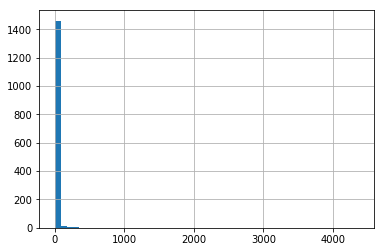

In [31]:
df_mirna.iloc[100,1:].hist(bins=50)

## Combine the CSVs (you don't have to run this)

In [16]:
# index_col=0 takes the first column as row names 

data_1 = pandas.read_csv('mirnas1_5400.txt',sep='\t',index_col=0)
data_2 = pandas.read_csv('mirnas5400_end.txt',sep='\t',index_col=0)

labels_1 = pandas.read_csv('mirnas_labels_1_5400.txt',sep='\t',index_col=0)
labels_2 = pandas.read_csv('mirnas_labels_5400_end.txt',sep='\t',index_col=0)

In [23]:
all_labels = pandas.concat([labels_1, labels_2])
all_labels.columns=['dataset_id', 'class_id', 'class_name', 'sample_id', 'cancer_type', 'cancer_subtype', 'metastasis_status','primary_site', 'metastasis_site', 'sample_label']

In [25]:
all_data = pandas.concat([data_1, data_2], axis=1)

In [26]:
all_data.to_csv("mirnas_all.txt", sep="\t")

In [32]:
all_labels.to_csv("mirnas_labels_all.txt", sep="\t")

## Taking a look at the data

In [49]:
len(df_labels)

1494

In [48]:
np.unique(df_labels['Sample_label'],return_counts=True)

(array(['Metastasis Normal', 'Metastasis Tumor', 'Primary Normal',
        'Primary Tumor'], dtype=object), array([   6,  243,   69, 1176]))

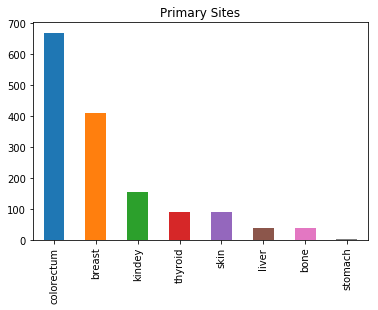

In [44]:
df_labels['Primary_site'].value_counts().plot(kind='bar', title='Primary Sites')

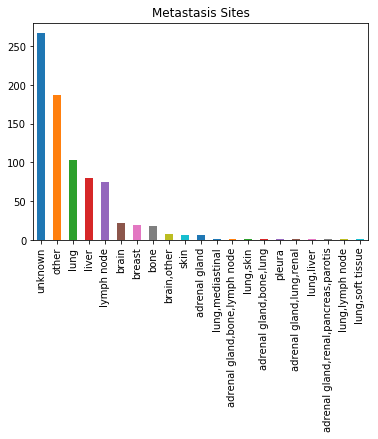

In [46]:
df_labels['Metastasis_site'].value_counts().plot(kind='bar', title='Metastasis Sites')

In [ ]:
## new plots are above 

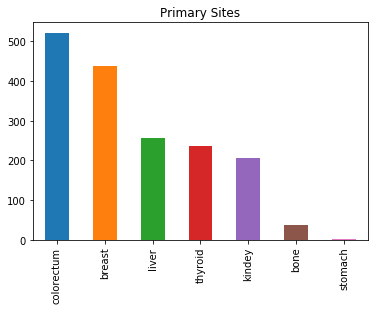

In [43]:
all_labels['primary_site'].value_counts().plot(kind='bar', title='Primary Sites')

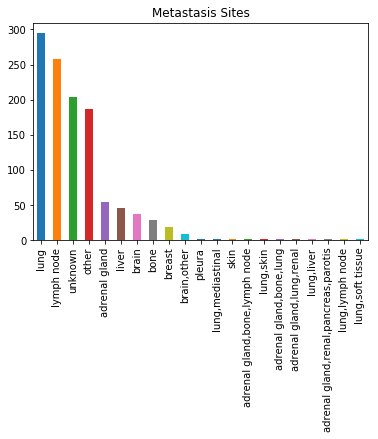

In [46]:
all_labels['metastasis_site'].value_counts().plot(kind='bar', title='Metastasis Sites')

#### This gave me a random idea;
Would it be useful to look at the differences between primary tumors that HAVE metastisized, vs. ones that haven't? Would there be differences...

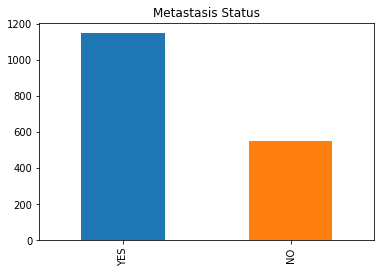

In [44]:
all_labels['metastasis_status'].value_counts().plot(kind='bar',title='Metastasis Status')